In [2352]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import pandas as pd
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import Column, Integer, String, Numeric, Text, Float, Date
import os
import json
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.parser import parse
import sqlite3
%matplotlib inline

# List of Car Finance Companies in the USA

In [2216]:
url = "https://www.netcredit.com/blog/top-auto-loan-companies/"

In [2217]:
cars = requests.get(url)
cars.content

b'<!DOCTYPE html><html lang="en-US"\n xmlns:fb="http://ogp.me/ns/fb#" prefix="og: http://ogp.me/ns#"><head><meta charset="UTF-8"><meta name="viewport" content="width=device-width, initial-scale=1"><link rel="profile" href="http://gmpg.org/xfn/11"><link rel="pingback" href="https://www.netcredit.com/blog/xmlrpc.php"> <!--[if lt IE 9]> <script src="https://www.netcredit.com/blog/wp-content/themes/masterstrap/assets/js/html5.js" type="text/javascript"></script> <script src="//cdn.jsdelivr.net/respond/1.4.2/respond.min.js"></script> <![endif]-->  <script>(function(i,s,o,g,r,a,m){i[\'GoogleAnalyticsObject\']=r;i[r]=i[r]||function(){\n\t\t\t(i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),\n\t\t\tm=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)\n\t\t\t})(window,document,\'script\',\'https://www.netcredit.com/blog/wp-content/plugins/host-analyticsjs-local/cache/local-ga.js\',\'ga\');\nga(\'create\', \'UA-26193776-1\', \n    {\n      

In [2218]:
soup = BeautifulSoup(cars.content,"html.parser")

In [2219]:
fetch = soup.find(class_="nc-table")

In [2220]:
print(fetch)

<table class="nc-table nc-table--vertical"><tbody><tr><th>Rank</th><th>Business</th><th>Market Share</th></tr><tr><td>1</td><td>Ally Bank</td><td>5.75%</td></tr><tr><td>2</td><td>Wells Fargo</td><td>5.66%</td></tr><tr><td>3</td><td>Chase</td><td>4.97%</td></tr><tr><td>4</td><td>Capital One</td><td>4.17%</td></tr><tr><td>5</td><td>Toyota</td><td>3.93%</td></tr><tr><td>6</td><td>Ford</td><td>3.65%</td></tr><tr><td>7</td><td>Nissan Infiniti</td><td>2.67%</td></tr><tr><td>8</td><td>Santander</td><td>2.08%</td></tr><tr><td>9</td><td>Honda</td><td>1.98%</td></tr><tr><td>10</td><td>Bank of America</td><td>1.84%</td></tr><tr><td>11</td><td>Chrysler Capital</td><td>1.72%</td></tr><tr><td>12</td><td>TD Auto</td><td>1.70%</td></tr><tr><td>13</td><td>Credit Acceptance</td><td>1.32%</td></tr><tr><td>14</td><td>Carmax</td><td>1.19%</td></tr><tr><td>15</td><td>US Bank</td><td>1.08%</td></tr><tr><td>16</td><td>GMF Americredit</td><td>1.08%</td></tr><tr><td>17</td><td>USAA FSB</td><td>1.07%</td></tr><t

In [2221]:
result = fetch.find_all("tr")
result

[<tr><th>Rank</th><th>Business</th><th>Market Share</th></tr>,
 <tr><td>1</td><td>Ally Bank</td><td>5.75%</td></tr>,
 <tr><td>2</td><td>Wells Fargo</td><td>5.66%</td></tr>,
 <tr><td>3</td><td>Chase</td><td>4.97%</td></tr>,
 <tr><td>4</td><td>Capital One</td><td>4.17%</td></tr>,
 <tr><td>5</td><td>Toyota</td><td>3.93%</td></tr>,
 <tr><td>6</td><td>Ford</td><td>3.65%</td></tr>,
 <tr><td>7</td><td>Nissan Infiniti</td><td>2.67%</td></tr>,
 <tr><td>8</td><td>Santander</td><td>2.08%</td></tr>,
 <tr><td>9</td><td>Honda</td><td>1.98%</td></tr>,
 <tr><td>10</td><td>Bank of America</td><td>1.84%</td></tr>,
 <tr><td>11</td><td>Chrysler Capital</td><td>1.72%</td></tr>,
 <tr><td>12</td><td>TD Auto</td><td>1.70%</td></tr>,
 <tr><td>13</td><td>Credit Acceptance</td><td>1.32%</td></tr>,
 <tr><td>14</td><td>Carmax</td><td>1.19%</td></tr>,
 <tr><td>15</td><td>US Bank</td><td>1.08%</td></tr>,
 <tr><td>16</td><td>GMF Americredit</td><td>1.08%</td></tr>,
 <tr><td>17</td><td>USAA FSB</td><td>1.07%</td></tr>

In [2222]:
for i in result:
    td = i.find_all("td")
    #print( td )
    try:
        count = 0
        for a in td:
            if count == 1:
                print( a.text )
            count += 1 
    except:
        pass

Ally Bank
Wells Fargo
Chase
Capital One
Toyota
Ford
Nissan Infiniti
Santander
Honda
Bank of America
Chrysler Capital
TD Auto
Credit Acceptance
Carmax
US Bank
GMF Americredit
USAA FSB
Huntington
Kia Motor Finco
PNC Bank


In [2223]:
print

<function print>

# List of 100 Most Common Grocery Stores in the USA

In [2224]:
stores_url = "https://nrf.com/resources/annual-retailer-lists/top-100-retailers/stores-top-retailers-2016"

In [2225]:
stores = requests.get(stores_url)
stores.content

b'<!DOCTYPE html PUBLIC "-//W3C//DTD HTML+RDFa 1.1//EN">\n<!--[if IE 8 ]> <html class="ie8" lang="en" dir="ltr" version="HTML+RDFa 1.1"\n  xmlns:og="http://ogp.me/ns#"\n  xmlns:article="http://ogp.me/ns/article#"\n  xmlns:book="http://ogp.me/ns/book#"\n  xmlns:profile="http://ogp.me/ns/profile#"\n  xmlns:video="http://ogp.me/ns/video#"\n  xmlns:product="http://ogp.me/ns/product#"\n  xmlns:content="http://purl.org/rss/1.0/modules/content/"\n  xmlns:dc="http://purl.org/dc/terms/"\n  xmlns:foaf="http://xmlns.com/foaf/0.1/"\n  xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"\n  xmlns:sioc="http://rdfs.org/sioc/ns#"\n  xmlns:sioct="http://rdfs.org/sioc/types#"\n  xmlns:skos="http://www.w3.org/2004/02/skos/core#"\n  xmlns:xsd="http://www.w3.org/2001/XMLSchema#">         <!--<![endif]-->\n<!--[if IE 9 ]> <html class="modern ie9" lang="en" dir="ltr" version="HTML+RDFa 1.1"\n  xmlns:og="http://ogp.me/ns#"\n  xmlns:article="http://ogp.me/ns/article#"\n  xmlns:book="http://ogp.me/ns/book#"\n  x

In [2226]:
store_names = BeautifulSoup(stores.content, "html.parser")

In [2227]:
fetch_stores = store_names.find_all(class_="views-field-field-top100-company")


In [2228]:
print(fetch_stores)

[<th class="views-field views-field-field-top100-company">
<a class="active" href="/resources/annual-retailer-lists/top-100-retailers/stores-top-retailers-2016?order=field_top100_company&amp;sort=asc" title="sort by Company">Company</a> </th>, <td class="views-field views-field-field-top100-company">
                Wal-Mart Stores              </td>, <td class="views-field views-field-field-top100-company">
                The Kroger Co.              </td>, <td class="views-field views-field-field-top100-company">
                Costco              </td>, <td class="views-field views-field-field-top100-company">
                The Home Depot              </td>, <td class="views-field views-field-field-top100-company">
                Walgreens Boots Alliance *              </td>, <td class="views-field views-field-field-top100-company">
                Target              </td>, <td class="views-field views-field-field-top100-company">
                CVS Health              </td>, 

In [2229]:
for i in fetch_stores:
    print (i.text)


Company 

                Wal-Mart Stores              

                The Kroger Co.              

                Costco              

                The Home Depot              

                Walgreens Boots Alliance *              

                Target              

                CVS Health              

                Amazon.com              

                Albertsons              

                Lowe’s Companies              

                McDonald’s              

                Best Buy              

                Apple Stores / iTunes              

                Publix Super Markets              

                Macy’s              

                Rite Aid              

                Ahold USA / Royal Ahold **              

                TJX              

                Aldi              

                Sears Holdings              

                H-E-B Grocery              

                Dollar General              

           

# List of Mortgage Companies in the USA

In [2230]:
mortgage_url = "https://www.mortgageloan.com/lenders"

In [2231]:
mortgage = requests.get (mortgage_url)
mortgage.content

b'<!DOCTYPE html ><html lang="en-US" xmlns:esi="http://www.edge-delivery.org/esi/1.0"><head><base href="https://www.mortgageloan.com/"><!--[if lte IE 6]></base><![endif]--><title>   Mortgage Brokers, Banks and Mortgage Lenders We Recommend</title><meta name="viewport" content="width=device-width, initial-scale=1" /><meta name="format-detection" content="telephone=no" /><link rel="shortcut icon" type="image/x-icon" href="https://www.mortgageloan.com/themes/mortgageloan/frontfee/public/images/favicon.png"><meta http-equiv="Content-type" content="text/html; charset=utf-8" /><meta name="description" content="MortgageLoan.com allows you to search for top mortgage brokers and lenders in California, Florida. Texas, New York and most other states." /><link rel="canonical" href="https://www.mortgageloan.com/lenders" /><meta property="og:locale" content="en_US"/><meta property="og:type" content="article"/><meta property="og:title" content="  Mortgage Brokers, Banks and Mortgage Lenders We Recomm

In [2232]:
mortgage_companies = BeautifulSoup (mortgage.content, "html.parser")

In [2233]:
fetch_mortgage = mortgage_companies.find_all(class_= "lenders-table-details")

In [2234]:
print(fetch_mortgage)

[<div class="lenders-table-details"><h2><span>Brokers, Banks &amp; Lenders</span></h2><ul><li class="lender-info col-lg-3 col-md-3 col-sm-6 col-xs-6">
<a href="/american-equity-mortgage"><div class="con">
<img alt="aem icon" src="/assets/lenders/aem-icon.jpg"><p>American Equity Mortgage</p>
<strong class="clear"></strong></img></div>
</a></li><li class="lender-info col-lg-3 col-md-3 col-sm-6 col-xs-6">
<a href="/amerisave"><div class="con">
<img alt="nmls icon" src="/assets/lenders/nmls-icon.jpg"><p>Amerisave Mortgage Corporation, NMLS ID #1168</p>
<strong class="clear"></strong></img></div>
</a></li><li class="lender-info col-lg-3 col-md-3 col-sm-6 col-xs-6">
<a href="/asc-americas-servicing-company"><div class="con">
<img alt="asc icon" src="/assets/lenders/asc-icon.jpg"/><p>ASC - America's Servicing Company</p>
<strong class="clear"></strong></div>
</a></li><li class="lender-info col-lg-3 col-md-3 col-sm-6 col-xs-6">
<a href="/capital-one"><div class="con">
<img alt="capital one" sr

In [2287]:
for i in fetch_mortgage:
    print(i.text)

Brokers, Banks & Lenders

American Equity Mortgage



Amerisave Mortgage Corporation, NMLS ID #1168



ASC - America's Servicing Company



Capital One



CapWest Mortgage



Chase



CitiMortgage



Citizens Bank



ditech



Fannie Mae



Freddie Mac



Freedom Mortgage®



GMAC Mortgage



Green Tree Mortgage



Greenlight Financial



HawaiiUSA Federal Credit Union



HSBC Bank USA



ING Direct



Navy Federal Credit Union



NewDay Financial



Pacific Service Credit Union



PHH Mortgage



PNC (National City)



Quicken Loans



Sun Trust Mortgage



SurePoint Lending



TD Bank



USAA



Wachovia



Wells Fargo



American Advisors Group, Inc.




In [2288]:
categ = pd.read_csv("Categories.csv", engine="python")
categ

Mortgage-Rent                 Grocery  \
0            Brokers, Banks & Lenders              Albertsons   
1            American Equity Mortgage                    Aldi   
2      Amerisave Mortgage Corporation                   Bi-Lo   
3   ASC - America's Servicing Company       BJ'sWholesaleClub   
4                         Capital One                  Costco   
5                    CapWest Mortgage               CVSHealth   
6                               Chase   DefenseCommiss.Agency   
7                        CitiMortgage          Dollar General   
8                       Citizens Bank             Dollar Tree   
9                              ditech      Dunkin BrandsGroup   
10                         Fannie Mae              GiantEagle   
11                        Freddie Mac   GoodNeighbor Pharmacy   
12                   Freedom Mortgage                     HEB   
13                      GMAC Mortgage       HealthMartSystems   
14                Green Tree Mortgage                  Hy-Vee   
15               Greenlight Financial      PublixSuperMarkets   
16     HawaiiUSA Federal Credit Union    Roundy'sSupermarkets   
17                      HSBC Bank USA    SaveMartSupermarkets   
18                         ING Direct     StaterBros.Holdings   
19          Navy Federal Credit Union               SUPERVALU   
20                   NewDay Financial            TheKrogerCo.   
21       Pacific Service Credit Union            TrueValueCo.   
22                       PHH Mortgage       Wakefern/ShopRite   
23                PNC (National City)  WalgreensBootsAlliance   
24                      Quicken Loans                WalMart    
25                 Sun Trust Mortgage       WegmansFoodMarket   
26                  SurePoint Lending        WholeFoodsMarket   
27                            TD Bank         Williams-Sonoma   
28                               USAA              WinCoFoods   
29                           Wachovia              YUM!Brands   
..                                ...                     ...   
36                                NaN                     NaN   
37                                NaN                     NaN   
38                                NaN                     NaN   
39                                NaN                     NaN   
40                                NaN                     NaN   
41                                NaN                     NaN   
42                                NaN                     NaN   
43                                NaN                     NaN   
44                                NaN                     NaN   
45                                NaN                     NaN   
46                                NaN                     NaN   
47                                NaN                     NaN   
48                                NaN                     NaN   
49                                NaN                     NaN   
50                                NaN                     NaN   
51                                NaN                     NaN   
52                                NaN                     NaN   
53                                NaN                     NaN   
54                                NaN                     NaN   
55                                NaN                     NaN   
56                                NaN                     NaN   
57                                NaN                     NaN   
58                                NaN                     NaN   
59                                NaN                     NaN   
60                                NaN                     NaN   
61                                NaN                     NaN   
62                                NaN                     NaN   
63                                NaN                     NaN   
64                                NaN                     NaN   
65                                NaN                     N

In [2289]:
#df = pd.read_csv("demo-banks-activities.csv")
#df

In [2290]:
#df1 = df[['Date','Description', 'Amount']]
#df1

In [2291]:
engine = create_engine('sqlite:///budgetapp.sqlite', echo=True)


In [2292]:
query = "select * from categories" 

In [2293]:
conn = engine.connect()

2018-07-13 14:22:10,407 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1


INFO:sqlalchemy.engine.base.Engine:SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1


2018-07-13 14:22:10,409 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:10,412 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1


INFO:sqlalchemy.engine.base.Engine:SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1


2018-07-13 14:22:10,414 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


In [2294]:
results = conn.execute(query).fetchone()

2018-07-13 14:22:10,542 INFO sqlalchemy.engine.base.Engine select * from categories


INFO:sqlalchemy.engine.base.Engine:select * from categories


2018-07-13 14:22:10,545 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


In [2295]:
columns = results.keys()
columns

['index',
 'Mortgage-Rent',
 'Grocery',
 'Shopping',
 'Transportation',
 'Gas',
 'Health',
 'Restaurant-Dinning',
 'Entertainment',
 'Utilities',
 'Donations',
 'Travel',
 'Insurance']

In [2296]:
def get_category(value):
    data = []
    for i in columns:
        value = value.replace("'", " ")
        query = """ select `{c}` from categories where `{c}` like "%{v}%" """.format(c=i, v=value )
        result = conn.execute( query).fetchone()
        if result:
            data.append( i )
    if len(data) > 0:
        return data[0]
    else:
        return 'Miscellaneous'

In [2297]:
print(get_category("shell"))

2018-07-13 14:22:10,866 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%shell%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%shell%" 


2018-07-13 14:22:10,868 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:10,870 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%shell%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%shell%" 


2018-07-13 14:22:10,872 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:10,874 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%shell%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%shell%" 


2018-07-13 14:22:10,875 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:10,877 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%shell%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%shell%" 


2018-07-13 14:22:10,879 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:10,881 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%shell%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%shell%" 


2018-07-13 14:22:10,883 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:10,885 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%shell%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%shell%" 


2018-07-13 14:22:10,887 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:10,889 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%shell%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%shell%" 


2018-07-13 14:22:10,891 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:10,893 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%shell%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%shell%" 


2018-07-13 14:22:10,895 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:10,897 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%shell%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%shell%" 


2018-07-13 14:22:10,899 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:10,902 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%shell%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%shell%" 


2018-07-13 14:22:10,904 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:10,906 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%shell%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%shell%" 


2018-07-13 14:22:10,908 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:10,910 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%shell%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%shell%" 


2018-07-13 14:22:10,912 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:10,914 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%shell%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%shell%" 


2018-07-13 14:22:10,915 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


Gas


In [2298]:
demo = pd.read_csv("bankstatement-demo.csv")
demo

Date             Description   Amount Unnamed: 3
0   05/30/2018                   Citgo      $35    #VALUE!
1   05/30/2018                   Salon     $180        NaN
2   05/30/2018              Yellow Cab      $78        NaN
3   05/30/2018       American Airlines     $520        NaN
4   05/30/2018                 BigLots   $30.00        NaN
5   05/30/2018                  Costco      $20        NaN
6   05/30/2018                GameStop   $50.00        NaN
7   05/30/2018              Amazon.com   $67.00        NaN
8   05/30/2018             Dollar Tree   $16.03        NaN
9   05/30/2018                 Buc-ees    $5.00        NaN
10  05/30/2018              Party City      $20        NaN
11  05/27/2018               McDonalds   $12.88        NaN
12  05/27/2018                Goodwill  $800.00        NaN
13  05/27/2018              BurgerKing   $52.00        NaN
14  05/27/2018           Dominos Pizza      $50        NaN
15  05/26/2018                 BestBuy   $35.00        NaN
16  05/25/2018            Barnes&Noble   $56.00        NaN
17  05/22/2018                  Wendys   $17.00        NaN
18  05/22/2018          Dollar General    $4.05        NaN
19  05/21/2018                Walmart   $110.00        NaN
20  05/21/2018               Starbucks    $3.05        NaN
21  05/21/2018                   Citgo      $36        NaN
22  05/20/2018               McDonalds      $12        NaN
23  05/20/2018                Walmart     $7.03        NaN
24  05/20/2018                     H&M      $88        NaN
25  05/20/2018                 Buc-ees      $16        NaN
26  05/20/2018            TheHomeDepot     $100        NaN
27  05/19/2018         Cash Withdrawal     $200        NaN
28  05/19/2018               Starbucks      $20        NaN
29  05/19/2018                  Subway      $15        NaN
..         ...                     ...      ...        ...
35  05/16/2018                   Mobil      $25        NaN
36  05/15/2018    ChipotleMexicanGrill      $76        NaN
37  05/15/2018                 Hibachi      $46        NaN
38  05/14/2018                GameStop      $50        NaN
39  05/13/2018                 Chevron      $38        NaN
40  05/13/2018               Starbucks      $26        NaN
41  05/12/2018               Nordstrom     $186        NaN
42  05/12/2018             OfficeDepot      $57        NaN
43  05/12/2018  Liberty Auto insurance     $116        NaN
44  05/12/2018                Walmart      $289        NaN
45  05/12/2018                   Salon      $30        NaN
46  05/12/2018           Dominos Pizza      $48        NaN
47  05/12/2018      Darden Restaurants      $23        NaN
48  05/12/2018               McDonalds   $11.56        NaN
49  05/12/2018                  Wendys   $10.02        NaN
50  05/10/2018              Amazon.com    $16.2        NaN
51  05/10/2018                GameStop      $50        NaN
52  05/09/2018                   Macys   $32.18        NaN
53  05/09/2018                 Staples      $15        NaN
54  05/09/2018                  Costco      $50        NaN
55  05/08/2018        WholeFoodsMarket      $50        NaN
56  05/06/2018      PaneraBreadCompany      $28        NaN
57  05/06/2018                   Citgo      $35        NaN
58  05/06/2018                Walmart       $50        NaN
59  05/06/2018        City Water-Sewer     $108        NaN
60  05/05/2018      Darden Restaurants      $50        NaN
61  05/05/2018        Chrysler Capital   $304.8        NaN
62  05/05/2018             Electricity     $117        NaN
63  05/05/2018            AT&TWireless     $120        NaN
64  05/01/2018            CitiMortgage    $1900        NaN

[65 rows x 4 columns]

In [2299]:
demo["Category"] = demo["Description"].map(get_category)

2018-07-13 14:22:11,033 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Citgo%" 


2018-07-13 14:22:11,035 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,037 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


2018-07-13 14:22:11,039 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,041 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Citgo%" 


2018-07-13 14:22:11,043 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,046 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Citgo%" 


2018-07-13 14:22:11,047 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,050 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Citgo%" 


2018-07-13 14:22:11,051 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,053 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Citgo%" 


2018-07-13 14:22:11,055 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,057 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Citgo%" 


2018-07-13 14:22:11,058 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,060 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


2018-07-13 14:22:11,062 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,064 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


2018-07-13 14:22:11,066 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,068 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Citgo%" 


2018-07-13 14:22:11,069 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,072 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Citgo%" 


2018-07-13 14:22:11,073 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,076 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Citgo%" 


2018-07-13 14:22:11,077 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,080 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Citgo%" 


2018-07-13 14:22:11,081 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,083 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Salon%" 


2018-07-13 14:22:11,084 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,087 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salon%" 


2018-07-13 14:22:11,088 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,091 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Salon%" 


2018-07-13 14:22:11,092 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,094 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Salon%" 


2018-07-13 14:22:11,096 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,098 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Salon%" 


2018-07-13 14:22:11,100 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,103 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Salon%" 


2018-07-13 14:22:11,104 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,106 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Salon%" 


2018-07-13 14:22:11,107 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,110 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salon%" 


2018-07-13 14:22:11,112 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,114 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Salon%" 


2018-07-13 14:22:11,116 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,118 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Salon%" 


2018-07-13 14:22:11,119 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,121 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Salon%" 


2018-07-13 14:22:11,123 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,125 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Salon%" 


2018-07-13 14:22:11,126 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,129 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Salon%" 


2018-07-13 14:22:11,130 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,132 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Yellow Cab%" 


2018-07-13 14:22:11,134 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,136 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Yellow Cab%" 


2018-07-13 14:22:11,138 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,140 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Yellow Cab%" 


2018-07-13 14:22:11,142 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,145 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Yellow Cab%" 


2018-07-13 14:22:11,146 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,149 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Yellow Cab%" 


2018-07-13 14:22:11,150 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,153 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Yellow Cab%" 


2018-07-13 14:22:11,154 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,156 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Yellow Cab%" 


2018-07-13 14:22:11,157 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,159 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Yellow Cab%" 


2018-07-13 14:22:11,160 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,162 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Yellow Cab%" 


2018-07-13 14:22:11,164 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,166 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Yellow Cab%" 


2018-07-13 14:22:11,168 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,169 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Yellow Cab%" 


2018-07-13 14:22:11,171 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,173 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Yellow Cab%" 


2018-07-13 14:22:11,175 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,176 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Yellow Cab%" 


2018-07-13 14:22:11,178 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,180 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%American Airlines%" 


2018-07-13 14:22:11,182 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,183 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%American Airlines%" 


2018-07-13 14:22:11,185 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,187 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%American Airlines%" 


2018-07-13 14:22:11,188 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,191 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%American Airlines%" 


2018-07-13 14:22:11,192 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,194 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%American Airlines%" 


2018-07-13 14:22:11,196 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,198 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%American Airlines%" 


2018-07-13 14:22:11,200 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,203 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%American Airlines%" 


2018-07-13 14:22:11,205 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,207 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%American Airlines%" 


2018-07-13 14:22:11,208 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,210 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%American Airlines%" 


2018-07-13 14:22:11,212 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,214 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%American Airlines%" 


2018-07-13 14:22:11,215 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,217 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%American Airlines%" 


2018-07-13 14:22:11,219 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,221 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%American Airlines%" 


2018-07-13 14:22:11,223 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,225 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%American Airlines%" 


2018-07-13 14:22:11,227 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,229 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BigLots%" 


2018-07-13 14:22:11,230 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,232 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BigLots%" 


2018-07-13 14:22:11,234 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,236 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BigLots%" 


2018-07-13 14:22:11,237 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,239 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BigLots%" 


2018-07-13 14:22:11,241 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,243 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BigLots%" 


2018-07-13 14:22:11,245 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,247 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BigLots%" 


2018-07-13 14:22:11,248 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,251 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BigLots%" 


2018-07-13 14:22:11,253 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,255 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BigLots%" 


2018-07-13 14:22:11,256 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,258 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BigLots%" 


2018-07-13 14:22:11,260 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,262 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BigLots%" 


2018-07-13 14:22:11,264 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,267 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BigLots%" 


2018-07-13 14:22:11,268 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,271 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BigLots%" 


2018-07-13 14:22:11,273 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,275 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BigLots%" 


2018-07-13 14:22:11,276 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,279 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Costco%" 


2018-07-13 14:22:11,280 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,283 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


2018-07-13 14:22:11,284 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,286 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Costco%" 


2018-07-13 14:22:11,288 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,290 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Costco%" 


2018-07-13 14:22:11,292 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,295 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Costco%" 


2018-07-13 14:22:11,297 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,299 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Costco%" 


2018-07-13 14:22:11,300 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,302 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Costco%" 


2018-07-13 14:22:11,304 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,306 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


2018-07-13 14:22:11,308 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,311 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Costco%" 


2018-07-13 14:22:11,313 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,315 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Costco%" 


2018-07-13 14:22:11,317 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,319 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Costco%" 


2018-07-13 14:22:11,321 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,324 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Costco%" 


2018-07-13 14:22:11,326 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,329 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Costco%" 


2018-07-13 14:22:11,331 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,333 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%GameStop%" 


2018-07-13 14:22:11,336 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,339 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


2018-07-13 14:22:11,341 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,343 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%GameStop%" 


2018-07-13 14:22:11,346 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,349 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%GameStop%" 


2018-07-13 14:22:11,351 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,353 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%GameStop%" 


2018-07-13 14:22:11,356 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,358 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%GameStop%" 


2018-07-13 14:22:11,360 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,363 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%GameStop%" 


2018-07-13 14:22:11,366 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,368 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


2018-07-13 14:22:11,371 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,373 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


2018-07-13 14:22:11,376 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,379 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%GameStop%" 


2018-07-13 14:22:11,381 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,383 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%GameStop%" 


2018-07-13 14:22:11,384 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,386 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%GameStop%" 


2018-07-13 14:22:11,388 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,389 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%GameStop%" 


2018-07-13 14:22:11,391 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,394 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Amazon.com%" 


2018-07-13 14:22:11,395 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,398 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


2018-07-13 14:22:11,399 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,403 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


2018-07-13 14:22:11,406 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,410 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


2018-07-13 14:22:11,413 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,416 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


2018-07-13 14:22:11,418 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,421 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Amazon.com%" 


2018-07-13 14:22:11,424 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,427 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Amazon.com%" 


2018-07-13 14:22:11,429 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,433 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


2018-07-13 14:22:11,435 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,438 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


2018-07-13 14:22:11,440 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,443 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


2018-07-13 14:22:11,446 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,449 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Amazon.com%" 


2018-07-13 14:22:11,451 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,454 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Amazon.com%" 


2018-07-13 14:22:11,456 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,459 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


2018-07-13 14:22:11,462 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,465 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dollar Tree%" 


2018-07-13 14:22:11,467 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,470 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar Tree%" 


2018-07-13 14:22:11,472 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,475 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dollar Tree%" 


2018-07-13 14:22:11,477 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,480 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dollar Tree%" 


2018-07-13 14:22:11,482 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,484 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dollar Tree%" 


2018-07-13 14:22:11,486 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,489 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dollar Tree%" 


2018-07-13 14:22:11,491 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,493 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dollar Tree%" 


2018-07-13 14:22:11,495 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,498 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar Tree%" 


2018-07-13 14:22:11,500 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,503 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dollar Tree%" 


2018-07-13 14:22:11,505 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,508 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dollar Tree%" 


2018-07-13 14:22:11,510 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,513 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dollar Tree%" 


2018-07-13 14:22:11,516 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,519 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dollar Tree%" 


2018-07-13 14:22:11,522 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,524 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dollar Tree%" 


2018-07-13 14:22:11,527 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,530 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Buc-ees%" 


2018-07-13 14:22:11,532 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,535 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


2018-07-13 14:22:11,538 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,541 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


2018-07-13 14:22:11,543 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,546 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


2018-07-13 14:22:11,548 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,551 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


2018-07-13 14:22:11,554 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,558 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Buc-ees%" 


2018-07-13 14:22:11,560 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,563 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Buc-ees%" 


2018-07-13 14:22:11,566 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,569 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


2018-07-13 14:22:11,571 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,573 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


2018-07-13 14:22:11,576 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,578 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


2018-07-13 14:22:11,580 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,583 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Buc-ees%" 


2018-07-13 14:22:11,584 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,587 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Buc-ees%" 


2018-07-13 14:22:11,588 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,590 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


2018-07-13 14:22:11,592 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,594 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Party City%" 


2018-07-13 14:22:11,596 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,599 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Party City%" 


2018-07-13 14:22:11,600 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,603 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Party City%" 


2018-07-13 14:22:11,606 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,610 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Party City%" 


2018-07-13 14:22:11,612 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,614 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Party City%" 


2018-07-13 14:22:11,617 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,619 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Party City%" 


2018-07-13 14:22:11,620 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,622 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Party City%" 


2018-07-13 14:22:11,624 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,627 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Party City%" 


2018-07-13 14:22:11,629 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,631 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Party City%" 


2018-07-13 14:22:11,632 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,634 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Party City%" 


2018-07-13 14:22:11,636 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,638 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Party City%" 


2018-07-13 14:22:11,640 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,642 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Party City%" 


2018-07-13 14:22:11,644 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,646 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Party City%" 


2018-07-13 14:22:11,648 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,650 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:11,653 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,657 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:11,661 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,664 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:11,666 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,669 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:11,670 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,673 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:11,675 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,678 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:11,680 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,683 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:11,685 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,687 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:11,690 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,692 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:11,694 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,697 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:11,699 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,702 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:11,704 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,706 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:11,708 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,710 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:11,711 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,714 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Goodwill%" 


2018-07-13 14:22:11,715 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,718 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Goodwill%" 


2018-07-13 14:22:11,719 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,721 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Goodwill%" 


2018-07-13 14:22:11,723 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,725 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Goodwill%" 


2018-07-13 14:22:11,728 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,730 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Goodwill%" 


2018-07-13 14:22:11,732 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,734 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Goodwill%" 


2018-07-13 14:22:11,735 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,738 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Goodwill%" 


2018-07-13 14:22:11,740 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,742 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Goodwill%" 


2018-07-13 14:22:11,744 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,747 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Goodwill%" 


2018-07-13 14:22:11,749 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,752 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Goodwill%" 


2018-07-13 14:22:11,754 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,757 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Goodwill%" 


2018-07-13 14:22:11,758 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,761 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Goodwill%" 


2018-07-13 14:22:11,762 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,764 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Goodwill%" 


2018-07-13 14:22:11,765 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,768 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BurgerKing%" 


2018-07-13 14:22:11,770 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,773 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BurgerKing%" 


2018-07-13 14:22:11,776 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,779 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BurgerKing%" 


2018-07-13 14:22:11,781 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,784 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BurgerKing%" 


2018-07-13 14:22:11,787 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,790 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BurgerKing%" 


2018-07-13 14:22:11,792 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,794 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BurgerKing%" 


2018-07-13 14:22:11,795 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,797 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BurgerKing%" 


2018-07-13 14:22:11,800 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,802 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurgerKing%" 


2018-07-13 14:22:11,804 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,807 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BurgerKing%" 


2018-07-13 14:22:11,810 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,812 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BurgerKing%" 


2018-07-13 14:22:11,814 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,816 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BurgerKing%" 


2018-07-13 14:22:11,817 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,819 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BurgerKing%" 


2018-07-13 14:22:11,821 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,823 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BurgerKing%" 


2018-07-13 14:22:11,824 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,827 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dominos Pizza%" 


2018-07-13 14:22:11,829 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,831 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


2018-07-13 14:22:11,834 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,836 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


2018-07-13 14:22:11,838 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,840 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


2018-07-13 14:22:11,842 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,844 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


2018-07-13 14:22:11,846 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,848 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


2018-07-13 14:22:11,850 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,853 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dominos Pizza%" 


2018-07-13 14:22:11,855 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,857 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


2018-07-13 14:22:11,860 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,862 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


2018-07-13 14:22:11,864 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,867 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


2018-07-13 14:22:11,869 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,871 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


2018-07-13 14:22:11,874 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,876 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


2018-07-13 14:22:11,878 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,881 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


2018-07-13 14:22:11,882 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,885 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BestBuy%" 


2018-07-13 14:22:11,886 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,888 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BestBuy%" 


2018-07-13 14:22:11,890 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,892 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BestBuy%" 


2018-07-13 14:22:11,894 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,896 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BestBuy%" 


2018-07-13 14:22:11,898 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,900 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BestBuy%" 


2018-07-13 14:22:11,902 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,905 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BestBuy%" 


2018-07-13 14:22:11,906 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,909 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BestBuy%" 


2018-07-13 14:22:11,911 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,913 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BestBuy%" 


2018-07-13 14:22:11,914 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,916 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BestBuy%" 


2018-07-13 14:22:11,918 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,920 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BestBuy%" 


2018-07-13 14:22:11,921 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,924 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BestBuy%" 


2018-07-13 14:22:11,926 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,928 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BestBuy%" 


2018-07-13 14:22:11,930 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,932 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BestBuy%" 


2018-07-13 14:22:11,933 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,935 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Barnes&Noble%" 


2018-07-13 14:22:11,937 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,939 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Barnes&Noble%" 


2018-07-13 14:22:11,941 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,944 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Barnes&Noble%" 


2018-07-13 14:22:11,945 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,947 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Barnes&Noble%" 


2018-07-13 14:22:11,949 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,952 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Barnes&Noble%" 


2018-07-13 14:22:11,953 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,955 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Barnes&Noble%" 


2018-07-13 14:22:11,957 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,959 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Barnes&Noble%" 


2018-07-13 14:22:11,961 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,963 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Barnes&Noble%" 


2018-07-13 14:22:11,964 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,966 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Barnes&Noble%" 


2018-07-13 14:22:11,968 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,970 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Barnes&Noble%" 


2018-07-13 14:22:11,971 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,973 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Barnes&Noble%" 


2018-07-13 14:22:11,975 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,977 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Barnes&Noble%" 


2018-07-13 14:22:11,978 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,980 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Barnes&Noble%" 


2018-07-13 14:22:11,982 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,983 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Wendys%" 


2018-07-13 14:22:11,985 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,987 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


2018-07-13 14:22:11,989 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,990 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Wendys%" 


2018-07-13 14:22:11,992 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,994 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Wendys%" 


2018-07-13 14:22:11,995 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:11,997 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Wendys%" 


2018-07-13 14:22:11,998 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,000 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Wendys%" 


2018-07-13 14:22:12,002 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,004 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Wendys%" 


2018-07-13 14:22:12,006 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,010 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


2018-07-13 14:22:12,011 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,013 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


2018-07-13 14:22:12,015 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,017 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Wendys%" 


2018-07-13 14:22:12,019 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,021 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Wendys%" 


2018-07-13 14:22:12,022 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,024 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Wendys%" 


2018-07-13 14:22:12,025 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,028 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Wendys%" 


2018-07-13 14:22:12,029 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,031 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dollar General%" 


2018-07-13 14:22:12,033 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,035 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar General%" 


2018-07-13 14:22:12,036 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,039 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dollar General%" 


2018-07-13 14:22:12,040 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,043 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dollar General%" 


2018-07-13 14:22:12,044 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,046 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dollar General%" 


2018-07-13 14:22:12,047 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,049 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dollar General%" 


2018-07-13 14:22:12,050 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,052 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dollar General%" 


2018-07-13 14:22:12,054 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,055 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar General%" 


2018-07-13 14:22:12,057 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,059 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dollar General%" 


2018-07-13 14:22:12,060 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,062 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dollar General%" 


2018-07-13 14:22:12,064 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,066 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dollar General%" 


2018-07-13 14:22:12,067 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,070 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dollar General%" 


2018-07-13 14:22:12,071 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,073 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dollar General%" 


2018-07-13 14:22:12,074 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,077 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:12,078 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,080 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:12,082 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,084 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:12,085 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,088 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:12,089 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,091 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:12,092 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,095 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:12,097 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,099 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:12,100 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,103 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:12,104 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,106 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:12,108 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,110 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:12,111 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,114 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:12,115 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,117 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:12,119 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,121 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:12,122 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,125 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:12,126 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,129 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:12,130 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,133 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:12,134 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,136 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:12,137 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,139 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:12,140 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,142 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:12,144 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,146 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:12,147 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,150 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:12,152 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,154 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:12,155 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,158 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:12,159 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,161 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:12,163 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,165 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:12,166 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,169 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:12,170 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,172 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Citgo%" 


2018-07-13 14:22:12,174 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,177 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


2018-07-13 14:22:12,178 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,180 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Citgo%" 


2018-07-13 14:22:12,181 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,184 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Citgo%" 


2018-07-13 14:22:12,185 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,187 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Citgo%" 


2018-07-13 14:22:12,189 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,191 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Citgo%" 


2018-07-13 14:22:12,193 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,195 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Citgo%" 


2018-07-13 14:22:12,196 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,199 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


2018-07-13 14:22:12,200 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,202 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


2018-07-13 14:22:12,204 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,206 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Citgo%" 


2018-07-13 14:22:12,210 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,212 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Citgo%" 


2018-07-13 14:22:12,214 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,216 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Citgo%" 


2018-07-13 14:22:12,217 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,219 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Citgo%" 


2018-07-13 14:22:12,220 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,222 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:12,224 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,226 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:12,228 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,230 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:12,231 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,234 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:12,236 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,242 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:12,245 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,249 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:12,251 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,253 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:12,255 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,258 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:12,259 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,262 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:12,263 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,266 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:12,268 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,270 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:12,272 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,274 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:12,275 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,277 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:12,279 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,281 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:12,283 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,285 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:12,286 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,289 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:12,290 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,292 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:12,294 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,296 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:12,298 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,299 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:12,301 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,303 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:12,304 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,306 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:12,308 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,310 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:12,312 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,314 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:12,316 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,318 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:12,319 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,322 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:12,323 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,325 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:12,327 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,329 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%H&M%" 


2018-07-13 14:22:12,331 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,334 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%H&M%" 


2018-07-13 14:22:12,335 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,338 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%H&M%" 


2018-07-13 14:22:12,340 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,342 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%H&M%" 


2018-07-13 14:22:12,344 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,347 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%H&M%" 


2018-07-13 14:22:12,349 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,351 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%H&M%" 


2018-07-13 14:22:12,353 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,355 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%H&M%" 


2018-07-13 14:22:12,357 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,359 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%H&M%" 


2018-07-13 14:22:12,360 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,363 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%H&M%" 


2018-07-13 14:22:12,365 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,368 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%H&M%" 


2018-07-13 14:22:12,369 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,372 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%H&M%" 


2018-07-13 14:22:12,373 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,376 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%H&M%" 


2018-07-13 14:22:12,378 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,380 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%H&M%" 


2018-07-13 14:22:12,382 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,384 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Buc-ees%" 


2018-07-13 14:22:12,386 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,388 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


2018-07-13 14:22:12,389 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,391 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


2018-07-13 14:22:12,393 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,395 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


2018-07-13 14:22:12,397 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,399 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


2018-07-13 14:22:12,400 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,402 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Buc-ees%" 


2018-07-13 14:22:12,405 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,409 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Buc-ees%" 


2018-07-13 14:22:12,413 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,418 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


2018-07-13 14:22:12,420 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,423 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


2018-07-13 14:22:12,425 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,430 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


2018-07-13 14:22:12,433 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,438 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Buc-ees%" 


2018-07-13 14:22:12,441 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,444 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Buc-ees%" 


2018-07-13 14:22:12,446 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,450 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


2018-07-13 14:22:12,452 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,456 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%TheHomeDepot%" 


2018-07-13 14:22:12,459 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,463 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%TheHomeDepot%" 


2018-07-13 14:22:12,466 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,469 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%TheHomeDepot%" 


2018-07-13 14:22:12,472 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,476 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%TheHomeDepot%" 


2018-07-13 14:22:12,479 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,483 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%TheHomeDepot%" 


2018-07-13 14:22:12,486 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,490 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%TheHomeDepot%" 


2018-07-13 14:22:12,493 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,498 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%TheHomeDepot%" 


2018-07-13 14:22:12,500 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,505 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%TheHomeDepot%" 


2018-07-13 14:22:12,508 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,511 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%TheHomeDepot%" 


2018-07-13 14:22:12,513 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,517 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%TheHomeDepot%" 


2018-07-13 14:22:12,520 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,523 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%TheHomeDepot%" 


2018-07-13 14:22:12,527 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,531 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%TheHomeDepot%" 


2018-07-13 14:22:12,533 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,536 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%TheHomeDepot%" 


2018-07-13 14:22:12,538 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,543 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Cash Withdrawal%" 


2018-07-13 14:22:12,546 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,550 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Cash Withdrawal%" 


2018-07-13 14:22:12,552 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,556 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Cash Withdrawal%" 


2018-07-13 14:22:12,559 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,563 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Cash Withdrawal%" 


2018-07-13 14:22:12,565 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,569 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Cash Withdrawal%" 


2018-07-13 14:22:12,572 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,576 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Cash Withdrawal%" 


2018-07-13 14:22:12,579 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,583 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Cash Withdrawal%" 


2018-07-13 14:22:12,585 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,589 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Cash Withdrawal%" 


2018-07-13 14:22:12,593 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,597 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Cash Withdrawal%" 


2018-07-13 14:22:12,600 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,603 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Cash Withdrawal%" 


2018-07-13 14:22:12,605 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,609 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Cash Withdrawal%" 


2018-07-13 14:22:12,613 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,618 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Cash Withdrawal%" 


2018-07-13 14:22:12,621 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,624 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Cash Withdrawal%" 


2018-07-13 14:22:12,626 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,630 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:12,631 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,633 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:12,635 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,637 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:12,639 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,641 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:12,642 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,644 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:12,646 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,648 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:12,650 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,652 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:12,655 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,659 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:12,662 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,666 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:12,668 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,672 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:12,674 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,678 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:12,681 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,684 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:12,686 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,688 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:12,690 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,693 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Subway%" 


2018-07-13 14:22:12,696 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,698 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Subway%" 


2018-07-13 14:22:12,701 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,704 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Subway%" 


2018-07-13 14:22:12,706 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,708 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Subway%" 


2018-07-13 14:22:12,709 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,712 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Subway%" 


2018-07-13 14:22:12,713 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,715 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Subway%" 


2018-07-13 14:22:12,718 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,720 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Subway%" 


2018-07-13 14:22:12,722 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,724 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Subway%" 


2018-07-13 14:22:12,727 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,729 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Subway%" 


2018-07-13 14:22:12,731 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,735 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Subway%" 


2018-07-13 14:22:12,736 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,739 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Subway%" 


2018-07-13 14:22:12,741 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,743 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Subway%" 


2018-07-13 14:22:12,745 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,747 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Subway%" 


2018-07-13 14:22:12,749 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,751 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chick-fil-A%" 


2018-07-13 14:22:12,753 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,755 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chick-fil-A%" 


2018-07-13 14:22:12,756 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,759 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chick-fil-A%" 


2018-07-13 14:22:12,760 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,763 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chick-fil-A%" 


2018-07-13 14:22:12,765 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,767 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chick-fil-A%" 


2018-07-13 14:22:12,769 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,772 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chick-fil-A%" 


2018-07-13 14:22:12,773 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,777 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chick-fil-A%" 


2018-07-13 14:22:12,779 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,783 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chick-fil-A%" 


2018-07-13 14:22:12,785 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,789 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chick-fil-A%" 


2018-07-13 14:22:12,791 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,794 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chick-fil-A%" 


2018-07-13 14:22:12,797 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,801 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chick-fil-A%" 


2018-07-13 14:22:12,803 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,807 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chick-fil-A%" 


2018-07-13 14:22:12,810 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,813 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chick-fil-A%" 


2018-07-13 14:22:12,816 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,821 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Exxon%" 


2018-07-13 14:22:12,824 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,828 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Exxon%" 


2018-07-13 14:22:12,830 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,835 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Exxon%" 


2018-07-13 14:22:12,837 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,841 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Exxon%" 


2018-07-13 14:22:12,846 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,850 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Exxon%" 


2018-07-13 14:22:12,854 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,858 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Exxon%" 


2018-07-13 14:22:12,861 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,865 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Exxon%" 


2018-07-13 14:22:12,867 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,870 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Exxon%" 


2018-07-13 14:22:12,873 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,876 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Exxon%" 


2018-07-13 14:22:12,879 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,882 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Exxon%" 


2018-07-13 14:22:12,885 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,887 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Exxon%" 


2018-07-13 14:22:12,890 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,893 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Exxon%" 


2018-07-13 14:22:12,896 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,899 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Exxon%" 


2018-07-13 14:22:12,901 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,905 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BurlingtonStores%" 


2018-07-13 14:22:12,907 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,911 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BurlingtonStores%" 


2018-07-13 14:22:12,914 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,917 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BurlingtonStores%" 


2018-07-13 14:22:12,920 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,923 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BurlingtonStores%" 


2018-07-13 14:22:12,925 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,928 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BurlingtonStores%" 


2018-07-13 14:22:12,931 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,935 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BurlingtonStores%" 


2018-07-13 14:22:12,937 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,940 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BurlingtonStores%" 


2018-07-13 14:22:12,942 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,945 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurlingtonStores%" 


2018-07-13 14:22:12,947 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,950 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BurlingtonStores%" 


2018-07-13 14:22:12,952 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,954 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BurlingtonStores%" 


2018-07-13 14:22:12,956 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,958 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BurlingtonStores%" 


2018-07-13 14:22:12,960 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,962 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BurlingtonStores%" 


2018-07-13 14:22:12,964 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,966 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BurlingtonStores%" 


2018-07-13 14:22:12,968 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,970 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Aldi%" 


2018-07-13 14:22:12,972 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,975 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Aldi%" 


2018-07-13 14:22:12,976 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,979 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Aldi%" 


2018-07-13 14:22:12,981 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,983 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Aldi%" 


2018-07-13 14:22:12,984 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,987 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Aldi%" 


2018-07-13 14:22:12,988 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,991 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Aldi%" 


2018-07-13 14:22:12,992 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,995 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Aldi%" 


2018-07-13 14:22:12,996 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:12,999 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Aldi%" 


2018-07-13 14:22:13,000 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,003 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Aldi%" 


2018-07-13 14:22:13,004 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,007 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Aldi%" 


2018-07-13 14:22:13,008 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,010 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Aldi%" 


2018-07-13 14:22:13,012 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,015 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Aldi%" 


2018-07-13 14:22:13,017 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,021 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Aldi%" 


2018-07-13 14:22:13,022 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,024 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BedBath&Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BedBath&Beyond%" 


2018-07-13 14:22:13,026 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,029 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BedBath&Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BedBath&Beyond%" 


2018-07-13 14:22:13,030 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,032 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BedBath&Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BedBath&Beyond%" 


2018-07-13 14:22:13,034 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,036 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BedBath&Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BedBath&Beyond%" 


2018-07-13 14:22:13,038 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,040 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BedBath&Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BedBath&Beyond%" 


2018-07-13 14:22:13,042 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,044 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BedBath&Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BedBath&Beyond%" 


2018-07-13 14:22:13,046 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,048 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BedBath&Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BedBath&Beyond%" 


2018-07-13 14:22:13,050 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,053 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BedBath&Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BedBath&Beyond%" 


2018-07-13 14:22:13,054 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,057 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BedBath&Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BedBath&Beyond%" 


2018-07-13 14:22:13,058 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,060 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BedBath&Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BedBath&Beyond%" 


2018-07-13 14:22:13,062 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,064 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BedBath&Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BedBath&Beyond%" 


2018-07-13 14:22:13,066 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,068 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BedBath&Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BedBath&Beyond%" 


2018-07-13 14:22:13,070 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,072 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BedBath&Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BedBath&Beyond%" 


2018-07-13 14:22:13,074 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,076 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Mobil%" 


2018-07-13 14:22:13,078 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,080 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Mobil%" 


2018-07-13 14:22:13,082 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,084 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Mobil%" 


2018-07-13 14:22:13,086 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,088 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Mobil%" 


2018-07-13 14:22:13,090 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,093 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Mobil%" 


2018-07-13 14:22:13,095 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,097 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Mobil%" 


2018-07-13 14:22:13,099 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,101 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Mobil%" 


2018-07-13 14:22:13,103 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,105 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Mobil%" 


2018-07-13 14:22:13,108 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,110 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Mobil%" 


2018-07-13 14:22:13,112 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,114 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Mobil%" 


2018-07-13 14:22:13,116 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,118 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Mobil%" 


2018-07-13 14:22:13,120 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,123 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Mobil%" 


2018-07-13 14:22:13,125 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,127 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Mobil%" 


2018-07-13 14:22:13,128 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,131 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:13,132 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,135 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:13,137 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,139 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:13,141 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,144 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:13,146 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,148 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:13,150 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,153 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:13,155 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,157 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:13,159 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,161 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:13,163 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,165 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:13,167 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,169 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:13,171 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,173 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:13,175 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,178 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:13,180 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,182 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:13,184 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,186 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Hibachi%" 


2018-07-13 14:22:13,187 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,190 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Hibachi%" 


2018-07-13 14:22:13,191 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,194 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Hibachi%" 


2018-07-13 14:22:13,195 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,198 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Hibachi%" 


2018-07-13 14:22:13,200 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,202 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Hibachi%" 


2018-07-13 14:22:13,204 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,206 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Hibachi%" 


2018-07-13 14:22:13,208 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,210 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Hibachi%" 


2018-07-13 14:22:13,211 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,214 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Hibachi%" 


2018-07-13 14:22:13,216 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,218 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Hibachi%" 


2018-07-13 14:22:13,222 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,224 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Hibachi%" 


2018-07-13 14:22:13,225 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,228 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Hibachi%" 


2018-07-13 14:22:13,229 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,231 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Hibachi%" 


2018-07-13 14:22:13,233 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,235 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Hibachi%" 


2018-07-13 14:22:13,237 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,239 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%GameStop%" 


2018-07-13 14:22:13,240 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,242 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


2018-07-13 14:22:13,244 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,246 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%GameStop%" 


2018-07-13 14:22:13,248 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,250 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%GameStop%" 


2018-07-13 14:22:13,252 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,253 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%GameStop%" 


2018-07-13 14:22:13,255 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,257 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%GameStop%" 


2018-07-13 14:22:13,259 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,260 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%GameStop%" 


2018-07-13 14:22:13,261 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,263 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


2018-07-13 14:22:13,265 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,267 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


2018-07-13 14:22:13,269 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,272 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%GameStop%" 


2018-07-13 14:22:13,274 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,276 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%GameStop%" 


2018-07-13 14:22:13,277 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,279 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%GameStop%" 


2018-07-13 14:22:13,280 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,282 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%GameStop%" 


2018-07-13 14:22:13,284 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,286 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chevron%" 


2018-07-13 14:22:13,287 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,289 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chevron%" 


2018-07-13 14:22:13,291 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,293 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chevron%" 


2018-07-13 14:22:13,294 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,296 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chevron%" 


2018-07-13 14:22:13,298 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,301 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chevron%" 


2018-07-13 14:22:13,303 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,306 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chevron%" 


2018-07-13 14:22:13,307 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,309 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chevron%" 


2018-07-13 14:22:13,312 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,314 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chevron%" 


2018-07-13 14:22:13,315 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,318 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chevron%" 


2018-07-13 14:22:13,321 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,323 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chevron%" 


2018-07-13 14:22:13,324 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,327 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chevron%" 


2018-07-13 14:22:13,329 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,331 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chevron%" 


2018-07-13 14:22:13,333 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,335 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chevron%" 


2018-07-13 14:22:13,338 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,341 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:13,343 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,346 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:13,347 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,350 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:13,352 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,355 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:13,356 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,360 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:13,362 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,364 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:13,366 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,368 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:13,370 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,372 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:13,373 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,376 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:13,377 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,380 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:13,381 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,384 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:13,385 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,388 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:13,389 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,392 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:13,394 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,396 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Nordstrom%" 


2018-07-13 14:22:13,398 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,400 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nordstrom%" 


2018-07-13 14:22:13,402 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,404 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Nordstrom%" 


2018-07-13 14:22:13,406 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,408 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Nordstrom%" 


2018-07-13 14:22:13,409 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,412 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Nordstrom%" 


2018-07-13 14:22:13,414 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,416 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Nordstrom%" 


2018-07-13 14:22:13,417 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,420 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Nordstrom%" 


2018-07-13 14:22:13,423 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,425 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nordstrom%" 


2018-07-13 14:22:13,426 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,429 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Nordstrom%" 


2018-07-13 14:22:13,430 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,433 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Nordstrom%" 


2018-07-13 14:22:13,435 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,437 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Nordstrom%" 


2018-07-13 14:22:13,439 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,441 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Nordstrom%" 


2018-07-13 14:22:13,444 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,446 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Nordstrom%" 


2018-07-13 14:22:13,448 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,450 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%OfficeDepot%" 


2018-07-13 14:22:13,452 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,454 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%OfficeDepot%" 


2018-07-13 14:22:13,455 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,458 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%OfficeDepot%" 


2018-07-13 14:22:13,459 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,462 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%OfficeDepot%" 


2018-07-13 14:22:13,464 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,466 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%OfficeDepot%" 


2018-07-13 14:22:13,467 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,470 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%OfficeDepot%" 


2018-07-13 14:22:13,471 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,474 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%OfficeDepot%" 


2018-07-13 14:22:13,476 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,478 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%OfficeDepot%" 


2018-07-13 14:22:13,480 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,482 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%OfficeDepot%" 


2018-07-13 14:22:13,484 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,486 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%OfficeDepot%" 


2018-07-13 14:22:13,488 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,491 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%OfficeDepot%" 


2018-07-13 14:22:13,492 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,494 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%OfficeDepot%" 


2018-07-13 14:22:13,496 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,499 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%OfficeDepot%" 


2018-07-13 14:22:13,501 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,503 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Liberty Auto insurance%" 


2018-07-13 14:22:13,504 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,506 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Liberty Auto insurance%" 


2018-07-13 14:22:13,507 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,509 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Liberty Auto insurance%" 


2018-07-13 14:22:13,511 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,513 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Liberty Auto insurance%" 


2018-07-13 14:22:13,515 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,517 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Liberty Auto insurance%" 


2018-07-13 14:22:13,518 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,520 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Liberty Auto insurance%" 


2018-07-13 14:22:13,521 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,524 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Liberty Auto insurance%" 


2018-07-13 14:22:13,525 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,527 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Liberty Auto insurance%" 


2018-07-13 14:22:13,529 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,532 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Liberty Auto insurance%" 


2018-07-13 14:22:13,534 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,536 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Liberty Auto insurance%" 


2018-07-13 14:22:13,538 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,540 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Liberty Auto insurance%" 


2018-07-13 14:22:13,542 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,544 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Liberty Auto insurance%" 


2018-07-13 14:22:13,545 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,548 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Liberty Auto insurance%" 


2018-07-13 14:22:13,549 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,552 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:13,553 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,555 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:13,557 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,559 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:13,561 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,563 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:13,565 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,567 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:13,569 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,571 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:13,573 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,576 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:13,578 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,581 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:13,582 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,586 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:13,588 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,590 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:13,591 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,594 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:13,596 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,599 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:13,601 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,604 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:13,607 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,609 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Salon%" 


2018-07-13 14:22:13,612 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,614 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salon%" 


2018-07-13 14:22:13,616 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,618 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Salon%" 


2018-07-13 14:22:13,620 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,624 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Salon%" 


2018-07-13 14:22:13,626 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,629 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Salon%" 


2018-07-13 14:22:13,632 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,634 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Salon%" 


2018-07-13 14:22:13,636 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,638 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Salon%" 


2018-07-13 14:22:13,640 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,642 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salon%" 


2018-07-13 14:22:13,644 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,647 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Salon%" 


2018-07-13 14:22:13,649 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,653 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Salon%" 


2018-07-13 14:22:13,658 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,661 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Salon%" 


2018-07-13 14:22:13,662 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,665 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Salon%" 


2018-07-13 14:22:13,667 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,670 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Salon%" 


2018-07-13 14:22:13,673 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,675 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dominos Pizza%" 


2018-07-13 14:22:13,678 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,681 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


2018-07-13 14:22:13,683 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,686 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


2018-07-13 14:22:13,689 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,691 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


2018-07-13 14:22:13,694 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,696 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


2018-07-13 14:22:13,698 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,701 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


2018-07-13 14:22:13,703 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,705 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dominos Pizza%" 


2018-07-13 14:22:13,707 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,710 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


2018-07-13 14:22:13,713 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,715 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


2018-07-13 14:22:13,717 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,719 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


2018-07-13 14:22:13,721 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,724 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


2018-07-13 14:22:13,726 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,729 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


2018-07-13 14:22:13,730 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,733 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


2018-07-13 14:22:13,734 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,736 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Darden Restaurants%" 


2018-07-13 14:22:13,738 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,740 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Darden Restaurants%" 


2018-07-13 14:22:13,742 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,745 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Darden Restaurants%" 


2018-07-13 14:22:13,746 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,749 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Darden Restaurants%" 


2018-07-13 14:22:13,750 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,753 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Darden Restaurants%" 


2018-07-13 14:22:13,755 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,757 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Darden Restaurants%" 


2018-07-13 14:22:13,758 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,761 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Darden Restaurants%" 


2018-07-13 14:22:13,762 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,764 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Darden Restaurants%" 


2018-07-13 14:22:13,767 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,769 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Darden Restaurants%" 


2018-07-13 14:22:13,770 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,773 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Darden Restaurants%" 


2018-07-13 14:22:13,774 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,776 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Darden Restaurants%" 


2018-07-13 14:22:13,778 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,780 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Darden Restaurants%" 


2018-07-13 14:22:13,782 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,784 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Darden Restaurants%" 


2018-07-13 14:22:13,785 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,788 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:13,789 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,792 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:13,793 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,795 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:13,797 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,799 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:13,800 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,803 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:13,804 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,807 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:13,808 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,810 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:13,812 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,814 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:13,816 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,818 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:13,820 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,822 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:13,825 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,827 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:13,828 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,831 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:13,832 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,835 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:13,837 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,839 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Wendys%" 


2018-07-13 14:22:13,840 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,843 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


2018-07-13 14:22:13,845 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,847 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Wendys%" 


2018-07-13 14:22:13,848 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,851 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Wendys%" 


2018-07-13 14:22:13,853 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,855 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Wendys%" 


2018-07-13 14:22:13,856 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,859 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Wendys%" 


2018-07-13 14:22:13,861 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,864 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Wendys%" 


2018-07-13 14:22:13,865 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,868 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


2018-07-13 14:22:13,869 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,872 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


2018-07-13 14:22:13,874 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,876 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Wendys%" 


2018-07-13 14:22:13,877 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,880 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Wendys%" 


2018-07-13 14:22:13,881 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,883 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Wendys%" 


2018-07-13 14:22:13,885 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,887 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Wendys%" 


2018-07-13 14:22:13,889 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,891 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Amazon.com%" 


2018-07-13 14:22:13,892 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,895 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


2018-07-13 14:22:13,897 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,899 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


2018-07-13 14:22:13,901 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,903 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


2018-07-13 14:22:13,904 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,906 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


2018-07-13 14:22:13,908 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,911 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Amazon.com%" 


2018-07-13 14:22:13,913 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,915 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Amazon.com%" 


2018-07-13 14:22:13,916 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,918 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


2018-07-13 14:22:13,920 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,922 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


2018-07-13 14:22:13,923 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,926 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


2018-07-13 14:22:13,927 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,929 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Amazon.com%" 


2018-07-13 14:22:13,931 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,934 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Amazon.com%" 


2018-07-13 14:22:13,936 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,938 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


2018-07-13 14:22:13,941 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,944 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%GameStop%" 


2018-07-13 14:22:13,946 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,948 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


2018-07-13 14:22:13,951 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,953 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%GameStop%" 


2018-07-13 14:22:13,955 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,958 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%GameStop%" 


2018-07-13 14:22:13,960 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,963 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%GameStop%" 


2018-07-13 14:22:13,965 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,968 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%GameStop%" 


2018-07-13 14:22:13,970 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,973 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%GameStop%" 


2018-07-13 14:22:13,974 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,977 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


2018-07-13 14:22:13,980 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,983 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


2018-07-13 14:22:13,986 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,990 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%GameStop%" 


2018-07-13 14:22:13,993 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:13,996 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%GameStop%" 


2018-07-13 14:22:13,998 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,001 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%GameStop%" 


2018-07-13 14:22:14,003 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,005 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%GameStop%" 


2018-07-13 14:22:14,007 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,009 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Macys%" 


2018-07-13 14:22:14,012 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,016 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


2018-07-13 14:22:14,018 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,021 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Macys%" 


2018-07-13 14:22:14,023 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,028 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Macys%" 


2018-07-13 14:22:14,030 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,032 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Macys%" 


2018-07-13 14:22:14,034 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,037 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Macys%" 


2018-07-13 14:22:14,039 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,041 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Macys%" 


2018-07-13 14:22:14,043 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,046 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


2018-07-13 14:22:14,048 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,051 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Macys%" 


2018-07-13 14:22:14,053 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,056 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Macys%" 


2018-07-13 14:22:14,058 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,060 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Macys%" 


2018-07-13 14:22:14,062 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,064 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Macys%" 


2018-07-13 14:22:14,066 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,068 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Macys%" 


2018-07-13 14:22:14,069 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,072 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Staples%" 


2018-07-13 14:22:14,073 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,076 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


2018-07-13 14:22:14,077 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,080 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Staples%" 


2018-07-13 14:22:14,082 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,084 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Staples%" 


2018-07-13 14:22:14,086 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,088 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Staples%" 


2018-07-13 14:22:14,090 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,093 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Staples%" 


2018-07-13 14:22:14,095 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,097 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Staples%" 


2018-07-13 14:22:14,099 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,102 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


2018-07-13 14:22:14,104 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,106 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Staples%" 


2018-07-13 14:22:14,107 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,110 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Staples%" 


2018-07-13 14:22:14,111 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,113 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Staples%" 


2018-07-13 14:22:14,115 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,117 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Staples%" 


2018-07-13 14:22:14,119 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,121 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Staples%" 


2018-07-13 14:22:14,123 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,126 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Costco%" 


2018-07-13 14:22:14,127 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,130 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


2018-07-13 14:22:14,131 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,134 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Costco%" 


2018-07-13 14:22:14,136 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,138 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Costco%" 


2018-07-13 14:22:14,139 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,142 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Costco%" 


2018-07-13 14:22:14,143 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,146 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Costco%" 


2018-07-13 14:22:14,148 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,151 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Costco%" 


2018-07-13 14:22:14,153 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,155 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


2018-07-13 14:22:14,157 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,160 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Costco%" 


2018-07-13 14:22:14,162 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,164 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Costco%" 


2018-07-13 14:22:14,167 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,169 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Costco%" 


2018-07-13 14:22:14,171 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,173 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Costco%" 


2018-07-13 14:22:14,174 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,176 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Costco%" 


2018-07-13 14:22:14,178 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,180 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%WholeFoodsMarket%" 


2018-07-13 14:22:14,182 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,184 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%WholeFoodsMarket%" 


2018-07-13 14:22:14,187 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,189 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%WholeFoodsMarket%" 


2018-07-13 14:22:14,191 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,193 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%WholeFoodsMarket%" 


2018-07-13 14:22:14,195 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,197 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%WholeFoodsMarket%" 


2018-07-13 14:22:14,199 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,201 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%WholeFoodsMarket%" 


2018-07-13 14:22:14,203 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,205 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%WholeFoodsMarket%" 


2018-07-13 14:22:14,207 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,209 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%WholeFoodsMarket%" 


2018-07-13 14:22:14,211 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,213 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%WholeFoodsMarket%" 


2018-07-13 14:22:14,215 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,217 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%WholeFoodsMarket%" 


2018-07-13 14:22:14,218 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,220 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%WholeFoodsMarket%" 


2018-07-13 14:22:14,222 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,224 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%WholeFoodsMarket%" 


2018-07-13 14:22:14,228 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,230 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%WholeFoodsMarket%" 


2018-07-13 14:22:14,232 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,235 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%PaneraBreadCompany%" 


2018-07-13 14:22:14,237 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,239 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


2018-07-13 14:22:14,241 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,243 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


2018-07-13 14:22:14,245 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,247 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


2018-07-13 14:22:14,249 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,251 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


2018-07-13 14:22:14,253 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,255 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


2018-07-13 14:22:14,256 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,259 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%PaneraBreadCompany%" 


2018-07-13 14:22:14,260 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,263 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%PaneraBreadCompany%" 


2018-07-13 14:22:14,264 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,267 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%PaneraBreadCompany%" 


2018-07-13 14:22:14,268 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,271 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%PaneraBreadCompany%" 


2018-07-13 14:22:14,272 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,275 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%PaneraBreadCompany%" 


2018-07-13 14:22:14,276 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,278 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%PaneraBreadCompany%" 


2018-07-13 14:22:14,280 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,282 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%PaneraBreadCompany%" 


2018-07-13 14:22:14,283 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,286 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Citgo%" 


2018-07-13 14:22:14,287 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,289 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


2018-07-13 14:22:14,290 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,293 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Citgo%" 


2018-07-13 14:22:14,295 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,298 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Citgo%" 


2018-07-13 14:22:14,299 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,302 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Citgo%" 


2018-07-13 14:22:14,304 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,306 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Citgo%" 


2018-07-13 14:22:14,307 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,310 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Citgo%" 


2018-07-13 14:22:14,312 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,314 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


2018-07-13 14:22:14,315 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,318 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


2018-07-13 14:22:14,319 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,321 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Citgo%" 


2018-07-13 14:22:14,323 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,324 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Citgo%" 


2018-07-13 14:22:14,326 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,328 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Citgo%" 


2018-07-13 14:22:14,330 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,333 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Citgo%" 


2018-07-13 14:22:14,334 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,337 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:14,338 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,340 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:14,342 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,345 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:14,346 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,349 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:14,350 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,353 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:14,354 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,357 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:14,359 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,361 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:14,363 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,365 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:14,367 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,369 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:14,371 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,373 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:14,375 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,378 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:14,380 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,381 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:14,383 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,385 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:14,387 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,389 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%City Water-Sewer%" 


2018-07-13 14:22:14,390 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,392 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%City Water-Sewer%" 


2018-07-13 14:22:14,394 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,397 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%City Water-Sewer%" 


2018-07-13 14:22:14,398 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,401 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%City Water-Sewer%" 


2018-07-13 14:22:14,402 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,405 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%City Water-Sewer%" 


2018-07-13 14:22:14,406 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,408 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%City Water-Sewer%" 


2018-07-13 14:22:14,409 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,411 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%City Water-Sewer%" 


2018-07-13 14:22:14,413 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,415 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%City Water-Sewer%" 


2018-07-13 14:22:14,417 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,419 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%City Water-Sewer%" 


2018-07-13 14:22:14,421 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,423 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%City Water-Sewer%" 


2018-07-13 14:22:14,424 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,427 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%City Water-Sewer%" 


2018-07-13 14:22:14,430 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,432 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%City Water-Sewer%" 


2018-07-13 14:22:14,434 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,437 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%City Water-Sewer%" 


2018-07-13 14:22:14,438 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,441 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Darden Restaurants%" 


2018-07-13 14:22:14,442 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,445 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Darden Restaurants%" 


2018-07-13 14:22:14,446 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,449 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Darden Restaurants%" 


2018-07-13 14:22:14,450 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,452 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Darden Restaurants%" 


2018-07-13 14:22:14,454 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,457 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Darden Restaurants%" 


2018-07-13 14:22:14,458 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,460 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Darden Restaurants%" 


2018-07-13 14:22:14,461 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,463 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Darden Restaurants%" 


2018-07-13 14:22:14,465 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,467 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Darden Restaurants%" 


2018-07-13 14:22:14,469 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,471 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Darden Restaurants%" 


2018-07-13 14:22:14,472 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,474 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Darden Restaurants%" 


2018-07-13 14:22:14,476 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,478 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Darden Restaurants%" 


2018-07-13 14:22:14,480 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,482 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Darden Restaurants%" 


2018-07-13 14:22:14,483 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,485 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Darden Restaurants%" 


2018-07-13 14:22:14,487 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,489 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chrysler Capital%" 


2018-07-13 14:22:14,490 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,493 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chrysler Capital%" 


2018-07-13 14:22:14,494 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,497 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chrysler Capital%" 


2018-07-13 14:22:14,500 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,502 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chrysler Capital%" 


2018-07-13 14:22:14,503 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,506 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chrysler Capital%" 


2018-07-13 14:22:14,508 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,510 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chrysler Capital%" 


2018-07-13 14:22:14,512 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,514 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chrysler Capital%" 


2018-07-13 14:22:14,516 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,518 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chrysler Capital%" 


2018-07-13 14:22:14,520 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,522 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chrysler Capital%" 


2018-07-13 14:22:14,523 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,525 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chrysler Capital%" 


2018-07-13 14:22:14,527 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,529 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chrysler Capital%" 


2018-07-13 14:22:14,530 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,532 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chrysler Capital%" 


2018-07-13 14:22:14,534 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,536 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chrysler Capital%" 


2018-07-13 14:22:14,537 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,539 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Electricity%" 


2018-07-13 14:22:14,541 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,543 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


2018-07-13 14:22:14,546 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,549 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Electricity%" 


2018-07-13 14:22:14,552 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,556 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Electricity%" 


2018-07-13 14:22:14,558 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,562 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Electricity%" 


2018-07-13 14:22:14,564 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,566 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Electricity%" 


2018-07-13 14:22:14,568 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,570 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Electricity%" 


2018-07-13 14:22:14,571 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,574 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Electricity%" 


2018-07-13 14:22:14,575 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,578 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Electricity%" 


2018-07-13 14:22:14,580 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,582 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Electricity%" 


2018-07-13 14:22:14,584 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,586 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Electricity%" 


2018-07-13 14:22:14,588 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,590 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Electricity%" 


2018-07-13 14:22:14,591 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,593 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Electricity%" 


2018-07-13 14:22:14,595 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,597 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%AT&TWireless%" 


2018-07-13 14:22:14,600 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,602 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%AT&TWireless%" 


2018-07-13 14:22:14,603 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,606 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%AT&TWireless%" 


2018-07-13 14:22:14,607 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,609 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%AT&TWireless%" 


2018-07-13 14:22:14,611 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,613 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%AT&TWireless%" 


2018-07-13 14:22:14,615 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,617 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%AT&TWireless%" 


2018-07-13 14:22:14,619 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,622 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%AT&TWireless%" 


2018-07-13 14:22:14,624 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,626 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%AT&TWireless%" 


2018-07-13 14:22:14,628 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,632 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%AT&TWireless%" 


2018-07-13 14:22:14,634 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,636 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%AT&TWireless%" 


2018-07-13 14:22:14,638 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,640 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%AT&TWireless%" 


2018-07-13 14:22:14,641 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,644 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%AT&TWireless%" 


2018-07-13 14:22:14,646 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,648 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%AT&TWireless%" 


2018-07-13 14:22:14,649 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,651 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%CitiMortgage%" 


2018-07-13 14:22:14,653 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,658 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%CitiMortgage%" 


2018-07-13 14:22:14,660 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,662 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%CitiMortgage%" 


2018-07-13 14:22:14,663 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,665 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%CitiMortgage%" 


2018-07-13 14:22:14,666 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,668 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%CitiMortgage%" 


2018-07-13 14:22:14,670 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,671 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%CitiMortgage%" 


2018-07-13 14:22:14,673 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,675 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%CitiMortgage%" 


2018-07-13 14:22:14,676 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,678 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%CitiMortgage%" 


2018-07-13 14:22:14,680 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,682 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%CitiMortgage%" 


2018-07-13 14:22:14,683 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,685 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%CitiMortgage%" 


2018-07-13 14:22:14,687 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,690 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%CitiMortgage%" 


2018-07-13 14:22:14,691 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,693 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%CitiMortgage%" 


2018-07-13 14:22:14,696 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:14,698 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%CitiMortgage%" 


2018-07-13 14:22:14,700 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


In [2300]:
# remove $ sign from amount
demo['Amount'] = demo['Amount'].str.replace('$','')

In [2301]:
demo

Date             Description  Amount Unnamed: 3            Category
0   05/30/2018                   Citgo      35    #VALUE!                 Gas
1   05/30/2018                   Salon     180        NaN            Shopping
2   05/30/2018              Yellow Cab      78        NaN      Transportation
3   05/30/2018       American Airlines     520        NaN              Travel
4   05/30/2018                 BigLots   30.00        NaN            Shopping
5   05/30/2018                  Costco      20        NaN             Grocery
6   05/30/2018                GameStop   50.00        NaN            Shopping
7   05/30/2018              Amazon.com   67.00        NaN            Shopping
8   05/30/2018             Dollar Tree   16.03        NaN             Grocery
9   05/30/2018                 Buc-ees    5.00        NaN                 Gas
10  05/30/2018              Party City      20        NaN            Shopping
11  05/27/2018               McDonalds   12.88        NaN  Restaurant-Dinning
12  05/27/2018                Goodwill  800.00        NaN           Donations
13  05/27/2018              BurgerKing   52.00        NaN  Restaurant-Dinning
14  05/27/2018           Dominos Pizza      50        NaN  Restaurant-Dinning
15  05/26/2018                 BestBuy   35.00        NaN            Shopping
16  05/25/2018            Barnes&Noble   56.00        NaN            Shopping
17  05/22/2018                  Wendys   17.00        NaN  Restaurant-Dinning
18  05/22/2018          Dollar General    4.05        NaN             Grocery
19  05/21/2018                Walmart   110.00        NaN             Grocery
20  05/21/2018               Starbucks    3.05        NaN  Restaurant-Dinning
21  05/21/2018                   Citgo      36        NaN                 Gas
22  05/20/2018               McDonalds      12        NaN  Restaurant-Dinning
23  05/20/2018                Walmart     7.03        NaN             Grocery
24  05/20/2018                     H&M      88        NaN            Shopping
25  05/20/2018                 Buc-ees      16        NaN                 Gas
26  05/20/2018            TheHomeDepot     100        NaN            Shopping
27  05/19/2018         Cash Withdrawal     200        NaN       Miscellaneous
28  05/19/2018               Starbucks      20        NaN  Restaurant-Dinning
29  05/19/2018                  Subway      15        NaN  Restaurant-Dinning
..         ...                     ...     ...        ...                 ...
35  05/16/2018                   Mobil      25        NaN            Shopping
36  05/15/2018    ChipotleMexicanGrill      76        NaN  Restaurant-Dinning
37  05/15/2018                 Hibachi      46        NaN  Restaurant-Dinning
38  05/14/2018                GameStop      50        NaN            Shopping
39  05/13/2018                 Chevron      38        NaN                 Gas
40  05/13/2018               Starbucks      26        NaN  Restaurant-Dinning
41  05/12/2018               Nordstrom     186        NaN            Shopping
42  05/12/2018             OfficeDepot      57        NaN            Shopping
43  05/12/2018  Liberty Auto insurance     116        NaN           Insurance
44  05/12/2018                Walmart      289        NaN             Grocery
45  05/12/2018                   Salon      30        NaN            Shopping
46  05/12/2018           Dominos Pizza      48        NaN  Restaurant-Dinning
47  05/12/2018      Darden Restaurants      23        NaN  Restaurant-Dinning
48  05/12/2018               McDonalds   11.56        NaN  Restaurant-Dinning
49  05/12/2018                  Wendys   10.02        NaN  Restaurant-Dinning
50  05/10/2018              Amazon.com    16.2        NaN            Shopping
51  05/10/2018                GameStop      50        NaN            Shopping
52  05/09/2018                   Macys   32.18        NaN            Shopping
53  05/09/2018                 Staples      15        NaN            Shopping
54  05/09/2018                  

In [2302]:
demo['Amount'] = demo['Amount'].astype(float)

In [2303]:
demo.groupby(["Category"]).size()

Category
Donations              1
Gas                    6
Grocery               10
Insurance              1
Miscellaneous          2
Mortgage-Rent          1
Restaurant-Dinning    18
Shopping              21
Transportation         2
Travel                 1
Utilities              2
dtype: int64

In [2304]:
agg = demo.groupby("Category")['Amount'].sum()
agg

Category
Donations              800.00
Gas                    165.00
Grocery                914.11
Insurance              116.00
Miscellaneous          320.00
Mortgage-Rent         1900.00
Restaurant-Dinning     542.51
Shopping              1232.38
Transportation         382.80
Travel                 520.00
Utilities              225.00
Name: Amount, dtype: float64

In [2305]:
total = pd.DataFrame([ agg ]).T
total
#total.to_sql("summary", conn, if_exists = "replace")

Amount
Category                   
Donations            800.00
Gas                  165.00
Grocery              914.11
Insurance            116.00
Miscellaneous        320.00
Mortgage-Rent       1900.00
Restaurant-Dinning   542.51
Shopping            1232.38
Transportation       382.80
Travel               520.00
Utilities            225.00

In [2306]:
demo [ demo['Category'] == 'Utilities']

Date       Description  Amount Unnamed: 3   Category
59  05/06/2018  City Water-Sewer   108.0        NaN  Utilities
62  05/05/2018       Electricity   117.0        NaN  Utilities

([<matplotlib.patches.Wedge at 0x1896c4db588>,
 [Text(1.03214,0.380386,''),
  Text(0.782762,0.772841,''),
  Text(0.341308,1.04571,''),
  Text(-0.152597,1.08936,''),
  Text(-0.358124,1.04007,''),
  Text(-1.06322,0.282088,''),
  Text(-0.751478,-0.803294,''),
  Text(0.0344266,-1.09946,''),
  Text(0.745119,-0.809196,''),
  Text(1.00072,-0.456687,''),
  Text(1.09458,-0.10906,'')])

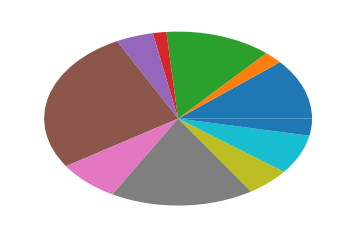

In [2307]:
plt.pie(total)

In [2308]:
#demo.to_sql("expense", conn, if_exists = "replace")

In [2309]:
final = pd.read_csv("final-bank-activities.csv" , encoding="utf-8")
final.head()

Date        Description  Amount
0  7/14/2018        Electricity  120.33
1  7/14/2018              Citgo   12.00
2  7/14/2018              Salon  104.00
3  7/14/2018         Yellow Cab   89.00
4  7/14/2018  American Airlines  362.00

In [2310]:
final['Description'] = final['Description'].str.replace('"','').replace("'",'')

In [2311]:
final["Category"] = final["Description"].map(get_category)

2018-07-13 14:22:15,635 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Electricity%" 


2018-07-13 14:22:15,639 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,641 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


2018-07-13 14:22:15,643 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,645 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Electricity%" 


2018-07-13 14:22:15,647 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,649 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Electricity%" 


2018-07-13 14:22:15,650 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,653 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Electricity%" 


2018-07-13 14:22:15,656 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,659 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Electricity%" 


2018-07-13 14:22:15,661 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,663 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Electricity%" 


2018-07-13 14:22:15,665 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,667 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Electricity%" 


2018-07-13 14:22:15,668 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,671 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Electricity%" 


2018-07-13 14:22:15,672 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,675 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Electricity%" 


2018-07-13 14:22:15,677 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,679 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Electricity%" 


2018-07-13 14:22:15,681 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,683 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Electricity%" 


2018-07-13 14:22:15,685 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,687 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Electricity%" 


2018-07-13 14:22:15,689 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,691 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Citgo%" 


2018-07-13 14:22:15,693 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,695 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


2018-07-13 14:22:15,696 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,698 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Citgo%" 


2018-07-13 14:22:15,700 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,702 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Citgo%" 


2018-07-13 14:22:15,704 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,706 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Citgo%" 


2018-07-13 14:22:15,707 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,709 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Citgo%" 


2018-07-13 14:22:15,711 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,714 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Citgo%" 


2018-07-13 14:22:15,717 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,719 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


2018-07-13 14:22:15,721 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,723 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


2018-07-13 14:22:15,724 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,726 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Citgo%" 


2018-07-13 14:22:15,728 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,730 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Citgo%" 


2018-07-13 14:22:15,731 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,733 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Citgo%" 


2018-07-13 14:22:15,735 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,737 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Citgo%" 


2018-07-13 14:22:15,739 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,740 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Salon%" 


2018-07-13 14:22:15,742 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,744 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salon%" 


2018-07-13 14:22:15,745 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,748 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Salon%" 


2018-07-13 14:22:15,749 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,751 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Salon%" 


2018-07-13 14:22:15,753 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,755 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Salon%" 


2018-07-13 14:22:15,756 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,758 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Salon%" 


2018-07-13 14:22:15,760 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,762 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Salon%" 


2018-07-13 14:22:15,763 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,766 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salon%" 


2018-07-13 14:22:15,767 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,769 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Salon%" 


2018-07-13 14:22:15,771 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,773 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Salon%" 


2018-07-13 14:22:15,775 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,777 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Salon%" 


2018-07-13 14:22:15,778 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,780 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Salon%" 


2018-07-13 14:22:15,782 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,784 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Salon%" 


2018-07-13 14:22:15,785 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,787 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Yellow Cab%" 


2018-07-13 14:22:15,789 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,791 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Yellow Cab%" 


2018-07-13 14:22:15,793 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,795 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Yellow Cab%" 


2018-07-13 14:22:15,796 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,799 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Yellow Cab%" 


2018-07-13 14:22:15,800 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,802 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Yellow Cab%" 


2018-07-13 14:22:15,804 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,806 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Yellow Cab%" 


2018-07-13 14:22:15,808 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,809 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Yellow Cab%" 


2018-07-13 14:22:15,811 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,813 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Yellow Cab%" 


2018-07-13 14:22:15,814 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,816 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Yellow Cab%" 


2018-07-13 14:22:15,818 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,820 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Yellow Cab%" 


2018-07-13 14:22:15,821 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,823 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Yellow Cab%" 


2018-07-13 14:22:15,824 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,826 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Yellow Cab%" 


2018-07-13 14:22:15,828 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,829 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Yellow Cab%" 


2018-07-13 14:22:15,831 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,832 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%American Airlines%" 


2018-07-13 14:22:15,834 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,836 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%American Airlines%" 


2018-07-13 14:22:15,838 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,841 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%American Airlines%" 


2018-07-13 14:22:15,842 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,844 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%American Airlines%" 


2018-07-13 14:22:15,846 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,848 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%American Airlines%" 


2018-07-13 14:22:15,850 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,852 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%American Airlines%" 


2018-07-13 14:22:15,853 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,855 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%American Airlines%" 


2018-07-13 14:22:15,857 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,860 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%American Airlines%" 


2018-07-13 14:22:15,861 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,864 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%American Airlines%" 


2018-07-13 14:22:15,865 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,867 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%American Airlines%" 


2018-07-13 14:22:15,869 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,872 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%American Airlines%" 


2018-07-13 14:22:15,874 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,876 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%American Airlines%" 


2018-07-13 14:22:15,877 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,880 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%American Airlines%" 


2018-07-13 14:22:15,882 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,883 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BigLots%" 


2018-07-13 14:22:15,887 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,889 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BigLots%" 


2018-07-13 14:22:15,891 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,893 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BigLots%" 


2018-07-13 14:22:15,895 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,897 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BigLots%" 


2018-07-13 14:22:15,900 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,902 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BigLots%" 


2018-07-13 14:22:15,903 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,905 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BigLots%" 


2018-07-13 14:22:15,908 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,910 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BigLots%" 


2018-07-13 14:22:15,911 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,914 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BigLots%" 


2018-07-13 14:22:15,915 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,917 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BigLots%" 


2018-07-13 14:22:15,918 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,921 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BigLots%" 


2018-07-13 14:22:15,922 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,925 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BigLots%" 


2018-07-13 14:22:15,927 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,930 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BigLots%" 


2018-07-13 14:22:15,932 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,934 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BigLots%" 


2018-07-13 14:22:15,937 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,939 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Costco%" 


2018-07-13 14:22:15,941 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,944 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


2018-07-13 14:22:15,946 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,948 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Costco%" 


2018-07-13 14:22:15,951 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,953 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Costco%" 


2018-07-13 14:22:15,955 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,958 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Costco%" 


2018-07-13 14:22:15,961 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,964 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Costco%" 


2018-07-13 14:22:15,966 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,968 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Costco%" 


2018-07-13 14:22:15,970 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,972 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


2018-07-13 14:22:15,973 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,975 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Costco%" 


2018-07-13 14:22:15,977 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,979 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Costco%" 


2018-07-13 14:22:15,980 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,982 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Costco%" 


2018-07-13 14:22:15,984 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,986 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Costco%" 


2018-07-13 14:22:15,987 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,989 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Costco%" 


2018-07-13 14:22:15,990 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,993 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Golf%" 


2018-07-13 14:22:15,994 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:15,996 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Golf%" 


2018-07-13 14:22:15,998 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,001 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Golf%" 


2018-07-13 14:22:16,002 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,005 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Golf%" 


2018-07-13 14:22:16,006 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,008 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Golf%" 


2018-07-13 14:22:16,009 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,011 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Golf%" 


2018-07-13 14:22:16,013 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,015 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Golf%" 


2018-07-13 14:22:16,016 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,019 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Golf%" 


2018-07-13 14:22:16,020 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,022 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Golf%" 


2018-07-13 14:22:16,024 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,026 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Golf%" 


2018-07-13 14:22:16,028 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,030 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Golf%" 


2018-07-13 14:22:16,031 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,034 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Golf%" 


2018-07-13 14:22:16,035 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,037 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Golf%" 


2018-07-13 14:22:16,040 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,043 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Amazon.com%" 


2018-07-13 14:22:16,044 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,046 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


2018-07-13 14:22:16,048 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,050 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


2018-07-13 14:22:16,052 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,054 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


2018-07-13 14:22:16,056 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,058 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


2018-07-13 14:22:16,059 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,062 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Amazon.com%" 


2018-07-13 14:22:16,064 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,066 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Amazon.com%" 


2018-07-13 14:22:16,068 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,072 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


2018-07-13 14:22:16,076 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,079 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


2018-07-13 14:22:16,082 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,085 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


2018-07-13 14:22:16,087 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,089 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Amazon.com%" 


2018-07-13 14:22:16,091 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,094 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Amazon.com%" 


2018-07-13 14:22:16,097 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,099 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


2018-07-13 14:22:16,100 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,103 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dollar Tree%" 


2018-07-13 14:22:16,104 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,107 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar Tree%" 


2018-07-13 14:22:16,109 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,111 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dollar Tree%" 


2018-07-13 14:22:16,113 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,115 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dollar Tree%" 


2018-07-13 14:22:16,117 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,119 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dollar Tree%" 


2018-07-13 14:22:16,120 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,122 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dollar Tree%" 


2018-07-13 14:22:16,124 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,126 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dollar Tree%" 


2018-07-13 14:22:16,127 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,129 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar Tree%" 


2018-07-13 14:22:16,131 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,132 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dollar Tree%" 


2018-07-13 14:22:16,134 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,136 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dollar Tree%" 


2018-07-13 14:22:16,137 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,140 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dollar Tree%" 


2018-07-13 14:22:16,141 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,143 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dollar Tree%" 


2018-07-13 14:22:16,145 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,147 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dollar Tree%" 


2018-07-13 14:22:16,148 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,150 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Valero%" 


2018-07-13 14:22:16,151 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,154 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Valero%" 


2018-07-13 14:22:16,155 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,157 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Valero%" 


2018-07-13 14:22:16,159 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,162 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Valero%" 


2018-07-13 14:22:16,165 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,167 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Valero%" 


2018-07-13 14:22:16,169 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,172 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Valero%" 


2018-07-13 14:22:16,174 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,177 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Valero%" 


2018-07-13 14:22:16,179 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,182 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Valero%" 


2018-07-13 14:22:16,184 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,187 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Valero%" 


2018-07-13 14:22:16,190 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,193 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Valero%" 


2018-07-13 14:22:16,196 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,198 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Valero%" 


2018-07-13 14:22:16,201 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,205 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Valero%" 


2018-07-13 14:22:16,209 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,212 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Valero%" 


2018-07-13 14:22:16,214 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,217 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Liberty Auto insurance%" 


2018-07-13 14:22:16,220 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,223 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Liberty Auto insurance%" 


2018-07-13 14:22:16,225 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,228 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Liberty Auto insurance%" 


2018-07-13 14:22:16,230 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,232 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Liberty Auto insurance%" 


2018-07-13 14:22:16,234 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,236 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Liberty Auto insurance%" 


2018-07-13 14:22:16,238 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,242 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Liberty Auto insurance%" 


2018-07-13 14:22:16,245 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,247 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Liberty Auto insurance%" 


2018-07-13 14:22:16,249 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,250 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Liberty Auto insurance%" 


2018-07-13 14:22:16,252 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,254 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Liberty Auto insurance%" 


2018-07-13 14:22:16,257 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,260 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Liberty Auto insurance%" 


2018-07-13 14:22:16,262 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,264 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Liberty Auto insurance%" 


2018-07-13 14:22:16,266 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,268 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Liberty Auto insurance%" 


2018-07-13 14:22:16,270 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,273 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Liberty Auto insurance%" 


2018-07-13 14:22:16,276 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,279 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%CitiMortgage%" 


2018-07-13 14:22:16,280 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,283 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%CitiMortgage%" 


2018-07-13 14:22:16,285 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,287 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%CitiMortgage%" 


2018-07-13 14:22:16,288 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,291 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%CitiMortgage%" 


2018-07-13 14:22:16,292 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,295 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%CitiMortgage%" 


2018-07-13 14:22:16,296 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,299 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%CitiMortgage%" 


2018-07-13 14:22:16,300 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,303 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%CitiMortgage%" 


2018-07-13 14:22:16,304 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,307 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%CitiMortgage%" 


2018-07-13 14:22:16,308 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,310 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%CitiMortgage%" 


2018-07-13 14:22:16,312 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,314 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%CitiMortgage%" 


2018-07-13 14:22:16,315 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,317 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%CitiMortgage%" 


2018-07-13 14:22:16,319 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,321 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%CitiMortgage%" 


2018-07-13 14:22:16,322 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,324 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%CitiMortgage%" 


2018-07-13 14:22:16,326 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,328 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Marshalls%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Marshalls%" 


2018-07-13 14:22:16,330 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,332 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Marshalls%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Marshalls%" 


2018-07-13 14:22:16,334 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,336 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Marshalls%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Marshalls%" 


2018-07-13 14:22:16,338 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,340 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Marshalls%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Marshalls%" 


2018-07-13 14:22:16,342 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,344 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Marshalls%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Marshalls%" 


2018-07-13 14:22:16,347 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,349 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Marshalls%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Marshalls%" 


2018-07-13 14:22:16,351 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,354 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Marshalls%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Marshalls%" 


2018-07-13 14:22:16,355 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,358 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Marshalls%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Marshalls%" 


2018-07-13 14:22:16,360 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,362 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Marshalls%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Marshalls%" 


2018-07-13 14:22:16,365 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,367 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Marshalls%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Marshalls%" 


2018-07-13 14:22:16,369 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,371 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Marshalls%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Marshalls%" 


2018-07-13 14:22:16,373 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,375 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Marshalls%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Marshalls%" 


2018-07-13 14:22:16,376 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,379 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Marshalls%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Marshalls%" 


2018-07-13 14:22:16,381 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,383 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:16,384 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,386 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:16,387 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,389 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:16,391 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,393 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:16,396 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,399 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:16,400 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,402 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:16,404 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,407 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:16,408 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,411 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:16,412 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,415 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:16,416 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,418 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:16,420 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,422 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:16,424 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,426 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:16,427 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,430 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:16,431 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,433 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Goodwill%" 


2018-07-13 14:22:16,435 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,437 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Goodwill%" 


2018-07-13 14:22:16,439 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,441 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Goodwill%" 


2018-07-13 14:22:16,444 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,447 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Goodwill%" 


2018-07-13 14:22:16,449 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,451 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Goodwill%" 


2018-07-13 14:22:16,452 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,454 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Goodwill%" 


2018-07-13 14:22:16,455 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,457 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Goodwill%" 


2018-07-13 14:22:16,458 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,460 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Goodwill%" 


2018-07-13 14:22:16,462 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,464 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Goodwill%" 


2018-07-13 14:22:16,465 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,467 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Goodwill%" 


2018-07-13 14:22:16,469 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,471 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Goodwill%" 


2018-07-13 14:22:16,472 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,474 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Goodwill%" 


2018-07-13 14:22:16,476 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,478 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Goodwill%" 


2018-07-13 14:22:16,480 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,482 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BurgerKing%" 


2018-07-13 14:22:16,484 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,486 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BurgerKing%" 


2018-07-13 14:22:16,487 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,490 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BurgerKing%" 


2018-07-13 14:22:16,491 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,493 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BurgerKing%" 


2018-07-13 14:22:16,494 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,497 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BurgerKing%" 


2018-07-13 14:22:16,498 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,500 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BurgerKing%" 


2018-07-13 14:22:16,501 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,504 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BurgerKing%" 


2018-07-13 14:22:16,505 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,508 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurgerKing%" 


2018-07-13 14:22:16,509 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,511 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BurgerKing%" 


2018-07-13 14:22:16,513 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,515 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BurgerKing%" 


2018-07-13 14:22:16,517 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,520 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BurgerKing%" 


2018-07-13 14:22:16,521 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,524 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BurgerKing%" 


2018-07-13 14:22:16,525 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,527 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BurgerKing%" 


2018-07-13 14:22:16,529 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,532 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dominos Pizza%" 


2018-07-13 14:22:16,534 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,537 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


2018-07-13 14:22:16,538 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,541 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


2018-07-13 14:22:16,542 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,545 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


2018-07-13 14:22:16,546 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,549 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


2018-07-13 14:22:16,551 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,553 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


2018-07-13 14:22:16,555 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,557 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dominos Pizza%" 


2018-07-13 14:22:16,558 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,560 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


2018-07-13 14:22:16,562 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,564 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


2018-07-13 14:22:16,565 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,568 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


2018-07-13 14:22:16,569 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,572 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


2018-07-13 14:22:16,573 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,576 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


2018-07-13 14:22:16,577 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,580 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


2018-07-13 14:22:16,581 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,584 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BestBuy%" 


2018-07-13 14:22:16,586 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,588 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BestBuy%" 


2018-07-13 14:22:16,589 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,591 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BestBuy%" 


2018-07-13 14:22:16,593 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,595 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BestBuy%" 


2018-07-13 14:22:16,597 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,599 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BestBuy%" 


2018-07-13 14:22:16,601 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,604 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BestBuy%" 


2018-07-13 14:22:16,605 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,608 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BestBuy%" 


2018-07-13 14:22:16,609 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,612 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BestBuy%" 


2018-07-13 14:22:16,613 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,615 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BestBuy%" 


2018-07-13 14:22:16,617 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,620 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BestBuy%" 


2018-07-13 14:22:16,621 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,623 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BestBuy%" 


2018-07-13 14:22:16,624 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,625 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BestBuy%" 


2018-07-13 14:22:16,627 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,630 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BestBuy%" 


2018-07-13 14:22:16,631 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,633 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%H&M%" 


2018-07-13 14:22:16,635 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,637 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%H&M%" 


2018-07-13 14:22:16,639 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,641 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%H&M%" 


2018-07-13 14:22:16,643 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,646 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%H&M%" 


2018-07-13 14:22:16,647 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,649 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%H&M%" 


2018-07-13 14:22:16,652 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,657 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%H&M%" 


2018-07-13 14:22:16,658 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,661 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%H&M%" 


2018-07-13 14:22:16,663 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,665 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%H&M%" 


2018-07-13 14:22:16,666 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,668 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%H&M%" 


2018-07-13 14:22:16,670 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,673 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%H&M%" 


2018-07-13 14:22:16,674 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,676 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%H&M%" 


2018-07-13 14:22:16,678 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,680 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%H&M%" 


2018-07-13 14:22:16,682 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,684 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%H&M%" 


2018-07-13 14:22:16,685 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,688 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Wendys%" 


2018-07-13 14:22:16,689 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,691 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


2018-07-13 14:22:16,693 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,695 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Wendys%" 


2018-07-13 14:22:16,697 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,699 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Wendys%" 


2018-07-13 14:22:16,700 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,702 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Wendys%" 


2018-07-13 14:22:16,704 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,707 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Wendys%" 


2018-07-13 14:22:16,708 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,712 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Wendys%" 


2018-07-13 14:22:16,713 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,715 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


2018-07-13 14:22:16,717 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,719 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


2018-07-13 14:22:16,721 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,723 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Wendys%" 


2018-07-13 14:22:16,725 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,727 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Wendys%" 


2018-07-13 14:22:16,729 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,731 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Wendys%" 


2018-07-13 14:22:16,733 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,735 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Wendys%" 


2018-07-13 14:22:16,736 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,740 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dollar General%" 


2018-07-13 14:22:16,743 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,745 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar General%" 


2018-07-13 14:22:16,748 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,752 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dollar General%" 


2018-07-13 14:22:16,754 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,758 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dollar General%" 


2018-07-13 14:22:16,760 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,762 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dollar General%" 


2018-07-13 14:22:16,765 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,769 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dollar General%" 


2018-07-13 14:22:16,770 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,773 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dollar General%" 


2018-07-13 14:22:16,774 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,777 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar General%" 


2018-07-13 14:22:16,779 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,781 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dollar General%" 


2018-07-13 14:22:16,783 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,786 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dollar General%" 


2018-07-13 14:22:16,788 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,790 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dollar General%" 


2018-07-13 14:22:16,792 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,794 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dollar General%" 


2018-07-13 14:22:16,797 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,799 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dollar General%" 


2018-07-13 14:22:16,802 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,804 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:16,806 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,809 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:16,810 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,813 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:16,816 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,820 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:16,822 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,826 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:16,828 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,832 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:16,834 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,837 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:16,839 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,842 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:16,845 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,849 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:16,850 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,853 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:16,854 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,856 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:16,858 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,860 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:16,862 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,864 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:16,865 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,868 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:16,869 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,872 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:16,873 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,876 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:16,877 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,880 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:16,881 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,884 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:16,885 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,888 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:16,889 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,891 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:16,893 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,895 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:16,897 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,900 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:16,901 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,903 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:16,904 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,906 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:16,908 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,910 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:16,911 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,913 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:16,916 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,918 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Citgo%" 


2018-07-13 14:22:16,919 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,921 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


2018-07-13 14:22:16,923 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,925 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Citgo%" 


2018-07-13 14:22:16,927 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,929 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Citgo%" 


2018-07-13 14:22:16,930 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,932 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Citgo%" 


2018-07-13 14:22:16,933 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,935 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Citgo%" 


2018-07-13 14:22:16,938 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,940 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Citgo%" 


2018-07-13 14:22:16,942 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,944 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


2018-07-13 14:22:16,946 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,950 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


2018-07-13 14:22:16,951 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,953 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Citgo%" 


2018-07-13 14:22:16,955 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,957 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Citgo%" 


2018-07-13 14:22:16,958 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,961 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Citgo%" 


2018-07-13 14:22:16,962 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,964 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Citgo%" 


2018-07-13 14:22:16,966 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,967 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:16,969 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,971 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:16,972 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,974 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:16,976 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,978 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:16,980 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,983 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:16,985 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,987 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:16,989 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,992 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:16,994 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:16,997 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:16,999 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,001 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:17,003 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,006 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:17,008 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,011 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:17,013 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,015 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:17,017 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,020 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:17,021 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,024 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:17,026 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,028 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:17,031 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,033 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:17,034 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,037 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:17,038 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,040 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:17,042 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,044 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:17,047 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,050 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:17,051 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,053 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:17,055 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,058 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:17,059 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,061 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:17,064 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,066 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:17,068 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,070 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:17,072 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,074 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:17,076 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,079 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%H&M%" 


2018-07-13 14:22:17,082 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,084 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%H&M%" 


2018-07-13 14:22:17,086 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,088 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%H&M%" 


2018-07-13 14:22:17,089 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,092 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%H&M%" 


2018-07-13 14:22:17,093 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,096 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%H&M%" 


2018-07-13 14:22:17,097 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,099 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%H&M%" 


2018-07-13 14:22:17,100 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,103 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%H&M%" 


2018-07-13 14:22:17,104 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,106 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%H&M%" 


2018-07-13 14:22:17,108 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,110 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%H&M%" 


2018-07-13 14:22:17,111 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,114 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%H&M%" 


2018-07-13 14:22:17,115 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,117 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%H&M%" 


2018-07-13 14:22:17,119 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,121 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%H&M%" 


2018-07-13 14:22:17,123 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,125 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%H&M%" 


2018-07-13 14:22:17,126 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,128 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Buc-ees%" 


2018-07-13 14:22:17,133 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,135 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


2018-07-13 14:22:17,137 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,140 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


2018-07-13 14:22:17,142 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,144 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


2018-07-13 14:22:17,145 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,147 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


2018-07-13 14:22:17,150 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,152 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Buc-ees%" 


2018-07-13 14:22:17,153 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,155 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Buc-ees%" 


2018-07-13 14:22:17,156 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,158 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


2018-07-13 14:22:17,160 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,161 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


2018-07-13 14:22:17,163 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,165 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


2018-07-13 14:22:17,166 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,168 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Buc-ees%" 


2018-07-13 14:22:17,169 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,171 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Buc-ees%" 


2018-07-13 14:22:17,173 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,175 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


2018-07-13 14:22:17,177 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,179 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%TheHomeDepot%" 


2018-07-13 14:22:17,180 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,183 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%TheHomeDepot%" 


2018-07-13 14:22:17,184 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,187 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%TheHomeDepot%" 


2018-07-13 14:22:17,188 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,190 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%TheHomeDepot%" 


2018-07-13 14:22:17,192 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,194 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%TheHomeDepot%" 


2018-07-13 14:22:17,195 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,197 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%TheHomeDepot%" 


2018-07-13 14:22:17,199 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,201 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%TheHomeDepot%" 


2018-07-13 14:22:17,203 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,205 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%TheHomeDepot%" 


2018-07-13 14:22:17,206 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,208 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%TheHomeDepot%" 


2018-07-13 14:22:17,210 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,212 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%TheHomeDepot%" 


2018-07-13 14:22:17,213 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,216 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%TheHomeDepot%" 


2018-07-13 14:22:17,217 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,219 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%TheHomeDepot%" 


2018-07-13 14:22:17,221 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,222 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%TheHomeDepot%" 


2018-07-13 14:22:17,224 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,226 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Cash Withdrawal%" 


2018-07-13 14:22:17,227 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,229 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Cash Withdrawal%" 


2018-07-13 14:22:17,231 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,232 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Cash Withdrawal%" 


2018-07-13 14:22:17,234 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,236 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Cash Withdrawal%" 


2018-07-13 14:22:17,237 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,240 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Cash Withdrawal%" 


2018-07-13 14:22:17,241 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,243 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Cash Withdrawal%" 


2018-07-13 14:22:17,244 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,246 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Cash Withdrawal%" 


2018-07-13 14:22:17,249 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,251 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Cash Withdrawal%" 


2018-07-13 14:22:17,253 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,255 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Cash Withdrawal%" 


2018-07-13 14:22:17,256 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,259 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Cash Withdrawal%" 


2018-07-13 14:22:17,260 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,262 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Cash Withdrawal%" 


2018-07-13 14:22:17,265 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,267 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Cash Withdrawal%" 


2018-07-13 14:22:17,268 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,270 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Cash Withdrawal%" 


2018-07-13 14:22:17,271 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,273 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:17,275 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,277 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:17,278 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,280 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:17,282 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,284 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:17,285 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,287 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:17,289 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,291 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:17,292 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,295 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:17,297 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,299 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:17,301 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,303 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:17,306 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,309 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:17,311 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,313 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:17,315 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,317 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:17,319 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,321 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:17,322 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,325 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Subway%" 


2018-07-13 14:22:17,326 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,329 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Subway%" 


2018-07-13 14:22:17,331 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,333 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Subway%" 


2018-07-13 14:22:17,334 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,337 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Subway%" 


2018-07-13 14:22:17,338 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,340 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Subway%" 


2018-07-13 14:22:17,342 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,345 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Subway%" 


2018-07-13 14:22:17,347 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,350 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Subway%" 


2018-07-13 14:22:17,352 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,354 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Subway%" 


2018-07-13 14:22:17,356 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,359 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Subway%" 


2018-07-13 14:22:17,361 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,363 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Subway%" 


2018-07-13 14:22:17,366 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,368 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Subway%" 


2018-07-13 14:22:17,370 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,372 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Subway%" 


2018-07-13 14:22:17,373 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,375 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Subway%" 


2018-07-13 14:22:17,377 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,379 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chick-fil-A%" 


2018-07-13 14:22:17,381 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,383 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chick-fil-A%" 


2018-07-13 14:22:17,385 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,387 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chick-fil-A%" 


2018-07-13 14:22:17,388 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,391 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chick-fil-A%" 


2018-07-13 14:22:17,392 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,395 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chick-fil-A%" 


2018-07-13 14:22:17,397 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,400 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chick-fil-A%" 


2018-07-13 14:22:17,402 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,404 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chick-fil-A%" 


2018-07-13 14:22:17,406 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,409 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chick-fil-A%" 


2018-07-13 14:22:17,411 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,413 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chick-fil-A%" 


2018-07-13 14:22:17,415 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,418 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chick-fil-A%" 


2018-07-13 14:22:17,419 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,421 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chick-fil-A%" 


2018-07-13 14:22:17,423 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,424 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chick-fil-A%" 


2018-07-13 14:22:17,426 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,428 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chick-fil-A%" 


2018-07-13 14:22:17,429 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,431 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Exxon%" 


2018-07-13 14:22:17,432 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,434 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Exxon%" 


2018-07-13 14:22:17,436 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,437 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Exxon%" 


2018-07-13 14:22:17,439 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,441 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Exxon%" 


2018-07-13 14:22:17,442 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,444 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Exxon%" 


2018-07-13 14:22:17,445 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,447 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Exxon%" 


2018-07-13 14:22:17,450 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,453 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Exxon%" 


2018-07-13 14:22:17,455 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,457 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Exxon%" 


2018-07-13 14:22:17,458 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,461 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Exxon%" 


2018-07-13 14:22:17,462 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,464 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Exxon%" 


2018-07-13 14:22:17,466 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,469 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Exxon%" 


2018-07-13 14:22:17,470 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,472 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Exxon%" 


2018-07-13 14:22:17,474 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,475 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Exxon%" 


2018-07-13 14:22:17,477 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,479 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BurlingtonStores%" 


2018-07-13 14:22:17,480 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,482 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BurlingtonStores%" 


2018-07-13 14:22:17,483 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,486 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BurlingtonStores%" 


2018-07-13 14:22:17,487 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,489 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BurlingtonStores%" 


2018-07-13 14:22:17,490 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,492 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BurlingtonStores%" 


2018-07-13 14:22:17,493 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,495 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BurlingtonStores%" 


2018-07-13 14:22:17,497 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,499 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BurlingtonStores%" 


2018-07-13 14:22:17,500 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,503 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurlingtonStores%" 


2018-07-13 14:22:17,504 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,506 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BurlingtonStores%" 


2018-07-13 14:22:17,507 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,509 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BurlingtonStores%" 


2018-07-13 14:22:17,511 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,513 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BurlingtonStores%" 


2018-07-13 14:22:17,514 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,516 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BurlingtonStores%" 


2018-07-13 14:22:17,518 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,519 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BurlingtonStores%" 


2018-07-13 14:22:17,521 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,523 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Aldi%" 


2018-07-13 14:22:17,524 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,527 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Aldi%" 


2018-07-13 14:22:17,528 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,531 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Aldi%" 


2018-07-13 14:22:17,532 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,535 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Aldi%" 


2018-07-13 14:22:17,536 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,538 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Aldi%" 


2018-07-13 14:22:17,540 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,542 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Aldi%" 


2018-07-13 14:22:17,543 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,545 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Aldi%" 


2018-07-13 14:22:17,546 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,548 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Aldi%" 


2018-07-13 14:22:17,550 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,551 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Aldi%" 


2018-07-13 14:22:17,553 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,555 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Aldi%" 


2018-07-13 14:22:17,556 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,559 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Aldi%" 


2018-07-13 14:22:17,560 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,563 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Aldi%" 


2018-07-13 14:22:17,564 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,566 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Aldi%" 


2018-07-13 14:22:17,567 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,569 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Staples%" 


2018-07-13 14:22:17,571 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,572 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


2018-07-13 14:22:17,574 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,576 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Staples%" 


2018-07-13 14:22:17,577 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,580 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Staples%" 


2018-07-13 14:22:17,581 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,583 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Staples%" 


2018-07-13 14:22:17,584 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,586 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Staples%" 


2018-07-13 14:22:17,588 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,590 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Staples%" 


2018-07-13 14:22:17,591 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,594 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


2018-07-13 14:22:17,596 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,599 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Staples%" 


2018-07-13 14:22:17,602 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,604 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Staples%" 


2018-07-13 14:22:17,605 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,607 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Staples%" 


2018-07-13 14:22:17,608 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,610 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Staples%" 


2018-07-13 14:22:17,612 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,615 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Staples%" 


2018-07-13 14:22:17,617 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,619 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Mobil%" 


2018-07-13 14:22:17,620 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,622 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Mobil%" 


2018-07-13 14:22:17,624 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,625 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Mobil%" 


2018-07-13 14:22:17,627 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,629 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Mobil%" 


2018-07-13 14:22:17,631 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,632 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Mobil%" 


2018-07-13 14:22:17,634 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,636 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Mobil%" 


2018-07-13 14:22:17,637 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,639 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Mobil%" 


2018-07-13 14:22:17,640 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,642 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Mobil%" 


2018-07-13 14:22:17,643 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,645 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Mobil%" 


2018-07-13 14:22:17,647 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,649 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Mobil%" 


2018-07-13 14:22:17,651 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,655 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Mobil%" 


2018-07-13 14:22:17,658 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,660 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Mobil%" 


2018-07-13 14:22:17,662 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,663 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Mobil%" 


2018-07-13 14:22:17,665 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,667 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:17,668 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,670 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:17,671 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,673 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:17,674 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,676 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:17,678 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,679 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:17,681 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,683 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:17,684 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,687 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:17,688 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,691 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:17,692 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,696 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:17,699 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,702 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:17,703 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,706 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:17,707 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,709 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:17,710 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,713 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:17,714 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,716 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Hibachi%" 


2018-07-13 14:22:17,718 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,720 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Hibachi%" 


2018-07-13 14:22:17,721 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,723 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Hibachi%" 


2018-07-13 14:22:17,724 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,726 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Hibachi%" 


2018-07-13 14:22:17,727 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,729 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Hibachi%" 


2018-07-13 14:22:17,730 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,732 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Hibachi%" 


2018-07-13 14:22:17,733 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,735 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Hibachi%" 


2018-07-13 14:22:17,736 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,738 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Hibachi%" 


2018-07-13 14:22:17,740 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,742 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Hibachi%" 


2018-07-13 14:22:17,743 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,745 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Hibachi%" 


2018-07-13 14:22:17,747 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,748 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Hibachi%" 


2018-07-13 14:22:17,749 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,751 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Hibachi%" 


2018-07-13 14:22:17,753 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,755 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Hibachi%" 


2018-07-13 14:22:17,757 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,759 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%GameStop%" 


2018-07-13 14:22:17,761 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,763 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


2018-07-13 14:22:17,765 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,768 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%GameStop%" 


2018-07-13 14:22:17,770 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,772 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%GameStop%" 


2018-07-13 14:22:17,775 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,777 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%GameStop%" 


2018-07-13 14:22:17,778 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,781 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%GameStop%" 


2018-07-13 14:22:17,782 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,785 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%GameStop%" 


2018-07-13 14:22:17,786 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,789 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


2018-07-13 14:22:17,792 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,794 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


2018-07-13 14:22:17,796 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,799 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%GameStop%" 


2018-07-13 14:22:17,802 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,804 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%GameStop%" 


2018-07-13 14:22:17,806 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,808 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%GameStop%" 


2018-07-13 14:22:17,810 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,814 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%GameStop%" 


2018-07-13 14:22:17,816 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,818 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chevron%" 


2018-07-13 14:22:17,819 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,821 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chevron%" 


2018-07-13 14:22:17,823 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,825 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chevron%" 


2018-07-13 14:22:17,827 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,829 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chevron%" 


2018-07-13 14:22:17,831 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,833 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chevron%" 


2018-07-13 14:22:17,835 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,838 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chevron%" 


2018-07-13 14:22:17,839 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,842 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chevron%" 


2018-07-13 14:22:17,844 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,846 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chevron%" 


2018-07-13 14:22:17,848 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,851 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chevron%" 


2018-07-13 14:22:17,854 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,856 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chevron%" 


2018-07-13 14:22:17,858 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,861 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chevron%" 


2018-07-13 14:22:17,862 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,864 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chevron%" 


2018-07-13 14:22:17,865 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,867 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chevron%" 


2018-07-13 14:22:17,869 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,871 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:17,872 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,875 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:17,877 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,879 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:17,880 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,882 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:17,884 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,887 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:17,888 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,890 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:17,893 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,895 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:17,897 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,900 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:17,901 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,903 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:17,905 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,907 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:17,909 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,911 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:17,913 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,915 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:17,916 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,918 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:17,920 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,922 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Michael Kors%" 


2018-07-13 14:22:17,923 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,925 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Michael Kors%" 


2018-07-13 14:22:17,927 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,929 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Michael Kors%" 


2018-07-13 14:22:17,931 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,934 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Michael Kors%" 


2018-07-13 14:22:17,935 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,938 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Michael Kors%" 


2018-07-13 14:22:17,940 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,942 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Michael Kors%" 


2018-07-13 14:22:17,943 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,946 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Michael Kors%" 


2018-07-13 14:22:17,948 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,950 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Michael Kors%" 


2018-07-13 14:22:17,952 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,954 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Michael Kors%" 


2018-07-13 14:22:17,955 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,957 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Michael Kors%" 


2018-07-13 14:22:17,959 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,962 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Michael Kors%" 


2018-07-13 14:22:17,963 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,966 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Michael Kors%" 


2018-07-13 14:22:17,969 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,974 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Michael Kors%" 


2018-07-13 14:22:17,976 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,978 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%OfficeDepot%" 


2018-07-13 14:22:17,979 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,981 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%OfficeDepot%" 


2018-07-13 14:22:17,982 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,984 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%OfficeDepot%" 


2018-07-13 14:22:17,986 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,988 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%OfficeDepot%" 


2018-07-13 14:22:17,989 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,991 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%OfficeDepot%" 


2018-07-13 14:22:17,992 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,994 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%OfficeDepot%" 


2018-07-13 14:22:17,996 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:17,998 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%OfficeDepot%" 


2018-07-13 14:22:18,000 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,002 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%OfficeDepot%" 


2018-07-13 14:22:18,004 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,006 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%OfficeDepot%" 


2018-07-13 14:22:18,008 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,010 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%OfficeDepot%" 


2018-07-13 14:22:18,012 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,014 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%OfficeDepot%" 


2018-07-13 14:22:18,015 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,018 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%OfficeDepot%" 


2018-07-13 14:22:18,020 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,022 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%OfficeDepot%" 


2018-07-13 14:22:18,023 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,026 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Liberty Auto insurance%" 


2018-07-13 14:22:18,027 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,030 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Liberty Auto insurance%" 


2018-07-13 14:22:18,031 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,033 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Liberty Auto insurance%" 


2018-07-13 14:22:18,035 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,037 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Liberty Auto insurance%" 


2018-07-13 14:22:18,039 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,041 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Liberty Auto insurance%" 


2018-07-13 14:22:18,042 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,044 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Liberty Auto insurance%" 


2018-07-13 14:22:18,046 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,048 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Liberty Auto insurance%" 


2018-07-13 14:22:18,050 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,052 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Liberty Auto insurance%" 


2018-07-13 14:22:18,054 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,057 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Liberty Auto insurance%" 


2018-07-13 14:22:18,058 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,060 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Liberty Auto insurance%" 


2018-07-13 14:22:18,062 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,064 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Liberty Auto insurance%" 


2018-07-13 14:22:18,065 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,067 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Liberty Auto insurance%" 


2018-07-13 14:22:18,069 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,070 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Liberty Auto insurance%" 


2018-07-13 14:22:18,072 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,074 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:18,076 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,078 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:18,080 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,082 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:18,083 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,085 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:18,087 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,089 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:18,090 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,092 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:18,094 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,096 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:18,098 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,100 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:18,101 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,103 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:18,105 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,107 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:18,109 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,111 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:18,114 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,116 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:18,118 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,120 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:18,121 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,122 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Nail Salon%" 


2018-07-13 14:22:18,124 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,126 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nail Salon%" 


2018-07-13 14:22:18,129 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,132 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Nail Salon%" 


2018-07-13 14:22:18,135 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,137 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Nail Salon%" 


2018-07-13 14:22:18,139 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,141 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Nail Salon%" 


2018-07-13 14:22:18,144 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,146 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Nail Salon%" 


2018-07-13 14:22:18,148 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,151 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Nail Salon%" 


2018-07-13 14:22:18,154 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,157 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nail Salon%" 


2018-07-13 14:22:18,160 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,163 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Nail Salon%" 


2018-07-13 14:22:18,164 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,167 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Nail Salon%" 


2018-07-13 14:22:18,168 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,170 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Nail Salon%" 


2018-07-13 14:22:18,173 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,175 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Nail Salon%" 


2018-07-13 14:22:18,177 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,179 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Nail Salon%" 


2018-07-13 14:22:18,181 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,183 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dominos Pizza%" 


2018-07-13 14:22:18,185 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,188 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


2018-07-13 14:22:18,189 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,192 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


2018-07-13 14:22:18,195 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,198 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


2018-07-13 14:22:18,200 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,202 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


2018-07-13 14:22:18,205 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,207 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


2018-07-13 14:22:18,210 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,213 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dominos Pizza%" 


2018-07-13 14:22:18,215 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,217 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


2018-07-13 14:22:18,218 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,220 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


2018-07-13 14:22:18,222 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,224 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


2018-07-13 14:22:18,225 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,228 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


2018-07-13 14:22:18,230 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,232 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


2018-07-13 14:22:18,234 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,236 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


2018-07-13 14:22:18,237 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,240 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Darden Restaurants%" 


2018-07-13 14:22:18,241 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,244 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Darden Restaurants%" 


2018-07-13 14:22:18,245 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,247 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Darden Restaurants%" 


2018-07-13 14:22:18,249 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,251 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Darden Restaurants%" 


2018-07-13 14:22:18,252 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,255 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Darden Restaurants%" 


2018-07-13 14:22:18,258 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,260 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Darden Restaurants%" 


2018-07-13 14:22:18,261 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,264 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Darden Restaurants%" 


2018-07-13 14:22:18,265 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,268 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Darden Restaurants%" 


2018-07-13 14:22:18,270 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,272 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Darden Restaurants%" 


2018-07-13 14:22:18,274 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,276 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Darden Restaurants%" 


2018-07-13 14:22:18,277 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,280 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Darden Restaurants%" 


2018-07-13 14:22:18,282 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,284 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Darden Restaurants%" 


2018-07-13 14:22:18,285 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,287 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Darden Restaurants%" 


2018-07-13 14:22:18,289 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,291 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:18,292 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,294 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:18,296 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,298 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:18,300 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,302 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:18,303 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,305 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:18,307 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,309 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:18,310 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,312 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:18,314 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,316 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:18,317 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,320 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:18,321 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,323 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:18,325 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,327 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:18,328 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,330 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:18,332 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,334 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:18,336 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,338 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Wendys%" 


2018-07-13 14:22:18,339 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,342 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


2018-07-13 14:22:18,343 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,345 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Wendys%" 


2018-07-13 14:22:18,347 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,349 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Wendys%" 


2018-07-13 14:22:18,350 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,352 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Wendys%" 


2018-07-13 14:22:18,354 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,356 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Wendys%" 


2018-07-13 14:22:18,357 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,359 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Wendys%" 


2018-07-13 14:22:18,360 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,363 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


2018-07-13 14:22:18,364 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,366 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


2018-07-13 14:22:18,367 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,369 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Wendys%" 


2018-07-13 14:22:18,370 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,372 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Wendys%" 


2018-07-13 14:22:18,373 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,375 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Wendys%" 


2018-07-13 14:22:18,377 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,379 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Wendys%" 


2018-07-13 14:22:18,381 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,383 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Amazon.com%" 


2018-07-13 14:22:18,384 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,387 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


2018-07-13 14:22:18,388 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,390 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


2018-07-13 14:22:18,393 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,395 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


2018-07-13 14:22:18,396 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,398 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


2018-07-13 14:22:18,399 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,401 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Amazon.com%" 


2018-07-13 14:22:18,403 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,405 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Amazon.com%" 


2018-07-13 14:22:18,406 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,408 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


2018-07-13 14:22:18,410 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,412 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


2018-07-13 14:22:18,413 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,416 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


2018-07-13 14:22:18,417 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,420 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Amazon.com%" 


2018-07-13 14:22:18,421 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,424 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Amazon.com%" 


2018-07-13 14:22:18,425 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,428 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


2018-07-13 14:22:18,429 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,431 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%GameStop%" 


2018-07-13 14:22:18,433 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,435 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


2018-07-13 14:22:18,436 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,438 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%GameStop%" 


2018-07-13 14:22:18,440 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,441 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%GameStop%" 


2018-07-13 14:22:18,444 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,446 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%GameStop%" 


2018-07-13 14:22:18,448 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,450 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%GameStop%" 


2018-07-13 14:22:18,452 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,454 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%GameStop%" 


2018-07-13 14:22:18,455 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,459 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


2018-07-13 14:22:18,460 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,462 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


2018-07-13 14:22:18,464 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,466 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%GameStop%" 


2018-07-13 14:22:18,468 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,470 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%GameStop%" 


2018-07-13 14:22:18,472 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,474 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%GameStop%" 


2018-07-13 14:22:18,477 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,480 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%GameStop%" 


2018-07-13 14:22:18,482 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,485 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Macys%" 


2018-07-13 14:22:18,488 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,490 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


2018-07-13 14:22:18,492 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,495 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Macys%" 


2018-07-13 14:22:18,495 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,498 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Macys%" 


2018-07-13 14:22:18,500 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,502 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Macys%" 


2018-07-13 14:22:18,503 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,505 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Macys%" 


2018-07-13 14:22:18,507 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,509 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Macys%" 


2018-07-13 14:22:18,511 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,513 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


2018-07-13 14:22:18,516 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,518 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Macys%" 


2018-07-13 14:22:18,519 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,522 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Macys%" 


2018-07-13 14:22:18,523 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,525 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Macys%" 


2018-07-13 14:22:18,527 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,529 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Macys%" 


2018-07-13 14:22:18,530 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,533 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Macys%" 


2018-07-13 14:22:18,534 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,537 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Staples%" 


2018-07-13 14:22:18,538 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,540 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


2018-07-13 14:22:18,541 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,544 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Staples%" 


2018-07-13 14:22:18,545 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,547 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Staples%" 


2018-07-13 14:22:18,549 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,551 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Staples%" 


2018-07-13 14:22:18,552 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,554 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Staples%" 


2018-07-13 14:22:18,555 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,557 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Staples%" 


2018-07-13 14:22:18,559 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,560 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


2018-07-13 14:22:18,562 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,564 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Staples%" 


2018-07-13 14:22:18,565 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,568 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Staples%" 


2018-07-13 14:22:18,569 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,571 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Staples%" 


2018-07-13 14:22:18,572 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,574 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Staples%" 


2018-07-13 14:22:18,576 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,578 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Staples%" 


2018-07-13 14:22:18,579 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,581 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Costco%" 


2018-07-13 14:22:18,582 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,585 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


2018-07-13 14:22:18,586 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,588 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Costco%" 


2018-07-13 14:22:18,589 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,591 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Costco%" 


2018-07-13 14:22:18,592 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,594 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Costco%" 


2018-07-13 14:22:18,596 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,598 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Costco%" 


2018-07-13 14:22:18,599 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,601 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Costco%" 


2018-07-13 14:22:18,602 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,605 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


2018-07-13 14:22:18,606 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,608 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Costco%" 


2018-07-13 14:22:18,610 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,612 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Costco%" 


2018-07-13 14:22:18,613 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,615 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Costco%" 


2018-07-13 14:22:18,616 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,618 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Costco%" 


2018-07-13 14:22:18,619 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,621 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Costco%" 


2018-07-13 14:22:18,623 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,624 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%WholeFoodsMarket%" 


2018-07-13 14:22:18,626 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,628 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%WholeFoodsMarket%" 


2018-07-13 14:22:18,629 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,632 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%WholeFoodsMarket%" 


2018-07-13 14:22:18,633 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,635 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%WholeFoodsMarket%" 


2018-07-13 14:22:18,636 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,638 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%WholeFoodsMarket%" 


2018-07-13 14:22:18,639 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,641 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%WholeFoodsMarket%" 


2018-07-13 14:22:18,643 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,646 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%WholeFoodsMarket%" 


2018-07-13 14:22:18,647 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,649 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%WholeFoodsMarket%" 


2018-07-13 14:22:18,651 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,655 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%WholeFoodsMarket%" 


2018-07-13 14:22:18,657 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,660 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%WholeFoodsMarket%" 


2018-07-13 14:22:18,662 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,664 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%WholeFoodsMarket%" 


2018-07-13 14:22:18,665 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,668 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%WholeFoodsMarket%" 


2018-07-13 14:22:18,669 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,672 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%WholeFoodsMarket%" 


2018-07-13 14:22:18,674 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,676 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%PaneraBreadCompany%" 


2018-07-13 14:22:18,677 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,679 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


2018-07-13 14:22:18,681 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,683 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


2018-07-13 14:22:18,685 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,687 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


2018-07-13 14:22:18,689 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,691 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


2018-07-13 14:22:18,693 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,695 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


2018-07-13 14:22:18,697 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,699 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%PaneraBreadCompany%" 


2018-07-13 14:22:18,701 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,703 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%PaneraBreadCompany%" 


2018-07-13 14:22:18,705 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,707 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%PaneraBreadCompany%" 


2018-07-13 14:22:18,708 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,710 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%PaneraBreadCompany%" 


2018-07-13 14:22:18,712 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,714 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%PaneraBreadCompany%" 


2018-07-13 14:22:18,715 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,717 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%PaneraBreadCompany%" 


2018-07-13 14:22:18,718 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,720 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%PaneraBreadCompany%" 


2018-07-13 14:22:18,721 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,723 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%HEB Gasoline%" 


2018-07-13 14:22:18,725 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,726 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%HEB Gasoline%" 


2018-07-13 14:22:18,728 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,730 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%HEB Gasoline%" 


2018-07-13 14:22:18,731 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,733 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%HEB Gasoline%" 


2018-07-13 14:22:18,735 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,737 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%HEB Gasoline%" 


2018-07-13 14:22:18,738 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,740 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%HEB Gasoline%" 


2018-07-13 14:22:18,742 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,743 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%HEB Gasoline%" 


2018-07-13 14:22:18,745 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,747 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%HEB Gasoline%" 


2018-07-13 14:22:18,748 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,750 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%HEB Gasoline%" 


2018-07-13 14:22:18,752 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,754 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%HEB Gasoline%" 


2018-07-13 14:22:18,755 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,757 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%HEB Gasoline%" 


2018-07-13 14:22:18,758 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,760 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%HEB Gasoline%" 


2018-07-13 14:22:18,762 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,764 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%HEB Gasoline%" 


2018-07-13 14:22:18,765 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,767 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:18,769 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,771 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:18,772 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,774 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:18,776 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,777 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:18,779 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,781 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:18,783 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,785 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:18,786 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,788 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:18,790 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,792 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:18,793 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,795 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:18,797 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,799 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:18,800 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,802 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:18,804 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,806 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:18,807 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,809 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:18,810 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,812 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%City Water-Sewer%" 


2018-07-13 14:22:18,813 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,816 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%City Water-Sewer%" 


2018-07-13 14:22:18,817 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,819 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%City Water-Sewer%" 


2018-07-13 14:22:18,820 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,822 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%City Water-Sewer%" 


2018-07-13 14:22:18,824 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,826 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%City Water-Sewer%" 


2018-07-13 14:22:18,827 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,829 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%City Water-Sewer%" 


2018-07-13 14:22:18,830 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,833 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%City Water-Sewer%" 


2018-07-13 14:22:18,834 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,836 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%City Water-Sewer%" 


2018-07-13 14:22:18,838 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,840 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%City Water-Sewer%" 


2018-07-13 14:22:18,841 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,843 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%City Water-Sewer%" 


2018-07-13 14:22:18,845 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,846 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%City Water-Sewer%" 


2018-07-13 14:22:18,848 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,850 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%City Water-Sewer%" 


2018-07-13 14:22:18,852 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,855 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%City Water-Sewer%" 


2018-07-13 14:22:18,856 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,858 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Darden Restaurants%" 


2018-07-13 14:22:18,860 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,863 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Darden Restaurants%" 


2018-07-13 14:22:18,864 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,867 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Darden Restaurants%" 


2018-07-13 14:22:18,868 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,869 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Darden Restaurants%" 


2018-07-13 14:22:18,870 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,872 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Darden Restaurants%" 


2018-07-13 14:22:18,874 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,876 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Darden Restaurants%" 


2018-07-13 14:22:18,877 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,879 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Darden Restaurants%" 


2018-07-13 14:22:18,881 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,882 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Darden Restaurants%" 


2018-07-13 14:22:18,884 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,886 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Darden Restaurants%" 


2018-07-13 14:22:18,887 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,889 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Darden Restaurants%" 


2018-07-13 14:22:18,891 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,893 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Darden Restaurants%" 


2018-07-13 14:22:18,895 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,897 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Darden Restaurants%" 


2018-07-13 14:22:18,898 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,900 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Darden Restaurants%" 


2018-07-13 14:22:18,901 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,903 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chrysler Capital%" 


2018-07-13 14:22:18,904 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,906 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chrysler Capital%" 


2018-07-13 14:22:18,908 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,909 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chrysler Capital%" 


2018-07-13 14:22:18,911 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,912 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chrysler Capital%" 


2018-07-13 14:22:18,914 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,916 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chrysler Capital%" 


2018-07-13 14:22:18,917 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,919 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chrysler Capital%" 


2018-07-13 14:22:18,920 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,922 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chrysler Capital%" 


2018-07-13 14:22:18,923 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,925 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chrysler Capital%" 


2018-07-13 14:22:18,927 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,929 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chrysler Capital%" 


2018-07-13 14:22:18,930 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,932 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chrysler Capital%" 


2018-07-13 14:22:18,934 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,936 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chrysler Capital%" 


2018-07-13 14:22:18,937 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,940 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chrysler Capital%" 


2018-07-13 14:22:18,941 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,944 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chrysler Capital%" 


2018-07-13 14:22:18,946 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,948 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Electricity%" 


2018-07-13 14:22:18,949 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,951 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


2018-07-13 14:22:18,952 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,954 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Electricity%" 


2018-07-13 14:22:18,956 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,958 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Electricity%" 


2018-07-13 14:22:18,959 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,961 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Electricity%" 


2018-07-13 14:22:18,963 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,965 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Electricity%" 


2018-07-13 14:22:18,966 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,968 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Electricity%" 


2018-07-13 14:22:18,971 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,973 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Electricity%" 


2018-07-13 14:22:18,976 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,978 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Electricity%" 


2018-07-13 14:22:18,980 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,982 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Electricity%" 


2018-07-13 14:22:18,983 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,985 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Electricity%" 


2018-07-13 14:22:18,987 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,989 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Electricity%" 


2018-07-13 14:22:18,990 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,992 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Electricity%" 


2018-07-13 14:22:18,994 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,996 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%AT&TWireless%" 


2018-07-13 14:22:18,997 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:18,999 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%AT&TWireless%" 


2018-07-13 14:22:19,000 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,002 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%AT&TWireless%" 


2018-07-13 14:22:19,004 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,006 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%AT&TWireless%" 


2018-07-13 14:22:19,007 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,009 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%AT&TWireless%" 


2018-07-13 14:22:19,011 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,012 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%AT&TWireless%" 


2018-07-13 14:22:19,014 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,016 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%AT&TWireless%" 


2018-07-13 14:22:19,017 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,019 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%AT&TWireless%" 


2018-07-13 14:22:19,020 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,022 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%AT&TWireless%" 


2018-07-13 14:22:19,024 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,026 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%AT&TWireless%" 


2018-07-13 14:22:19,027 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,029 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%AT&TWireless%" 


2018-07-13 14:22:19,030 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,032 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%AT&TWireless%" 


2018-07-13 14:22:19,034 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,036 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%AT&TWireless%" 


2018-07-13 14:22:19,037 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,039 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%CitiMortgage%" 


2018-07-13 14:22:19,041 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,042 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%CitiMortgage%" 


2018-07-13 14:22:19,044 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,046 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%CitiMortgage%" 


2018-07-13 14:22:19,047 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,049 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%CitiMortgage%" 


2018-07-13 14:22:19,051 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,053 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%CitiMortgage%" 


2018-07-13 14:22:19,054 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,057 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%CitiMortgage%" 


2018-07-13 14:22:19,058 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,060 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%CitiMortgage%" 


2018-07-13 14:22:19,063 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,065 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%CitiMortgage%" 


2018-07-13 14:22:19,067 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,069 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%CitiMortgage%" 


2018-07-13 14:22:19,070 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,072 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%CitiMortgage%" 


2018-07-13 14:22:19,073 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,075 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%CitiMortgage%" 


2018-07-13 14:22:19,077 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,079 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%CitiMortgage%" 


2018-07-13 14:22:19,080 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,082 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%CitiMortgage%" 


2018-07-13 14:22:19,083 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,085 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BP%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BP%" 


2018-07-13 14:22:19,087 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,088 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BP%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BP%" 


2018-07-13 14:22:19,090 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,092 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BP%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BP%" 


2018-07-13 14:22:19,093 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,095 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BP%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BP%" 


2018-07-13 14:22:19,097 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,099 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BP%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BP%" 


2018-07-13 14:22:19,101 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,103 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BP%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BP%" 


2018-07-13 14:22:19,105 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,107 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BP%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BP%" 


2018-07-13 14:22:19,109 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,111 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BP%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BP%" 


2018-07-13 14:22:19,112 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,114 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BP%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BP%" 


2018-07-13 14:22:19,116 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,119 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BP%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BP%" 


2018-07-13 14:22:19,120 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,122 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BP%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BP%" 


2018-07-13 14:22:19,123 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,126 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BP%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BP%" 


2018-07-13 14:22:19,127 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,129 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BP%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BP%" 


2018-07-13 14:22:19,130 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,132 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Nail spa%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Nail spa%" 


2018-07-13 14:22:19,133 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,135 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nail spa%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nail spa%" 


2018-07-13 14:22:19,136 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,138 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Nail spa%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Nail spa%" 


2018-07-13 14:22:19,140 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,141 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Nail spa%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Nail spa%" 


2018-07-13 14:22:19,143 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,145 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Nail spa%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Nail spa%" 


2018-07-13 14:22:19,146 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,148 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Nail spa%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Nail spa%" 


2018-07-13 14:22:19,149 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,151 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Nail spa%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Nail spa%" 


2018-07-13 14:22:19,153 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,155 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nail spa%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nail spa%" 


2018-07-13 14:22:19,157 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,159 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Nail spa%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Nail spa%" 


2018-07-13 14:22:19,161 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,162 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Nail spa%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Nail spa%" 


2018-07-13 14:22:19,164 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,166 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Nail spa%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Nail spa%" 


2018-07-13 14:22:19,168 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,170 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Nail spa%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Nail spa%" 


2018-07-13 14:22:19,171 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,173 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Nail spa%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Nail spa%" 


2018-07-13 14:22:19,175 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,177 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Salon%" 


2018-07-13 14:22:19,179 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,181 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salon%" 


2018-07-13 14:22:19,182 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,185 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Salon%" 


2018-07-13 14:22:19,186 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,188 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Salon%" 


2018-07-13 14:22:19,190 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,192 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Salon%" 


2018-07-13 14:22:19,193 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,195 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Salon%" 


2018-07-13 14:22:19,197 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,199 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Salon%" 


2018-07-13 14:22:19,201 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,203 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salon%" 


2018-07-13 14:22:19,204 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,207 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Salon%" 


2018-07-13 14:22:19,208 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,210 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Salon%" 


2018-07-13 14:22:19,212 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,214 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Salon%" 


2018-07-13 14:22:19,217 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,219 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Salon%" 


2018-07-13 14:22:19,221 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,223 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Salon%" 


2018-07-13 14:22:19,226 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,228 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Uber%" 


2018-07-13 14:22:19,230 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,232 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Uber%" 


2018-07-13 14:22:19,233 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,235 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Uber%" 


2018-07-13 14:22:19,237 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,239 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Uber%" 


2018-07-13 14:22:19,241 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,242 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Uber%" 


2018-07-13 14:22:19,245 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,248 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Uber%" 


2018-07-13 14:22:19,251 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,253 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Uber%" 


2018-07-13 14:22:19,255 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,257 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Uber%" 


2018-07-13 14:22:19,259 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,261 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Uber%" 


2018-07-13 14:22:19,264 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,267 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Uber%" 


2018-07-13 14:22:19,269 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,271 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Uber%" 


2018-07-13 14:22:19,273 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,276 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Uber%" 


2018-07-13 14:22:19,279 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,282 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Uber%" 


2018-07-13 14:22:19,284 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,286 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%PaneraBreadCompany%" 


2018-07-13 14:22:19,287 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,289 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


2018-07-13 14:22:19,291 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,293 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


2018-07-13 14:22:19,294 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,297 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


2018-07-13 14:22:19,298 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,300 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


2018-07-13 14:22:19,302 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,305 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


2018-07-13 14:22:19,306 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,309 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%PaneraBreadCompany%" 


2018-07-13 14:22:19,311 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,314 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%PaneraBreadCompany%" 


2018-07-13 14:22:19,317 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,319 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%PaneraBreadCompany%" 


2018-07-13 14:22:19,320 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,322 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%PaneraBreadCompany%" 


2018-07-13 14:22:19,324 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,326 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%PaneraBreadCompany%" 


2018-07-13 14:22:19,327 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,329 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%PaneraBreadCompany%" 


2018-07-13 14:22:19,331 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,334 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%PaneraBreadCompany%" 


2018-07-13 14:22:19,336 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,339 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Costco%" 


2018-07-13 14:22:19,340 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,342 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


2018-07-13 14:22:19,345 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,347 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Costco%" 


2018-07-13 14:22:19,348 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,351 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Costco%" 


2018-07-13 14:22:19,352 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,354 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Costco%" 


2018-07-13 14:22:19,355 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,357 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Costco%" 


2018-07-13 14:22:19,358 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,360 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Costco%" 


2018-07-13 14:22:19,362 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,364 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


2018-07-13 14:22:19,366 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,368 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Costco%" 


2018-07-13 14:22:19,369 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,372 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Costco%" 


2018-07-13 14:22:19,373 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,375 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Costco%" 


2018-07-13 14:22:19,376 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,378 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Costco%" 


2018-07-13 14:22:19,379 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,381 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Costco%" 


2018-07-13 14:22:19,382 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,384 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Club%" 


2018-07-13 14:22:19,385 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,387 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Club%" 


2018-07-13 14:22:19,389 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,391 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Club%" 


2018-07-13 14:22:19,392 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,394 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Club%" 


2018-07-13 14:22:19,395 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,397 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Club%" 


2018-07-13 14:22:19,399 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,400 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Club%" 


2018-07-13 14:22:19,402 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,404 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Club%" 


2018-07-13 14:22:19,405 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,407 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Club%" 


2018-07-13 14:22:19,408 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,410 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Club%" 


2018-07-13 14:22:19,411 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,413 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Club%" 


2018-07-13 14:22:19,415 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,416 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Club%" 


2018-07-13 14:22:19,418 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,420 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Club%" 


2018-07-13 14:22:19,421 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,423 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Club%" 


2018-07-13 14:22:19,425 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,427 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Amazon.com%" 


2018-07-13 14:22:19,428 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,429 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


2018-07-13 14:22:19,431 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,434 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


2018-07-13 14:22:19,435 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,437 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


2018-07-13 14:22:19,438 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,440 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


2018-07-13 14:22:19,442 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,443 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Amazon.com%" 


2018-07-13 14:22:19,445 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,447 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Amazon.com%" 


2018-07-13 14:22:19,448 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,450 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


2018-07-13 14:22:19,451 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,453 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


2018-07-13 14:22:19,454 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,457 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


2018-07-13 14:22:19,458 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,461 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Amazon.com%" 


2018-07-13 14:22:19,462 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,465 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Amazon.com%" 


2018-07-13 14:22:19,467 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,469 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


2018-07-13 14:22:19,470 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,471 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dollar Tree%" 


2018-07-13 14:22:19,473 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,475 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar Tree%" 


2018-07-13 14:22:19,476 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,478 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dollar Tree%" 


2018-07-13 14:22:19,480 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,481 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dollar Tree%" 


2018-07-13 14:22:19,483 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,484 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dollar Tree%" 


2018-07-13 14:22:19,486 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,488 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dollar Tree%" 


2018-07-13 14:22:19,489 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,490 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dollar Tree%" 


2018-07-13 14:22:19,492 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,494 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar Tree%" 


2018-07-13 14:22:19,495 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,498 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dollar Tree%" 


2018-07-13 14:22:19,499 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,501 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dollar Tree%" 


2018-07-13 14:22:19,502 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,504 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dollar Tree%" 


2018-07-13 14:22:19,505 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,508 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dollar Tree%" 


2018-07-13 14:22:19,509 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,511 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dollar Tree%" 


2018-07-13 14:22:19,512 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,513 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Buc-ees%" 


2018-07-13 14:22:19,515 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,517 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


2018-07-13 14:22:19,518 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,520 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


2018-07-13 14:22:19,521 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,523 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


2018-07-13 14:22:19,524 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,526 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


2018-07-13 14:22:19,527 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,529 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Buc-ees%" 


2018-07-13 14:22:19,530 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,532 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Buc-ees%" 


2018-07-13 14:22:19,534 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,536 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


2018-07-13 14:22:19,538 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,540 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


2018-07-13 14:22:19,541 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,544 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


2018-07-13 14:22:19,546 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,549 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Buc-ees%" 


2018-07-13 14:22:19,550 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,552 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Buc-ees%" 


2018-07-13 14:22:19,554 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,556 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


2018-07-13 14:22:19,557 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,560 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Party City%" 


2018-07-13 14:22:19,561 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,563 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Party City%" 


2018-07-13 14:22:19,565 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,568 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Party City%" 


2018-07-13 14:22:19,569 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,572 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Party City%" 


2018-07-13 14:22:19,573 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,575 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Party City%" 


2018-07-13 14:22:19,577 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,579 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Party City%" 


2018-07-13 14:22:19,581 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,584 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Party City%" 


2018-07-13 14:22:19,585 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,587 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Party City%" 


2018-07-13 14:22:19,589 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,592 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Party City%" 


2018-07-13 14:22:19,593 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,595 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Party City%" 


2018-07-13 14:22:19,597 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,599 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Party City%" 


2018-07-13 14:22:19,600 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,602 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Party City%" 


2018-07-13 14:22:19,604 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,605 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Party City%" 


2018-07-13 14:22:19,607 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,609 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:19,611 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,613 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:19,615 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,617 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:19,618 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,622 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:19,623 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,626 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:19,628 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,630 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:19,632 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,635 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:19,637 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,639 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:19,642 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,644 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:19,646 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,649 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:19,651 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,655 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:19,658 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,661 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:19,663 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,666 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:19,669 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,671 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Salvation Army%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Salvation Army%" 


2018-07-13 14:22:19,673 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,675 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salvation Army%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salvation Army%" 


2018-07-13 14:22:19,676 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,679 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Salvation Army%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Salvation Army%" 


2018-07-13 14:22:19,681 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,683 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Salvation Army%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Salvation Army%" 


2018-07-13 14:22:19,685 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,688 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Salvation Army%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Salvation Army%" 


2018-07-13 14:22:19,689 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,691 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Salvation Army%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Salvation Army%" 


2018-07-13 14:22:19,693 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,696 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Salvation Army%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Salvation Army%" 


2018-07-13 14:22:19,697 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,699 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salvation Army%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salvation Army%" 


2018-07-13 14:22:19,700 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,702 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Salvation Army%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Salvation Army%" 


2018-07-13 14:22:19,703 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,705 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Salvation Army%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Salvation Army%" 


2018-07-13 14:22:19,706 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,708 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Salvation Army%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Salvation Army%" 


2018-07-13 14:22:19,709 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,711 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Salvation Army%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Salvation Army%" 


2018-07-13 14:22:19,712 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,714 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Salvation Army%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Salvation Army%" 


2018-07-13 14:22:19,715 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,717 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BurgerKing%" 


2018-07-13 14:22:19,718 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,720 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BurgerKing%" 


2018-07-13 14:22:19,721 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,723 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BurgerKing%" 


2018-07-13 14:22:19,725 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,727 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BurgerKing%" 


2018-07-13 14:22:19,728 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,731 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BurgerKing%" 


2018-07-13 14:22:19,732 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,734 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BurgerKing%" 


2018-07-13 14:22:19,735 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,737 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BurgerKing%" 


2018-07-13 14:22:19,738 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,740 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurgerKing%" 


2018-07-13 14:22:19,742 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,744 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BurgerKing%" 


2018-07-13 14:22:19,745 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,747 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BurgerKing%" 


2018-07-13 14:22:19,748 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,750 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BurgerKing%" 


2018-07-13 14:22:19,752 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,754 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BurgerKing%" 


2018-07-13 14:22:19,756 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,758 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BurgerKing%" 


2018-07-13 14:22:19,759 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,761 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:19,762 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,764 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:19,765 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,767 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:19,769 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,771 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:19,772 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,774 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:19,776 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,778 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:19,779 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,781 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:19,782 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,784 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:19,785 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,787 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:19,789 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,791 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:19,793 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,795 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:19,797 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,798 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:19,800 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,802 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:19,804 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,806 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Office Max%" 


2018-07-13 14:22:19,807 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,809 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Office Max%" 


2018-07-13 14:22:19,810 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,812 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Office Max%" 


2018-07-13 14:22:19,814 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,816 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Office Max%" 


2018-07-13 14:22:19,818 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,819 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Office Max%" 


2018-07-13 14:22:19,821 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,823 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Office Max%" 


2018-07-13 14:22:19,824 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,826 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Office Max%" 


2018-07-13 14:22:19,827 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,829 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Office Max%" 


2018-07-13 14:22:19,831 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,833 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Office Max%" 


2018-07-13 14:22:19,834 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,836 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Office Max%" 


2018-07-13 14:22:19,837 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,840 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Office Max%" 


2018-07-13 14:22:19,841 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,843 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Office Max%" 


2018-07-13 14:22:19,844 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,846 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Office Max%" 


2018-07-13 14:22:19,848 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,850 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%GAP%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%GAP%" 


2018-07-13 14:22:19,851 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,853 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GAP%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GAP%" 


2018-07-13 14:22:19,854 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,856 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%GAP%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%GAP%" 


2018-07-13 14:22:19,858 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,859 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%GAP%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%GAP%" 


2018-07-13 14:22:19,861 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,863 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%GAP%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%GAP%" 


2018-07-13 14:22:19,865 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,867 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%GAP%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%GAP%" 


2018-07-13 14:22:19,869 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,872 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%GAP%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%GAP%" 


2018-07-13 14:22:19,873 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,876 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GAP%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GAP%" 


2018-07-13 14:22:19,877 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,880 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%GAP%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%GAP%" 


2018-07-13 14:22:19,881 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,884 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%GAP%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%GAP%" 


2018-07-13 14:22:19,885 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,887 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%GAP%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%GAP%" 


2018-07-13 14:22:19,889 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,891 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%GAP%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%GAP%" 


2018-07-13 14:22:19,892 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,894 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%GAP%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%GAP%" 


2018-07-13 14:22:19,896 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,899 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Wendys%" 


2018-07-13 14:22:19,900 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,902 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


2018-07-13 14:22:19,904 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,906 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Wendys%" 


2018-07-13 14:22:19,907 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,909 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Wendys%" 


2018-07-13 14:22:19,911 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,912 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Wendys%" 


2018-07-13 14:22:19,914 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,916 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Wendys%" 


2018-07-13 14:22:19,917 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,920 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Wendys%" 


2018-07-13 14:22:19,921 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,923 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


2018-07-13 14:22:19,924 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,927 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


2018-07-13 14:22:19,928 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,930 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Wendys%" 


2018-07-13 14:22:19,932 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,934 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Wendys%" 


2018-07-13 14:22:19,935 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,937 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Wendys%" 


2018-07-13 14:22:19,938 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,940 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Wendys%" 


2018-07-13 14:22:19,942 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,943 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Tommy Hilfiger%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Tommy Hilfiger%" 


2018-07-13 14:22:19,945 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,947 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Tommy Hilfiger%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Tommy Hilfiger%" 


2018-07-13 14:22:19,948 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,950 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Tommy Hilfiger%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Tommy Hilfiger%" 


2018-07-13 14:22:19,952 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,954 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Tommy Hilfiger%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Tommy Hilfiger%" 


2018-07-13 14:22:19,955 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,957 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Tommy Hilfiger%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Tommy Hilfiger%" 


2018-07-13 14:22:19,959 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,961 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Tommy Hilfiger%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Tommy Hilfiger%" 


2018-07-13 14:22:19,962 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,964 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Tommy Hilfiger%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Tommy Hilfiger%" 


2018-07-13 14:22:19,966 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,967 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Tommy Hilfiger%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Tommy Hilfiger%" 


2018-07-13 14:22:19,969 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,971 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Tommy Hilfiger%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Tommy Hilfiger%" 


2018-07-13 14:22:19,973 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,975 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Tommy Hilfiger%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Tommy Hilfiger%" 


2018-07-13 14:22:19,976 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,979 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Tommy Hilfiger%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Tommy Hilfiger%" 


2018-07-13 14:22:19,980 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,982 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Tommy Hilfiger%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Tommy Hilfiger%" 


2018-07-13 14:22:19,984 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,986 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Tommy Hilfiger%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Tommy Hilfiger%" 


2018-07-13 14:22:19,987 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,989 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%AppleStores/iTunes%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%AppleStores/iTunes%" 


2018-07-13 14:22:19,990 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,991 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%AppleStores/iTunes%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%AppleStores/iTunes%" 


2018-07-13 14:22:19,993 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,995 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%AppleStores/iTunes%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%AppleStores/iTunes%" 


2018-07-13 14:22:19,996 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:19,998 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%AppleStores/iTunes%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%AppleStores/iTunes%" 


2018-07-13 14:22:20,000 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,002 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%AppleStores/iTunes%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%AppleStores/iTunes%" 


2018-07-13 14:22:20,004 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,006 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%AppleStores/iTunes%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%AppleStores/iTunes%" 


2018-07-13 14:22:20,007 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,009 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%AppleStores/iTunes%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%AppleStores/iTunes%" 


2018-07-13 14:22:20,010 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,012 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%AppleStores/iTunes%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%AppleStores/iTunes%" 


2018-07-13 14:22:20,014 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,016 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%AppleStores/iTunes%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%AppleStores/iTunes%" 


2018-07-13 14:22:20,018 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,019 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%AppleStores/iTunes%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%AppleStores/iTunes%" 


2018-07-13 14:22:20,021 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,023 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%AppleStores/iTunes%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%AppleStores/iTunes%" 


2018-07-13 14:22:20,025 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,028 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%AppleStores/iTunes%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%AppleStores/iTunes%" 


2018-07-13 14:22:20,029 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,031 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%AppleStores/iTunes%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%AppleStores/iTunes%" 


2018-07-13 14:22:20,033 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,035 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:20,036 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,038 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:20,040 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,042 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:20,044 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,046 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:20,048 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,050 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:20,051 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,053 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:20,054 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,056 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:20,057 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,060 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:20,061 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,063 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:20,064 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,066 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:20,069 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,072 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:20,073 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,075 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:20,077 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,080 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:20,081 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,083 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Citgo%" 


2018-07-13 14:22:20,085 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,087 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


2018-07-13 14:22:20,088 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,091 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Citgo%" 


2018-07-13 14:22:20,092 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,094 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Citgo%" 


2018-07-13 14:22:20,095 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,097 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Citgo%" 


2018-07-13 14:22:20,099 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,101 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Citgo%" 


2018-07-13 14:22:20,102 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,104 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Citgo%" 


2018-07-13 14:22:20,106 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,107 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


2018-07-13 14:22:20,109 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,111 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


2018-07-13 14:22:20,113 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,115 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Citgo%" 


2018-07-13 14:22:20,116 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,118 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Citgo%" 


2018-07-13 14:22:20,120 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,122 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Citgo%" 


2018-07-13 14:22:20,123 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,125 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Citgo%" 


2018-07-13 14:22:20,127 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,129 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:20,130 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,132 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:20,134 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,136 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:20,137 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,139 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:20,141 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,143 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:20,144 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,146 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:20,148 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,150 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:20,151 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,153 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:20,155 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,157 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:20,159 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,161 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:20,162 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,164 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:20,166 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,168 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:20,169 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,171 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:20,172 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,174 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:20,176 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,179 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:20,180 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,182 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:20,184 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,186 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:20,187 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,189 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:20,191 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,192 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:20,194 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,195 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:20,197 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,199 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:20,200 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,202 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:20,203 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,205 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:20,207 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,208 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:20,210 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,212 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:20,213 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,215 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:20,216 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,218 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Polo%" 


2018-07-13 14:22:20,220 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,222 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Polo%" 


2018-07-13 14:22:20,223 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,225 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Polo%" 


2018-07-13 14:22:20,226 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,228 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Polo%" 


2018-07-13 14:22:20,230 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,232 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Polo%" 


2018-07-13 14:22:20,233 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,236 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Polo%" 


2018-07-13 14:22:20,237 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,239 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Polo%" 


2018-07-13 14:22:20,241 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,243 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Polo%" 


2018-07-13 14:22:20,244 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,246 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Polo%" 


2018-07-13 14:22:20,248 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,249 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Polo%" 


2018-07-13 14:22:20,251 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,253 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Polo%" 


2018-07-13 14:22:20,254 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,256 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Polo%" 


2018-07-13 14:22:20,257 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,259 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Polo%" 


2018-07-13 14:22:20,260 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,262 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Speedway%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Speedway%" 


2018-07-13 14:22:20,264 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,266 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Speedway%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Speedway%" 


2018-07-13 14:22:20,267 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,269 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Speedway%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Speedway%" 


2018-07-13 14:22:20,272 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,275 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Speedway%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Speedway%" 


2018-07-13 14:22:20,276 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,278 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Speedway%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Speedway%" 


2018-07-13 14:22:20,280 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,281 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Speedway%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Speedway%" 


2018-07-13 14:22:20,283 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,285 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Speedway%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Speedway%" 


2018-07-13 14:22:20,287 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,290 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Speedway%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Speedway%" 


2018-07-13 14:22:20,292 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,294 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Speedway%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Speedway%" 


2018-07-13 14:22:20,295 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,297 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Speedway%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Speedway%" 


2018-07-13 14:22:20,298 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,300 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Speedway%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Speedway%" 


2018-07-13 14:22:20,301 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,304 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Speedway%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Speedway%" 


2018-07-13 14:22:20,305 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,307 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Speedway%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Speedway%" 


2018-07-13 14:22:20,309 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,311 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Menard%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Menard%" 


2018-07-13 14:22:20,312 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,314 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Menard%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Menard%" 


2018-07-13 14:22:20,316 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,318 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Menard%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Menard%" 


2018-07-13 14:22:20,319 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,321 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Menard%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Menard%" 


2018-07-13 14:22:20,322 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,325 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Menard%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Menard%" 


2018-07-13 14:22:20,326 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,329 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Menard%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Menard%" 


2018-07-13 14:22:20,330 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,332 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Menard%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Menard%" 


2018-07-13 14:22:20,334 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,335 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Menard%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Menard%" 


2018-07-13 14:22:20,337 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,339 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Menard%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Menard%" 


2018-07-13 14:22:20,340 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,342 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Menard%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Menard%" 


2018-07-13 14:22:20,343 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,346 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Menard%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Menard%" 


2018-07-13 14:22:20,348 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,350 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Menard%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Menard%" 


2018-07-13 14:22:20,352 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,355 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Menard%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Menard%" 


2018-07-13 14:22:20,357 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,359 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Cash Withdrawal%" 


2018-07-13 14:22:20,361 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,363 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Cash Withdrawal%" 


2018-07-13 14:22:20,365 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,367 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Cash Withdrawal%" 


2018-07-13 14:22:20,368 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,370 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Cash Withdrawal%" 


2018-07-13 14:22:20,372 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,374 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Cash Withdrawal%" 


2018-07-13 14:22:20,375 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,377 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Cash Withdrawal%" 


2018-07-13 14:22:20,379 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,381 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Cash Withdrawal%" 


2018-07-13 14:22:20,383 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,385 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Cash Withdrawal%" 


2018-07-13 14:22:20,387 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,390 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Cash Withdrawal%" 


2018-07-13 14:22:20,393 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,395 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Cash Withdrawal%" 


2018-07-13 14:22:20,398 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,400 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Cash Withdrawal%" 


2018-07-13 14:22:20,402 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,404 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Cash Withdrawal%" 


2018-07-13 14:22:20,406 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,408 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Cash Withdrawal%" 


2018-07-13 14:22:20,409 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,412 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:20,413 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,416 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:20,419 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,421 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:20,422 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,424 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:20,426 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,428 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:20,430 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,432 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:20,434 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,437 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:20,439 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,442 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:20,444 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,446 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:20,447 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,450 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:20,451 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,453 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:20,454 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,456 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:20,458 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,460 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:20,461 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,464 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Subway%" 


2018-07-13 14:22:20,465 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,468 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Subway%" 


2018-07-13 14:22:20,469 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,472 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Subway%" 


2018-07-13 14:22:20,475 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,477 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Subway%" 


2018-07-13 14:22:20,478 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,480 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Subway%" 


2018-07-13 14:22:20,482 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,484 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Subway%" 


2018-07-13 14:22:20,485 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,487 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Subway%" 


2018-07-13 14:22:20,488 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,490 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Subway%" 


2018-07-13 14:22:20,492 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,493 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Subway%" 


2018-07-13 14:22:20,495 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,497 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Subway%" 


2018-07-13 14:22:20,499 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,500 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Subway%" 


2018-07-13 14:22:20,502 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,503 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Subway%" 


2018-07-13 14:22:20,505 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,507 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Subway%" 


2018-07-13 14:22:20,508 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,511 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Sonic%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Sonic%" 


2018-07-13 14:22:20,512 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,514 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Sonic%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Sonic%" 


2018-07-13 14:22:20,515 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,518 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Sonic%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Sonic%" 


2018-07-13 14:22:20,520 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,521 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Sonic%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Sonic%" 


2018-07-13 14:22:20,523 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,525 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Sonic%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Sonic%" 


2018-07-13 14:22:20,528 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,534 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Sonic%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Sonic%" 


2018-07-13 14:22:20,536 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,540 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Sonic%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Sonic%" 


2018-07-13 14:22:20,541 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,544 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Sonic%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Sonic%" 


2018-07-13 14:22:20,545 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,547 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Sonic%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Sonic%" 


2018-07-13 14:22:20,549 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,551 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Sonic%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Sonic%" 


2018-07-13 14:22:20,552 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,554 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Sonic%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Sonic%" 


2018-07-13 14:22:20,556 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,557 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Sonic%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Sonic%" 


2018-07-13 14:22:20,559 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,561 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Sonic%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Sonic%" 


2018-07-13 14:22:20,562 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,564 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Exxon%" 


2018-07-13 14:22:20,566 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,568 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Exxon%" 


2018-07-13 14:22:20,569 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,571 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Exxon%" 


2018-07-13 14:22:20,572 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,575 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Exxon%" 


2018-07-13 14:22:20,576 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,578 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Exxon%" 


2018-07-13 14:22:20,580 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,582 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Exxon%" 


2018-07-13 14:22:20,583 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,585 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Exxon%" 


2018-07-13 14:22:20,587 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,589 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Exxon%" 


2018-07-13 14:22:20,590 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,593 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Exxon%" 


2018-07-13 14:22:20,594 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,596 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Exxon%" 


2018-07-13 14:22:20,597 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,599 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Exxon%" 


2018-07-13 14:22:20,600 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,603 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Exxon%" 


2018-07-13 14:22:20,604 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,606 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Exxon%" 


2018-07-13 14:22:20,608 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,610 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%H&M%" 


2018-07-13 14:22:20,611 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,613 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%H&M%" 


2018-07-13 14:22:20,614 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,617 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%H&M%" 


2018-07-13 14:22:20,618 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,620 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%H&M%" 


2018-07-13 14:22:20,621 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,624 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%H&M%" 


2018-07-13 14:22:20,625 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,627 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%H&M%" 


2018-07-13 14:22:20,628 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,631 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%H&M%" 


2018-07-13 14:22:20,632 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,634 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%H&M%" 


2018-07-13 14:22:20,636 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,638 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%H&M%" 


2018-07-13 14:22:20,639 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,641 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%H&M%" 


2018-07-13 14:22:20,643 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,645 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%H&M%" 


2018-07-13 14:22:20,646 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,649 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%H&M%" 


2018-07-13 14:22:20,650 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,652 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%H&M%" 


2018-07-13 14:22:20,655 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,658 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Aldi%" 


2018-07-13 14:22:20,659 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,661 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Aldi%" 


2018-07-13 14:22:20,663 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,668 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Aldi%" 


2018-07-13 14:22:20,672 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,675 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Aldi%" 


2018-07-13 14:22:20,678 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,681 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Aldi%" 


2018-07-13 14:22:20,685 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,689 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Aldi%" 


2018-07-13 14:22:20,691 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,694 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Aldi%" 


2018-07-13 14:22:20,696 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,698 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Aldi%" 


2018-07-13 14:22:20,700 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,702 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Aldi%" 


2018-07-13 14:22:20,704 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,707 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Aldi%" 


2018-07-13 14:22:20,709 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,712 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Aldi%" 


2018-07-13 14:22:20,715 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,718 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Aldi%" 


2018-07-13 14:22:20,720 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,723 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Aldi%" 


2018-07-13 14:22:20,726 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,729 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Bed Bath & Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Bed Bath & Beyond%" 


2018-07-13 14:22:20,730 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,733 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Bed Bath & Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Bed Bath & Beyond%" 


2018-07-13 14:22:20,734 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,737 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Bed Bath & Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Bed Bath & Beyond%" 


2018-07-13 14:22:20,738 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,740 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Bed Bath & Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Bed Bath & Beyond%" 


2018-07-13 14:22:20,741 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,744 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Bed Bath & Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Bed Bath & Beyond%" 


2018-07-13 14:22:20,746 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,748 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Bed Bath & Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Bed Bath & Beyond%" 


2018-07-13 14:22:20,751 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,755 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Bed Bath & Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Bed Bath & Beyond%" 


2018-07-13 14:22:20,757 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,759 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Bed Bath & Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Bed Bath & Beyond%" 


2018-07-13 14:22:20,762 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,764 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Bed Bath & Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Bed Bath & Beyond%" 


2018-07-13 14:22:20,767 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,770 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Bed Bath & Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Bed Bath & Beyond%" 


2018-07-13 14:22:20,772 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,776 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Bed Bath & Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Bed Bath & Beyond%" 


2018-07-13 14:22:20,778 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,781 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Bed Bath & Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Bed Bath & Beyond%" 


2018-07-13 14:22:20,782 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,784 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Bed Bath & Beyond%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Bed Bath & Beyond%" 


2018-07-13 14:22:20,786 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,788 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Mobil%" 


2018-07-13 14:22:20,789 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,791 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Mobil%" 


2018-07-13 14:22:20,793 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,795 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Mobil%" 


2018-07-13 14:22:20,796 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,798 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Mobil%" 


2018-07-13 14:22:20,800 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,802 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Mobil%" 


2018-07-13 14:22:20,803 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,805 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Mobil%" 


2018-07-13 14:22:20,806 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,808 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Mobil%" 


2018-07-13 14:22:20,810 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,812 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Mobil%" 


2018-07-13 14:22:20,813 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,815 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Mobil%" 


2018-07-13 14:22:20,816 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,818 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Mobil%" 


2018-07-13 14:22:20,820 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,822 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Mobil%" 


2018-07-13 14:22:20,823 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,826 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Mobil%" 


2018-07-13 14:22:20,827 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,829 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Mobil%" 


2018-07-13 14:22:20,831 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,833 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Food Truck%" 


2018-07-13 14:22:20,834 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,836 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Food Truck%" 


2018-07-13 14:22:20,838 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,840 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Food Truck%" 


2018-07-13 14:22:20,841 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,843 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Food Truck%" 


2018-07-13 14:22:20,845 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,847 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Food Truck%" 


2018-07-13 14:22:20,848 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,850 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Food Truck%" 


2018-07-13 14:22:20,852 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,853 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Food Truck%" 


2018-07-13 14:22:20,855 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,857 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Food Truck%" 


2018-07-13 14:22:20,858 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,860 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Food Truck%" 


2018-07-13 14:22:20,862 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,864 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Food Truck%" 


2018-07-13 14:22:20,865 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,867 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Food Truck%" 


2018-07-13 14:22:20,869 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,871 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Food Truck%" 


2018-07-13 14:22:20,872 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,875 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Food Truck%" 


2018-07-13 14:22:20,879 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,883 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Olive Garden%" 


2018-07-13 14:22:20,884 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,886 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Olive Garden%" 


2018-07-13 14:22:20,888 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,890 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Olive Garden%" 


2018-07-13 14:22:20,891 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,893 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Olive Garden%" 


2018-07-13 14:22:20,895 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,899 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Olive Garden%" 


2018-07-13 14:22:20,901 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,903 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Olive Garden%" 


2018-07-13 14:22:20,904 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,907 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Olive Garden%" 


2018-07-13 14:22:20,908 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,910 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Olive Garden%" 


2018-07-13 14:22:20,912 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,914 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Olive Garden%" 


2018-07-13 14:22:20,916 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,918 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Olive Garden%" 


2018-07-13 14:22:20,920 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,922 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Olive Garden%" 


2018-07-13 14:22:20,924 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,926 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Olive Garden%" 


2018-07-13 14:22:20,927 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,929 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Olive Garden%" 


2018-07-13 14:22:20,931 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,933 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dart Bowl%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dart Bowl%" 


2018-07-13 14:22:20,934 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,937 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dart Bowl%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dart Bowl%" 


2018-07-13 14:22:20,938 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,940 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dart Bowl%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dart Bowl%" 


2018-07-13 14:22:20,942 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,944 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dart Bowl%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dart Bowl%" 


2018-07-13 14:22:20,945 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,948 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dart Bowl%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dart Bowl%" 


2018-07-13 14:22:20,950 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,952 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dart Bowl%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dart Bowl%" 


2018-07-13 14:22:20,954 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,956 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dart Bowl%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dart Bowl%" 


2018-07-13 14:22:20,958 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,960 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dart Bowl%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dart Bowl%" 


2018-07-13 14:22:20,962 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,963 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dart Bowl%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dart Bowl%" 


2018-07-13 14:22:20,966 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,968 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dart Bowl%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dart Bowl%" 


2018-07-13 14:22:20,969 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,972 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dart Bowl%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dart Bowl%" 


2018-07-13 14:22:20,974 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,976 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dart Bowl%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dart Bowl%" 


2018-07-13 14:22:20,977 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,980 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dart Bowl%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dart Bowl%" 


2018-07-13 14:22:20,981 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,984 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Texaco%" 


2018-07-13 14:22:20,985 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,988 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Texaco%" 


2018-07-13 14:22:20,989 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,991 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Texaco%" 


2018-07-13 14:22:20,993 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,995 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Texaco%" 


2018-07-13 14:22:20,996 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:20,999 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Texaco%" 


2018-07-13 14:22:21,000 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,003 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Texaco%" 


2018-07-13 14:22:21,004 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,006 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Texaco%" 


2018-07-13 14:22:21,008 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,010 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Texaco%" 


2018-07-13 14:22:21,011 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,014 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Texaco%" 


2018-07-13 14:22:21,016 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,018 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Texaco%" 


2018-07-13 14:22:21,020 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,022 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Texaco%" 


2018-07-13 14:22:21,024 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,027 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Texaco%" 


2018-07-13 14:22:21,028 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,031 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Texaco%" 


2018-07-13 14:22:21,032 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,034 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:21,036 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,039 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:21,040 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,043 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:21,044 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,047 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:21,048 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,051 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:21,052 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,055 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:21,057 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,059 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:21,060 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,063 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:21,064 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,067 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:21,068 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,070 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:21,072 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,074 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:21,076 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,078 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:21,080 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,083 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:21,084 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,086 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Nordstrom%" 


2018-07-13 14:22:21,088 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,091 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nordstrom%" 


2018-07-13 14:22:21,092 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,094 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Nordstrom%" 


2018-07-13 14:22:21,096 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,098 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Nordstrom%" 


2018-07-13 14:22:21,099 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,102 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Nordstrom%" 


2018-07-13 14:22:21,103 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,106 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Nordstrom%" 


2018-07-13 14:22:21,107 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,110 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Nordstrom%" 


2018-07-13 14:22:21,111 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,112 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nordstrom%" 


2018-07-13 14:22:21,114 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,116 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Nordstrom%" 


2018-07-13 14:22:21,118 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,121 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Nordstrom%" 


2018-07-13 14:22:21,122 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,124 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Nordstrom%" 


2018-07-13 14:22:21,126 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,128 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Nordstrom%" 


2018-07-13 14:22:21,130 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,132 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Nordstrom%" 


2018-07-13 14:22:21,133 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,135 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%OfficeDepot%" 


2018-07-13 14:22:21,137 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,139 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%OfficeDepot%" 


2018-07-13 14:22:21,140 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,142 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%OfficeDepot%" 


2018-07-13 14:22:21,144 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,146 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%OfficeDepot%" 


2018-07-13 14:22:21,148 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,150 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%OfficeDepot%" 


2018-07-13 14:22:21,152 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,154 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%OfficeDepot%" 


2018-07-13 14:22:21,156 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,159 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%OfficeDepot%" 


2018-07-13 14:22:21,161 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,163 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%OfficeDepot%" 


2018-07-13 14:22:21,166 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,168 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%OfficeDepot%" 


2018-07-13 14:22:21,170 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,172 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%OfficeDepot%" 


2018-07-13 14:22:21,174 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,176 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%OfficeDepot%" 


2018-07-13 14:22:21,177 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,180 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%OfficeDepot%" 


2018-07-13 14:22:21,181 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,183 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%OfficeDepot%" 


2018-07-13 14:22:21,185 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,187 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Liberty Auto insurance%" 


2018-07-13 14:22:21,189 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,190 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Liberty Auto insurance%" 


2018-07-13 14:22:21,192 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,194 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Liberty Auto insurance%" 


2018-07-13 14:22:21,196 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,198 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Liberty Auto insurance%" 


2018-07-13 14:22:21,199 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,201 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Liberty Auto insurance%" 


2018-07-13 14:22:21,203 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,205 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Liberty Auto insurance%" 


2018-07-13 14:22:21,206 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,208 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Liberty Auto insurance%" 


2018-07-13 14:22:21,210 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,212 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Liberty Auto insurance%" 


2018-07-13 14:22:21,213 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,216 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Liberty Auto insurance%" 


2018-07-13 14:22:21,217 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,219 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Liberty Auto insurance%" 


2018-07-13 14:22:21,220 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,222 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Liberty Auto insurance%" 


2018-07-13 14:22:21,224 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,227 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Liberty Auto insurance%" 


2018-07-13 14:22:21,228 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,230 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Liberty Auto insurance%" 


2018-07-13 14:22:21,232 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,234 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:21,235 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,237 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:21,238 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,240 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:21,242 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,243 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:21,245 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,247 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:21,248 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,251 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:21,252 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,254 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:21,255 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,257 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:21,259 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,261 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:21,262 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,265 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:21,267 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,269 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:21,271 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,273 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:21,274 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,276 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:21,278 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,281 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Salon%" 


2018-07-13 14:22:21,283 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,285 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salon%" 


2018-07-13 14:22:21,286 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,289 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Salon%" 


2018-07-13 14:22:21,290 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,292 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Salon%" 


2018-07-13 14:22:21,293 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,295 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Salon%" 


2018-07-13 14:22:21,296 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,298 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Salon%" 


2018-07-13 14:22:21,300 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,302 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Salon%" 


2018-07-13 14:22:21,303 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,306 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salon%" 


2018-07-13 14:22:21,307 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,310 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Salon%" 


2018-07-13 14:22:21,311 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,313 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Salon%" 


2018-07-13 14:22:21,315 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,317 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Salon%" 


2018-07-13 14:22:21,319 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,321 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Salon%" 


2018-07-13 14:22:21,322 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,324 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Salon%" 


2018-07-13 14:22:21,326 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,328 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dominos Pizza%" 


2018-07-13 14:22:21,329 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,332 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


2018-07-13 14:22:21,333 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,336 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


2018-07-13 14:22:21,337 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,340 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


2018-07-13 14:22:21,341 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,343 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


2018-07-13 14:22:21,345 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,348 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


2018-07-13 14:22:21,349 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,352 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dominos Pizza%" 


2018-07-13 14:22:21,355 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,357 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


2018-07-13 14:22:21,358 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,360 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


2018-07-13 14:22:21,362 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,364 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


2018-07-13 14:22:21,366 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,368 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


2018-07-13 14:22:21,370 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,372 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


2018-07-13 14:22:21,374 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,376 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


2018-07-13 14:22:21,377 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,379 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chillis%" 


2018-07-13 14:22:21,381 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,383 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chillis%" 


2018-07-13 14:22:21,384 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,387 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chillis%" 


2018-07-13 14:22:21,388 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,390 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chillis%" 


2018-07-13 14:22:21,392 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,394 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chillis%" 


2018-07-13 14:22:21,397 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,399 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chillis%" 


2018-07-13 14:22:21,400 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,403 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chillis%" 


2018-07-13 14:22:21,404 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,406 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chillis%" 


2018-07-13 14:22:21,408 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,410 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chillis%" 


2018-07-13 14:22:21,413 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,415 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chillis%" 


2018-07-13 14:22:21,416 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,418 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chillis%" 


2018-07-13 14:22:21,420 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,422 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chillis%" 


2018-07-13 14:22:21,423 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,425 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chillis%" 


2018-07-13 14:22:21,427 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,430 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:21,432 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,434 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:21,435 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,437 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:21,438 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,440 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:21,442 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,444 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:21,445 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,448 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:21,450 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,452 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:21,453 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,456 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:21,457 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,460 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:21,462 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,464 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:21,466 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,468 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:21,469 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,472 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:21,473 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,476 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:21,477 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,480 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Wendys%" 


2018-07-13 14:22:21,483 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,486 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


2018-07-13 14:22:21,488 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,490 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Wendys%" 


2018-07-13 14:22:21,492 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,494 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Wendys%" 


2018-07-13 14:22:21,495 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,498 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Wendys%" 


2018-07-13 14:22:21,500 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,502 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Wendys%" 


2018-07-13 14:22:21,503 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,506 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Wendys%" 


2018-07-13 14:22:21,508 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,511 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


2018-07-13 14:22:21,512 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,515 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


2018-07-13 14:22:21,517 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,519 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Wendys%" 


2018-07-13 14:22:21,521 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,524 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Wendys%" 


2018-07-13 14:22:21,525 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,528 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Wendys%" 


2018-07-13 14:22:21,530 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,533 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Wendys%" 


2018-07-13 14:22:21,536 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,539 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Amazon.com%" 


2018-07-13 14:22:21,541 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,543 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


2018-07-13 14:22:21,544 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,547 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


2018-07-13 14:22:21,549 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,551 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


2018-07-13 14:22:21,553 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,555 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


2018-07-13 14:22:21,556 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,559 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Amazon.com%" 


2018-07-13 14:22:21,560 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,563 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Amazon.com%" 


2018-07-13 14:22:21,564 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,567 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


2018-07-13 14:22:21,569 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,571 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


2018-07-13 14:22:21,573 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,576 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


2018-07-13 14:22:21,578 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,581 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Amazon.com%" 


2018-07-13 14:22:21,583 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,585 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Amazon.com%" 


2018-07-13 14:22:21,587 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,590 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


2018-07-13 14:22:21,591 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,594 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%GameStop%" 


2018-07-13 14:22:21,595 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,597 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


2018-07-13 14:22:21,599 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,601 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%GameStop%" 


2018-07-13 14:22:21,603 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,605 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%GameStop%" 


2018-07-13 14:22:21,607 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,609 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%GameStop%" 


2018-07-13 14:22:21,610 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,612 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%GameStop%" 


2018-07-13 14:22:21,614 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,616 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%GameStop%" 


2018-07-13 14:22:21,618 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,620 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


2018-07-13 14:22:21,621 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,624 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


2018-07-13 14:22:21,625 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,628 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%GameStop%" 


2018-07-13 14:22:21,629 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,631 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%GameStop%" 


2018-07-13 14:22:21,632 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,634 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%GameStop%" 


2018-07-13 14:22:21,636 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,638 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%GameStop%" 


2018-07-13 14:22:21,640 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,643 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Macys%" 


2018-07-13 14:22:21,644 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,646 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


2018-07-13 14:22:21,648 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,650 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Macys%" 


2018-07-13 14:22:21,651 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,654 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Macys%" 


2018-07-13 14:22:21,657 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,659 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Macys%" 


2018-07-13 14:22:21,661 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,663 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Macys%" 


2018-07-13 14:22:21,665 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,667 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Macys%" 


2018-07-13 14:22:21,668 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,670 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


2018-07-13 14:22:21,672 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,674 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Macys%" 


2018-07-13 14:22:21,676 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,678 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Macys%" 


2018-07-13 14:22:21,680 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,684 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Macys%" 


2018-07-13 14:22:21,686 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,688 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Macys%" 


2018-07-13 14:22:21,689 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,692 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Macys%" 


2018-07-13 14:22:21,693 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,696 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Staples%" 


2018-07-13 14:22:21,697 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,699 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


2018-07-13 14:22:21,701 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,703 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Staples%" 


2018-07-13 14:22:21,704 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,707 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Staples%" 


2018-07-13 14:22:21,708 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,710 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Staples%" 


2018-07-13 14:22:21,711 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,714 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Staples%" 


2018-07-13 14:22:21,716 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,718 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Staples%" 


2018-07-13 14:22:21,719 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,722 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


2018-07-13 14:22:21,723 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,725 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Staples%" 


2018-07-13 14:22:21,726 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,728 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Staples%" 


2018-07-13 14:22:21,730 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,732 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Staples%" 


2018-07-13 14:22:21,734 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,736 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Staples%" 


2018-07-13 14:22:21,737 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,739 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Staples%" 


2018-07-13 14:22:21,741 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,743 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Costco%" 


2018-07-13 14:22:21,746 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,748 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


2018-07-13 14:22:21,749 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,751 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Costco%" 


2018-07-13 14:22:21,753 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,755 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Costco%" 


2018-07-13 14:22:21,756 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,758 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Costco%" 


2018-07-13 14:22:21,759 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,762 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Costco%" 


2018-07-13 14:22:21,763 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,766 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Costco%" 


2018-07-13 14:22:21,767 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,770 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


2018-07-13 14:22:21,771 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,773 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Costco%" 


2018-07-13 14:22:21,775 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,777 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Costco%" 


2018-07-13 14:22:21,779 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,781 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Costco%" 


2018-07-13 14:22:21,783 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,788 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Costco%" 


2018-07-13 14:22:21,793 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,795 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Costco%" 


2018-07-13 14:22:21,796 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,799 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%WholeFoodsMarket%" 


2018-07-13 14:22:21,801 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,804 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%WholeFoodsMarket%" 


2018-07-13 14:22:21,806 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,808 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%WholeFoodsMarket%" 


2018-07-13 14:22:21,810 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,812 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%WholeFoodsMarket%" 


2018-07-13 14:22:21,814 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,817 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%WholeFoodsMarket%" 


2018-07-13 14:22:21,819 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,821 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%WholeFoodsMarket%" 


2018-07-13 14:22:21,823 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,826 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%WholeFoodsMarket%" 


2018-07-13 14:22:21,829 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,832 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%WholeFoodsMarket%" 


2018-07-13 14:22:21,834 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,837 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%WholeFoodsMarket%" 


2018-07-13 14:22:21,838 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,840 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%WholeFoodsMarket%" 


2018-07-13 14:22:21,841 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,844 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%WholeFoodsMarket%" 


2018-07-13 14:22:21,846 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,849 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%WholeFoodsMarket%" 


2018-07-13 14:22:21,852 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,854 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%WholeFoodsMarket%" 


2018-07-13 14:22:21,856 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,858 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%PaneraBreadCompany%" 


2018-07-13 14:22:21,860 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,861 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


2018-07-13 14:22:21,863 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,865 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


2018-07-13 14:22:21,867 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,870 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


2018-07-13 14:22:21,873 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,876 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


2018-07-13 14:22:21,878 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,880 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


2018-07-13 14:22:21,882 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,884 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%PaneraBreadCompany%" 


2018-07-13 14:22:21,887 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,889 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%PaneraBreadCompany%" 


2018-07-13 14:22:21,891 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,893 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%PaneraBreadCompany%" 


2018-07-13 14:22:21,895 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,898 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%PaneraBreadCompany%" 


2018-07-13 14:22:21,899 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,901 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%PaneraBreadCompany%" 


2018-07-13 14:22:21,903 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,905 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%PaneraBreadCompany%" 


2018-07-13 14:22:21,906 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,908 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%PaneraBreadCompany%" 


2018-07-13 14:22:21,909 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,911 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Citgo%" 


2018-07-13 14:22:21,913 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,915 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


2018-07-13 14:22:21,916 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,918 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Citgo%" 


2018-07-13 14:22:21,919 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,922 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Citgo%" 


2018-07-13 14:22:21,923 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,925 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Citgo%" 


2018-07-13 14:22:21,927 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,928 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Citgo%" 


2018-07-13 14:22:21,930 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,932 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Citgo%" 


2018-07-13 14:22:21,933 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,935 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


2018-07-13 14:22:21,937 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,940 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


2018-07-13 14:22:21,941 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,943 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Citgo%" 


2018-07-13 14:22:21,944 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,946 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Citgo%" 


2018-07-13 14:22:21,948 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,950 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Citgo%" 


2018-07-13 14:22:21,951 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,953 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Citgo%" 


2018-07-13 14:22:21,955 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,957 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:21,958 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,960 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:21,962 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,964 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:21,965 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,968 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:21,970 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,972 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:21,974 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,976 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:21,977 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,979 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:21,981 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,983 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:21,984 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,987 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:21,988 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,990 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:21,991 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,993 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:21,995 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:21,997 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:21,998 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,001 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:22,002 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,004 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%City Water-Sewer%" 


2018-07-13 14:22:22,006 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,008 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%City Water-Sewer%" 


2018-07-13 14:22:22,009 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,011 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%City Water-Sewer%" 


2018-07-13 14:22:22,012 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,014 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%City Water-Sewer%" 


2018-07-13 14:22:22,015 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,017 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%City Water-Sewer%" 


2018-07-13 14:22:22,018 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,020 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%City Water-Sewer%" 


2018-07-13 14:22:22,022 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,024 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%City Water-Sewer%" 


2018-07-13 14:22:22,025 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,027 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%City Water-Sewer%" 


2018-07-13 14:22:22,029 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,031 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%City Water-Sewer%" 


2018-07-13 14:22:22,033 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,035 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%City Water-Sewer%" 


2018-07-13 14:22:22,037 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,039 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%City Water-Sewer%" 


2018-07-13 14:22:22,040 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,043 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%City Water-Sewer%" 


2018-07-13 14:22:22,044 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,046 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%City Water-Sewer%" 


2018-07-13 14:22:22,047 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,049 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Apple Bees%" 


2018-07-13 14:22:22,051 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,053 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Apple Bees%" 


2018-07-13 14:22:22,055 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,057 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Apple Bees%" 


2018-07-13 14:22:22,059 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,061 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Apple Bees%" 


2018-07-13 14:22:22,063 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,065 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Apple Bees%" 


2018-07-13 14:22:22,066 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,068 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Apple Bees%" 


2018-07-13 14:22:22,070 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,072 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Apple Bees%" 


2018-07-13 14:22:22,073 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,076 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Apple Bees%" 


2018-07-13 14:22:22,077 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,080 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Apple Bees%" 


2018-07-13 14:22:22,082 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,083 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Apple Bees%" 


2018-07-13 14:22:22,086 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,089 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Apple Bees%" 


2018-07-13 14:22:22,090 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,092 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Apple Bees%" 


2018-07-13 14:22:22,093 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,095 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Apple Bees%" 


2018-07-13 14:22:22,096 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,099 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chrysler Capital%" 


2018-07-13 14:22:22,100 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,102 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chrysler Capital%" 


2018-07-13 14:22:22,103 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,105 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chrysler Capital%" 


2018-07-13 14:22:22,106 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,108 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chrysler Capital%" 


2018-07-13 14:22:22,109 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,111 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chrysler Capital%" 


2018-07-13 14:22:22,113 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,115 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chrysler Capital%" 


2018-07-13 14:22:22,116 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,119 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chrysler Capital%" 


2018-07-13 14:22:22,122 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,125 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chrysler Capital%" 


2018-07-13 14:22:22,127 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,131 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chrysler Capital%" 


2018-07-13 14:22:22,133 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,136 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chrysler Capital%" 


2018-07-13 14:22:22,138 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,141 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chrysler Capital%" 


2018-07-13 14:22:22,144 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,146 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chrysler Capital%" 


2018-07-13 14:22:22,147 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,149 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chrysler Capital%" 


2018-07-13 14:22:22,151 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,153 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Electricity%" 


2018-07-13 14:22:22,154 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,156 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


2018-07-13 14:22:22,157 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,159 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Electricity%" 


2018-07-13 14:22:22,161 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,163 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Electricity%" 


2018-07-13 14:22:22,165 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,167 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Electricity%" 


2018-07-13 14:22:22,168 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,170 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Electricity%" 


2018-07-13 14:22:22,172 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,175 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Electricity%" 


2018-07-13 14:22:22,176 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,179 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Electricity%" 


2018-07-13 14:22:22,181 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,183 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Electricity%" 


2018-07-13 14:22:22,184 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,186 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Electricity%" 


2018-07-13 14:22:22,188 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,190 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Electricity%" 


2018-07-13 14:22:22,191 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,193 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Electricity%" 


2018-07-13 14:22:22,194 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,196 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Electricity%" 


2018-07-13 14:22:22,198 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,200 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%AT&TWireless%" 


2018-07-13 14:22:22,201 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,203 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%AT&TWireless%" 


2018-07-13 14:22:22,204 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,207 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%AT&TWireless%" 


2018-07-13 14:22:22,209 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,210 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%AT&TWireless%" 


2018-07-13 14:22:22,212 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,215 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%AT&TWireless%" 


2018-07-13 14:22:22,216 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,218 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%AT&TWireless%" 


2018-07-13 14:22:22,220 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,222 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%AT&TWireless%" 


2018-07-13 14:22:22,223 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,225 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%AT&TWireless%" 


2018-07-13 14:22:22,226 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,228 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%AT&TWireless%" 


2018-07-13 14:22:22,230 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,232 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%AT&TWireless%" 


2018-07-13 14:22:22,233 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,235 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%AT&TWireless%" 


2018-07-13 14:22:22,236 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,238 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%AT&TWireless%" 


2018-07-13 14:22:22,239 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,241 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%AT&TWireless%" 


2018-07-13 14:22:22,242 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,245 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%CitiMortgage%" 


2018-07-13 14:22:22,246 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,248 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%CitiMortgage%" 


2018-07-13 14:22:22,249 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,252 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%CitiMortgage%" 


2018-07-13 14:22:22,254 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,257 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%CitiMortgage%" 


2018-07-13 14:22:22,259 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,262 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%CitiMortgage%" 


2018-07-13 14:22:22,264 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,267 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%CitiMortgage%" 


2018-07-13 14:22:22,269 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,272 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%CitiMortgage%" 


2018-07-13 14:22:22,273 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,276 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%CitiMortgage%" 


2018-07-13 14:22:22,277 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,280 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%CitiMortgage%" 


2018-07-13 14:22:22,281 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,283 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%CitiMortgage%" 


2018-07-13 14:22:22,285 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,287 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%CitiMortgage%" 


2018-07-13 14:22:22,290 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,292 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%CitiMortgage%" 


2018-07-13 14:22:22,293 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,295 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%CitiMortgage%" 


2018-07-13 14:22:22,297 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,299 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%ARCO%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%ARCO%" 


2018-07-13 14:22:22,301 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,303 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%ARCO%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%ARCO%" 


2018-07-13 14:22:22,304 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,307 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%ARCO%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%ARCO%" 


2018-07-13 14:22:22,309 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,311 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%ARCO%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%ARCO%" 


2018-07-13 14:22:22,312 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,315 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%ARCO%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%ARCO%" 


2018-07-13 14:22:22,317 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,319 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%ARCO%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%ARCO%" 


2018-07-13 14:22:22,320 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,322 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%ARCO%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%ARCO%" 


2018-07-13 14:22:22,324 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,326 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%ARCO%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%ARCO%" 


2018-07-13 14:22:22,327 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,330 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%ARCO%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%ARCO%" 


2018-07-13 14:22:22,332 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,334 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%ARCO%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%ARCO%" 


2018-07-13 14:22:22,335 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,338 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%ARCO%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%ARCO%" 


2018-07-13 14:22:22,340 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,342 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%ARCO%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%ARCO%" 


2018-07-13 14:22:22,344 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,347 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%ARCO%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%ARCO%" 


2018-07-13 14:22:22,348 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,351 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Salon%" 


2018-07-13 14:22:22,352 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,355 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salon%" 


2018-07-13 14:22:22,356 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,358 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Salon%" 


2018-07-13 14:22:22,359 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,362 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Salon%" 


2018-07-13 14:22:22,363 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,365 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Salon%" 


2018-07-13 14:22:22,366 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,369 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Salon%" 


2018-07-13 14:22:22,370 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,372 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Salon%" 


2018-07-13 14:22:22,373 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,375 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salon%" 


2018-07-13 14:22:22,376 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,378 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Salon%" 


2018-07-13 14:22:22,380 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,382 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Salon%" 


2018-07-13 14:22:22,383 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,385 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Salon%" 


2018-07-13 14:22:22,386 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,388 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Salon%" 


2018-07-13 14:22:22,390 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,392 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Salon%" 


2018-07-13 14:22:22,393 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,396 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%uber%" 


2018-07-13 14:22:22,397 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,399 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%uber%" 


2018-07-13 14:22:22,400 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,403 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%uber%" 


2018-07-13 14:22:22,404 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,407 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%uber%" 


2018-07-13 14:22:22,408 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,410 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%uber%" 


2018-07-13 14:22:22,412 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,414 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%uber%" 


2018-07-13 14:22:22,415 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,417 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%uber%" 


2018-07-13 14:22:22,418 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,420 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%uber%" 


2018-07-13 14:22:22,422 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,424 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%uber%" 


2018-07-13 14:22:22,425 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,427 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%uber%" 


2018-07-13 14:22:22,428 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,430 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%uber%" 


2018-07-13 14:22:22,432 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,434 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%uber%" 


2018-07-13 14:22:22,437 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,439 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%uber%" 


2018-07-13 14:22:22,441 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,444 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%American Airlines%" 


2018-07-13 14:22:22,451 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,457 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%American Airlines%" 


2018-07-13 14:22:22,458 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,460 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%American Airlines%" 


2018-07-13 14:22:22,463 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,465 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%American Airlines%" 


2018-07-13 14:22:22,467 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,469 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%American Airlines%" 


2018-07-13 14:22:22,471 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,473 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%American Airlines%" 


2018-07-13 14:22:22,475 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,477 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%American Airlines%" 


2018-07-13 14:22:22,478 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,480 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%American Airlines%" 


2018-07-13 14:22:22,482 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,484 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%American Airlines%" 


2018-07-13 14:22:22,485 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,488 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%American Airlines%" 


2018-07-13 14:22:22,489 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,493 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%American Airlines%" 


2018-07-13 14:22:22,494 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,496 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%American Airlines%" 


2018-07-13 14:22:22,498 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,500 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%American Airlines%" 


2018-07-13 14:22:22,502 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,504 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BigLots%" 


2018-07-13 14:22:22,506 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,508 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BigLots%" 


2018-07-13 14:22:22,509 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,512 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BigLots%" 


2018-07-13 14:22:22,513 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,516 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BigLots%" 


2018-07-13 14:22:22,518 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,520 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BigLots%" 


2018-07-13 14:22:22,521 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,523 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BigLots%" 


2018-07-13 14:22:22,524 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,527 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BigLots%" 


2018-07-13 14:22:22,528 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,530 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BigLots%" 


2018-07-13 14:22:22,531 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,533 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BigLots%" 


2018-07-13 14:22:22,534 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,536 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BigLots%" 


2018-07-13 14:22:22,538 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,541 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BigLots%" 


2018-07-13 14:22:22,542 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,545 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BigLots%" 


2018-07-13 14:22:22,546 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,548 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BigLots%" 


2018-07-13 14:22:22,550 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,552 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Costco%" 


2018-07-13 14:22:22,553 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,555 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


2018-07-13 14:22:22,557 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,559 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Costco%" 


2018-07-13 14:22:22,560 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,562 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Costco%" 


2018-07-13 14:22:22,563 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,566 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Costco%" 


2018-07-13 14:22:22,567 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,569 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Costco%" 


2018-07-13 14:22:22,570 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,573 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Costco%" 


2018-07-13 14:22:22,575 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,576 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


2018-07-13 14:22:22,578 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,581 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Costco%" 


2018-07-13 14:22:22,582 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,584 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Costco%" 


2018-07-13 14:22:22,586 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,587 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Costco%" 


2018-07-13 14:22:22,589 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,591 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Costco%" 


2018-07-13 14:22:22,593 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,595 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Costco%" 


2018-07-13 14:22:22,596 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,598 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%GameStop%" 


2018-07-13 14:22:22,600 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,602 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


2018-07-13 14:22:22,603 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,605 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%GameStop%" 


2018-07-13 14:22:22,607 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,609 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%GameStop%" 


2018-07-13 14:22:22,610 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,612 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%GameStop%" 


2018-07-13 14:22:22,614 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,616 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%GameStop%" 


2018-07-13 14:22:22,618 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,621 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%GameStop%" 


2018-07-13 14:22:22,622 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,625 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


2018-07-13 14:22:22,626 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,628 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


2018-07-13 14:22:22,631 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,633 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%GameStop%" 


2018-07-13 14:22:22,634 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,637 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%GameStop%" 


2018-07-13 14:22:22,638 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,641 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%GameStop%" 


2018-07-13 14:22:22,643 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,646 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%GameStop%" 


2018-07-13 14:22:22,648 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,650 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Amazon.com%" 


2018-07-13 14:22:22,653 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,657 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


2018-07-13 14:22:22,660 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,664 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


2018-07-13 14:22:22,666 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,668 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


2018-07-13 14:22:22,670 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,673 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


2018-07-13 14:22:22,674 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,677 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Amazon.com%" 


2018-07-13 14:22:22,679 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,683 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Amazon.com%" 


2018-07-13 14:22:22,685 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,688 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


2018-07-13 14:22:22,690 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,693 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


2018-07-13 14:22:22,696 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,698 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


2018-07-13 14:22:22,701 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,703 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Amazon.com%" 


2018-07-13 14:22:22,704 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,706 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Amazon.com%" 


2018-07-13 14:22:22,708 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,710 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


2018-07-13 14:22:22,712 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,714 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dollar Tree%" 


2018-07-13 14:22:22,716 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,718 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar Tree%" 


2018-07-13 14:22:22,720 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,722 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dollar Tree%" 


2018-07-13 14:22:22,725 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,728 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dollar Tree%" 


2018-07-13 14:22:22,729 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,731 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dollar Tree%" 


2018-07-13 14:22:22,733 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,735 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dollar Tree%" 


2018-07-13 14:22:22,736 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,739 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dollar Tree%" 


2018-07-13 14:22:22,740 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,742 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar Tree%" 


2018-07-13 14:22:22,744 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,746 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dollar Tree%" 


2018-07-13 14:22:22,747 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,750 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dollar Tree%" 


2018-07-13 14:22:22,751 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,754 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dollar Tree%" 


2018-07-13 14:22:22,755 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,757 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dollar Tree%" 


2018-07-13 14:22:22,759 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,760 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dollar Tree%" 


2018-07-13 14:22:22,762 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,764 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Buc-ees%" 


2018-07-13 14:22:22,765 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,767 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


2018-07-13 14:22:22,769 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,771 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


2018-07-13 14:22:22,772 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,775 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


2018-07-13 14:22:22,776 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,778 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


2018-07-13 14:22:22,779 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,781 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Buc-ees%" 


2018-07-13 14:22:22,783 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,785 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Buc-ees%" 


2018-07-13 14:22:22,786 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,788 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


2018-07-13 14:22:22,790 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,792 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


2018-07-13 14:22:22,793 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,795 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


2018-07-13 14:22:22,797 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,799 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Buc-ees%" 


2018-07-13 14:22:22,800 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,802 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Buc-ees%" 


2018-07-13 14:22:22,804 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,806 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


2018-07-13 14:22:22,807 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,809 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Party City%" 


2018-07-13 14:22:22,811 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,813 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Party City%" 


2018-07-13 14:22:22,814 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,817 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Party City%" 


2018-07-13 14:22:22,818 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,820 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Party City%" 


2018-07-13 14:22:22,821 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,824 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Party City%" 


2018-07-13 14:22:22,825 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,827 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Party City%" 


2018-07-13 14:22:22,829 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,831 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Party City%" 


2018-07-13 14:22:22,834 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,836 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Party City%" 


2018-07-13 14:22:22,838 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,840 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Party City%" 


2018-07-13 14:22:22,842 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,844 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Party City%" 


2018-07-13 14:22:22,846 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,848 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Party City%" 


2018-07-13 14:22:22,849 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,851 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Party City%" 


2018-07-13 14:22:22,853 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,855 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Party City%" 


2018-07-13 14:22:22,856 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,859 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:22,860 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,863 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:22,864 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,867 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:22,868 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,871 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:22,872 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,874 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:22,876 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,878 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:22,879 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,881 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:22,883 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,885 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:22,886 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,888 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:22,890 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,893 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:22,895 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,898 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:22,899 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,902 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:22,903 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,906 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:22,907 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,909 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Goodwill%" 


2018-07-13 14:22:22,911 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,914 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Goodwill%" 


2018-07-13 14:22:22,916 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,918 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Goodwill%" 


2018-07-13 14:22:22,919 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,922 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Goodwill%" 


2018-07-13 14:22:22,923 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,926 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Goodwill%" 


2018-07-13 14:22:22,927 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,930 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Goodwill%" 


2018-07-13 14:22:22,931 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,934 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Goodwill%" 


2018-07-13 14:22:22,936 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,938 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Goodwill%" 


2018-07-13 14:22:22,941 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,943 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Goodwill%" 


2018-07-13 14:22:22,945 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,948 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Goodwill%" 


2018-07-13 14:22:22,950 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,953 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Goodwill%" 


2018-07-13 14:22:22,955 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,958 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Goodwill%" 


2018-07-13 14:22:22,959 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,961 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Goodwill%" 


2018-07-13 14:22:22,963 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,966 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Subway%" 


2018-07-13 14:22:22,967 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,970 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Subway%" 


2018-07-13 14:22:22,973 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,977 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Subway%" 


2018-07-13 14:22:22,979 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,982 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Subway%" 


2018-07-13 14:22:22,984 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,986 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Subway%" 


2018-07-13 14:22:22,989 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,991 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Subway%" 


2018-07-13 14:22:22,993 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:22,996 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Subway%" 


2018-07-13 14:22:22,998 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,001 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Subway%" 


2018-07-13 14:22:23,003 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,005 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Subway%" 


2018-07-13 14:22:23,008 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,010 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Subway%" 


2018-07-13 14:22:23,012 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,015 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Subway%" 


2018-07-13 14:22:23,017 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,019 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Subway%" 


2018-07-13 14:22:23,021 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,024 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Subway%" 


2018-07-13 14:22:23,025 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,028 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dominos Pizza%" 


2018-07-13 14:22:23,030 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,032 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


2018-07-13 14:22:23,033 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,036 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


2018-07-13 14:22:23,037 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,039 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


2018-07-13 14:22:23,041 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,042 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


2018-07-13 14:22:23,044 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,046 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


2018-07-13 14:22:23,047 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,050 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dominos Pizza%" 


2018-07-13 14:22:23,052 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,054 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


2018-07-13 14:22:23,056 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,058 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


2018-07-13 14:22:23,059 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,061 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


2018-07-13 14:22:23,063 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,065 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


2018-07-13 14:22:23,066 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,069 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


2018-07-13 14:22:23,070 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,072 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


2018-07-13 14:22:23,074 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,076 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BestBuy%" 


2018-07-13 14:22:23,077 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,079 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BestBuy%" 


2018-07-13 14:22:23,081 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,083 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BestBuy%" 


2018-07-13 14:22:23,085 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,086 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BestBuy%" 


2018-07-13 14:22:23,088 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,090 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BestBuy%" 


2018-07-13 14:22:23,092 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,095 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BestBuy%" 


2018-07-13 14:22:23,097 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,099 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BestBuy%" 


2018-07-13 14:22:23,100 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,102 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BestBuy%" 


2018-07-13 14:22:23,104 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,106 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BestBuy%" 


2018-07-13 14:22:23,108 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,110 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BestBuy%" 


2018-07-13 14:22:23,111 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,114 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BestBuy%" 


2018-07-13 14:22:23,115 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,118 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BestBuy%" 


2018-07-13 14:22:23,119 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,122 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BestBuy%" 


2018-07-13 14:22:23,123 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,126 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Barnes&Noble%" 


2018-07-13 14:22:23,127 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,129 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Barnes&Noble%" 


2018-07-13 14:22:23,131 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,133 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Barnes&Noble%" 


2018-07-13 14:22:23,136 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,138 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Barnes&Noble%" 


2018-07-13 14:22:23,139 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,142 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Barnes&Noble%" 


2018-07-13 14:22:23,143 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,146 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Barnes&Noble%" 


2018-07-13 14:22:23,148 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,150 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Barnes&Noble%" 


2018-07-13 14:22:23,151 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,153 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Barnes&Noble%" 


2018-07-13 14:22:23,155 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,158 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Barnes&Noble%" 


2018-07-13 14:22:23,160 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,162 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Barnes&Noble%" 


2018-07-13 14:22:23,164 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,166 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Barnes&Noble%" 


2018-07-13 14:22:23,168 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,171 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Barnes&Noble%" 


2018-07-13 14:22:23,172 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,174 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Barnes&Noble%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Barnes&Noble%" 


2018-07-13 14:22:23,176 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,179 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Wendys%" 


2018-07-13 14:22:23,181 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,183 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


2018-07-13 14:22:23,184 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,187 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Wendys%" 


2018-07-13 14:22:23,190 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,194 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Wendys%" 


2018-07-13 14:22:23,196 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,199 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Wendys%" 


2018-07-13 14:22:23,200 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,202 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Wendys%" 


2018-07-13 14:22:23,204 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,206 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Wendys%" 


2018-07-13 14:22:23,207 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,209 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


2018-07-13 14:22:23,211 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,213 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


2018-07-13 14:22:23,215 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,217 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Wendys%" 


2018-07-13 14:22:23,219 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,221 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Wendys%" 


2018-07-13 14:22:23,223 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,225 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Wendys%" 


2018-07-13 14:22:23,226 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,228 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Wendys%" 


2018-07-13 14:22:23,230 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,233 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dollar General%" 


2018-07-13 14:22:23,234 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,236 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar General%" 


2018-07-13 14:22:23,238 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,240 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dollar General%" 


2018-07-13 14:22:23,242 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,244 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dollar General%" 


2018-07-13 14:22:23,245 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,247 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dollar General%" 


2018-07-13 14:22:23,248 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,251 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dollar General%" 


2018-07-13 14:22:23,252 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,254 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dollar General%" 


2018-07-13 14:22:23,256 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,258 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar General%" 


2018-07-13 14:22:23,259 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,261 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dollar General%" 


2018-07-13 14:22:23,263 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,266 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dollar General%" 


2018-07-13 14:22:23,267 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,270 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dollar General%" 


2018-07-13 14:22:23,271 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,273 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dollar General%" 


2018-07-13 14:22:23,275 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,277 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dollar General%" 


2018-07-13 14:22:23,278 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,280 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:23,281 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,284 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:23,285 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,288 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:23,289 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,291 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:23,292 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,294 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:23,297 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,300 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:23,302 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,304 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:23,306 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,308 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:23,309 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,311 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:23,312 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,314 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:23,316 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,319 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:23,320 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,321 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:23,323 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,324 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:23,326 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,328 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:23,330 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,332 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:23,334 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,336 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:23,338 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,340 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:23,341 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,343 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:23,345 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,347 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:23,349 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,352 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:23,353 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,355 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:23,356 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,358 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:23,360 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,362 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:23,364 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,366 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:23,368 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,370 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:23,372 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,374 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:23,375 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,377 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Citgo%" 


2018-07-13 14:22:23,379 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,381 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


2018-07-13 14:22:23,382 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,384 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Citgo%" 


2018-07-13 14:22:23,386 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,388 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Citgo%" 


2018-07-13 14:22:23,389 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,391 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Citgo%" 


2018-07-13 14:22:23,393 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,395 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Citgo%" 


2018-07-13 14:22:23,396 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,398 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Citgo%" 


2018-07-13 14:22:23,399 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,401 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


2018-07-13 14:22:23,402 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,404 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


2018-07-13 14:22:23,406 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,408 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Citgo%" 


2018-07-13 14:22:23,409 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,412 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Citgo%" 


2018-07-13 14:22:23,413 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,415 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Citgo%" 


2018-07-13 14:22:23,417 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,419 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Citgo%" 


2018-07-13 14:22:23,420 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,422 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:23,424 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,427 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:23,428 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,430 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:23,432 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,433 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:23,435 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,437 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:23,438 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,440 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:23,442 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,444 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:23,445 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,447 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:23,448 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,451 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:23,452 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,454 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:23,456 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,458 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:23,459 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,461 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:23,463 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,465 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:23,466 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,468 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:23,470 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,472 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:23,473 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,475 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:23,477 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,479 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:23,480 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,482 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:23,483 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,485 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:23,487 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,489 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:23,490 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,493 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:23,494 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,496 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:23,499 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,501 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:23,502 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,504 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:23,506 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,508 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:23,509 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,511 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:23,513 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,515 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Old Navy%" 


2018-07-13 14:22:23,517 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,519 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Old Navy%" 


2018-07-13 14:22:23,520 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,522 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Old Navy%" 


2018-07-13 14:22:23,524 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,526 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Old Navy%" 


2018-07-13 14:22:23,527 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,529 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Old Navy%" 


2018-07-13 14:22:23,531 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,533 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Old Navy%" 


2018-07-13 14:22:23,534 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,536 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Old Navy%" 


2018-07-13 14:22:23,538 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,540 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Old Navy%" 


2018-07-13 14:22:23,541 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,543 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Old Navy%" 


2018-07-13 14:22:23,544 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,546 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Old Navy%" 


2018-07-13 14:22:23,549 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,551 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Old Navy%" 


2018-07-13 14:22:23,552 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,554 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Old Navy%" 


2018-07-13 14:22:23,556 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,558 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Old Navy%" 


2018-07-13 14:22:23,559 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,561 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Valero%" 


2018-07-13 14:22:23,562 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,564 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Valero%" 


2018-07-13 14:22:23,566 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,568 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Valero%" 


2018-07-13 14:22:23,569 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,571 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Valero%" 


2018-07-13 14:22:23,573 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,575 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Valero%" 


2018-07-13 14:22:23,576 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,579 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Valero%" 


2018-07-13 14:22:23,581 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,583 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Valero%" 


2018-07-13 14:22:23,585 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,587 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Valero%" 


2018-07-13 14:22:23,588 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,590 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Valero%" 


2018-07-13 14:22:23,592 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,594 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Valero%" 


2018-07-13 14:22:23,595 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,596 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Valero%" 


2018-07-13 14:22:23,598 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,600 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Valero%" 


2018-07-13 14:22:23,601 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,603 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Valero%" 


2018-07-13 14:22:23,604 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,606 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%TheHomeDepot%" 


2018-07-13 14:22:23,607 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,609 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%TheHomeDepot%" 


2018-07-13 14:22:23,610 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,612 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%TheHomeDepot%" 


2018-07-13 14:22:23,613 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,615 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%TheHomeDepot%" 


2018-07-13 14:22:23,616 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,618 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%TheHomeDepot%" 


2018-07-13 14:22:23,619 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,622 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%TheHomeDepot%" 


2018-07-13 14:22:23,623 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,625 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%TheHomeDepot%" 


2018-07-13 14:22:23,627 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,629 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%TheHomeDepot%" 


2018-07-13 14:22:23,631 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,633 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%TheHomeDepot%" 


2018-07-13 14:22:23,634 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,636 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%TheHomeDepot%" 


2018-07-13 14:22:23,638 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,640 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%TheHomeDepot%" 


2018-07-13 14:22:23,642 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,644 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%TheHomeDepot%" 


2018-07-13 14:22:23,646 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,648 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%TheHomeDepot%" 


2018-07-13 14:22:23,649 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,652 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:23,656 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,659 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:23,660 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,662 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:23,663 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,665 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:23,666 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,668 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:23,669 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,671 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:23,672 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,674 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:23,675 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,678 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:23,679 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,681 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:23,682 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,685 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:23,686 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,688 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:23,690 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,692 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:23,694 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,696 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:23,697 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,701 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Subway%" 


2018-07-13 14:22:23,702 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,704 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Subway%" 


2018-07-13 14:22:23,706 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,708 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Subway%" 


2018-07-13 14:22:23,709 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,712 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Subway%" 


2018-07-13 14:22:23,713 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,715 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Subway%" 


2018-07-13 14:22:23,717 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,719 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Subway%" 


2018-07-13 14:22:23,721 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,723 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Subway%" 


2018-07-13 14:22:23,725 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,727 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Subway%" 


2018-07-13 14:22:23,729 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,730 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Subway%" 


2018-07-13 14:22:23,731 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,734 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Subway%" 


2018-07-13 14:22:23,737 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,742 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Subway%" 


2018-07-13 14:22:23,747 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,751 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Subway%" 


2018-07-13 14:22:23,753 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,755 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Subway%" 


2018-07-13 14:22:23,757 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,760 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:23,762 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,764 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:23,766 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,769 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:23,771 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,775 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:23,777 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,779 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:23,780 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,783 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:23,784 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,787 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:23,788 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,790 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:23,792 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,794 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:23,796 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,799 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:23,800 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,803 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:23,804 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,806 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:23,808 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,809 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:23,811 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,814 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Exxon%" 


2018-07-13 14:22:23,816 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,818 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Exxon%" 


2018-07-13 14:22:23,820 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,822 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Exxon%" 


2018-07-13 14:22:23,823 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,825 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Exxon%" 


2018-07-13 14:22:23,827 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,830 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Exxon%" 


2018-07-13 14:22:23,831 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,834 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Exxon%" 


2018-07-13 14:22:23,836 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,839 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Exxon%" 


2018-07-13 14:22:23,841 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,844 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Exxon%" 


2018-07-13 14:22:23,845 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,847 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Exxon%" 


2018-07-13 14:22:23,849 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,851 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Exxon%" 


2018-07-13 14:22:23,852 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,854 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Exxon%" 


2018-07-13 14:22:23,856 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,858 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Exxon%" 


2018-07-13 14:22:23,859 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,861 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Exxon%" 


2018-07-13 14:22:23,862 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,864 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BurlingtonStores%" 


2018-07-13 14:22:23,866 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,867 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BurlingtonStores%" 


2018-07-13 14:22:23,869 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,871 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BurlingtonStores%" 


2018-07-13 14:22:23,873 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,875 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BurlingtonStores%" 


2018-07-13 14:22:23,877 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,879 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BurlingtonStores%" 


2018-07-13 14:22:23,880 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,883 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BurlingtonStores%" 


2018-07-13 14:22:23,884 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,887 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BurlingtonStores%" 


2018-07-13 14:22:23,888 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,891 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurlingtonStores%" 


2018-07-13 14:22:23,892 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,894 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BurlingtonStores%" 


2018-07-13 14:22:23,896 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,898 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BurlingtonStores%" 


2018-07-13 14:22:23,900 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,903 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BurlingtonStores%" 


2018-07-13 14:22:23,906 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,908 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BurlingtonStores%" 


2018-07-13 14:22:23,909 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,911 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BurlingtonStores%" 


2018-07-13 14:22:23,913 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,915 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Aldi%" 


2018-07-13 14:22:23,917 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,919 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Aldi%" 


2018-07-13 14:22:23,920 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,923 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Aldi%" 


2018-07-13 14:22:23,924 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,926 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Aldi%" 


2018-07-13 14:22:23,928 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,930 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Aldi%" 


2018-07-13 14:22:23,931 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,934 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Aldi%" 


2018-07-13 14:22:23,935 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,937 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Aldi%" 


2018-07-13 14:22:23,939 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,941 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Aldi%" 


2018-07-13 14:22:23,942 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,944 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Aldi%" 


2018-07-13 14:22:23,945 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,947 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Aldi%" 


2018-07-13 14:22:23,949 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,951 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Aldi%" 


2018-07-13 14:22:23,952 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,954 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Aldi%" 


2018-07-13 14:22:23,955 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,957 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Aldi%" 


2018-07-13 14:22:23,959 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,961 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Home Depot%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Home Depot%" 


2018-07-13 14:22:23,962 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,964 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Home Depot%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Home Depot%" 


2018-07-13 14:22:23,966 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,968 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Home Depot%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Home Depot%" 


2018-07-13 14:22:23,970 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,972 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Home Depot%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Home Depot%" 


2018-07-13 14:22:23,973 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,975 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Home Depot%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Home Depot%" 


2018-07-13 14:22:23,977 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,979 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Home Depot%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Home Depot%" 


2018-07-13 14:22:23,980 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,983 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Home Depot%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Home Depot%" 


2018-07-13 14:22:23,985 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,988 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Home Depot%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Home Depot%" 


2018-07-13 14:22:23,990 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,992 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Home Depot%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Home Depot%" 


2018-07-13 14:22:23,993 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,995 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Home Depot%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Home Depot%" 


2018-07-13 14:22:23,997 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:23,999 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Home Depot%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Home Depot%" 


2018-07-13 14:22:24,001 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,004 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Home Depot%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Home Depot%" 


2018-07-13 14:22:24,005 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,008 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Home Depot%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Home Depot%" 


2018-07-13 14:22:24,010 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,012 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Mobil%" 


2018-07-13 14:22:24,013 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,016 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Mobil%" 


2018-07-13 14:22:24,018 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,020 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Mobil%" 


2018-07-13 14:22:24,021 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,023 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Mobil%" 


2018-07-13 14:22:24,025 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,028 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Mobil%" 


2018-07-13 14:22:24,030 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,033 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Mobil%" 


2018-07-13 14:22:24,036 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,038 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Mobil%" 


2018-07-13 14:22:24,040 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,044 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Mobil%" 


2018-07-13 14:22:24,047 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,051 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Mobil%" 


2018-07-13 14:22:24,055 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,058 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Mobil%" 


2018-07-13 14:22:24,062 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,066 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Mobil%" 


2018-07-13 14:22:24,069 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,072 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Mobil%" 


2018-07-13 14:22:24,078 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,081 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Mobil%" 


2018-07-13 14:22:24,083 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,085 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:24,087 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,089 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:24,091 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,093 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:24,095 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,097 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:24,099 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,102 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:24,104 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,107 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:24,108 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,111 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:24,113 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,115 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:24,118 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,120 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:24,122 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,125 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:24,128 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,130 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:24,133 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,135 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:24,137 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,140 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:24,142 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,144 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Hibachi%" 


2018-07-13 14:22:24,145 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,147 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Hibachi%" 


2018-07-13 14:22:24,149 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,152 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Hibachi%" 


2018-07-13 14:22:24,153 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,156 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Hibachi%" 


2018-07-13 14:22:24,157 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,159 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Hibachi%" 


2018-07-13 14:22:24,161 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,163 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Hibachi%" 


2018-07-13 14:22:24,164 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,166 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Hibachi%" 


2018-07-13 14:22:24,167 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,169 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Hibachi%" 


2018-07-13 14:22:24,171 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,173 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Hibachi%" 


2018-07-13 14:22:24,174 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,176 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Hibachi%" 


2018-07-13 14:22:24,178 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,180 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Hibachi%" 


2018-07-13 14:22:24,181 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,183 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Hibachi%" 


2018-07-13 14:22:24,184 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,186 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Hibachi%" 


2018-07-13 14:22:24,188 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,190 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Golf%" 


2018-07-13 14:22:24,191 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,194 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Golf%" 


2018-07-13 14:22:24,195 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,197 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Golf%" 


2018-07-13 14:22:24,199 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,201 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Golf%" 


2018-07-13 14:22:24,203 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,205 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Golf%" 


2018-07-13 14:22:24,206 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,208 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Golf%" 


2018-07-13 14:22:24,209 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,211 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Golf%" 


2018-07-13 14:22:24,212 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,214 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Golf%" 


2018-07-13 14:22:24,215 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,217 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Golf%" 


2018-07-13 14:22:24,219 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,221 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Golf%" 


2018-07-13 14:22:24,222 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,224 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Golf%" 


2018-07-13 14:22:24,226 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,227 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Golf%" 


2018-07-13 14:22:24,229 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,231 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Golf%" 


2018-07-13 14:22:24,232 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,234 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Valero%" 


2018-07-13 14:22:24,235 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,237 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Valero%" 


2018-07-13 14:22:24,239 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,241 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Valero%" 


2018-07-13 14:22:24,242 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,244 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Valero%" 


2018-07-13 14:22:24,245 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,247 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Valero%" 


2018-07-13 14:22:24,248 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,250 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Valero%" 


2018-07-13 14:22:24,252 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,253 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Valero%" 


2018-07-13 14:22:24,255 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,256 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Valero%" 


2018-07-13 14:22:24,258 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,260 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Valero%" 


2018-07-13 14:22:24,261 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,263 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Valero%" 


2018-07-13 14:22:24,264 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,266 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Valero%" 


2018-07-13 14:22:24,268 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,270 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Valero%" 


2018-07-13 14:22:24,272 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,274 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Valero%" 


2018-07-13 14:22:24,275 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,277 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:24,278 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,280 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:24,282 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,283 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:24,285 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,287 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:24,288 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,290 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:24,292 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,295 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:24,296 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,298 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:24,299 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,302 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:24,305 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,307 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:24,308 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,310 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:24,312 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,314 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:24,316 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,318 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:24,319 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,321 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:24,322 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,324 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%New York & Company%" 


2018-07-13 14:22:24,326 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,327 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%New York & Company%" 


2018-07-13 14:22:24,329 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,332 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%New York & Company%" 


2018-07-13 14:22:24,334 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,337 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%New York & Company%" 


2018-07-13 14:22:24,340 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,342 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%New York & Company%" 


2018-07-13 14:22:24,344 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,346 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%New York & Company%" 


2018-07-13 14:22:24,348 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,350 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%New York & Company%" 


2018-07-13 14:22:24,352 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,355 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%New York & Company%" 


2018-07-13 14:22:24,357 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,359 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%New York & Company%" 


2018-07-13 14:22:24,360 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,362 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%New York & Company%" 


2018-07-13 14:22:24,364 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,366 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%New York & Company%" 


2018-07-13 14:22:24,368 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,371 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%New York & Company%" 


2018-07-13 14:22:24,372 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,374 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%New York & Company%" 


2018-07-13 14:22:24,376 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,377 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%OfficeDepot%" 


2018-07-13 14:22:24,379 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,381 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%OfficeDepot%" 


2018-07-13 14:22:24,382 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,384 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%OfficeDepot%" 


2018-07-13 14:22:24,386 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,388 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%OfficeDepot%" 


2018-07-13 14:22:24,390 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,393 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%OfficeDepot%" 


2018-07-13 14:22:24,394 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,397 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%OfficeDepot%" 


2018-07-13 14:22:24,399 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,401 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%OfficeDepot%" 


2018-07-13 14:22:24,402 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,404 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%OfficeDepot%" 


2018-07-13 14:22:24,406 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,408 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%OfficeDepot%" 


2018-07-13 14:22:24,409 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,411 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%OfficeDepot%" 


2018-07-13 14:22:24,412 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,414 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%OfficeDepot%" 


2018-07-13 14:22:24,415 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,417 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%OfficeDepot%" 


2018-07-13 14:22:24,419 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,421 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%OfficeDepot%" 


2018-07-13 14:22:24,423 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,425 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Liberty Auto insurance%" 


2018-07-13 14:22:24,426 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,428 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Liberty Auto insurance%" 


2018-07-13 14:22:24,429 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,432 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Liberty Auto insurance%" 


2018-07-13 14:22:24,433 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,435 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Liberty Auto insurance%" 


2018-07-13 14:22:24,436 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,439 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Liberty Auto insurance%" 


2018-07-13 14:22:24,440 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,442 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Liberty Auto insurance%" 


2018-07-13 14:22:24,443 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,445 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Liberty Auto insurance%" 


2018-07-13 14:22:24,446 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,448 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Liberty Auto insurance%" 


2018-07-13 14:22:24,449 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,451 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Liberty Auto insurance%" 


2018-07-13 14:22:24,453 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,454 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Liberty Auto insurance%" 


2018-07-13 14:22:24,456 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,458 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Liberty Auto insurance%" 


2018-07-13 14:22:24,459 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,461 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Liberty Auto insurance%" 


2018-07-13 14:22:24,462 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,464 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Liberty Auto insurance%" 


2018-07-13 14:22:24,465 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,467 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:24,468 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,470 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:24,472 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,474 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:24,475 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,477 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:24,478 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,480 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:24,482 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,484 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:24,485 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,487 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:24,489 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,491 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:24,492 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,495 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:24,496 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,498 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:24,500 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,502 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:24,504 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,507 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:24,509 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,511 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:24,513 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,515 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Nail Salon%" 


2018-07-13 14:22:24,517 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,519 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nail Salon%" 


2018-07-13 14:22:24,520 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,522 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Nail Salon%" 


2018-07-13 14:22:24,524 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,526 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Nail Salon%" 


2018-07-13 14:22:24,528 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,530 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Nail Salon%" 


2018-07-13 14:22:24,531 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,533 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Nail Salon%" 


2018-07-13 14:22:24,535 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,536 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Nail Salon%" 


2018-07-13 14:22:24,538 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,540 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nail Salon%" 


2018-07-13 14:22:24,541 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,543 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Nail Salon%" 


2018-07-13 14:22:24,544 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,546 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Nail Salon%" 


2018-07-13 14:22:24,547 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,549 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Nail Salon%" 


2018-07-13 14:22:24,551 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,553 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Nail Salon%" 


2018-07-13 14:22:24,554 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,556 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Nail Salon%" 


2018-07-13 14:22:24,557 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,559 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chinese Buffett%" 


2018-07-13 14:22:24,560 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,562 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chinese Buffett%" 


2018-07-13 14:22:24,563 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,565 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chinese Buffett%" 


2018-07-13 14:22:24,567 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,569 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chinese Buffett%" 


2018-07-13 14:22:24,570 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,572 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chinese Buffett%" 


2018-07-13 14:22:24,573 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,576 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chinese Buffett%" 


2018-07-13 14:22:24,577 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,579 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chinese Buffett%" 


2018-07-13 14:22:24,581 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,583 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chinese Buffett%" 


2018-07-13 14:22:24,584 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,587 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chinese Buffett%" 


2018-07-13 14:22:24,588 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,591 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chinese Buffett%" 


2018-07-13 14:22:24,592 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,595 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chinese Buffett%" 


2018-07-13 14:22:24,596 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,599 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chinese Buffett%" 


2018-07-13 14:22:24,600 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,602 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chinese Buffett%" 


2018-07-13 14:22:24,603 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,606 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Darden Restaurants%" 


2018-07-13 14:22:24,607 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,609 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Darden Restaurants%" 


2018-07-13 14:22:24,610 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,612 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Darden Restaurants%" 


2018-07-13 14:22:24,614 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,616 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Darden Restaurants%" 


2018-07-13 14:22:24,617 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,619 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Darden Restaurants%" 


2018-07-13 14:22:24,620 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,622 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Darden Restaurants%" 


2018-07-13 14:22:24,624 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,626 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Darden Restaurants%" 


2018-07-13 14:22:24,627 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,630 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Darden Restaurants%" 


2018-07-13 14:22:24,631 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,633 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Darden Restaurants%" 


2018-07-13 14:22:24,635 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,637 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Darden Restaurants%" 


2018-07-13 14:22:24,639 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,641 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Darden Restaurants%" 


2018-07-13 14:22:24,642 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,644 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Darden Restaurants%" 


2018-07-13 14:22:24,646 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,648 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Darden Restaurants%" 


2018-07-13 14:22:24,650 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,653 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:24,656 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,658 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:24,660 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,661 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:24,663 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,665 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:24,666 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,668 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:24,670 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,672 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:24,673 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,676 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:24,677 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,679 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:24,680 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,682 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:24,683 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,685 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:24,686 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,687 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:24,689 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,690 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:24,691 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,693 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:24,694 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,696 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Wendys%" 


2018-07-13 14:22:24,697 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,699 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


2018-07-13 14:22:24,701 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,703 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Wendys%" 


2018-07-13 14:22:24,704 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,707 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Wendys%" 


2018-07-13 14:22:24,709 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,711 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Wendys%" 


2018-07-13 14:22:24,712 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,714 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Wendys%" 


2018-07-13 14:22:24,715 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,717 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Wendys%" 


2018-07-13 14:22:24,718 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,721 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


2018-07-13 14:22:24,722 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,724 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


2018-07-13 14:22:24,725 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,727 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Wendys%" 


2018-07-13 14:22:24,729 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,731 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Wendys%" 


2018-07-13 14:22:24,732 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,734 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Wendys%" 


2018-07-13 14:22:24,736 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,738 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Wendys%" 


2018-07-13 14:22:24,739 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,741 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Amazon.com%" 


2018-07-13 14:22:24,742 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,744 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


2018-07-13 14:22:24,747 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,749 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


2018-07-13 14:22:24,750 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,752 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


2018-07-13 14:22:24,754 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,756 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


2018-07-13 14:22:24,757 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,759 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Amazon.com%" 


2018-07-13 14:22:24,761 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,763 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Amazon.com%" 


2018-07-13 14:22:24,765 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,767 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


2018-07-13 14:22:24,769 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,771 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


2018-07-13 14:22:24,773 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,775 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


2018-07-13 14:22:24,776 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,778 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Amazon.com%" 


2018-07-13 14:22:24,779 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,781 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Amazon.com%" 


2018-07-13 14:22:24,783 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,784 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


2018-07-13 14:22:24,786 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,788 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%GameStop%" 


2018-07-13 14:22:24,789 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,791 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


2018-07-13 14:22:24,792 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,794 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%GameStop%" 


2018-07-13 14:22:24,795 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,797 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%GameStop%" 


2018-07-13 14:22:24,798 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,800 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%GameStop%" 


2018-07-13 14:22:24,801 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,803 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%GameStop%" 


2018-07-13 14:22:24,804 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,806 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%GameStop%" 


2018-07-13 14:22:24,807 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,809 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


2018-07-13 14:22:24,811 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,812 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


2018-07-13 14:22:24,814 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,815 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%GameStop%" 


2018-07-13 14:22:24,817 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,819 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%GameStop%" 


2018-07-13 14:22:24,820 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,822 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%GameStop%" 


2018-07-13 14:22:24,823 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,826 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%GameStop%" 


2018-07-13 14:22:24,827 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,829 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Macys%" 


2018-07-13 14:22:24,831 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,833 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


2018-07-13 14:22:24,834 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,837 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Macys%" 


2018-07-13 14:22:24,838 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,840 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Macys%" 


2018-07-13 14:22:24,842 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,845 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Macys%" 


2018-07-13 14:22:24,847 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,849 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Macys%" 


2018-07-13 14:22:24,850 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,851 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Macys%" 


2018-07-13 14:22:24,853 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,855 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


2018-07-13 14:22:24,856 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,858 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Macys%" 


2018-07-13 14:22:24,861 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,862 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Macys%" 


2018-07-13 14:22:24,863 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,865 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Macys%" 


2018-07-13 14:22:24,867 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,870 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Macys%" 


2018-07-13 14:22:24,872 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,874 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Macys%" 


2018-07-13 14:22:24,876 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,879 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Staples%" 


2018-07-13 14:22:24,881 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,883 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


2018-07-13 14:22:24,885 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,887 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Staples%" 


2018-07-13 14:22:24,889 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,892 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Staples%" 


2018-07-13 14:22:24,894 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,896 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Staples%" 


2018-07-13 14:22:24,899 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,901 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Staples%" 


2018-07-13 14:22:24,903 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,905 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Staples%" 


2018-07-13 14:22:24,908 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,911 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


2018-07-13 14:22:24,913 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,915 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Staples%" 


2018-07-13 14:22:24,917 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,919 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Staples%" 


2018-07-13 14:22:24,921 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,923 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Staples%" 


2018-07-13 14:22:24,925 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,927 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Staples%" 


2018-07-13 14:22:24,928 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,931 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Staples%" 


2018-07-13 14:22:24,932 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,934 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Costco%" 


2018-07-13 14:22:24,936 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,938 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


2018-07-13 14:22:24,939 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,941 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Costco%" 


2018-07-13 14:22:24,943 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,944 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Costco%" 


2018-07-13 14:22:24,946 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,949 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Costco%" 


2018-07-13 14:22:24,951 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,953 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Costco%" 


2018-07-13 14:22:24,954 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,956 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Costco%" 


2018-07-13 14:22:24,957 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,959 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


2018-07-13 14:22:24,961 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,964 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Costco%" 


2018-07-13 14:22:24,966 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,967 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Costco%" 


2018-07-13 14:22:24,969 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,971 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Costco%" 


2018-07-13 14:22:24,972 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,974 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Costco%" 


2018-07-13 14:22:24,976 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,978 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Costco%" 


2018-07-13 14:22:24,979 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,983 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%WholeFoodsMarket%" 


2018-07-13 14:22:24,986 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,991 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%WholeFoodsMarket%" 


2018-07-13 14:22:24,993 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,995 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%WholeFoodsMarket%" 


2018-07-13 14:22:24,996 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:24,998 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%WholeFoodsMarket%" 


2018-07-13 14:22:25,000 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,002 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%WholeFoodsMarket%" 


2018-07-13 14:22:25,004 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,006 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%WholeFoodsMarket%" 


2018-07-13 14:22:25,007 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,009 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%WholeFoodsMarket%" 


2018-07-13 14:22:25,010 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,012 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%WholeFoodsMarket%" 


2018-07-13 14:22:25,014 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,015 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%WholeFoodsMarket%" 


2018-07-13 14:22:25,017 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,019 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%WholeFoodsMarket%" 


2018-07-13 14:22:25,020 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,022 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%WholeFoodsMarket%" 


2018-07-13 14:22:25,023 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,025 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%WholeFoodsMarket%" 


2018-07-13 14:22:25,027 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,029 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%WholeFoodsMarket%" 


2018-07-13 14:22:25,030 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,033 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%PaneraBreadCompany%" 


2018-07-13 14:22:25,034 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,037 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


2018-07-13 14:22:25,038 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,040 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


2018-07-13 14:22:25,042 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,044 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


2018-07-13 14:22:25,045 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,047 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


2018-07-13 14:22:25,049 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,051 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


2018-07-13 14:22:25,052 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,054 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%PaneraBreadCompany%" 


2018-07-13 14:22:25,056 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,058 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%PaneraBreadCompany%" 


2018-07-13 14:22:25,059 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,061 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%PaneraBreadCompany%" 


2018-07-13 14:22:25,063 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,065 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%PaneraBreadCompany%" 


2018-07-13 14:22:25,066 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,068 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%PaneraBreadCompany%" 


2018-07-13 14:22:25,070 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,071 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%PaneraBreadCompany%" 


2018-07-13 14:22:25,073 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,075 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%PaneraBreadCompany%" 


2018-07-13 14:22:25,077 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,078 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%HEB Gasoline%" 


2018-07-13 14:22:25,080 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,082 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%HEB Gasoline%" 


2018-07-13 14:22:25,083 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,085 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%HEB Gasoline%" 


2018-07-13 14:22:25,087 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,090 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%HEB Gasoline%" 


2018-07-13 14:22:25,091 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,093 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%HEB Gasoline%" 


2018-07-13 14:22:25,095 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,097 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%HEB Gasoline%" 


2018-07-13 14:22:25,099 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,101 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%HEB Gasoline%" 


2018-07-13 14:22:25,102 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,104 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%HEB Gasoline%" 


2018-07-13 14:22:25,106 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,108 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%HEB Gasoline%" 


2018-07-13 14:22:25,112 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,114 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%HEB Gasoline%" 


2018-07-13 14:22:25,115 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,118 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%HEB Gasoline%" 


2018-07-13 14:22:25,119 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,122 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%HEB Gasoline%" 


2018-07-13 14:22:25,123 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,126 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%HEB Gasoline%" 


2018-07-13 14:22:25,127 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,130 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:25,131 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,133 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:25,134 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,136 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:25,137 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,139 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:25,140 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,143 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:25,146 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,148 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:25,150 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,152 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:25,154 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,156 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:25,157 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,160 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:25,162 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,165 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:25,167 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,169 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:25,172 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,174 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:25,177 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,179 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:25,182 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,184 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%City Water-Sewer%" 


2018-07-13 14:22:25,186 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,189 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%City Water-Sewer%" 


2018-07-13 14:22:25,190 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,193 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%City Water-Sewer%" 


2018-07-13 14:22:25,194 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,196 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%City Water-Sewer%" 


2018-07-13 14:22:25,198 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,201 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%City Water-Sewer%" 


2018-07-13 14:22:25,203 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,205 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%City Water-Sewer%" 


2018-07-13 14:22:25,207 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,209 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%City Water-Sewer%" 


2018-07-13 14:22:25,210 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,213 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%City Water-Sewer%" 


2018-07-13 14:22:25,215 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,217 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%City Water-Sewer%" 


2018-07-13 14:22:25,218 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,221 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%City Water-Sewer%" 


2018-07-13 14:22:25,222 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,225 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%City Water-Sewer%" 


2018-07-13 14:22:25,226 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,228 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%City Water-Sewer%" 


2018-07-13 14:22:25,229 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,232 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%City Water-Sewer%" 


2018-07-13 14:22:25,235 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,238 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chillis%" 


2018-07-13 14:22:25,240 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,243 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chillis%" 


2018-07-13 14:22:25,245 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,247 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chillis%" 


2018-07-13 14:22:25,249 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,251 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chillis%" 


2018-07-13 14:22:25,253 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,255 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chillis%" 


2018-07-13 14:22:25,256 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,258 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chillis%" 


2018-07-13 14:22:25,260 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,262 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chillis%" 


2018-07-13 14:22:25,264 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,266 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chillis%" 


2018-07-13 14:22:25,268 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,270 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chillis%" 


2018-07-13 14:22:25,272 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,274 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chillis%" 


2018-07-13 14:22:25,276 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,277 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chillis%" 


2018-07-13 14:22:25,279 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,281 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chillis%" 


2018-07-13 14:22:25,283 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,285 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chillis%" 


2018-07-13 14:22:25,287 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,290 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chrysler Capital%" 


2018-07-13 14:22:25,291 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,293 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chrysler Capital%" 


2018-07-13 14:22:25,295 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,297 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chrysler Capital%" 


2018-07-13 14:22:25,298 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,301 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chrysler Capital%" 


2018-07-13 14:22:25,302 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,304 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chrysler Capital%" 


2018-07-13 14:22:25,306 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,308 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chrysler Capital%" 


2018-07-13 14:22:25,309 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,312 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chrysler Capital%" 


2018-07-13 14:22:25,314 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,316 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chrysler Capital%" 


2018-07-13 14:22:25,317 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,320 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chrysler Capital%" 


2018-07-13 14:22:25,321 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,324 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chrysler Capital%" 


2018-07-13 14:22:25,326 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,328 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chrysler Capital%" 


2018-07-13 14:22:25,329 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,332 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chrysler Capital%" 


2018-07-13 14:22:25,334 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,336 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chrysler Capital%" 


2018-07-13 14:22:25,338 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,340 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Electricity%" 


2018-07-13 14:22:25,341 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,343 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


2018-07-13 14:22:25,345 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,347 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Electricity%" 


2018-07-13 14:22:25,349 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,351 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Electricity%" 


2018-07-13 14:22:25,353 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,356 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Electricity%" 


2018-07-13 14:22:25,358 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,360 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Electricity%" 


2018-07-13 14:22:25,362 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,364 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Electricity%" 


2018-07-13 14:22:25,365 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,367 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Electricity%" 


2018-07-13 14:22:25,369 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,371 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Electricity%" 


2018-07-13 14:22:25,372 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,374 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Electricity%" 


2018-07-13 14:22:25,376 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,378 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Electricity%" 


2018-07-13 14:22:25,379 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,382 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Electricity%" 


2018-07-13 14:22:25,383 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,385 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Electricity%" 


2018-07-13 14:22:25,387 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,389 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%AT&TWireless%" 


2018-07-13 14:22:25,391 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,394 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%AT&TWireless%" 


2018-07-13 14:22:25,396 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,398 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%AT&TWireless%" 


2018-07-13 14:22:25,402 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,403 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%AT&TWireless%" 


2018-07-13 14:22:25,405 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,407 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%AT&TWireless%" 


2018-07-13 14:22:25,408 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,411 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%AT&TWireless%" 


2018-07-13 14:22:25,412 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,414 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%AT&TWireless%" 


2018-07-13 14:22:25,416 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,417 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%AT&TWireless%" 


2018-07-13 14:22:25,419 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,421 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%AT&TWireless%" 


2018-07-13 14:22:25,422 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,424 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%AT&TWireless%" 


2018-07-13 14:22:25,426 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,428 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%AT&TWireless%" 


2018-07-13 14:22:25,429 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,431 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%AT&TWireless%" 


2018-07-13 14:22:25,432 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,434 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%AT&TWireless%" 


2018-07-13 14:22:25,435 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,437 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%CitiMortgage%" 


2018-07-13 14:22:25,438 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,440 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%CitiMortgage%" 


2018-07-13 14:22:25,442 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,443 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%CitiMortgage%" 


2018-07-13 14:22:25,444 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,446 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%CitiMortgage%" 


2018-07-13 14:22:25,447 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,449 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%CitiMortgage%" 


2018-07-13 14:22:25,450 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,452 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%CitiMortgage%" 


2018-07-13 14:22:25,453 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,455 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%CitiMortgage%" 


2018-07-13 14:22:25,457 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,458 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%CitiMortgage%" 


2018-07-13 14:22:25,460 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,461 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%CitiMortgage%" 


2018-07-13 14:22:25,463 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,465 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%CitiMortgage%" 


2018-07-13 14:22:25,466 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,468 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%CitiMortgage%" 


2018-07-13 14:22:25,469 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,471 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%CitiMortgage%" 


2018-07-13 14:22:25,472 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,474 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%CitiMortgage%" 


2018-07-13 14:22:25,475 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,477 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Citgo%" 


2018-07-13 14:22:25,478 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,480 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


2018-07-13 14:22:25,482 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,484 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Citgo%" 


2018-07-13 14:22:25,485 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,487 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Citgo%" 


2018-07-13 14:22:25,488 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,491 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Citgo%" 


2018-07-13 14:22:25,492 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,493 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Citgo%" 


2018-07-13 14:22:25,495 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,496 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Citgo%" 


2018-07-13 14:22:25,498 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,500 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


2018-07-13 14:22:25,501 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,503 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


2018-07-13 14:22:25,504 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,506 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Citgo%" 


2018-07-13 14:22:25,507 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,509 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Citgo%" 


2018-07-13 14:22:25,510 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,511 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Citgo%" 


2018-07-13 14:22:25,514 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,516 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Citgo%" 


2018-07-13 14:22:25,518 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,520 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Nail Salon%" 


2018-07-13 14:22:25,521 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,524 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nail Salon%" 


2018-07-13 14:22:25,525 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,527 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Nail Salon%" 


2018-07-13 14:22:25,528 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,530 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Nail Salon%" 


2018-07-13 14:22:25,531 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,533 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Nail Salon%" 


2018-07-13 14:22:25,535 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,537 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Nail Salon%" 


2018-07-13 14:22:25,538 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,540 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Nail Salon%" 


2018-07-13 14:22:25,541 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,543 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nail Salon%" 


2018-07-13 14:22:25,544 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,545 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Nail Salon%" 


2018-07-13 14:22:25,547 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,548 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Nail Salon%" 


2018-07-13 14:22:25,550 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,552 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Nail Salon%" 


2018-07-13 14:22:25,553 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,555 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Nail Salon%" 


2018-07-13 14:22:25,556 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,558 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Nail Salon%" 


2018-07-13 14:22:25,559 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,561 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Uber%" 


2018-07-13 14:22:25,562 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,563 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Uber%" 


2018-07-13 14:22:25,564 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,566 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Uber%" 


2018-07-13 14:22:25,568 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,569 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Uber%" 


2018-07-13 14:22:25,571 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,573 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Uber%" 


2018-07-13 14:22:25,574 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,576 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Uber%" 


2018-07-13 14:22:25,578 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,580 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Uber%" 


2018-07-13 14:22:25,582 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,584 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Uber%" 


2018-07-13 14:22:25,586 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,588 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Uber%" 


2018-07-13 14:22:25,589 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,591 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Uber%" 


2018-07-13 14:22:25,592 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,594 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Uber%" 


2018-07-13 14:22:25,596 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,598 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Uber%" 


2018-07-13 14:22:25,599 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,600 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Uber%" 


2018-07-13 14:22:25,602 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,603 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Delta Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Delta Airlines%" 


2018-07-13 14:22:25,605 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,608 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Delta Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Delta Airlines%" 


2018-07-13 14:22:25,609 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,610 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Delta Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Delta Airlines%" 


2018-07-13 14:22:25,612 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,614 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Delta Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Delta Airlines%" 


2018-07-13 14:22:25,615 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,617 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Delta Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Delta Airlines%" 


2018-07-13 14:22:25,619 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,621 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Delta Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Delta Airlines%" 


2018-07-13 14:22:25,622 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,624 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Delta Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Delta Airlines%" 


2018-07-13 14:22:25,626 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,627 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Delta Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Delta Airlines%" 


2018-07-13 14:22:25,629 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,631 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Delta Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Delta Airlines%" 


2018-07-13 14:22:25,632 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,634 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Delta Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Delta Airlines%" 


2018-07-13 14:22:25,635 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,637 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Delta Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Delta Airlines%" 


2018-07-13 14:22:25,639 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,640 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Delta Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Delta Airlines%" 


2018-07-13 14:22:25,642 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,644 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Delta Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Delta Airlines%" 


2018-07-13 14:22:25,645 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,647 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BigLots%" 


2018-07-13 14:22:25,649 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,651 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BigLots%" 


2018-07-13 14:22:25,654 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,657 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BigLots%" 


2018-07-13 14:22:25,659 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,661 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BigLots%" 


2018-07-13 14:22:25,662 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,664 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BigLots%" 


2018-07-13 14:22:25,665 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,667 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BigLots%" 


2018-07-13 14:22:25,669 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,671 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BigLots%" 


2018-07-13 14:22:25,672 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,674 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BigLots%" 


2018-07-13 14:22:25,675 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,677 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BigLots%" 


2018-07-13 14:22:25,678 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,680 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BigLots%" 


2018-07-13 14:22:25,681 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,683 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BigLots%" 


2018-07-13 14:22:25,684 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,686 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BigLots%" 


2018-07-13 14:22:25,687 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,689 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BigLots%" 


2018-07-13 14:22:25,690 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,692 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Costco%" 


2018-07-13 14:22:25,693 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,695 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


2018-07-13 14:22:25,696 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,698 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Costco%" 


2018-07-13 14:22:25,700 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,701 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Costco%" 


2018-07-13 14:22:25,703 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,705 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Costco%" 


2018-07-13 14:22:25,706 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,708 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Costco%" 


2018-07-13 14:22:25,709 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,712 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Costco%" 


2018-07-13 14:22:25,714 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,717 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


2018-07-13 14:22:25,718 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,720 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Costco%" 


2018-07-13 14:22:25,721 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,723 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Costco%" 


2018-07-13 14:22:25,724 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,726 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Costco%" 


2018-07-13 14:22:25,727 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,729 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Costco%" 


2018-07-13 14:22:25,730 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,732 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Costco%" 


2018-07-13 14:22:25,733 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,735 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%GameStop%" 


2018-07-13 14:22:25,736 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,739 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


2018-07-13 14:22:25,740 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,742 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%GameStop%" 


2018-07-13 14:22:25,743 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,745 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%GameStop%" 


2018-07-13 14:22:25,747 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,749 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%GameStop%" 


2018-07-13 14:22:25,751 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,753 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%GameStop%" 


2018-07-13 14:22:25,754 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,756 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%GameStop%" 


2018-07-13 14:22:25,758 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,760 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


2018-07-13 14:22:25,761 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,763 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


2018-07-13 14:22:25,765 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,766 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%GameStop%" 


2018-07-13 14:22:25,768 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,770 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%GameStop%" 


2018-07-13 14:22:25,771 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,773 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%GameStop%" 


2018-07-13 14:22:25,775 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,777 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%GameStop%" 


2018-07-13 14:22:25,778 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,780 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Amazon.com%" 


2018-07-13 14:22:25,782 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,784 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


2018-07-13 14:22:25,786 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,788 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


2018-07-13 14:22:25,789 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,791 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


2018-07-13 14:22:25,792 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,795 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


2018-07-13 14:22:25,796 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,798 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Amazon.com%" 


2018-07-13 14:22:25,800 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,802 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Amazon.com%" 


2018-07-13 14:22:25,804 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,806 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


2018-07-13 14:22:25,807 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,809 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


2018-07-13 14:22:25,811 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,813 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


2018-07-13 14:22:25,814 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,817 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Amazon.com%" 


2018-07-13 14:22:25,818 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,820 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Amazon.com%" 


2018-07-13 14:22:25,822 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,824 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


2018-07-13 14:22:25,825 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,827 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Rite Aid%" 


2018-07-13 14:22:25,828 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,830 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Rite Aid%" 


2018-07-13 14:22:25,831 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,833 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Rite Aid%" 


2018-07-13 14:22:25,834 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,837 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Rite Aid%" 


2018-07-13 14:22:25,838 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,840 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Rite Aid%" 


2018-07-13 14:22:25,841 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,843 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Rite Aid%" 


2018-07-13 14:22:25,844 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,846 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Rite Aid%" 


2018-07-13 14:22:25,848 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:25,850 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%H&M%" 


2018-07-13 14:22:26,183 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,185 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%H&M%" 


2018-07-13 14:22:26,187 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,189 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%H&M%" 


2018-07-13 14:22:26,190 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,192 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%H&M%" 


2018-07-13 14:22:26,194 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,196 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%H&M%" 


2018-07-13 14:22:26,197 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,199 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%H&M%" 


2018-07-13 14:22:26,201 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,203 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%H&M%" 


2018-07-13 14:22:26,204 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,207 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%H&M%" 


2018-07-13 14:22:26,208 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,210 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%H&M%" 


2018-07-13 14:22:26,212 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,214 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%H&M%" 


2018-07-13 14:22:26,216 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,218 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Wendys%" 


2018-07-13 14:22:26,219 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,221 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


2018-07-13 14:22:26,223 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,225 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Wendys%" 


2018-07-13 14:22:26,226 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,228 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Wendys%" 


2018-07-13 14:22:26,230 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,232 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Wendys%" 


2018-07-13 14:22:26,233 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,236 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Wendys%" 


2018-07-13 14:22:26,237 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,239 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Wendys%" 


2018-07-13 14:22:26,241 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,243 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


2018-07-13 14:22:26,244 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,246 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


2018-07-13 14:22:26,248 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,250 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Wendys%" 


2018-07-13 14:22:26,251 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,253 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Wendys%" 


2018-07-13 14:22:26,255 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,257 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Wendys%" 


2018-07-13 14:22:26,258 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,260 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Wendys%" 


2018-07-13 14:22:26,262 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,263 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Roundys Supermarkets%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Roundys Supermarkets%" 


2018-07-13 14:22:26,265 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,267 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Roundys Supermarkets%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Roundys Supermarkets%" 


2018-07-13 14:22:26,269 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,271 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Roundys Supermarkets%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Roundys Supermarkets%" 


2018-07-13 14:22:26,273 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,276 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Roundys Supermarkets%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Roundys Supermarkets%" 


2018-07-13 14:22:26,278 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,280 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Roundys Supermarkets%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Roundys Supermarkets%" 


2018-07-13 14:22:26,281 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,283 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Roundys Supermarkets%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Roundys Supermarkets%" 


2018-07-13 14:22:26,285 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,288 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Roundys Supermarkets%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Roundys Supermarkets%" 


2018-07-13 14:22:26,290 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,293 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Roundys Supermarkets%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Roundys Supermarkets%" 


2018-07-13 14:22:26,295 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,297 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Roundys Supermarkets%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Roundys Supermarkets%" 


2018-07-13 14:22:26,299 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,302 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Roundys Supermarkets%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Roundys Supermarkets%" 


2018-07-13 14:22:26,304 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,306 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Roundys Supermarkets%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Roundys Supermarkets%" 


2018-07-13 14:22:26,308 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,310 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Roundys Supermarkets%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Roundys Supermarkets%" 


2018-07-13 14:22:26,312 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,314 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Roundys Supermarkets%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Roundys Supermarkets%" 


2018-07-13 14:22:26,316 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,319 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:26,321 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,324 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:26,325 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,328 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:26,331 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,333 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:26,336 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,340 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:26,342 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,344 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:26,347 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,349 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:26,351 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,355 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:26,357 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,360 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:26,362 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,365 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:26,367 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,369 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:26,371 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,373 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:26,374 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,377 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:26,379 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,382 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:26,384 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,386 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:26,389 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,392 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:26,393 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,395 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:26,397 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,400 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:26,401 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,403 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:26,405 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,407 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:26,408 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,410 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:26,412 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,414 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:26,416 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,418 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:26,419 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,421 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:26,423 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,425 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:26,426 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,428 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:26,430 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,432 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Citgo%" 


2018-07-13 14:22:26,433 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,436 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


2018-07-13 14:22:26,437 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,439 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Citgo%" 


2018-07-13 14:22:26,440 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,442 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Citgo%" 


2018-07-13 14:22:26,443 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,446 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Citgo%" 


2018-07-13 14:22:26,447 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,449 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Citgo%" 


2018-07-13 14:22:26,450 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,452 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Citgo%" 


2018-07-13 14:22:26,453 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,455 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


2018-07-13 14:22:26,457 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,459 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


2018-07-13 14:22:26,460 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,462 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Citgo%" 


2018-07-13 14:22:26,464 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,465 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Citgo%" 


2018-07-13 14:22:26,467 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,469 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Citgo%" 


2018-07-13 14:22:26,470 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,472 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Citgo%" 


2018-07-13 14:22:26,474 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,476 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:26,477 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,480 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:26,481 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,483 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:26,485 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,486 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:26,488 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,490 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:26,491 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,493 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:26,494 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,496 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:26,497 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,498 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:26,500 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,502 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:26,503 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,505 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:26,506 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,508 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:26,509 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,511 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:26,512 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,514 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:26,515 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,517 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:26,518 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,521 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:26,523 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,526 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:26,528 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,530 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:26,531 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,533 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:26,535 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,536 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:26,538 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,540 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:26,542 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,544 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:26,545 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,547 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:26,549 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,551 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:26,552 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,554 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:26,555 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,557 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:26,559 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,561 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:26,562 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,564 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Old Navy%" 


2018-07-13 14:22:26,566 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,568 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Old Navy%" 


2018-07-13 14:22:26,569 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,571 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Old Navy%" 


2018-07-13 14:22:26,572 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,574 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Old Navy%" 


2018-07-13 14:22:26,576 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,578 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Old Navy%" 


2018-07-13 14:22:26,579 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,581 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Old Navy%" 


2018-07-13 14:22:26,582 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,585 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Old Navy%" 


2018-07-13 14:22:26,586 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,588 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Old Navy%" 


2018-07-13 14:22:26,590 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,591 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Old Navy%" 


2018-07-13 14:22:26,593 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,595 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Old Navy%" 


2018-07-13 14:22:26,596 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,599 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Old Navy%" 


2018-07-13 14:22:26,600 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,602 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Old Navy%" 


2018-07-13 14:22:26,604 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,606 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Old Navy%" 


2018-07-13 14:22:26,608 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,610 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Buc-ees%" 


2018-07-13 14:22:26,611 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,614 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


2018-07-13 14:22:26,615 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,617 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


2018-07-13 14:22:26,619 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,621 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


2018-07-13 14:22:26,622 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,624 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


2018-07-13 14:22:26,626 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,628 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Buc-ees%" 


2018-07-13 14:22:26,630 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,632 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Buc-ees%" 


2018-07-13 14:22:26,633 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,635 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


2018-07-13 14:22:26,637 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,638 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


2018-07-13 14:22:26,640 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,642 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


2018-07-13 14:22:26,643 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,645 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Buc-ees%" 


2018-07-13 14:22:26,647 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,648 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Buc-ees%" 


2018-07-13 14:22:26,650 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,652 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


2018-07-13 14:22:26,655 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,658 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%TheHomeDepot%" 


2018-07-13 14:22:26,660 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,662 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%TheHomeDepot%" 


2018-07-13 14:22:26,664 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,666 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%TheHomeDepot%" 


2018-07-13 14:22:26,668 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,670 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%TheHomeDepot%" 


2018-07-13 14:22:26,671 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,673 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%TheHomeDepot%" 


2018-07-13 14:22:26,675 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,677 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%TheHomeDepot%" 


2018-07-13 14:22:26,678 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,680 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%TheHomeDepot%" 


2018-07-13 14:22:26,681 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,683 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%TheHomeDepot%" 


2018-07-13 14:22:26,685 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,687 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%TheHomeDepot%" 


2018-07-13 14:22:26,688 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,690 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%TheHomeDepot%" 


2018-07-13 14:22:26,691 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,693 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%TheHomeDepot%" 


2018-07-13 14:22:26,695 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,697 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%TheHomeDepot%" 


2018-07-13 14:22:26,698 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,700 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%TheHomeDepot%" 


2018-07-13 14:22:26,702 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,705 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Cash Withdrawal%" 


2018-07-13 14:22:26,706 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,708 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Cash Withdrawal%" 


2018-07-13 14:22:26,710 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,713 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Cash Withdrawal%" 


2018-07-13 14:22:26,715 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,717 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Cash Withdrawal%" 


2018-07-13 14:22:26,718 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,720 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Cash Withdrawal%" 


2018-07-13 14:22:26,722 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,724 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Cash Withdrawal%" 


2018-07-13 14:22:26,727 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,729 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Cash Withdrawal%" 


2018-07-13 14:22:26,732 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,734 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Cash Withdrawal%" 


2018-07-13 14:22:26,737 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,739 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Cash Withdrawal%" 


2018-07-13 14:22:26,740 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,742 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Cash Withdrawal%" 


2018-07-13 14:22:26,743 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,745 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Cash Withdrawal%" 


2018-07-13 14:22:26,747 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,749 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Cash Withdrawal%" 


2018-07-13 14:22:26,750 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,753 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Cash Withdrawal%" 


2018-07-13 14:22:26,754 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,756 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:26,757 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,759 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:26,760 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,763 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:26,765 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,767 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:26,768 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,771 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:26,773 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,775 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:26,777 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,779 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:26,780 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,782 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:26,784 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,787 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:26,788 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,790 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:26,792 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,795 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:26,797 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,799 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:26,800 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,802 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:26,803 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,806 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Subway%" 


2018-07-13 14:22:26,807 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,810 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Subway%" 


2018-07-13 14:22:26,811 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,814 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Subway%" 


2018-07-13 14:22:26,815 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,817 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Subway%" 


2018-07-13 14:22:26,819 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,821 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Subway%" 


2018-07-13 14:22:26,822 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,825 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Subway%" 


2018-07-13 14:22:26,826 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,829 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Subway%" 


2018-07-13 14:22:26,830 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,832 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Subway%" 


2018-07-13 14:22:26,833 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,835 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Subway%" 


2018-07-13 14:22:26,837 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,839 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Subway%" 


2018-07-13 14:22:26,840 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,842 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Subway%" 


2018-07-13 14:22:26,844 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,845 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Subway%" 


2018-07-13 14:22:26,847 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,849 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Subway%" 


2018-07-13 14:22:26,850 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,852 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chinese Buffett%" 


2018-07-13 14:22:26,853 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,855 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chinese Buffett%" 


2018-07-13 14:22:26,856 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,858 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chinese Buffett%" 


2018-07-13 14:22:26,860 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,862 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chinese Buffett%" 


2018-07-13 14:22:26,864 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,866 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chinese Buffett%" 


2018-07-13 14:22:26,867 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,870 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chinese Buffett%" 


2018-07-13 14:22:26,871 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,873 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chinese Buffett%" 


2018-07-13 14:22:26,875 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,878 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chinese Buffett%" 


2018-07-13 14:22:26,879 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,882 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chinese Buffett%" 


2018-07-13 14:22:26,883 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,885 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chinese Buffett%" 


2018-07-13 14:22:26,886 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,888 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chinese Buffett%" 


2018-07-13 14:22:26,890 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,892 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chinese Buffett%" 


2018-07-13 14:22:26,894 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,897 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chinese Buffett%" 


2018-07-13 14:22:26,898 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,900 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Exxon%" 


2018-07-13 14:22:26,902 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,904 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Exxon%" 


2018-07-13 14:22:26,905 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,907 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Exxon%" 


2018-07-13 14:22:26,908 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,910 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Exxon%" 


2018-07-13 14:22:26,911 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,913 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Exxon%" 


2018-07-13 14:22:26,915 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,917 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Exxon%" 


2018-07-13 14:22:26,918 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,920 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Exxon%" 


2018-07-13 14:22:26,923 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,926 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Exxon%" 


2018-07-13 14:22:26,927 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,929 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Exxon%" 


2018-07-13 14:22:26,930 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,932 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Exxon%" 


2018-07-13 14:22:26,933 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,934 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Exxon%" 


2018-07-13 14:22:26,936 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,937 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Exxon%" 


2018-07-13 14:22:26,938 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,940 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Exxon%" 


2018-07-13 14:22:26,941 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,943 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BurlingtonStores%" 


2018-07-13 14:22:26,944 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,946 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BurlingtonStores%" 


2018-07-13 14:22:26,948 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,950 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BurlingtonStores%" 


2018-07-13 14:22:26,951 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,953 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BurlingtonStores%" 


2018-07-13 14:22:26,954 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,956 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BurlingtonStores%" 


2018-07-13 14:22:26,957 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,959 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BurlingtonStores%" 


2018-07-13 14:22:26,961 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,963 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BurlingtonStores%" 


2018-07-13 14:22:26,965 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,967 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurlingtonStores%" 


2018-07-13 14:22:26,968 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,970 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BurlingtonStores%" 


2018-07-13 14:22:26,972 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,974 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BurlingtonStores%" 


2018-07-13 14:22:26,975 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,977 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BurlingtonStores%" 


2018-07-13 14:22:26,979 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,980 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BurlingtonStores%" 


2018-07-13 14:22:26,982 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,984 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BurlingtonStores%" 


2018-07-13 14:22:26,986 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,988 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Aldi%" 


2018-07-13 14:22:26,989 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,991 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Aldi%" 


2018-07-13 14:22:26,992 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,994 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Aldi%" 


2018-07-13 14:22:26,995 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:26,997 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Aldi%" 


2018-07-13 14:22:26,998 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,000 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Aldi%" 


2018-07-13 14:22:27,002 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,004 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Aldi%" 


2018-07-13 14:22:27,005 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,007 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Aldi%" 


2018-07-13 14:22:27,008 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,010 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Aldi%" 


2018-07-13 14:22:27,011 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,013 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Aldi%" 


2018-07-13 14:22:27,015 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,017 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Aldi%" 


2018-07-13 14:22:27,018 INFO sqlalchemy.engine.base.Engine ()
2018-07-13 14:22:27,414 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Nordstrom%" 


2018-07-13 14:22:27,417 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,419 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Nordstrom%" 


2018-07-13 14:22:27,421 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,423 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Office Max%" 


2018-07-13 14:22:27,425 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,427 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Office Max%" 


2018-07-13 14:22:27,429 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,432 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Office Max%" 


2018-07-13 14:22:27,435 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,438 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Office Max%" 


2018-07-13 14:22:27,441 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,444 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Office Max%" 


2018-07-13 14:22:27,445 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,448 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Office Max%" 


2018-07-13 14:22:27,449 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,451 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Office Max%" 


2018-07-13 14:22:27,454 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,457 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Office Max%" 


2018-07-13 14:22:27,459 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,462 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Office Max%" 


2018-07-13 14:22:27,463 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,466 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Office Max%" 


2018-07-13 14:22:27,468 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,469 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Office Max%" 


2018-07-13 14:22:27,470 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,472 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Office Max%" 


2018-07-13 14:22:27,474 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,477 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Office Max%" 


2018-07-13 14:22:27,479 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,481 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Liberty Auto insurance%" 


2018-07-13 14:22:27,482 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,485 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Liberty Auto insurance%" 


2018-07-13 14:22:27,488 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,491 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Liberty Auto insurance%" 


2018-07-13 14:22:27,493 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,495 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Liberty Auto insurance%" 


2018-07-13 14:22:27,497 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,499 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Liberty Auto insurance%" 


2018-07-13 14:22:27,501 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,502 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Liberty Auto insurance%" 


2018-07-13 14:22:27,504 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,506 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Liberty Auto insurance%" 


2018-07-13 14:22:27,508 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,509 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Liberty Auto insurance%" 


2018-07-13 14:22:27,511 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,514 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Liberty Auto insurance%" 


2018-07-13 14:22:27,515 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,518 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Liberty Auto insurance%" 


2018-07-13 14:22:27,520 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,522 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Liberty Auto insurance%" 


2018-07-13 14:22:27,523 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,526 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Liberty Auto insurance%" 


2018-07-13 14:22:27,528 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,531 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Liberty Auto insurance%" 


2018-07-13 14:22:27,533 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,535 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:27,536 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,538 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:27,540 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,542 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:27,543 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,545 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:27,547 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,549 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:27,550 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,553 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:27,554 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,556 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:27,557 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,559 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:27,560 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,563 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:27,564 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,566 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:27,568 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,571 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:27,573 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,574 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:27,576 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,578 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:27,580 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,582 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Salon%" 


2018-07-13 14:22:27,601 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,603 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salon%" 


2018-07-13 14:22:27,604 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,606 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Salon%" 


2018-07-13 14:22:27,607 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,609 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Salon%" 


2018-07-13 14:22:27,610 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,612 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Salon%" 


2018-07-13 14:22:27,614 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,615 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Salon%" 


2018-07-13 14:22:27,617 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,619 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Salon%" 


2018-07-13 14:22:27,620 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,623 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salon%" 


2018-07-13 14:22:27,624 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,626 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Salon%" 


2018-07-13 14:22:27,627 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,629 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Salon%" 


2018-07-13 14:22:27,630 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,632 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Salon%" 


2018-07-13 14:22:27,633 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,634 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Salon%" 


2018-07-13 14:22:27,636 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,638 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Salon%" 


2018-07-13 14:22:27,639 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,641 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dominos Pizza%" 


2018-07-13 14:22:27,642 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,644 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


2018-07-13 14:22:27,645 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,647 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


2018-07-13 14:22:27,648 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,650 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


2018-07-13 14:22:27,651 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,654 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


2018-07-13 14:22:27,657 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,659 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


2018-07-13 14:22:27,660 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,662 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dominos Pizza%" 


2018-07-13 14:22:27,663 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,664 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


2018-07-13 14:22:27,666 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,668 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


2018-07-13 14:22:27,669 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,671 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


2018-07-13 14:22:27,672 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,674 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


2018-07-13 14:22:27,675 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,677 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


2018-07-13 14:22:27,679 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,681 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


2018-07-13 14:22:27,682 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,684 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chillis%" 


2018-07-13 14:22:27,685 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,687 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chillis%" 


2018-07-13 14:22:27,689 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,691 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chillis%" 


2018-07-13 14:22:27,692 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,694 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chillis%" 


2018-07-13 14:22:27,695 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,697 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chillis%" 


2018-07-13 14:22:27,699 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,700 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chillis%" 


2018-07-13 14:22:27,702 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,704 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chillis%" 


2018-07-13 14:22:27,705 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,707 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chillis%" 


2018-07-13 14:22:27,709 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,710 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chillis%" 


2018-07-13 14:22:27,712 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,714 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chillis%" 


2018-07-13 14:22:27,715 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,717 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chillis%" 


2018-07-13 14:22:27,718 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,720 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chillis%" 


2018-07-13 14:22:27,721 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,723 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chillis%" 


2018-07-13 14:22:27,725 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,727 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:27,729 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,732 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:27,733 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,735 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:27,737 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,739 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:27,740 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,743 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:27,744 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,746 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:27,748 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,750 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:27,751 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,753 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:27,755 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,759 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:27,761 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,763 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:27,766 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,769 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:27,770 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,772 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:27,774 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,776 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:27,778 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,780 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Wendys%" 


2018-07-13 14:22:27,781 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,783 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


2018-07-13 14:22:27,784 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,786 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Wendys%" 


2018-07-13 14:22:27,788 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,789 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Wendys%" 


2018-07-13 14:22:27,791 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,793 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Wendys%" 


2018-07-13 14:22:27,794 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,796 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Wendys%" 


2018-07-13 14:22:27,798 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,799 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Wendys%" 


2018-07-13 14:22:27,801 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,803 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


2018-07-13 14:22:27,805 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,807 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


2018-07-13 14:22:27,808 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,810 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Wendys%" 


2018-07-13 14:22:27,812 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,813 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Wendys%" 


2018-07-13 14:22:27,814 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,816 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Wendys%" 


2018-07-13 14:22:27,818 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,820 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Wendys%" 


2018-07-13 14:22:27,821 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,822 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Amazon.com%" 


2018-07-13 14:22:27,824 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,826 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


2018-07-13 14:22:27,827 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,829 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


2018-07-13 14:22:27,832 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,834 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


2018-07-13 14:22:27,835 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,837 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


2018-07-13 14:22:27,839 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,841 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Amazon.com%" 


2018-07-13 14:22:27,842 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,843 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Amazon.com%" 


2018-07-13 14:22:27,846 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,847 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


2018-07-13 14:22:27,850 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,851 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


2018-07-13 14:22:27,852 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,854 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


2018-07-13 14:22:27,855 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,857 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Amazon.com%" 


2018-07-13 14:22:27,858 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,860 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Amazon.com%" 


2018-07-13 14:22:27,862 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,863 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


2018-07-13 14:22:27,865 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,867 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%GameStop%" 


2018-07-13 14:22:27,868 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,870 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


2018-07-13 14:22:27,872 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,875 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%GameStop%" 


2018-07-13 14:22:27,876 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,879 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%GameStop%" 


2018-07-13 14:22:27,881 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,883 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%GameStop%" 


2018-07-13 14:22:27,884 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,887 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%GameStop%" 


2018-07-13 14:22:27,888 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,890 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%GameStop%" 


2018-07-13 14:22:27,892 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,895 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


2018-07-13 14:22:27,896 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,899 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


2018-07-13 14:22:27,900 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,903 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%GameStop%" 


2018-07-13 14:22:27,904 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,906 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%GameStop%" 


2018-07-13 14:22:27,907 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,909 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%GameStop%" 


2018-07-13 14:22:27,911 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,913 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%GameStop%" 


2018-07-13 14:22:27,914 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,917 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Macys%" 


2018-07-13 14:22:27,918 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,920 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


2018-07-13 14:22:27,921 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,924 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Macys%" 


2018-07-13 14:22:27,925 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,927 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Macys%" 


2018-07-13 14:22:27,928 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,931 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Macys%" 


2018-07-13 14:22:27,933 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,936 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Macys%" 


2018-07-13 14:22:27,937 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,938 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Macys%" 


2018-07-13 14:22:27,940 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,942 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


2018-07-13 14:22:27,943 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,945 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Macys%" 


2018-07-13 14:22:27,946 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,948 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Macys%" 


2018-07-13 14:22:27,949 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,952 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Macys%" 


2018-07-13 14:22:27,953 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,955 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Macys%" 


2018-07-13 14:22:27,957 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,958 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Macys%" 


2018-07-13 14:22:27,960 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,961 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Staples%" 


2018-07-13 14:22:27,963 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,965 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


2018-07-13 14:22:27,966 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,968 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Staples%" 


2018-07-13 14:22:27,969 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,971 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Staples%" 


2018-07-13 14:22:27,973 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,974 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Staples%" 


2018-07-13 14:22:27,976 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,977 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Staples%" 


2018-07-13 14:22:27,979 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,981 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Staples%" 


2018-07-13 14:22:27,982 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,984 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


2018-07-13 14:22:27,987 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,989 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Staples%" 


2018-07-13 14:22:27,990 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,993 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Staples%" 


2018-07-13 14:22:27,994 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,996 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Staples%" 


2018-07-13 14:22:27,998 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:27,999 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Staples%" 


2018-07-13 14:22:28,001 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,003 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Staples%" 


2018-07-13 14:22:28,005 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,007 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Costco%" 


2018-07-13 14:22:28,008 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,010 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


2018-07-13 14:22:28,011 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,012 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Costco%" 


2018-07-13 14:22:28,014 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,016 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Costco%" 


2018-07-13 14:22:28,017 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,019 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Costco%" 


2018-07-13 14:22:28,020 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,022 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Costco%" 


2018-07-13 14:22:28,024 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,026 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Costco%" 


2018-07-13 14:22:28,027 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,029 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


2018-07-13 14:22:28,031 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,033 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Costco%" 


2018-07-13 14:22:28,034 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,036 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Costco%" 


2018-07-13 14:22:28,038 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,040 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Costco%" 


2018-07-13 14:22:28,041 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,043 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Costco%" 


2018-07-13 14:22:28,044 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,046 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Costco%" 


2018-07-13 14:22:28,048 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,050 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%WholeFoodsMarket%" 


2018-07-13 14:22:28,051 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,054 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%WholeFoodsMarket%" 


2018-07-13 14:22:28,055 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,057 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%WholeFoodsMarket%" 


2018-07-13 14:22:28,059 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,061 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%WholeFoodsMarket%" 


2018-07-13 14:22:28,062 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,064 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%WholeFoodsMarket%" 


2018-07-13 14:22:28,065 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,068 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%WholeFoodsMarket%" 


2018-07-13 14:22:28,071 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,074 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%WholeFoodsMarket%" 


2018-07-13 14:22:28,077 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,079 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%WholeFoodsMarket%" 


2018-07-13 14:22:28,081 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,083 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%WholeFoodsMarket%" 


2018-07-13 14:22:28,085 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,088 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%WholeFoodsMarket%" 


2018-07-13 14:22:28,090 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,092 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%WholeFoodsMarket%" 


2018-07-13 14:22:28,094 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,096 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%WholeFoodsMarket%" 


2018-07-13 14:22:28,098 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,100 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%WholeFoodsMarket%" 


2018-07-13 14:22:28,101 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,103 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%PaneraBreadCompany%" 


2018-07-13 14:22:28,105 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,107 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


2018-07-13 14:22:28,109 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,111 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


2018-07-13 14:22:28,112 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,114 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


2018-07-13 14:22:28,116 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,118 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


2018-07-13 14:22:28,120 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,121 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


2018-07-13 14:22:28,123 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,125 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%PaneraBreadCompany%" 


2018-07-13 14:22:28,126 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,129 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%PaneraBreadCompany%" 


2018-07-13 14:22:28,130 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,133 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%PaneraBreadCompany%" 


2018-07-13 14:22:28,136 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,138 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%PaneraBreadCompany%" 


2018-07-13 14:22:28,139 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,141 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%PaneraBreadCompany%" 


2018-07-13 14:22:28,143 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,145 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%PaneraBreadCompany%" 


2018-07-13 14:22:28,148 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,150 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%PaneraBreadCompany%" 


2018-07-13 14:22:28,151 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,153 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Citgo%" 


2018-07-13 14:22:28,154 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,157 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


2018-07-13 14:22:28,158 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,160 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Citgo%" 


2018-07-13 14:22:28,161 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,163 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Citgo%" 


2018-07-13 14:22:28,164 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,166 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Citgo%" 


2018-07-13 14:22:28,168 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,169 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Citgo%" 


2018-07-13 14:22:28,171 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,173 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Citgo%" 


2018-07-13 14:22:28,174 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,176 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


2018-07-13 14:22:28,178 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,180 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


2018-07-13 14:22:28,181 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,183 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Citgo%" 


2018-07-13 14:22:28,185 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,187 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Citgo%" 


2018-07-13 14:22:28,189 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,191 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Citgo%" 


2018-07-13 14:22:28,193 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,196 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Citgo%" 


2018-07-13 14:22:28,197 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,199 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:28,201 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,203 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:28,205 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,207 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:28,209 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,211 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:28,213 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,217 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:28,219 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,221 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:28,223 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,226 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:28,227 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,230 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:28,232 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,236 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:28,238 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,240 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:28,242 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,244 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:28,246 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,250 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:28,252 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,255 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:28,256 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,259 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%City Water-Sewer%" 


2018-07-13 14:22:28,262 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,264 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%City Water-Sewer%" 


2018-07-13 14:22:28,268 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,270 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%City Water-Sewer%" 


2018-07-13 14:22:28,272 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,275 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%City Water-Sewer%" 


2018-07-13 14:22:28,277 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,279 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%City Water-Sewer%" 


2018-07-13 14:22:28,282 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,285 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%City Water-Sewer%" 


2018-07-13 14:22:28,287 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,290 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%City Water-Sewer%" 


2018-07-13 14:22:28,292 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,294 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%City Water-Sewer%" 


2018-07-13 14:22:28,295 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,298 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%City Water-Sewer%" 


2018-07-13 14:22:28,299 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,302 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%City Water-Sewer%" 


2018-07-13 14:22:28,305 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,307 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%City Water-Sewer%" 


2018-07-13 14:22:28,308 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,311 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%City Water-Sewer%" 


2018-07-13 14:22:28,313 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,315 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%City Water-Sewer%" 


2018-07-13 14:22:28,316 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,320 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chillis%" 


2018-07-13 14:22:28,322 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,324 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chillis%" 


2018-07-13 14:22:28,325 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,328 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chillis%" 


2018-07-13 14:22:28,330 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,332 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chillis%" 


2018-07-13 14:22:28,335 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,339 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chillis%" 


2018-07-13 14:22:28,342 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,344 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chillis%" 


2018-07-13 14:22:28,346 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,349 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chillis%" 


2018-07-13 14:22:28,352 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,354 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chillis%" 


2018-07-13 14:22:28,355 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,357 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chillis%" 


2018-07-13 14:22:28,359 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,361 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chillis%" 


2018-07-13 14:22:28,362 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,364 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chillis%" 


2018-07-13 14:22:28,365 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,368 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chillis%" 


2018-07-13 14:22:28,369 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,371 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chillis%" 


2018-07-13 14:22:28,373 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,375 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chrysler Capital%" 


2018-07-13 14:22:28,376 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,378 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chrysler Capital%" 


2018-07-13 14:22:28,380 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,382 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chrysler Capital%" 


2018-07-13 14:22:28,383 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,386 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chrysler Capital%" 


2018-07-13 14:22:28,387 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,389 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chrysler Capital%" 


2018-07-13 14:22:28,390 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,392 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chrysler Capital%" 


2018-07-13 14:22:28,394 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,395 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chrysler Capital%" 


2018-07-13 14:22:28,397 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,399 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chrysler Capital%" 


2018-07-13 14:22:28,401 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,403 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chrysler Capital%" 


2018-07-13 14:22:28,405 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,407 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chrysler Capital%" 


2018-07-13 14:22:28,409 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,411 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chrysler Capital%" 


2018-07-13 14:22:28,413 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,414 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chrysler Capital%" 


2018-07-13 14:22:28,416 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,418 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chrysler Capital%" 


2018-07-13 14:22:28,419 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,421 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Electricity%" 


2018-07-13 14:22:28,423 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,425 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


2018-07-13 14:22:28,427 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,429 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Electricity%" 


2018-07-13 14:22:28,430 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,432 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Electricity%" 


2018-07-13 14:22:28,434 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,436 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Electricity%" 


2018-07-13 14:22:28,437 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,440 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Electricity%" 


2018-07-13 14:22:28,441 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,443 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Electricity%" 


2018-07-13 14:22:28,445 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,447 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Electricity%" 


2018-07-13 14:22:28,448 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,450 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Electricity%" 


2018-07-13 14:22:28,452 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,454 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Electricity%" 


2018-07-13 14:22:28,456 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,458 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Electricity%" 


2018-07-13 14:22:28,460 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,462 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Electricity%" 


2018-07-13 14:22:28,463 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,465 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Electricity%" 


2018-07-13 14:22:28,466 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,468 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%AT&TWireless%" 


2018-07-13 14:22:28,469 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,471 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%AT&TWireless%" 


2018-07-13 14:22:28,472 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,474 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%AT&TWireless%" 


2018-07-13 14:22:28,475 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,477 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%AT&TWireless%" 


2018-07-13 14:22:28,478 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,480 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%AT&TWireless%" 


2018-07-13 14:22:28,481 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,483 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%AT&TWireless%" 


2018-07-13 14:22:28,485 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,487 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%AT&TWireless%" 


2018-07-13 14:22:28,488 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,490 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%AT&TWireless%" 


2018-07-13 14:22:28,492 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,493 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%AT&TWireless%" 


2018-07-13 14:22:28,495 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,497 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%AT&TWireless%" 


2018-07-13 14:22:28,498 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,500 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%AT&TWireless%" 


2018-07-13 14:22:28,502 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,504 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%AT&TWireless%" 


2018-07-13 14:22:28,505 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,507 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%AT&TWireless%" 


2018-07-13 14:22:28,508 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,510 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%CitiMortgage%" 


2018-07-13 14:22:28,511 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,513 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%CitiMortgage%" 


2018-07-13 14:22:28,514 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,516 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%CitiMortgage%" 


2018-07-13 14:22:28,518 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,520 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%CitiMortgage%" 


2018-07-13 14:22:28,521 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,523 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%CitiMortgage%" 


2018-07-13 14:22:28,525 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,526 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%CitiMortgage%" 


2018-07-13 14:22:28,528 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,531 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%CitiMortgage%" 


2018-07-13 14:22:28,532 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,534 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%CitiMortgage%" 


2018-07-13 14:22:28,536 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,538 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%CitiMortgage%" 


2018-07-13 14:22:28,541 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,544 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%CitiMortgage%" 


2018-07-13 14:22:28,546 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,548 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%CitiMortgage%" 


2018-07-13 14:22:28,550 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,552 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%CitiMortgage%" 


2018-07-13 14:22:28,553 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,555 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%CitiMortgage%" 


2018-07-13 14:22:28,556 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,558 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Citgo%" 


2018-07-13 14:22:28,560 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,562 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


2018-07-13 14:22:28,564 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,567 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Citgo%" 


2018-07-13 14:22:28,568 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,571 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Citgo%" 


2018-07-13 14:22:28,572 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,574 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Citgo%" 


2018-07-13 14:22:28,576 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,578 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Citgo%" 


2018-07-13 14:22:28,581 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,583 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Citgo%" 


2018-07-13 14:22:28,585 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,588 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


2018-07-13 14:22:28,592 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,594 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


2018-07-13 14:22:28,596 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,601 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Citgo%" 


2018-07-13 14:22:28,605 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,609 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Citgo%" 


2018-07-13 14:22:28,612 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,618 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Citgo%" 


2018-07-13 14:22:28,621 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,624 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Citgo%" 


2018-07-13 14:22:28,627 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,631 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Salon%" 


2018-07-13 14:22:28,640 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,644 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salon%" 


2018-07-13 14:22:28,647 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,653 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Salon%" 


2018-07-13 14:22:28,658 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,662 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Salon%" 


2018-07-13 14:22:28,666 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,672 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Salon%" 


2018-07-13 14:22:28,675 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,678 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Salon%" 


2018-07-13 14:22:28,680 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,683 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Salon%" 


2018-07-13 14:22:28,686 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,688 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salon%" 


2018-07-13 14:22:28,690 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,693 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Salon%" 


2018-07-13 14:22:28,695 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,696 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Salon%" 


2018-07-13 14:22:28,698 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,701 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Salon%" 


2018-07-13 14:22:28,703 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,705 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Salon%" 


2018-07-13 14:22:28,706 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,708 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Salon%" 


2018-07-13 14:22:28,709 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,712 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%uber%" 


2018-07-13 14:22:28,713 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,715 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%uber%" 


2018-07-13 14:22:28,716 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,718 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%uber%" 


2018-07-13 14:22:28,720 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,722 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%uber%" 


2018-07-13 14:22:28,723 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,724 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%uber%" 


2018-07-13 14:22:28,726 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,728 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%uber%" 


2018-07-13 14:22:28,729 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,731 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%uber%" 


2018-07-13 14:22:28,732 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,734 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%uber%" 


2018-07-13 14:22:28,736 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,738 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%uber%" 


2018-07-13 14:22:28,740 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,743 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%uber%" 


2018-07-13 14:22:28,744 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,747 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%uber%" 


2018-07-13 14:22:28,748 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,750 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%uber%" 


2018-07-13 14:22:28,752 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,754 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%uber%" 


2018-07-13 14:22:28,755 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,757 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%American Airlines%" 


2018-07-13 14:22:28,758 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,760 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%American Airlines%" 


2018-07-13 14:22:28,761 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,763 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%American Airlines%" 


2018-07-13 14:22:28,764 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,766 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%American Airlines%" 


2018-07-13 14:22:28,767 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,769 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%American Airlines%" 


2018-07-13 14:22:28,771 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,772 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%American Airlines%" 


2018-07-13 14:22:28,774 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,776 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%American Airlines%" 


2018-07-13 14:22:28,778 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,779 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%American Airlines%" 


2018-07-13 14:22:28,781 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,783 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%American Airlines%" 


2018-07-13 14:22:28,785 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,787 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%American Airlines%" 


2018-07-13 14:22:28,788 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,789 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%American Airlines%" 


2018-07-13 14:22:28,791 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,792 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%American Airlines%" 


2018-07-13 14:22:28,794 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,796 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%American Airlines%" 


2018-07-13 14:22:28,797 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,799 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Costco%" 


2018-07-13 14:22:28,800 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,802 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


2018-07-13 14:22:28,803 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,805 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Costco%" 


2018-07-13 14:22:28,806 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,808 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Costco%" 


2018-07-13 14:22:28,809 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,811 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Costco%" 


2018-07-13 14:22:28,812 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,813 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Costco%" 


2018-07-13 14:22:28,815 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,817 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Costco%" 


2018-07-13 14:22:28,818 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,819 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


2018-07-13 14:22:28,821 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,822 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Costco%" 


2018-07-13 14:22:28,824 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,825 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Costco%" 


2018-07-13 14:22:28,827 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,828 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Costco%" 


2018-07-13 14:22:28,830 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,832 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Costco%" 


2018-07-13 14:22:28,833 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,835 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Costco%" 


2018-07-13 14:22:28,836 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,838 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Skating Rings%" 


2018-07-13 14:22:28,839 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,841 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Skating Rings%" 


2018-07-13 14:22:28,842 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,844 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Skating Rings%" 


2018-07-13 14:22:28,845 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,847 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Skating Rings%" 


2018-07-13 14:22:28,848 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,850 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Skating Rings%" 


2018-07-13 14:22:28,851 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,853 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Skating Rings%" 


2018-07-13 14:22:28,854 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,856 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Skating Rings%" 


2018-07-13 14:22:28,857 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,859 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Skating Rings%" 


2018-07-13 14:22:28,860 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,862 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Skating Rings%" 


2018-07-13 14:22:28,863 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,865 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Skating Rings%" 


2018-07-13 14:22:28,866 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,868 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Skating Rings%" 


2018-07-13 14:22:28,869 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,871 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Skating Rings%" 


2018-07-13 14:22:28,872 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,874 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Skating Rings%" 


2018-07-13 14:22:28,875 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,877 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Amazon.com%" 


2018-07-13 14:22:28,878 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,880 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


2018-07-13 14:22:28,881 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,883 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


2018-07-13 14:22:28,885 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,887 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


2018-07-13 14:22:28,888 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,889 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


2018-07-13 14:22:28,891 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,893 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Amazon.com%" 


2018-07-13 14:22:28,895 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,897 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Amazon.com%" 


2018-07-13 14:22:28,898 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,900 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


2018-07-13 14:22:28,901 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,903 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


2018-07-13 14:22:28,905 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,908 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


2018-07-13 14:22:28,909 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,911 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Amazon.com%" 


2018-07-13 14:22:28,913 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,915 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Amazon.com%" 


2018-07-13 14:22:28,916 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,918 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


2018-07-13 14:22:28,919 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,921 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dollar Tree%" 


2018-07-13 14:22:28,923 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,926 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar Tree%" 


2018-07-13 14:22:28,927 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,929 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dollar Tree%" 


2018-07-13 14:22:28,931 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,932 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dollar Tree%" 


2018-07-13 14:22:28,934 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,936 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dollar Tree%" 


2018-07-13 14:22:28,937 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,939 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dollar Tree%" 


2018-07-13 14:22:28,941 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,944 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dollar Tree%" 


2018-07-13 14:22:28,945 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,947 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar Tree%" 


2018-07-13 14:22:28,948 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,950 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dollar Tree%" 


2018-07-13 14:22:28,952 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,954 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dollar Tree%" 


2018-07-13 14:22:28,957 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,959 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dollar Tree%" 


2018-07-13 14:22:28,960 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,962 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dollar Tree%" 


2018-07-13 14:22:28,964 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,965 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dollar Tree%" 


2018-07-13 14:22:28,968 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,970 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Buc-ees%" 


2018-07-13 14:22:28,972 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,974 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


2018-07-13 14:22:28,976 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,978 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


2018-07-13 14:22:28,979 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,981 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


2018-07-13 14:22:28,983 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,985 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


2018-07-13 14:22:28,987 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,988 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Buc-ees%" 


2018-07-13 14:22:28,990 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,992 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Buc-ees%" 


2018-07-13 14:22:28,994 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:28,996 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


2018-07-13 14:22:28,998 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,000 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


2018-07-13 14:22:29,002 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,004 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


2018-07-13 14:22:29,005 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,007 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Buc-ees%" 


2018-07-13 14:22:29,009 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,011 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Buc-ees%" 


2018-07-13 14:22:29,012 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,014 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


2018-07-13 14:22:29,015 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,017 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Buc-cees%" 


2018-07-13 14:22:29,019 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,021 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-cees%" 


2018-07-13 14:22:29,022 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,024 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Buc-cees%" 


2018-07-13 14:22:29,025 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,027 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Buc-cees%" 


2018-07-13 14:22:29,028 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,031 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Buc-cees%" 


2018-07-13 14:22:29,032 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,034 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Buc-cees%" 


2018-07-13 14:22:29,036 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,037 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Buc-cees%" 


2018-07-13 14:22:29,039 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,041 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-cees%" 


2018-07-13 14:22:29,042 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,044 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Buc-cees%" 


2018-07-13 14:22:29,045 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,047 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Buc-cees%" 


2018-07-13 14:22:29,048 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,051 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Buc-cees%" 


2018-07-13 14:22:29,053 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,055 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Buc-cees%" 


2018-07-13 14:22:29,056 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,058 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Buc-cees%" 


2018-07-13 14:22:29,059 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,061 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:29,062 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,064 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:29,066 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,068 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:29,069 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,071 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:29,073 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,075 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:29,076 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,078 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:29,079 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,081 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:29,082 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,084 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:29,086 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,088 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:29,089 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,091 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:29,093 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,095 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:29,096 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,098 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:29,099 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,102 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:29,104 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,106 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Goodwill%" 


2018-07-13 14:22:29,107 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,109 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Goodwill%" 


2018-07-13 14:22:29,110 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,112 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Goodwill%" 


2018-07-13 14:22:29,113 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,115 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Goodwill%" 


2018-07-13 14:22:29,116 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,118 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Goodwill%" 


2018-07-13 14:22:29,120 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,121 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Goodwill%" 


2018-07-13 14:22:29,123 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,124 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Goodwill%" 


2018-07-13 14:22:29,126 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,127 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Goodwill%" 


2018-07-13 14:22:29,129 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,130 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Goodwill%" 


2018-07-13 14:22:29,132 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,134 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Goodwill%" 


2018-07-13 14:22:29,135 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()

2018-07-13 14:22:29,414 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,416 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Sherwin-Williams%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Sherwin-Williams%" 


2018-07-13 14:22:29,418 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,420 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Sherwin-Williams%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Sherwin-Williams%" 


2018-07-13 14:22:29,421 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,423 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Sherwin-Williams%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Sherwin-Williams%" 


2018-07-13 14:22:29,424 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,426 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Sherwin-Williams%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Sherwin-Williams%" 


2018-07-13 14:22:29,428 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,430 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Sherwin-Williams%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Sherwin-Williams%" 


2018-07-13 14:22:29,431 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,433 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Sherwin-Williams%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Sherwin-Williams%" 


2018-07-13 14:22:29,434 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,436 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Sherwin-Williams%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Sherwin-Williams%" 


2018-07-13 14:22:29,438 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,440 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Sherwin-Williams%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Sherwin-Williams%" 


2018-07-13 14:22:29,441 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,443 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Sherwin-Williams%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Sherwin-Williams%" 


2018-07-13 14:22:29,444 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,446 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Sherwin-Williams%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Sherwin-Williams%" 


2018-07-13 14:22:29,447 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,449 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:29,451 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,452 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:29,453 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,455 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:29,457 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,459 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:29,461 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,462 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:29,464 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,466 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:29,467 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,470 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:29,471 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,473 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:29,474 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,476 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:29,478 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,480 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:29,481 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,482 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:29,484 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,486 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:29,487 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,489 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:29,490 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,492 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:29,493 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,495 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:29,496 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,498 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:29,500 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,501 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:29,503 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,505 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:29,506 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,508 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:29,509 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,511 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:29,513 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,515 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:29,516 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,518 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:29,520 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,522 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:29,523 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,524 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:29,526 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,528 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:29,529 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,531 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:29,532 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,534 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%American Gas%" 


2018-07-13 14:22:29,535 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,537 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%American Gas%" 


2018-07-13 14:22:29,539 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,540 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%American Gas%" 


2018-07-13 14:22:29,542 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,544 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%American Gas%" 


2018-07-13 14:22:29,546 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,548 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%American Gas%" 


2018-07-13 14:22:29,550 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,553 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%American Gas%" 


2018-07-13 14:22:29,554 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,556 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%American Gas%" 


2018-07-13 14:22:29,557 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,559 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%American Gas%" 


2018-07-13 14:22:29,560 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,562 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%American Gas%" 


2018-07-13 14:22:29,564 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,567 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%American Gas%" 


2018-07-13 14:22:29,568 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,571 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%American Gas%" 


2018-07-13 14:22:29,572 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,575 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%American Gas%" 


2018-07-13 14:22:29,576 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,578 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%American Gas%" 


2018-07-13 14:22:29,580 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,582 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:29,583 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,585 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:29,586 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,588 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:29,590 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,592 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:29,593 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,595 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:29,597 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,599 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:29,600 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,603 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:29,604 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,606 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:29,608 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,610 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:29,612 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,613 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:29,614 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,616 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:29,618 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,620 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:29,621 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,623 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:29,625 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,627 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:29,629 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,632 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:29,634 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,636 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:29,637 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,639 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:29,641 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,643 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:29,645 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,647 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:29,649 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,651 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:29,655 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,658 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:29,660 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,663 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:29,665 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,667 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:29,669 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,671 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:29,672 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,675 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:29,676 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,678 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:29,680 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,682 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%H&M%" 


2018-07-13 14:22:29,684 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,687 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%H&M%" 


2018-07-13 14:22:29,689 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,691 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%H&M%" 


2018-07-13 14:22:29,694 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,696 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%H&M%" 


2018-07-13 14:22:29,698 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,700 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%H&M%" 


2018-07-13 14:22:29,701 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,703 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%H&M%" 


2018-07-13 14:22:29,706 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,708 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%H&M%" 


2018-07-13 14:22:29,711 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,713 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%H&M%" 


2018-07-13 14:22:29,715 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,717 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%H&M%" 


2018-07-13 14:22:29,719 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,721 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%H&M%" 


2018-07-13 14:22:29,722 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,725 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%H&M%" 


2018-07-13 14:22:29,727 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,729 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%H&M%" 


2018-07-13 14:22:29,730 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,733 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%H&M%" 


2018-07-13 14:22:29,735 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,738 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Circle K%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Circle K%" 


2018-07-13 14:22:29,739 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,741 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Circle K%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Circle K%" 


2018-07-13 14:22:29,742 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,744 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Circle K%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Circle K%" 


2018-07-13 14:22:29,746 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,750 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Circle K%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Circle K%" 


2018-07-13 14:22:29,751 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,754 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Circle K%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Circle K%" 


2018-07-13 14:22:29,756 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,758 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Circle K%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Circle K%" 


2018-07-13 14:22:29,759 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,762 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Circle K%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Circle K%" 


2018-07-13 14:22:29,763 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,765 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Circle K%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Circle K%" 


2018-07-13 14:22:29,768 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,770 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Circle K%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Circle K%" 


2018-07-13 14:22:29,771 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,773 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Circle K%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Circle K%" 


2018-07-13 14:22:29,774 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,776 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Circle K%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Circle K%" 


2018-07-13 14:22:29,778 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,780 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Circle K%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Circle K%" 


2018-07-13 14:22:29,781 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,784 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Circle K%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Circle K%" 


2018-07-13 14:22:29,785 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,787 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%TheHomeDepot%" 


2018-07-13 14:22:29,789 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,790 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%TheHomeDepot%" 


2018-07-13 14:22:29,792 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,794 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%TheHomeDepot%" 


2018-07-13 14:22:29,795 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,798 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%TheHomeDepot%" 


2018-07-13 14:22:29,799 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,801 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%TheHomeDepot%" 


2018-07-13 14:22:29,803 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,805 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%TheHomeDepot%" 


2018-07-13 14:22:29,806 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,808 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%TheHomeDepot%" 


2018-07-13 14:22:29,809 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,812 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%TheHomeDepot%" 


2018-07-13 14:22:29,813 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,815 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%TheHomeDepot%" 


2018-07-13 14:22:29,817 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,819 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%TheHomeDepot%" 


2018-07-13 14:22:29,820 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,822 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%TheHomeDepot%" 


2018-07-13 14:22:29,824 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,826 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%TheHomeDepot%" 


2018-07-13 14:22:29,827 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,829 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%TheHomeDepot%" 


2018-07-13 14:22:29,830 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,832 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Cash Withdrawal%" 


2018-07-13 14:22:29,833 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:29,836 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Cash Withdrawal%" 
2018-07-13 14:22:30,643 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Nail Salon%" 


2018-07-13 14:22:30,646 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,648 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nail Salon%" 


2018-07-13 14:22:30,649 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,650 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Nail Salon%" 


2018-07-13 14:22:30,653 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,656 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Nail Salon%" 


2018-07-13 14:22:30,657 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,659 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Nail Salon%" 


2018-07-13 14:22:30,661 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,663 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Nail Salon%" 


2018-07-13 14:22:30,664 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,666 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Nail Salon%" 


2018-07-13 14:22:30,668 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,670 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nail Salon%" 


2018-07-13 14:22:30,671 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,674 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Nail Salon%" 


2018-07-13 14:22:30,675 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,678 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Nail Salon%" 


2018-07-13 14:22:30,679 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,681 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Nail Salon%" 


2018-07-13 14:22:30,683 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,685 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Nail Salon%" 


2018-07-13 14:22:30,686 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,689 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Nail Salon%" 


2018-07-13 14:22:30,690 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,693 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dominos Pizza%" 


2018-07-13 14:22:30,694 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,696 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


2018-07-13 14:22:30,697 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,699 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


2018-07-13 14:22:30,701 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,703 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


2018-07-13 14:22:30,704 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,706 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


2018-07-13 14:22:30,707 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,709 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


2018-07-13 14:22:30,711 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,713 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dominos Pizza%" 


2018-07-13 14:22:30,714 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,716 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


2018-07-13 14:22:30,718 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,720 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


2018-07-13 14:22:30,721 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,724 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


2018-07-13 14:22:30,725 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,728 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


2018-07-13 14:22:30,729 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,731 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


2018-07-13 14:22:30,733 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,735 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


2018-07-13 14:22:30,737 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,740 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Darden Restaurants%" 


2018-07-13 14:22:30,742 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,744 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Darden Restaurants%" 


2018-07-13 14:22:30,745 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,747 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Darden Restaurants%" 


2018-07-13 14:22:30,749 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,751 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Darden Restaurants%" 


2018-07-13 14:22:30,753 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,756 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Darden Restaurants%" 


2018-07-13 14:22:30,758 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,761 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Darden Restaurants%" 


2018-07-13 14:22:30,762 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,764 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Darden Restaurants%" 


2018-07-13 14:22:30,765 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,768 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Darden Restaurants%" 


2018-07-13 14:22:30,770 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,772 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Darden Restaurants%" 


2018-07-13 14:22:30,774 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,776 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Darden Restaurants%" 


2018-07-13 14:22:30,778 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,780 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Darden Restaurants%" 


2018-07-13 14:22:30,781 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,783 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Darden Restaurants%" 


2018-07-13 14:22:30,785 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,789 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Darden Restaurants%" 


2018-07-13 14:22:30,791 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,793 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:30,795 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,797 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:30,799 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,803 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:30,804 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,806 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:30,808 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,810 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:30,811 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,814 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:30,815 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,817 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:30,819 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,821 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:30,823 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,826 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:30,827 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,830 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:30,831 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,833 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:30,835 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,836 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:30,838 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,840 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:30,842 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,844 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Wendys%" 


2018-07-13 14:22:30,845 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,848 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


2018-07-13 14:22:30,849 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,852 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Wendys%" 


2018-07-13 14:22:30,854 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,857 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Wendys%" 


2018-07-13 14:22:30,859 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,861 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Wendys%" 


2018-07-13 14:22:30,863 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,866 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Wendys%" 


2018-07-13 14:22:30,869 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,871 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Wendys%" 


2018-07-13 14:22:30,873 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,876 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


2018-07-13 14:22:30,878 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,880 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


2018-07-13 14:22:30,881 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,883 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Wendys%" 


2018-07-13 14:22:30,885 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,887 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Wendys%" 


2018-07-13 14:22:30,889 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,891 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Wendys%" 


2018-07-13 14:22:30,893 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,895 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Wendys%" 


2018-07-13 14:22:30,897 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,899 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Amazon.com%" 


2018-07-13 14:22:30,901 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,903 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


2018-07-13 14:22:30,904 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,906 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


2018-07-13 14:22:30,907 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,910 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


2018-07-13 14:22:30,911 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,913 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


2018-07-13 14:22:30,914 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,916 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Amazon.com%" 


2018-07-13 14:22:30,918 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,920 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Amazon.com%" 


2018-07-13 14:22:30,922 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,924 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


2018-07-13 14:22:30,925 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,927 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


2018-07-13 14:22:30,929 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,931 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


2018-07-13 14:22:30,933 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,935 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Amazon.com%" 


2018-07-13 14:22:30,936 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,938 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Amazon.com%" 


2018-07-13 14:22:30,940 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,941 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


2018-07-13 14:22:30,943 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,944 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Golf%" 


2018-07-13 14:22:30,946 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,947 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Golf%" 


2018-07-13 14:22:30,949 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,951 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Golf%" 


2018-07-13 14:22:30,952 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,954 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Golf%" 


2018-07-13 14:22:30,955 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,958 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Golf%" 


2018-07-13 14:22:30,960 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,962 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Golf%" 


2018-07-13 14:22:30,964 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,966 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Golf%" 


2018-07-13 14:22:30,967 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,969 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Golf%" 


2018-07-13 14:22:30,971 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,972 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Golf%" 


2018-07-13 14:22:30,974 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,976 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Golf%" 


2018-07-13 14:22:30,977 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,979 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Golf%" 


2018-07-13 14:22:30,981 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,983 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Golf%" 


2018-07-13 14:22:30,985 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,986 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Golf%" 


2018-07-13 14:22:30,988 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,989 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Macys%" 


2018-07-13 14:22:30,991 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,992 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


2018-07-13 14:22:30,994 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,995 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Macys%" 


2018-07-13 14:22:30,997 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:30,999 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Macys%" 


2018-07-13 14:22:31,000 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,002 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Macys%" 


2018-07-13 14:22:31,003 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,005 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Macys%" 


2018-07-13 14:22:31,006 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,008 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Macys%" 


2018-07-13 14:22:31,009 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,012 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


2018-07-13 14:22:31,013 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,016 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Macys%" 


2018-07-13 14:22:31,017 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,019 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Macys%" 


2018-07-13 14:22:31,021 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,022 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Macys%" 


2018-07-13 14:22:31,024 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,026 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Macys%" 


2018-07-13 14:22:31,027 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,029 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Macys%" 


2018-07-13 14:22:31,030 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,033 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Staples%" 


2018-07-13 14:22:31,034 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,037 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


2018-07-13 14:22:31,038 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,040 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Staples%" 


2018-07-13 14:22:31,042 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,045 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Staples%" 


2018-07-13 14:22:31,046 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,048 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Staples%" 


2018-07-13 14:22:31,050 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,052 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Staples%" 


2018-07-13 14:22:31,053 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,055 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Staples%" 


2018-07-13 14:22:31,056 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,058 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


2018-07-13 14:22:31,060 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,062 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Staples%" 


2018-07-13 14:22:31,063 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,065 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Staples%" 


2018-07-13 14:22:31,067 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,069 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Staples%" 


2018-07-13 14:22:31,070 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,072 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Staples%" 


2018-07-13 14:22:31,073 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,075 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Staples%" 


2018-07-13 14:22:31,076 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,078 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Costco%" 


2018-07-13 14:22:31,080 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,081 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


2018-07-13 14:22:31,083 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,084 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Costco%" 


2018-07-13 14:22:31,086 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,088 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Costco%" 


2018-07-13 14:22:31,089 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,091 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Costco%" 


2018-07-13 14:22:31,092 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,094 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Costco%" 


2018-07-13 14:22:31,095 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,097 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Costco%" 


2018-07-13 14:22:31,098 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,100 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


2018-07-13 14:22:31,101 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,103 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Costco%" 


2018-07-13 14:22:31,104 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,106 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Costco%" 


2018-07-13 14:22:31,107 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,109 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Costco%" 


2018-07-13 14:22:31,110 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,112 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Costco%" 


2018-07-13 14:22:31,113 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,115 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Costco%" 


2018-07-13 14:22:31,117 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,119 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%WholeFoodsMarket%" 


2018-07-13 14:22:31,120 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,122 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%WholeFoodsMarket%" 


2018-07-13 14:22:31,124 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,125 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%WholeFoodsMarket%" 


2018-07-13 14:22:31,127 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,129 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%WholeFoodsMarket%" 


2018-07-13 14:22:31,130 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,132 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%WholeFoodsMarket%" 


2018-07-13 14:22:31,133 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,135 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%WholeFoodsMarket%" 


2018-07-13 14:22:31,137 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,139 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%WholeFoodsMarket%" 


2018-07-13 14:22:31,140 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,142 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%WholeFoodsMarket%" 


2018-07-13 14:22:31,143 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,145 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%WholeFoodsMarket%" 


2018-07-13 14:22:31,146 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,148 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%WholeFoodsMarket%" 


2018-07-13 14:22:31,150 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,152 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%WholeFoodsMarket%" 


2018-07-13 14:22:31,154 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,156 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%WholeFoodsMarket%" 


2018-07-13 14:22:31,158 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,160 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%WholeFoodsMarket%" 


2018-07-13 14:22:31,162 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,164 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%PaneraBreadCompany%" 


2018-07-13 14:22:31,165 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,167 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


2018-07-13 14:22:31,169 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,171 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


2018-07-13 14:22:31,172 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,174 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


2018-07-13 14:22:31,176 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,178 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


2018-07-13 14:22:31,179 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,181 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


2018-07-13 14:22:31,182 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,184 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%PaneraBreadCompany%" 


2018-07-13 14:22:31,185 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,187 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%PaneraBreadCompany%" 


2018-07-13 14:22:31,189 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,191 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%PaneraBreadCompany%" 


2018-07-13 14:22:31,192 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,194 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%PaneraBreadCompany%" 


2018-07-13 14:22:31,195 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,197 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%PaneraBreadCompany%" 


2018-07-13 14:22:31,198 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,200 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%PaneraBreadCompany%" 


2018-07-13 14:22:31,201 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,203 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%PaneraBreadCompany%" 


2018-07-13 14:22:31,205 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,207 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Citgo%" 


2018-07-13 14:22:31,208 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,209 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


2018-07-13 14:22:31,210 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,212 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Citgo%" 


2018-07-13 14:22:31,213 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,215 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Citgo%" 


2018-07-13 14:22:31,216 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,218 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Citgo%" 


2018-07-13 14:22:31,219 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,221 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Citgo%" 


2018-07-13 14:22:31,222 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,224 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Citgo%" 


2018-07-13 14:22:31,225 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,227 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


2018-07-13 14:22:31,228 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,230 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


2018-07-13 14:22:31,231 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,232 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Citgo%" 


2018-07-13 14:22:31,234 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,236 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Citgo%" 


2018-07-13 14:22:31,237 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,239 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Citgo%" 


2018-07-13 14:22:31,240 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,241 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Citgo%" 


2018-07-13 14:22:31,243 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,244 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:31,246 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,248 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:31,249 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,251 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:31,253 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,255 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:31,256 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,258 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:31,260 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,262 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:31,264 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,266 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:31,268 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,270 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:31,271 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,274 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:31,275 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,278 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:31,279 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,281 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:31,282 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,285 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:31,286 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,288 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:31,289 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,291 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%City Water-Sewer%" 


2018-07-13 14:22:31,292 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,294 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%City Water-Sewer%" 


2018-07-13 14:22:31,295 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,297 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%City Water-Sewer%" 


2018-07-13 14:22:31,298 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,300 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%City Water-Sewer%" 


2018-07-13 14:22:31,302 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,304 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%City Water-Sewer%" 


2018-07-13 14:22:31,305 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,308 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%City Water-Sewer%" 


2018-07-13 14:22:31,309 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,311 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%City Water-Sewer%" 


2018-07-13 14:22:31,312 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,314 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%City Water-Sewer%" 


2018-07-13 14:22:31,316 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,318 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%City Water-Sewer%" 


2018-07-13 14:22:31,320 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,322 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%City Water-Sewer%" 


2018-07-13 14:22:31,323 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,325 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%City Water-Sewer%" 


2018-07-13 14:22:31,326 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,328 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%City Water-Sewer%" 


2018-07-13 14:22:31,330 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,333 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%City Water-Sewer%" 


2018-07-13 14:22:31,335 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,337 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Apple Bees%" 


2018-07-13 14:22:31,339 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,341 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Apple Bees%" 


2018-07-13 14:22:31,343 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,346 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Apple Bees%" 


2018-07-13 14:22:31,347 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,349 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Apple Bees%" 


2018-07-13 14:22:31,352 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,354 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Apple Bees%" 


2018-07-13 14:22:31,355 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,358 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Apple Bees%" 


2018-07-13 14:22:31,362 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,365 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Apple Bees%" 


2018-07-13 14:22:31,367 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,369 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Apple Bees%" 


2018-07-13 14:22:31,371 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,373 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Apple Bees%" 


2018-07-13 14:22:31,374 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,377 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Apple Bees%" 


2018-07-13 14:22:31,378 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,380 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Apple Bees%" 


2018-07-13 14:22:31,381 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,384 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Apple Bees%" 


2018-07-13 14:22:31,388 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,390 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Apple Bees%" 


2018-07-13 14:22:31,393 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,395 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chrysler Capital%" 


2018-07-13 14:22:31,396 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,398 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chrysler Capital%" 


2018-07-13 14:22:31,399 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,403 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chrysler Capital%" 


2018-07-13 14:22:31,406 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,409 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chrysler Capital%" 


2018-07-13 14:22:31,411 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,414 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chrysler Capital%" 


2018-07-13 14:22:31,416 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,419 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chrysler Capital%" 


2018-07-13 14:22:31,422 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,424 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chrysler Capital%" 


2018-07-13 14:22:31,426 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,429 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chrysler Capital%" 


2018-07-13 14:22:31,430 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,433 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chrysler Capital%" 


2018-07-13 14:22:31,435 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,437 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chrysler Capital%" 


2018-07-13 14:22:31,440 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,442 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chrysler Capital%" 


2018-07-13 14:22:31,443 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,446 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chrysler Capital%" 


2018-07-13 14:22:31,448 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,450 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chrysler Capital%" 


2018-07-13 14:22:31,451 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,454 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Electricity%" 


2018-07-13 14:22:31,457 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,459 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


2018-07-13 14:22:31,462 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,464 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Electricity%" 
INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,927 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%GameStop%" 


2018-07-13 14:22:31,931 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,933 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%GameStop%" 


2018-07-13 14:22:31,936 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,940 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Amazon.com%" 


2018-07-13 14:22:31,941 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,944 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


2018-07-13 14:22:31,947 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,950 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


2018-07-13 14:22:31,952 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,955 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


2018-07-13 14:22:31,956 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,959 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


2018-07-13 14:22:31,961 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,965 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Amazon.com%" 


2018-07-13 14:22:31,967 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,970 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Amazon.com%" 


2018-07-13 14:22:31,972 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,974 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


2018-07-13 14:22:31,976 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,979 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


2018-07-13 14:22:31,980 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,982 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


2018-07-13 14:22:31,984 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,986 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Amazon.com%" 


2018-07-13 14:22:31,988 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,990 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Amazon.com%" 


2018-07-13 14:22:31,992 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,995 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


2018-07-13 14:22:31,996 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:31,998 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dollar Tree%" 


2018-07-13 14:22:32,000 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,003 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar Tree%" 


2018-07-13 14:22:32,004 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,007 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dollar Tree%" 


2018-07-13 14:22:32,008 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,010 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dollar Tree%" 


2018-07-13 14:22:32,013 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,015 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dollar Tree%" 


2018-07-13 14:22:32,016 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,019 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dollar Tree%" 


2018-07-13 14:22:32,020 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,022 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dollar Tree%" 


2018-07-13 14:22:32,023 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,025 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar Tree%" 


2018-07-13 14:22:32,027 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,029 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dollar Tree%" 


2018-07-13 14:22:32,031 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,033 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dollar Tree%" 


2018-07-13 14:22:32,034 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,037 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dollar Tree%" 


2018-07-13 14:22:32,038 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,041 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dollar Tree%" 


2018-07-13 14:22:32,042 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,044 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dollar Tree%" 


2018-07-13 14:22:32,045 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,047 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Buc-ees%" 


2018-07-13 14:22:32,050 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,052 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


2018-07-13 14:22:32,053 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,056 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


2018-07-13 14:22:32,058 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,061 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


2018-07-13 14:22:32,062 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,065 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


2018-07-13 14:22:32,067 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,069 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Buc-ees%" 


2018-07-13 14:22:32,071 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,073 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Buc-ees%" 


2018-07-13 14:22:32,075 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,078 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


2018-07-13 14:22:32,079 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,081 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


2018-07-13 14:22:32,083 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,085 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


2018-07-13 14:22:32,086 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,088 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Buc-ees%" 


2018-07-13 14:22:32,090 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,092 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Buc-ees%" 


2018-07-13 14:22:32,093 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,095 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


2018-07-13 14:22:32,097 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,099 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Buc-cees%" 


2018-07-13 14:22:32,101 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,103 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-cees%" 


2018-07-13 14:22:32,104 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,106 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Buc-cees%" 


2018-07-13 14:22:32,107 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,109 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Buc-cees%" 


2018-07-13 14:22:32,110 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,112 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Buc-cees%" 


2018-07-13 14:22:32,114 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,116 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Buc-cees%" 


2018-07-13 14:22:32,117 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,119 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Buc-cees%" 


2018-07-13 14:22:32,120 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,122 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-cees%" 


2018-07-13 14:22:32,124 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,125 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Buc-cees%" 


2018-07-13 14:22:32,127 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,129 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Buc-cees%" 


2018-07-13 14:22:32,131 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,135 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Buc-cees%" 


2018-07-13 14:22:32,137 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,139 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Buc-cees%" 


2018-07-13 14:22:32,140 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,143 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Buc-cees%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Buc-cees%" 


2018-07-13 14:22:32,145 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,147 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:32,148 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,150 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:32,152 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,154 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:32,156 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,158 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:32,160 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,163 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:32,164 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,168 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:32,169 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,171 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:32,172 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,174 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:32,176 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,178 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:32,179 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,181 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:32,182 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,184 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:32,185 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,187 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:32,190 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,191 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:32,193 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,195 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Charity%" 


2018-07-13 14:22:32,197 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,199 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Charity%" 


2018-07-13 14:22:32,201 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,203 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Charity%" 


2018-07-13 14:22:32,205 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,207 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Charity%" 


2018-07-13 14:22:32,209 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,212 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Charity%" 


2018-07-13 14:22:32,213 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,215 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Charity%" 


2018-07-13 14:22:32,217 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,220 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Charity%" 


2018-07-13 14:22:32,221 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,223 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Charity%" 


2018-07-13 14:22:32,225 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,227 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Charity%" 


2018-07-13 14:22:32,229 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,231 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Charity%" 


2018-07-13 14:22:32,232 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,234 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Charity%" 


2018-07-13 14:22:32,236 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,238 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Charity%" 


2018-07-13 14:22:32,239 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,241 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Charity%" 


2018-07-13 14:22:32,243 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,245 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BurgerKing%" 


2018-07-13 14:22:32,247 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,249 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BurgerKing%" 


2018-07-13 14:22:32,250 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,252 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BurgerKing%" 


2018-07-13 14:22:32,254 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,257 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BurgerKing%" 


2018-07-13 14:22:32,258 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,261 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BurgerKing%" 


2018-07-13 14:22:32,262 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,264 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BurgerKing%" 


2018-07-13 14:22:32,266 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,267 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BurgerKing%" 


2018-07-13 14:22:32,269 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,271 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurgerKing%" 


2018-07-13 14:22:32,273 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,275 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BurgerKing%" 


2018-07-13 14:22:32,277 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,279 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BurgerKing%" 


2018-07-13 14:22:32,280 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,282 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BurgerKing%" 


2018-07-13 14:22:32,284 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,286 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BurgerKing%" 


2018-07-13 14:22:32,287 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,289 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BurgerKing%" 


2018-07-13 14:22:32,291 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,293 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dominos Pizza%" 


2018-07-13 14:22:32,294 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,296 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


2018-07-13 14:22:32,298 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,300 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


2018-07-13 14:22:32,302 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,304 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


2018-07-13 14:22:32,305 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,307 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


2018-07-13 14:22:32,308 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,310 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


2018-07-13 14:22:32,311 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,313 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dominos Pizza%" 


2018-07-13 14:22:32,315 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,317 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


2018-07-13 14:22:32,318 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,320 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


2018-07-13 14:22:32,321 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,323 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


2018-07-13 14:22:32,325 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,326 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


2018-07-13 14:22:32,328 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,330 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


2018-07-13 14:22:32,331 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,334 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


2018-07-13 14:22:32,336 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,338 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Office Max%" 


2018-07-13 14:22:32,340 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,342 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Office Max%" 


2018-07-13 14:22:32,344 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,346 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Office Max%" 


2018-07-13 14:22:32,349 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,350 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Office Max%" 


2018-07-13 14:22:32,352 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,354 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Office Max%" 


2018-07-13 14:22:32,356 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,357 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Office Max%" 


2018-07-13 14:22:32,359 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,361 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Office Max%" 


2018-07-13 14:22:32,362 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,364 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Office Max%" 


2018-07-13 14:22:32,367 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,370 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Office Max%" 


2018-07-13 14:22:32,372 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,374 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Office Max%" 


2018-07-13 14:22:32,376 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,378 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Office Max%" 


2018-07-13 14:22:32,379 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,381 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Office Max%" 


2018-07-13 14:22:32,383 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,385 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Office Max%" 


2018-07-13 14:22:32,387 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,389 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Rite Aid%" 


2018-07-13 14:22:32,391 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,393 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Rite Aid%" 


2018-07-13 14:22:32,394 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,396 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Rite Aid%" 


2018-07-13 14:22:32,398 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,399 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Rite Aid%" 


2018-07-13 14:22:32,401 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,403 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Rite Aid%" 


2018-07-13 14:22:32,404 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,406 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Rite Aid%" 


2018-07-13 14:22:32,407 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,409 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Rite Aid%" 


2018-07-13 14:22:32,410 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,412 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Rite Aid%" 


2018-07-13 14:22:32,413 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,415 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Rite Aid%" 


2018-07-13 14:22:32,416 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,419 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Rite Aid%" 


2018-07-13 14:22:32,420 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,422 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Rite Aid%" 


2018-07-13 14:22:32,424 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,426 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Rite Aid%" 


2018-07-13 14:22:32,429 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,430 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Rite Aid%" 


2018-07-13 14:22:32,432 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,434 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Wendys%" 


2018-07-13 14:22:32,436 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,438 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


2018-07-13 14:22:32,440 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,442 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Wendys%" 


2018-07-13 14:22:32,444 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,446 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Wendys%" 


2018-07-13 14:22:32,447 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,449 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Wendys%" 


2018-07-13 14:22:32,451 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,452 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Wendys%" 


2018-07-13 14:22:32,454 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,457 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Wendys%" 


2018-07-13 14:22:32,458 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,460 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


2018-07-13 14:22:32,461 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,464 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


2018-07-13 14:22:32,466 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,468 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Wendys%" 


2018-07-13 14:22:32,469 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,471 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Wendys%" 


2018-07-13 14:22:32,473 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,475 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Wendys%" 


2018-07-13 14:22:32,476 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,479 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Wendys%" 


2018-07-13 14:22:32,480 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,482 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dollar General%" 


2018-07-13 14:22:32,483 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,486 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar General%" 


2018-07-13 14:22:32,487 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,489 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dollar General%" 


2018-07-13 14:22:32,490 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,492 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dollar General%" 


2018-07-13 14:22:32,493 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,495 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dollar General%" 


2018-07-13 14:22:32,496 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,498 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dollar General%" 


2018-07-13 14:22:32,499 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,500 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dollar General%" 


2018-07-13 14:22:32,502 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,504 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar General%" 


2018-07-13 14:22:32,505 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,507 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dollar General%" 


2018-07-13 14:22:32,508 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,510 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dollar General%" 


2018-07-13 14:22:32,511 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,513 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dollar General%" 


2018-07-13 14:22:32,515 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,518 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dollar General%" 


2018-07-13 14:22:32,520 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,522 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dollar General%" 


2018-07-13 14:22:32,525 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,528 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:32,530 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,532 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:32,534 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,537 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:32,539 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,541 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:32,543 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,544 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:32,546 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,548 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:32,550 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,552 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:32,554 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,556 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:32,557 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,559 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:32,560 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,563 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:32,566 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,568 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:32,571 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,575 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:32,577 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,579 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:32,580 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,582 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:32,584 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,586 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:32,588 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,590 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:32,591 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,593 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:32,594 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,597 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:32,599 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,601 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:32,603 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,605 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:32,606 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,608 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:32,609 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,611 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:32,613 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,615 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:32,616 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,618 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:32,621 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,623 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:32,625 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,627 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:32,628 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,630 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Citgo%" 


2018-07-13 14:22:32,632 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,634 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


2018-07-13 14:22:32,635 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,638 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Citgo%" 


2018-07-13 14:22:32,639 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,641 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Citgo%" 


2018-07-13 14:22:32,643 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,645 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Citgo%" 


2018-07-13 14:22:32,646 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,649 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Citgo%" 


2018-07-13 14:22:32,650 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,652 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Citgo%" 


2018-07-13 14:22:32,655 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,659 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


2018-07-13 14:22:32,661 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,663 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


2018-07-13 14:22:32,665 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,666 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Citgo%" 


2018-07-13 14:22:32,669 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,671 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Citgo%" 


2018-07-13 14:22:32,672 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,674 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Citgo%" 


2018-07-13 14:22:32,676 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,678 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Citgo%" 


2018-07-13 14:22:32,679 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,682 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:32,684 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,686 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:32,687 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,689 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:32,690 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,693 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:32,695 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,698 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:32,700 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,703 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:32,705 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,706 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:32,708 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,711 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:32,712 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,715 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:32,717 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,721 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:32,723 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,725 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:32,726 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,728 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:32,730 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,732 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:32,734 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,736 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:32,738 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,741 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:32,742 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,745 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:32,747 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,750 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:32,752 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,755 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:32,756 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,759 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:32,761 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,763 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:32,764 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,766 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:32,768 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,771 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:32,774 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,777 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:32,778 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,781 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:32,782 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,784 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:32,786 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,789 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:32,792 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,794 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Forever 21%" 


2018-07-13 14:22:32,797 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,799 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Forever 21%" 


2018-07-13 14:22:32,802 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,805 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Forever 21%" 


2018-07-13 14:22:32,807 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,809 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Forever 21%" 


2018-07-13 14:22:32,810 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,813 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Forever 21%" 


2018-07-13 14:22:32,814 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,816 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Forever 21%" 


2018-07-13 14:22:32,817 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,820 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Forever 21%" 


2018-07-13 14:22:32,823 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,825 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Forever 21%" 


2018-07-13 14:22:32,826 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,828 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Forever 21%" 


2018-07-13 14:22:32,830 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,832 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Forever 21%" 


2018-07-13 14:22:32,834 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,836 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Forever 21%" 


2018-07-13 14:22:32,837 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,839 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Forever 21%" 


2018-07-13 14:22:32,841 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,843 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Forever 21%" 


2018-07-13 14:22:32,845 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,847 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%TheHomeDepot%" 


2018-07-13 14:22:32,848 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,851 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%TheHomeDepot%" 


2018-07-13 14:22:32,852 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,855 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%TheHomeDepot%" 


2018-07-13 14:22:32,856 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,859 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%TheHomeDepot%" 


2018-07-13 14:22:32,861 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,863 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%TheHomeDepot%" 


2018-07-13 14:22:32,864 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,867 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%TheHomeDepot%" 


2018-07-13 14:22:32,869 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,871 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%TheHomeDepot%" 


2018-07-13 14:22:32,872 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,874 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%TheHomeDepot%" 


2018-07-13 14:22:32,876 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,879 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%TheHomeDepot%" 


2018-07-13 14:22:32,880 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,883 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%TheHomeDepot%" 


2018-07-13 14:22:32,884 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,886 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%TheHomeDepot%" 


2018-07-13 14:22:32,888 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,890 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%TheHomeDepot%" 


2018-07-13 14:22:32,891 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,893 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%TheHomeDepot%" 


2018-07-13 14:22:32,895 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,897 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Cash Withdrawal%" 


2018-07-13 14:22:32,899 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,901 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Cash Withdrawal%" 


2018-07-13 14:22:32,902 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,904 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Cash Withdrawal%" 


2018-07-13 14:22:32,906 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,908 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Cash Withdrawal%" 


2018-07-13 14:22:32,909 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,911 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Cash Withdrawal%" 


2018-07-13 14:22:32,913 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,915 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Cash Withdrawal%" 


2018-07-13 14:22:32,916 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,918 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Cash Withdrawal%" 


2018-07-13 14:22:32,920 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,922 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Cash Withdrawal%" 


2018-07-13 14:22:32,923 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,925 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Cash Withdrawal%" 


2018-07-13 14:22:32,927 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,928 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Cash Withdrawal%" 


2018-07-13 14:22:32,930 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,933 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Cash Withdrawal%" 


2018-07-13 14:22:32,934 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,936 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Cash Withdrawal%" 


2018-07-13 14:22:32,938 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,939 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Cash Withdrawal%" 


2018-07-13 14:22:32,941 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,943 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:32,944 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,946 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:32,947 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,949 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:32,950 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,952 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:32,953 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,956 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:32,957 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,959 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:32,960 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,962 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:32,964 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,966 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:32,967 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,969 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:32,971 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,973 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:32,975 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,978 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:32,980 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,983 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:32,985 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,987 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:32,989 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,991 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Subway%" 


2018-07-13 14:22:32,993 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,996 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Subway%" 


2018-07-13 14:22:32,997 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:32,999 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Subway%" 


2018-07-13 14:22:33,001 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,004 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Subway%" 


2018-07-13 14:22:33,007 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,009 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Subway%" 


2018-07-13 14:22:33,012 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,014 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Subway%" 


2018-07-13 14:22:33,017 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,019 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Subway%" 


2018-07-13 14:22:33,021 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,023 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Subway%" 


2018-07-13 14:22:33,024 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,026 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Subway%" 


2018-07-13 14:22:33,028 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,029 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Subway%" 


2018-07-13 14:22:33,031 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,033 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Subway%" 


2018-07-13 14:22:33,035 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,037 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Subway%" 


2018-07-13 14:22:33,039 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,041 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Subway%" 


2018-07-13 14:22:33,044 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,048 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chick-fil-A%" 


2018-07-13 14:22:33,050 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,053 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chick-fil-A%" 


2018-07-13 14:22:33,056 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,058 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chick-fil-A%" 


2018-07-13 14:22:33,061 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,063 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chick-fil-A%" 


2018-07-13 14:22:33,066 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,068 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chick-fil-A%" 


2018-07-13 14:22:33,071 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,074 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chick-fil-A%" 


2018-07-13 14:22:33,076 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,078 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chick-fil-A%" 


2018-07-13 14:22:33,080 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,085 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chick-fil-A%" 


2018-07-13 14:22:33,086 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,089 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chick-fil-A%" 


2018-07-13 14:22:33,091 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,093 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chick-fil-A%" 


2018-07-13 14:22:33,096 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,099 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chick-fil-A%" 


2018-07-13 14:22:33,101 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,103 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chick-fil-A%" 


2018-07-13 14:22:33,106 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,109 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chick-fil-A%" 


2018-07-13 14:22:33,111 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,113 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Exxon%" 


2018-07-13 14:22:33,115 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,117 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Exxon%" 


2018-07-13 14:22:33,119 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,122 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Exxon%" 


2018-07-13 14:22:33,125 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,127 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Exxon%" 


2018-07-13 14:22:33,129 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,131 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Exxon%" 


2018-07-13 14:22:33,132 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,134 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Exxon%" 


2018-07-13 14:22:33,136 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,138 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Exxon%" 


2018-07-13 14:22:33,139 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,142 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Exxon%" 


2018-07-13 14:22:33,144 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,146 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Exxon%" 


2018-07-13 14:22:33,147 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,149 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Exxon%" 


2018-07-13 14:22:33,151 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,153 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Exxon%" 


2018-07-13 14:22:33,154 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,156 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Exxon%" 


2018-07-13 14:22:33,158 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,160 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Exxon%" 


2018-07-13 14:22:33,162 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,164 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BurlingtonStores%" 


2018-07-13 14:22:33,165 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,168 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BurlingtonStores%" 


2018-07-13 14:22:33,169 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,172 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BurlingtonStores%" 


2018-07-13 14:22:33,174 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,176 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BurlingtonStores%" 


2018-07-13 14:22:33,178 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,181 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BurlingtonStores%" 


2018-07-13 14:22:33,183 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,185 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BurlingtonStores%" 


2018-07-13 14:22:33,186 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,188 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BurlingtonStores%" 


2018-07-13 14:22:33,189 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,191 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurlingtonStores%" 


2018-07-13 14:22:33,193 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,195 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BurlingtonStores%" 


2018-07-13 14:22:33,196 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,198 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BurlingtonStores%" 


2018-07-13 14:22:33,199 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,201 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BurlingtonStores%" 


2018-07-13 14:22:33,202 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,204 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BurlingtonStores%" 


2018-07-13 14:22:33,206 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,209 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BurlingtonStores%" 


2018-07-13 14:22:33,210 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,212 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Aldi%" 


2018-07-13 14:22:33,213 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,215 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Aldi%" 


2018-07-13 14:22:33,216 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,218 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Aldi%" 


2018-07-13 14:22:33,220 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,222 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Aldi%" 


2018-07-13 14:22:33,224 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,226 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Aldi%" 


2018-07-13 14:22:33,228 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,231 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Aldi%" 


2018-07-13 14:22:33,232 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,234 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Aldi%" 


2018-07-13 14:22:33,236 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,239 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Aldi%" 


2018-07-13 14:22:33,241 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,243 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Aldi%" 


2018-07-13 14:22:33,244 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,246 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Aldi%" 


2018-07-13 14:22:33,248 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,251 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Aldi%" 


2018-07-13 14:22:33,253 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,256 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Aldi%" 


2018-07-13 14:22:33,258 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,260 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Aldi%" 


2018-07-13 14:22:33,261 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,263 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Forever 21%" 


2018-07-13 14:22:33,265 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,268 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Forever 21%" 


2018-07-13 14:22:33,270 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,272 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Forever 21%" 


2018-07-13 14:22:33,274 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,277 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Forever 21%" 


2018-07-13 14:22:33,279 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,282 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Forever 21%" 


2018-07-13 14:22:33,284 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,287 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Forever 21%" 


2018-07-13 14:22:33,289 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,292 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Forever 21%" 


2018-07-13 14:22:33,294 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,297 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Forever 21%" 


2018-07-13 14:22:33,298 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,301 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Forever 21%" 


2018-07-13 14:22:33,302 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,304 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Forever 21%" 


2018-07-13 14:22:33,305 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,307 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Forever 21%" 


2018-07-13 14:22:33,309 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,310 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Forever 21%" 


2018-07-13 14:22:33,312 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,314 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Forever 21%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Forever 21%" 


2018-07-13 14:22:33,315 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,317 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Mobil%" 


2018-07-13 14:22:33,319 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,321 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Mobil%" 


2018-07-13 14:22:33,323 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,324 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Mobil%" 


2018-07-13 14:22:33,326 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,328 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Mobil%" 


2018-07-13 14:22:33,330 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,334 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Mobil%" 


2018-07-13 14:22:33,335 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,338 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Mobil%" 


2018-07-13 14:22:33,340 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,342 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Mobil%" 


2018-07-13 14:22:33,345 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,347 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Mobil%" 


2018-07-13 14:22:33,349 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,352 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Mobil%" 


2018-07-13 14:22:33,354 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,356 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Mobil%" 


2018-07-13 14:22:33,357 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,359 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Mobil%" 


2018-07-13 14:22:33,360 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,362 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Mobil%" 


2018-07-13 14:22:33,364 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,366 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Mobil%" 


2018-07-13 14:22:33,367 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,369 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Olive Garden%" 


2018-07-13 14:22:33,370 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,372 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Olive Garden%" 


2018-07-13 14:22:33,373 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,375 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Olive Garden%" 


2018-07-13 14:22:33,376 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,378 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Olive Garden%" 


2018-07-13 14:22:33,380 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,383 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Olive Garden%" 


2018-07-13 14:22:33,384 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,386 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Olive Garden%" 


2018-07-13 14:22:33,388 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,390 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Olive Garden%" 


2018-07-13 14:22:33,392 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,394 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Olive Garden%" 


2018-07-13 14:22:33,396 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,398 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Olive Garden%" 


2018-07-13 14:22:33,399 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,401 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Olive Garden%" 


2018-07-13 14:22:33,404 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,406 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Olive Garden%" 


2018-07-13 14:22:33,407 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,409 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Olive Garden%" 


2018-07-13 14:22:33,410 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,412 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Olive Garden%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Olive Garden%" 


2018-07-13 14:22:33,413 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,416 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Cheesecake Factory%" 


2018-07-13 14:22:33,417 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,420 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Cheesecake Factory%" 


2018-07-13 14:22:33,421 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,424 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Cheesecake Factory%" 


2018-07-13 14:22:33,426 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,428 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Cheesecake Factory%" 


2018-07-13 14:22:33,429 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,432 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Cheesecake Factory%" 


2018-07-13 14:22:33,433 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,436 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Cheesecake Factory%" 


2018-07-13 14:22:33,437 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,440 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Cheesecake Factory%" 


2018-07-13 14:22:33,441 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,444 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Cheesecake Factory%" 


2018-07-13 14:22:33,445 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,447 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Cheesecake Factory%" 


2018-07-13 14:22:33,449 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,451 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Cheesecake Factory%" 


2018-07-13 14:22:33,452 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,453 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Cheesecake Factory%" 


2018-07-13 14:22:33,455 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,456 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Cheesecake Factory%" 


2018-07-13 14:22:33,458 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,461 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Cheesecake Factory%" 


2018-07-13 14:22:33,463 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,466 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Water Park%" 


2018-07-13 14:22:33,468 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,471 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Water Park%" 


2018-07-13 14:22:33,474 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,477 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Water Park%" 


2018-07-13 14:22:33,479 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,481 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Water Park%" 


2018-07-13 14:22:33,483 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,485 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Water Park%" 


2018-07-13 14:22:33,487 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,489 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Water Park%" 


2018-07-13 14:22:33,491 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,494 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Water Park%" 


2018-07-13 14:22:33,496 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,497 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Water Park%" 


2018-07-13 14:22:33,499 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,501 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Water Park%" 


2018-07-13 14:22:33,502 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,504 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Water Park%" 


2018-07-13 14:22:33,505 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,508 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Water Park%" 


2018-07-13 14:22:33,509 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,511 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Water Park%" 


2018-07-13 14:22:33,512 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,514 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Water Park%" 


2018-07-13 14:22:33,516 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,518 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chevron%" 


2018-07-13 14:22:33,520 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,522 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chevron%" 


2018-07-13 14:22:33,524 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,526 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chevron%" 


2018-07-13 14:22:33,528 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,530 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chevron%" 


2018-07-13 14:22:33,533 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,535 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chevron%" 


2018-07-13 14:22:33,537 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,539 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chevron%" 


2018-07-13 14:22:33,542 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,545 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chevron%" 


2018-07-13 14:22:33,547 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,550 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chevron%" 


2018-07-13 14:22:33,552 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,555 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chevron%" 


2018-07-13 14:22:33,557 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,560 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chevron%" 


2018-07-13 14:22:33,561 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,564 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chevron%" 


2018-07-13 14:22:33,565 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,568 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chevron%" 


2018-07-13 14:22:33,571 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,574 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chevron%" 


2018-07-13 14:22:33,575 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,577 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:33,579 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,582 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:33,585 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,587 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:33,588 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,590 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:33,591 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,593 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:33,594 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,597 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:33,599 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,601 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:33,602 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,605 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:33,606 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,608 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:33,611 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,613 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:33,615 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,618 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:33,620 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,622 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:33,623 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,626 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:33,627 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,630 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Nordstrom%" 


2018-07-13 14:22:33,631 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,633 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nordstrom%" 


2018-07-13 14:22:33,635 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,638 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Nordstrom%" 


2018-07-13 14:22:33,639 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,641 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Nordstrom%" 


2018-07-13 14:22:33,642 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,644 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Nordstrom%" 


2018-07-13 14:22:33,645 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,647 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Nordstrom%" 


2018-07-13 14:22:33,648 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,650 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Nordstrom%" 


2018-07-13 14:22:33,651 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,655 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nordstrom%" 


2018-07-13 14:22:33,658 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,660 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Nordstrom%" 


2018-07-13 14:22:33,661 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,663 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Nordstrom%" 


2018-07-13 14:22:33,664 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,666 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Nordstrom%" 


2018-07-13 14:22:33,667 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,669 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Nordstrom%" 


2018-07-13 14:22:33,671 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,673 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Nordstrom%" 


2018-07-13 14:22:33,675 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,677 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%OfficeDepot%" 


2018-07-13 14:22:33,679 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,680 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%OfficeDepot%" 


2018-07-13 14:22:33,681 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,683 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%OfficeDepot%" 


2018-07-13 14:22:33,684 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,686 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%OfficeDepot%" 


2018-07-13 14:22:33,687 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,690 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%OfficeDepot%" 


2018-07-13 14:22:33,691 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,693 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%OfficeDepot%" 


2018-07-13 14:22:33,695 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,697 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%OfficeDepot%" 


2018-07-13 14:22:33,698 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:33,700 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%OfficeDepot%" 


2018-07-13 14:22:34,011 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:34,013 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,015 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:34,017 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,021 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:34,022 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,025 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:34,028 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,031 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:34,034 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,036 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:34,038 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,040 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:34,042 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,045 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:34,047 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,049 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:34,051 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,053 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:34,054 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,056 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:34,059 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,062 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:34,065 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,068 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Wendys%" 


2018-07-13 14:22:34,070 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,072 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


2018-07-13 14:22:34,074 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,076 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Wendys%" 


2018-07-13 14:22:34,077 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,080 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Wendys%" 


2018-07-13 14:22:34,081 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,084 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Wendys%" 


2018-07-13 14:22:34,085 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,088 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Wendys%" 


2018-07-13 14:22:34,090 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,092 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Wendys%" 


2018-07-13 14:22:34,093 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,095 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


2018-07-13 14:22:34,097 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,099 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


2018-07-13 14:22:34,101 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,103 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Wendys%" 


2018-07-13 14:22:34,104 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,106 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Wendys%" 


2018-07-13 14:22:34,107 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,109 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Wendys%" 


2018-07-13 14:22:34,110 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,112 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Wendys%" 


2018-07-13 14:22:34,114 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,116 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Amazon.com%" 


2018-07-13 14:22:34,117 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,120 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


2018-07-13 14:22:34,122 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,125 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


2018-07-13 14:22:34,128 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,131 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


2018-07-13 14:22:34,133 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,136 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


2018-07-13 14:22:34,138 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,141 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Amazon.com%" 


2018-07-13 14:22:34,144 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,146 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Amazon.com%" 


2018-07-13 14:22:34,149 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,151 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


2018-07-13 14:22:34,154 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,156 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


2018-07-13 14:22:34,158 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,160 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


2018-07-13 14:22:34,162 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,164 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Amazon.com%" 


2018-07-13 14:22:34,166 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,169 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Amazon.com%" 


2018-07-13 14:22:34,172 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,174 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


2018-07-13 14:22:34,176 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,178 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Golf%" 


2018-07-13 14:22:34,180 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,182 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Golf%" 


2018-07-13 14:22:34,185 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,189 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Golf%" 


2018-07-13 14:22:34,191 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,194 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Golf%" 


2018-07-13 14:22:34,197 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,200 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Golf%" 


2018-07-13 14:22:34,201 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,203 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Golf%" 


2018-07-13 14:22:34,205 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,208 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Golf%" 


2018-07-13 14:22:34,211 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,214 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Golf%" 


2018-07-13 14:22:34,216 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,218 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Golf%" 


2018-07-13 14:22:34,221 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,224 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Golf%" 


2018-07-13 14:22:34,225 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,227 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Golf%" 


2018-07-13 14:22:34,229 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,231 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Golf%" 


2018-07-13 14:22:34,233 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,235 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Golf%" 


2018-07-13 14:22:34,236 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,239 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Macys%" 


2018-07-13 14:22:34,240 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,243 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


2018-07-13 14:22:34,245 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,247 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Macys%" 


2018-07-13 14:22:34,248 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,250 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Macys%" 


2018-07-13 14:22:34,253 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,255 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Macys%" 


2018-07-13 14:22:34,257 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,259 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Macys%" 


2018-07-13 14:22:34,260 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,262 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Macys%" 


2018-07-13 14:22:34,264 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,266 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


2018-07-13 14:22:34,268 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,271 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Macys%" 


2018-07-13 14:22:34,273 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,276 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Macys%" 


2018-07-13 14:22:34,278 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,280 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Macys%" 


2018-07-13 14:22:34,282 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,284 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Macys%" 


2018-07-13 14:22:34,286 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,288 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Macys%" 


2018-07-13 14:22:34,290 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,292 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Staples%" 


2018-07-13 14:22:34,294 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,297 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


2018-07-13 14:22:34,298 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,300 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Staples%" 


2018-07-13 14:22:34,302 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,305 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Staples%" 


2018-07-13 14:22:34,308 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,311 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Staples%" 


2018-07-13 14:22:34,314 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,317 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Staples%" 


2018-07-13 14:22:34,319 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,321 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Staples%" 


2018-07-13 14:22:34,323 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,325 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


2018-07-13 14:22:34,327 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,329 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Staples%" 


2018-07-13 14:22:34,331 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,333 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Staples%" 


2018-07-13 14:22:34,336 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,338 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Staples%" 


2018-07-13 14:22:34,340 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,342 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Staples%" 


2018-07-13 14:22:34,344 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,346 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Staples%" 


2018-07-13 14:22:34,349 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,351 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Costco%" 


2018-07-13 14:22:34,352 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,354 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


2018-07-13 14:22:34,356 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,358 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Costco%" 


2018-07-13 14:22:34,359 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,362 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Costco%" 


2018-07-13 14:22:34,364 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,366 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Costco%" 


2018-07-13 14:22:34,368 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,370 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Costco%" 


2018-07-13 14:22:34,372 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,374 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Costco%" 


2018-07-13 14:22:34,376 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,378 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


2018-07-13 14:22:34,380 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,381 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Costco%" 


2018-07-13 14:22:34,382 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,384 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Costco%" 


2018-07-13 14:22:34,385 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,388 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Costco%" 


2018-07-13 14:22:34,391 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,392 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Costco%" 


2018-07-13 14:22:34,394 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,395 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Costco%" 


2018-07-13 14:22:34,396 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,398 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%WholeFoodsMarket%" 


2018-07-13 14:22:34,399 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,401 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%WholeFoodsMarket%" 


2018-07-13 14:22:34,402 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,404 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%WholeFoodsMarket%" 


2018-07-13 14:22:34,405 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,407 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%WholeFoodsMarket%" 


2018-07-13 14:22:34,409 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,410 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%WholeFoodsMarket%" 


2018-07-13 14:22:34,411 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,413 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%WholeFoodsMarket%" 


2018-07-13 14:22:34,414 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,416 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%WholeFoodsMarket%" 


2018-07-13 14:22:34,417 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,419 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%WholeFoodsMarket%" 


2018-07-13 14:22:34,421 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,422 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%WholeFoodsMarket%" 


2018-07-13 14:22:34,424 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,425 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%WholeFoodsMarket%" 


2018-07-13 14:22:34,426 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,428 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%WholeFoodsMarket%" 


2018-07-13 14:22:34,429 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,431 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%WholeFoodsMarket%" 


2018-07-13 14:22:34,432 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,434 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%WholeFoodsMarket%" 


2018-07-13 14:22:34,435 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,438 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%PaneraBreadCompany%" 


2018-07-13 14:22:34,439 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,442 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


2018-07-13 14:22:34,444 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,446 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


2018-07-13 14:22:34,448 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,450 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


2018-07-13 14:22:34,452 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,455 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


2018-07-13 14:22:34,457 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,459 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


2018-07-13 14:22:34,461 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,463 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%PaneraBreadCompany%" 


2018-07-13 14:22:34,464 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,466 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%PaneraBreadCompany%" 


2018-07-13 14:22:34,468 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,470 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%PaneraBreadCompany%" 


2018-07-13 14:22:34,471 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,473 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%PaneraBreadCompany%" 


2018-07-13 14:22:34,474 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,476 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%PaneraBreadCompany%" 


2018-07-13 14:22:34,477 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,479 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%PaneraBreadCompany%" 


2018-07-13 14:22:34,480 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,482 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%PaneraBreadCompany%" 


2018-07-13 14:22:34,483 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,484 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Valero%" 


2018-07-13 14:22:34,486 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,489 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Valero%" 


2018-07-13 14:22:34,490 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,492 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Valero%" 


2018-07-13 14:22:34,493 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,495 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Valero%" 


2018-07-13 14:22:34,496 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,498 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Valero%" 


2018-07-13 14:22:34,499 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,502 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Valero%" 


2018-07-13 14:22:34,503 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,505 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Valero%" 


2018-07-13 14:22:34,506 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,509 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Valero%" 


2018-07-13 14:22:34,511 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,513 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Valero%" 


2018-07-13 14:22:34,515 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,517 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Valero%" 


2018-07-13 14:22:34,519 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,521 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Valero%" 


2018-07-13 14:22:34,522 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,524 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Valero%" 


2018-07-13 14:22:34,525 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,527 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Valero%" 


2018-07-13 14:22:34,528 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,530 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:34,532 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,534 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:34,535 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,538 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:34,539 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,541 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:34,543 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,545 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:34,547 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,549 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:34,550 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,552 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:34,554 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,557 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:34,559 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,561 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:34,563 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,566 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:34,567 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,570 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:34,572 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,573 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:34,575 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,576 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:34,577 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,580 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%City Water-Sewer%" 


2018-07-13 14:22:34,581 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,584 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%City Water-Sewer%" 


2018-07-13 14:22:34,586 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,588 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%City Water-Sewer%" 


2018-07-13 14:22:34,591 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,594 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%City Water-Sewer%" 


2018-07-13 14:22:34,596 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,598 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%City Water-Sewer%" 


2018-07-13 14:22:34,599 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,601 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%City Water-Sewer%" 


2018-07-13 14:22:34,603 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,605 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%City Water-Sewer%" 


2018-07-13 14:22:34,606 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,609 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%City Water-Sewer%" 


2018-07-13 14:22:34,610 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,612 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%City Water-Sewer%" 


2018-07-13 14:22:34,614 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,617 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%City Water-Sewer%" 


2018-07-13 14:22:34,619 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,621 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%City Water-Sewer%" 


2018-07-13 14:22:34,623 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,625 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%City Water-Sewer%" 


2018-07-13 14:22:34,626 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,629 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%City Water-Sewer%" 


2018-07-13 14:22:34,631 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,633 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Cheesecake Factory%" 


2018-07-13 14:22:34,635 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,637 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Cheesecake Factory%" 


2018-07-13 14:22:34,638 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,640 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Cheesecake Factory%" 


2018-07-13 14:22:34,641 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,643 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Cheesecake Factory%" 


2018-07-13 14:22:34,645 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,647 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Cheesecake Factory%" 


2018-07-13 14:22:34,648 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,651 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Cheesecake Factory%" 


2018-07-13 14:22:34,653 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,656 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Cheesecake Factory%" 


2018-07-13 14:22:34,659 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,661 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Cheesecake Factory%" 


2018-07-13 14:22:34,663 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,665 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Cheesecake Factory%" 


2018-07-13 14:22:34,667 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,670 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Cheesecake Factory%" 


2018-07-13 14:22:34,672 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,674 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Cheesecake Factory%" 


2018-07-13 14:22:34,676 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,678 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Cheesecake Factory%" 


2018-07-13 14:22:34,681 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,683 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Cheesecake Factory%" 


2018-07-13 14:22:34,686 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,688 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chrysler Capital%" 


2018-07-13 14:22:34,691 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,693 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chrysler Capital%" 


2018-07-13 14:22:34,694 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,697 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chrysler Capital%" 


2018-07-13 14:22:34,698 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,700 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chrysler Capital%" 


2018-07-13 14:22:34,702 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,704 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chrysler Capital%" 


2018-07-13 14:22:34,705 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,707 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chrysler Capital%" 


2018-07-13 14:22:34,709 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,711 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chrysler Capital%" 


2018-07-13 14:22:34,713 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,715 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chrysler Capital%" 


2018-07-13 14:22:34,717 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,719 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chrysler Capital%" 


2018-07-13 14:22:34,721 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,723 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chrysler Capital%" 


2018-07-13 14:22:34,726 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,728 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chrysler Capital%" 


2018-07-13 14:22:34,729 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,731 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chrysler Capital%" 


2018-07-13 14:22:34,732 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,734 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chrysler Capital%" 


2018-07-13 14:22:34,735 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,738 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Electricity%" 


2018-07-13 14:22:34,740 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,742 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


2018-07-13 14:22:34,744 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,746 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Electricity%" 


2018-07-13 14:22:34,747 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,750 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Electricity%" 


2018-07-13 14:22:34,752 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,755 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Electricity%" 


2018-07-13 14:22:34,757 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,759 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Electricity%" 


2018-07-13 14:22:34,760 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,762 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Electricity%" 


2018-07-13 14:22:34,764 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,766 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Electricity%" 


2018-07-13 14:22:34,767 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,770 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Electricity%" 


2018-07-13 14:22:34,771 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,774 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Electricity%" 


2018-07-13 14:22:34,775 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,777 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Electricity%" 


2018-07-13 14:22:34,778 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,780 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Electricity%" 


2018-07-13 14:22:34,781 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,783 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Electricity%" 


2018-07-13 14:22:34,785 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,787 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%AT&TWireless%" 


2018-07-13 14:22:34,789 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,791 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%AT&TWireless%" 


2018-07-13 14:22:34,793 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,795 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%AT&TWireless%" 


2018-07-13 14:22:34,796 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,799 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%AT&TWireless%" 


2018-07-13 14:22:34,800 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,802 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%AT&TWireless%" 


2018-07-13 14:22:34,804 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,806 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%AT&TWireless%" 


2018-07-13 14:22:34,807 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,809 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%AT&TWireless%" 


2018-07-13 14:22:34,811 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,813 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%AT&TWireless%" 


2018-07-13 14:22:34,816 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,819 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%AT&TWireless%" 


2018-07-13 14:22:34,820 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,822 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%AT&TWireless%" 


2018-07-13 14:22:34,823 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,825 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%AT&TWireless%" 


2018-07-13 14:22:34,826 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,828 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%AT&TWireless%" 


2018-07-13 14:22:34,830 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,832 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%AT&TWireless%" 


2018-07-13 14:22:34,833 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,835 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%CitiMortgage%" 


2018-07-13 14:22:34,837 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,839 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%CitiMortgage%" 


2018-07-13 14:22:34,841 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,843 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%CitiMortgage%" 


2018-07-13 14:22:34,845 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,847 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%CitiMortgage%" 


2018-07-13 14:22:34,848 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,850 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%CitiMortgage%" 


2018-07-13 14:22:34,851 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,853 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%CitiMortgage%" 


2018-07-13 14:22:34,855 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,857 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%CitiMortgage%" 


2018-07-13 14:22:34,859 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,861 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%CitiMortgage%" 


2018-07-13 14:22:34,863 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,865 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%CitiMortgage%" 


2018-07-13 14:22:34,866 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,869 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%CitiMortgage%" 


2018-07-13 14:22:34,870 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,873 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%CitiMortgage%" 


2018-07-13 14:22:34,874 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,876 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%CitiMortgage%" 


2018-07-13 14:22:34,878 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,880 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%CitiMortgage%" 


2018-07-13 14:22:34,882 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,884 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Citgo%" 


2018-07-13 14:22:34,886 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,887 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


2018-07-13 14:22:34,889 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,891 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Citgo%" 


2018-07-13 14:22:34,892 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,894 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Citgo%" 


2018-07-13 14:22:34,896 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,898 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Citgo%" 


2018-07-13 14:22:34,900 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,902 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Citgo%" 


2018-07-13 14:22:34,904 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,906 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Citgo%" 


2018-07-13 14:22:34,908 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:34,910 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


2018-07-13 14:22:35,456 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:35,458 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,461 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:35,462 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,464 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:35,466 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,468 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:35,470 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,472 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:35,474 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,477 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:35,479 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,481 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Tithe%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Tithe%" 


2018-07-13 14:22:35,482 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,484 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Tithe%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Tithe%" 


2018-07-13 14:22:35,486 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,488 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Tithe%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Tithe%" 


2018-07-13 14:22:35,490 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,492 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Tithe%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Tithe%" 


2018-07-13 14:22:35,493 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,496 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Tithe%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Tithe%" 


2018-07-13 14:22:35,497 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,499 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Tithe%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Tithe%" 


2018-07-13 14:22:35,501 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,504 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Tithe%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Tithe%" 


2018-07-13 14:22:35,505 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,507 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Tithe%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Tithe%" 


2018-07-13 14:22:35,509 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,511 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Tithe%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Tithe%" 


2018-07-13 14:22:35,512 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,514 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Tithe%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Tithe%" 


2018-07-13 14:22:35,515 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,517 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Tithe%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Tithe%" 


2018-07-13 14:22:35,519 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,521 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Tithe%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Tithe%" 


2018-07-13 14:22:35,523 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,524 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Tithe%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Tithe%" 


2018-07-13 14:22:35,526 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,528 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Wendys%" 


2018-07-13 14:22:35,529 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,531 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


2018-07-13 14:22:35,532 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,535 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Wendys%" 


2018-07-13 14:22:35,538 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,540 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Wendys%" 


2018-07-13 14:22:35,543 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,545 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Wendys%" 


2018-07-13 14:22:35,547 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,549 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Wendys%" 


2018-07-13 14:22:35,551 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,553 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Wendys%" 


2018-07-13 14:22:35,555 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,557 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


2018-07-13 14:22:35,559 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,561 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


2018-07-13 14:22:35,563 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,565 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Wendys%" 


2018-07-13 14:22:35,567 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,569 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Wendys%" 


2018-07-13 14:22:35,571 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,573 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Wendys%" 


2018-07-13 14:22:35,574 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,576 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Wendys%" 


2018-07-13 14:22:35,578 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,580 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chinese Buffett%" 


2018-07-13 14:22:35,581 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,583 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chinese Buffett%" 


2018-07-13 14:22:35,585 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,588 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chinese Buffett%" 


2018-07-13 14:22:35,589 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,591 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chinese Buffett%" 


2018-07-13 14:22:35,593 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,596 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chinese Buffett%" 


2018-07-13 14:22:35,599 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,602 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chinese Buffett%" 


2018-07-13 14:22:35,604 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,606 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chinese Buffett%" 


2018-07-13 14:22:35,607 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,610 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chinese Buffett%" 


2018-07-13 14:22:35,611 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,614 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chinese Buffett%" 


2018-07-13 14:22:35,615 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,618 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chinese Buffett%" 


2018-07-13 14:22:35,621 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,623 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chinese Buffett%" 


2018-07-13 14:22:35,624 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,627 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chinese Buffett%" 


2018-07-13 14:22:35,628 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,631 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chinese Buffett%" 


2018-07-13 14:22:35,632 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,634 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BestBuy%" 


2018-07-13 14:22:35,637 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,639 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BestBuy%" 


2018-07-13 14:22:35,642 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,645 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BestBuy%" 


2018-07-13 14:22:35,647 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,649 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BestBuy%" 


2018-07-13 14:22:35,651 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,654 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BestBuy%" 


2018-07-13 14:22:35,657 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,660 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BestBuy%" 


2018-07-13 14:22:35,662 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,664 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BestBuy%" 


2018-07-13 14:22:35,666 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,668 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BestBuy%" 


2018-07-13 14:22:35,669 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,672 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BestBuy%" 


2018-07-13 14:22:35,673 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,675 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BestBuy%" 


2018-07-13 14:22:35,676 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,678 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BestBuy%" 


2018-07-13 14:22:35,679 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,680 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BestBuy%" 


2018-07-13 14:22:35,681 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,683 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BestBuy%" 


2018-07-13 14:22:35,684 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,686 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%TJ Maxx%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%TJ Maxx%" 


2018-07-13 14:22:35,688 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,690 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%TJ Maxx%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%TJ Maxx%" 


2018-07-13 14:22:35,691 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,693 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%TJ Maxx%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%TJ Maxx%" 


2018-07-13 14:22:35,694 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,696 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%TJ Maxx%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%TJ Maxx%" 


2018-07-13 14:22:35,697 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,698 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%TJ Maxx%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%TJ Maxx%" 


2018-07-13 14:22:35,699 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,701 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%TJ Maxx%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%TJ Maxx%" 


2018-07-13 14:22:35,702 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,704 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%TJ Maxx%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%TJ Maxx%" 


2018-07-13 14:22:35,705 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,707 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%TJ Maxx%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%TJ Maxx%" 


2018-07-13 14:22:35,708 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,710 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%TJ Maxx%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%TJ Maxx%" 


2018-07-13 14:22:35,711 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,713 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%TJ Maxx%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%TJ Maxx%" 


2018-07-13 14:22:35,714 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,716 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%TJ Maxx%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%TJ Maxx%" 


2018-07-13 14:22:35,717 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,719 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%TJ Maxx%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%TJ Maxx%" 


2018-07-13 14:22:35,720 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,722 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%TJ Maxx%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%TJ Maxx%" 


2018-07-13 14:22:35,723 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,725 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Wendys%" 


2018-07-13 14:22:35,726 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,728 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


2018-07-13 14:22:35,729 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,730 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Wendys%" 


2018-07-13 14:22:35,732 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,733 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Wendys%" 


2018-07-13 14:22:35,735 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,737 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Wendys%" 


2018-07-13 14:22:35,738 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,740 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Wendys%" 


2018-07-13 14:22:35,741 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,743 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Wendys%" 


2018-07-13 14:22:35,744 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,746 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


2018-07-13 14:22:35,747 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,749 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


2018-07-13 14:22:35,750 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,752 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Wendys%" 


2018-07-13 14:22:35,753 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,755 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Wendys%" 


2018-07-13 14:22:35,756 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,758 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Wendys%" 


2018-07-13 14:22:35,759 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,761 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Wendys%" 


2018-07-13 14:22:35,762 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,764 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Rite Aid%" 


2018-07-13 14:22:35,765 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,767 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Rite Aid%" 


2018-07-13 14:22:35,768 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,770 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Rite Aid%" 


2018-07-13 14:22:35,771 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,773 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Rite Aid%" 


2018-07-13 14:22:35,774 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,776 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Rite Aid%" 


2018-07-13 14:22:35,777 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,779 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Rite Aid%" 


2018-07-13 14:22:35,780 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,782 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Rite Aid%" 


2018-07-13 14:22:35,783 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,785 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Rite Aid%" 


2018-07-13 14:22:35,788 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,790 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Rite Aid%" 


2018-07-13 14:22:35,791 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,793 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Rite Aid%" 


2018-07-13 14:22:35,794 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,796 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Rite Aid%" 


2018-07-13 14:22:35,798 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,800 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Rite Aid%" 


2018-07-13 14:22:35,802 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,805 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Rite Aid%" 


2018-07-13 14:22:35,806 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,808 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:35,809 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,812 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:35,813 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,815 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:35,816 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,818 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:35,820 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,822 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:35,823 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,825 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:35,826 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,828 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:35,830 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,832 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:35,833 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,835 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:35,836 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,838 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:35,840 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,842 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:35,843 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,845 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:35,847 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,849 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:35,850 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,852 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:35,853 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,855 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:35,856 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,858 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:35,859 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,861 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:35,862 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:35,864 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:35,865 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()
INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%GameStop%" 


2018-07-13 14:22:36,700 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,702 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%GameStop%" 


2018-07-13 14:22:36,705 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,707 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%GameStop%" 


2018-07-13 14:22:36,709 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,711 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Texaco%" 


2018-07-13 14:22:36,713 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,715 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Texaco%" 


2018-07-13 14:22:36,716 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,718 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Texaco%" 


2018-07-13 14:22:36,720 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,723 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Texaco%" 


2018-07-13 14:22:36,724 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,726 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Texaco%" 


2018-07-13 14:22:36,727 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,729 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Texaco%" 


2018-07-13 14:22:36,731 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,733 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Texaco%" 


2018-07-13 14:22:36,735 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,737 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Texaco%" 


2018-07-13 14:22:36,738 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,740 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Texaco%" 


2018-07-13 14:22:36,742 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,744 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Texaco%" 


2018-07-13 14:22:36,745 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,748 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Texaco%" 


2018-07-13 14:22:36,750 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,752 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Texaco%" 


2018-07-13 14:22:36,753 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,756 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Texaco%" 


2018-07-13 14:22:36,757 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,759 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:36,761 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,764 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:36,765 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,767 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:36,769 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,772 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:36,774 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,776 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:36,777 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,779 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:36,781 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,783 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:36,785 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,788 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:36,790 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,792 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:36,793 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,795 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:36,797 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,799 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:36,801 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,803 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:36,805 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,807 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:36,808 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,810 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Michael Kors%" 


2018-07-13 14:22:36,811 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,814 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Michael Kors%" 


2018-07-13 14:22:36,817 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,819 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Michael Kors%" 


2018-07-13 14:22:36,820 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,823 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Michael Kors%" 


2018-07-13 14:22:36,825 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,827 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Michael Kors%" 


2018-07-13 14:22:36,828 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,830 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Michael Kors%" 


2018-07-13 14:22:36,832 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,834 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Michael Kors%" 


2018-07-13 14:22:36,835 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,837 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Michael Kors%" 


2018-07-13 14:22:36,839 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,840 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Michael Kors%" 


2018-07-13 14:22:36,842 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,844 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Michael Kors%" 


2018-07-13 14:22:36,846 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,848 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Michael Kors%" 


2018-07-13 14:22:36,849 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,852 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Michael Kors%" 


2018-07-13 14:22:36,853 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,856 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Michael Kors%" 


2018-07-13 14:22:36,857 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,859 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%OfficeDepot%" 


2018-07-13 14:22:36,861 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,863 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%OfficeDepot%" 


2018-07-13 14:22:36,864 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,866 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%OfficeDepot%" 


2018-07-13 14:22:36,868 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,871 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%OfficeDepot%" 


2018-07-13 14:22:36,872 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,875 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%OfficeDepot%" 


2018-07-13 14:22:36,876 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,878 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%OfficeDepot%" 


2018-07-13 14:22:36,879 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,881 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%OfficeDepot%" 


2018-07-13 14:22:36,883 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,885 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%OfficeDepot%" 


2018-07-13 14:22:36,887 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,889 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%OfficeDepot%" 


2018-07-13 14:22:36,890 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,892 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%OfficeDepot%" 


2018-07-13 14:22:36,894 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,895 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%OfficeDepot%" 


2018-07-13 14:22:36,897 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,899 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%OfficeDepot%" 


2018-07-13 14:22:36,900 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,902 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%OfficeDepot%" 


2018-07-13 14:22:36,903 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,906 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Liberty Auto insurance%" 


2018-07-13 14:22:36,907 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,909 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Liberty Auto insurance%" 


2018-07-13 14:22:36,910 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,913 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Liberty Auto insurance%" 


2018-07-13 14:22:36,914 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,916 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Liberty Auto insurance%" 


2018-07-13 14:22:36,918 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,920 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Liberty Auto insurance%" 


2018-07-13 14:22:36,921 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,923 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Liberty Auto insurance%" 


2018-07-13 14:22:36,924 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,926 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Liberty Auto insurance%" 


2018-07-13 14:22:36,928 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,930 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Liberty Auto insurance%" 


2018-07-13 14:22:36,931 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,934 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Liberty Auto insurance%" 


2018-07-13 14:22:36,935 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,937 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Liberty Auto insurance%" 


2018-07-13 14:22:36,939 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,941 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Liberty Auto insurance%" 


2018-07-13 14:22:36,942 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,944 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Liberty Auto insurance%" 


2018-07-13 14:22:36,945 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,947 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Liberty Auto insurance%" 


2018-07-13 14:22:36,948 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,950 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:36,951 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,953 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:36,954 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,956 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:36,957 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,959 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:36,960 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,962 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:36,963 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,965 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:36,966 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,968 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:36,969 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,971 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:36,973 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,975 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:36,976 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,977 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:36,979 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,980 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:36,981 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,983 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:36,984 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,986 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:36,988 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,990 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Nail Salon%" 


2018-07-13 14:22:36,991 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,993 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nail Salon%" 


2018-07-13 14:22:36,994 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,995 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Nail Salon%" 


2018-07-13 14:22:36,997 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:36,999 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Nail Salon%" 


2018-07-13 14:22:37,000 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,002 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Nail Salon%" 


2018-07-13 14:22:37,003 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,005 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Nail Salon%" 


2018-07-13 14:22:37,006 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,008 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Nail Salon%" 


2018-07-13 14:22:37,009 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,011 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nail Salon%" 


2018-07-13 14:22:37,012 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,014 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Nail Salon%" 


2018-07-13 14:22:37,017 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,019 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Nail Salon%" 


2018-07-13 14:22:37,021 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,023 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Nail Salon%" 


2018-07-13 14:22:37,024 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,026 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Nail Salon%" 


2018-07-13 14:22:37,028 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,030 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Nail Salon%" 


2018-07-13 14:22:37,032 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,034 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dominos Pizza%" 


2018-07-13 14:22:37,035 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,037 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


2018-07-13 14:22:37,039 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,041 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


2018-07-13 14:22:37,042 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,045 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


2018-07-13 14:22:37,047 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,049 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


2018-07-13 14:22:37,050 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,053 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


2018-07-13 14:22:37,054 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,056 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dominos Pizza%" 


2018-07-13 14:22:37,058 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,060 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


2018-07-13 14:22:37,062 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,064 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


2018-07-13 14:22:37,066 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,068 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


2018-07-13 14:22:37,070 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,072 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


2018-07-13 14:22:37,074 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,076 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


2018-07-13 14:22:37,077 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,079 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


2018-07-13 14:22:37,081 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,083 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Cheesecake Factory%" 


2018-07-13 14:22:37,085 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,087 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Cheesecake Factory%" 


2018-07-13 14:22:37,089 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,090 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Cheesecake Factory%" 


2018-07-13 14:22:37,092 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,094 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Cheesecake Factory%" 


2018-07-13 14:22:37,095 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,098 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Cheesecake Factory%" 


2018-07-13 14:22:37,100 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,101 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Cheesecake Factory%" 


2018-07-13 14:22:37,103 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,106 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Cheesecake Factory%" 


2018-07-13 14:22:37,107 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,109 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Cheesecake Factory%" 


2018-07-13 14:22:37,110 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,112 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Cheesecake Factory%" 


2018-07-13 14:22:37,114 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,117 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Cheesecake Factory%" 


2018-07-13 14:22:37,118 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,120 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Cheesecake Factory%" 


2018-07-13 14:22:37,122 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,124 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Cheesecake Factory%" 


2018-07-13 14:22:37,125 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,127 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Cheesecake Factory%" 


2018-07-13 14:22:37,128 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,130 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:37,131 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,133 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:37,134 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,137 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:37,139 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,141 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:37,142 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,144 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:37,145 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,148 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:37,149 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,151 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:37,153 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,156 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:37,157 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,159 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:37,160 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,162 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:37,163 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,166 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:37,168 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,169 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:37,171 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,173 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:37,175 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,177 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Wendys%" 


2018-07-13 14:22:37,179 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,181 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


2018-07-13 14:22:37,183 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,184 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Wendys%" 


2018-07-13 14:22:37,187 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,189 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Wendys%" 


2018-07-13 14:22:37,190 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,192 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Wendys%" 


2018-07-13 14:22:37,193 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,194 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Wendys%" 


2018-07-13 14:22:37,196 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,199 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Wendys%" 


2018-07-13 14:22:37,200 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,202 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


2018-07-13 14:22:37,205 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,207 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


2018-07-13 14:22:37,209 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,211 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Wendys%" 


2018-07-13 14:22:37,213 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,216 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Wendys%" 


2018-07-13 14:22:37,219 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,223 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Wendys%" 


2018-07-13 14:22:37,224 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,227 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Wendys%" 


2018-07-13 14:22:37,228 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,230 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Amazon.com%" 


2018-07-13 14:22:37,231 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,234 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


2018-07-13 14:22:37,235 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,238 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


2018-07-13 14:22:37,239 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,241 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


2018-07-13 14:22:37,243 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,245 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


2018-07-13 14:22:37,247 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,249 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Amazon.com%" 


2018-07-13 14:22:37,251 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,253 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Amazon.com%" 


2018-07-13 14:22:37,255 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,258 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


2018-07-13 14:22:37,261 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,265 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


2018-07-13 14:22:37,267 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,269 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


2018-07-13 14:22:37,272 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,274 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Amazon.com%" 


2018-07-13 14:22:37,276 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,278 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Amazon.com%" 


2018-07-13 14:22:37,279 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,281 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


2018-07-13 14:22:37,283 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,285 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Water Park%" 


2018-07-13 14:22:37,287 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,289 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Water Park%" 


2018-07-13 14:22:37,291 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,294 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Water Park%" 


2018-07-13 14:22:37,296 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,298 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Water Park%" 


2018-07-13 14:22:37,299 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,302 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Water Park%" 


2018-07-13 14:22:37,304 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,306 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Water Park%" 


2018-07-13 14:22:37,309 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,311 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Water Park%" 


2018-07-13 14:22:37,313 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,315 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Water Park%" 


2018-07-13 14:22:37,317 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,319 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Water Park%" 


2018-07-13 14:22:37,320 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,323 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Water Park%" 


2018-07-13 14:22:37,325 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,327 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Water Park%" 


2018-07-13 14:22:37,328 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,331 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Water Park%" 


2018-07-13 14:22:37,332 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,335 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Water Park%" 


2018-07-13 14:22:37,336 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,339 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Macys%" 


2018-07-13 14:22:37,340 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,343 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


2018-07-13 14:22:37,344 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,346 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Macys%" 


2018-07-13 14:22:37,348 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,350 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Macys%" 


2018-07-13 14:22:37,352 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,354 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Macys%" 


2018-07-13 14:22:37,356 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,358 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Macys%" 


2018-07-13 14:22:37,359 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,362 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Macys%" 


2018-07-13 14:22:37,363 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,365 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


2018-07-13 14:22:37,366 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,368 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Macys%" 


2018-07-13 14:22:37,369 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,372 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Macys%" 


2018-07-13 14:22:37,373 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,375 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Macys%" 


2018-07-13 14:22:37,377 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,379 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Macys%" 


2018-07-13 14:22:37,380 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,382 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Macys%" 


2018-07-13 14:22:37,384 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,385 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Staples%" 


2018-07-13 14:22:37,387 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,388 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


2018-07-13 14:22:37,390 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,392 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Staples%" 


2018-07-13 14:22:37,394 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,395 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Staples%" 


2018-07-13 14:22:37,397 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,399 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Staples%" 


2018-07-13 14:22:37,400 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,402 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Staples%" 


2018-07-13 14:22:37,403 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,405 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Staples%" 


2018-07-13 14:22:37,406 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,408 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


2018-07-13 14:22:37,409 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,412 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Staples%" 


2018-07-13 14:22:37,413 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,415 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Staples%" 


2018-07-13 14:22:37,417 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,420 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Staples%" 


2018-07-13 14:22:37,421 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,423 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Staples%" 


2018-07-13 14:22:37,424 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,426 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Staples%" 


2018-07-13 14:22:37,427 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,429 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Costco%" 


2018-07-13 14:22:37,430 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,432 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


2018-07-13 14:22:37,433 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,435 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Costco%" 


2018-07-13 14:22:37,436 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,438 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Costco%" 


2018-07-13 14:22:37,439 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,441 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Costco%" 


2018-07-13 14:22:37,442 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,444 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Costco%" 


2018-07-13 14:22:37,445 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,447 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Costco%" 


2018-07-13 14:22:37,448 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,450 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


2018-07-13 14:22:37,451 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,453 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Costco%" 


2018-07-13 14:22:37,454 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,456 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Costco%" 


2018-07-13 14:22:37,457 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,458 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Costco%" 


2018-07-13 14:22:37,460 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,461 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Costco%" 


2018-07-13 14:22:37,462 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,465 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Costco%" 


2018-07-13 14:22:37,466 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,468 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%WholeFoodsMarket%" 


2018-07-13 14:22:37,469 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,471 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%WholeFoodsMarket%" 


2018-07-13 14:22:37,473 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,474 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%WholeFoodsMarket%" 


2018-07-13 14:22:37,476 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,478 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%WholeFoodsMarket%" 


2018-07-13 14:22:37,479 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,480 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%WholeFoodsMarket%" 


2018-07-13 14:22:37,482 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,484 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%WholeFoodsMarket%" 


2018-07-13 14:22:37,485 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,487 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%WholeFoodsMarket%" 


2018-07-13 14:22:37,488 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,490 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%WholeFoodsMarket%" 


2018-07-13 14:22:37,491 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,493 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%WholeFoodsMarket%" 


2018-07-13 14:22:37,494 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,496 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%WholeFoodsMarket%" 


2018-07-13 14:22:37,497 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,499 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%WholeFoodsMarket%" 


2018-07-13 14:22:37,500 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,502 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%WholeFoodsMarket%" 


2018-07-13 14:22:37,504 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,507 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%WholeFoodsMarket%" 


2018-07-13 14:22:37,508 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,511 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%PaneraBreadCompany%" 


2018-07-13 14:22:37,512 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,514 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


2018-07-13 14:22:37,516 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,518 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


2018-07-13 14:22:37,520 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,522 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


2018-07-13 14:22:37,524 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,527 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


2018-07-13 14:22:37,528 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,530 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


2018-07-13 14:22:37,532 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()
INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,937 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


2018-07-13 14:22:37,939 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,941 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Citgo%" 


2018-07-13 14:22:37,943 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,946 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Citgo%" 


2018-07-13 14:22:37,947 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,949 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Citgo%" 


2018-07-13 14:22:37,950 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,952 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Citgo%" 


2018-07-13 14:22:37,954 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,956 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Citgo%" 


2018-07-13 14:22:37,957 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,959 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


2018-07-13 14:22:37,960 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,962 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


2018-07-13 14:22:37,964 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,966 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Citgo%" 


2018-07-13 14:22:37,968 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,970 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Citgo%" 


2018-07-13 14:22:37,971 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,974 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Citgo%" 


2018-07-13 14:22:37,975 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,977 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Citgo%" 


2018-07-13 14:22:37,978 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,981 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Salon%" 


2018-07-13 14:22:37,982 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,984 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salon%" 


2018-07-13 14:22:37,985 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,987 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Salon%" 


2018-07-13 14:22:37,989 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,991 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Salon%" 


2018-07-13 14:22:37,993 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,995 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Salon%" 


2018-07-13 14:22:37,996 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:37,998 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Salon%" 


2018-07-13 14:22:38,000 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,002 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Salon%" 


2018-07-13 14:22:38,004 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,005 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salon%" 


2018-07-13 14:22:38,007 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,009 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Salon%" 


2018-07-13 14:22:38,010 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,012 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Salon%" 


2018-07-13 14:22:38,013 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,015 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Salon%" 


2018-07-13 14:22:38,017 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,019 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Salon%" 


2018-07-13 14:22:38,021 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,025 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Salon%" 


2018-07-13 14:22:38,026 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,028 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Uber%" 


2018-07-13 14:22:38,029 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,031 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Uber%" 


2018-07-13 14:22:38,033 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,035 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Uber%" 


2018-07-13 14:22:38,037 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,039 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Uber%" 


2018-07-13 14:22:38,041 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,043 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Uber%" 


2018-07-13 14:22:38,044 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,046 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Uber%" 


2018-07-13 14:22:38,048 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,050 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Uber%" 


2018-07-13 14:22:38,051 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,053 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Uber%" 


2018-07-13 14:22:38,055 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,057 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Uber%" 


2018-07-13 14:22:38,058 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,060 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Uber%" 


2018-07-13 14:22:38,061 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,063 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Uber%" 


2018-07-13 14:22:38,065 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,067 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Uber%" 


2018-07-13 14:22:38,068 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,071 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Uber%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Uber%" 


2018-07-13 14:22:38,072 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,075 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BigLots%" 


2018-07-13 14:22:38,076 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,078 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BigLots%" 


2018-07-13 14:22:38,080 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,082 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BigLots%" 


2018-07-13 14:22:38,084 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,087 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BigLots%" 


2018-07-13 14:22:38,089 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,090 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BigLots%" 


2018-07-13 14:22:38,092 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,094 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BigLots%" 


2018-07-13 14:22:38,095 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,097 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BigLots%" 


2018-07-13 14:22:38,099 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,100 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BigLots%" 


2018-07-13 14:22:38,102 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,103 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BigLots%" 


2018-07-13 14:22:38,105 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,107 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BigLots%" 


2018-07-13 14:22:38,109 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,111 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BigLots%" 


2018-07-13 14:22:38,113 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,115 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BigLots%" 


2018-07-13 14:22:38,116 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,117 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BigLots%" 


2018-07-13 14:22:38,119 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,121 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Costco%" 


2018-07-13 14:22:38,122 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,124 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


2018-07-13 14:22:38,125 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,128 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Costco%" 


2018-07-13 14:22:38,129 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,131 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Costco%" 


2018-07-13 14:22:38,132 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,134 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Costco%" 


2018-07-13 14:22:38,135 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,137 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Costco%" 


2018-07-13 14:22:38,138 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,140 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Costco%" 


2018-07-13 14:22:38,141 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,144 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


2018-07-13 14:22:38,145 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,146 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Costco%" 


2018-07-13 14:22:38,148 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,150 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Costco%" 


2018-07-13 14:22:38,151 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,153 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Costco%" 


2018-07-13 14:22:38,155 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,156 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Costco%" 


2018-07-13 14:22:38,158 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,160 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Costco%" 


2018-07-13 14:22:38,161 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,163 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Skating Rings%" 


2018-07-13 14:22:38,164 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,166 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Skating Rings%" 


2018-07-13 14:22:38,167 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,169 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Skating Rings%" 


2018-07-13 14:22:38,170 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,172 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Skating Rings%" 


2018-07-13 14:22:38,174 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,177 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Skating Rings%" 


2018-07-13 14:22:38,178 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,180 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Skating Rings%" 


2018-07-13 14:22:38,181 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,182 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Skating Rings%" 


2018-07-13 14:22:38,184 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,186 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Skating Rings%" 


2018-07-13 14:22:38,188 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,190 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Skating Rings%" 


2018-07-13 14:22:38,191 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,193 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Skating Rings%" 


2018-07-13 14:22:38,194 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,196 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Skating Rings%" 


2018-07-13 14:22:38,198 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,199 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Skating Rings%" 


2018-07-13 14:22:38,201 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,203 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Skating Rings%" 


2018-07-13 14:22:38,205 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,207 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Amazon.com%" 


2018-07-13 14:22:38,208 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,210 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


2018-07-13 14:22:38,211 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,214 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


2018-07-13 14:22:38,215 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,217 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


2018-07-13 14:22:38,218 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,220 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


2018-07-13 14:22:38,222 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,225 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Amazon.com%" 


2018-07-13 14:22:38,227 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,228 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Amazon.com%" 


2018-07-13 14:22:38,230 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,232 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


2018-07-13 14:22:38,233 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,235 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


2018-07-13 14:22:38,237 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,240 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


2018-07-13 14:22:38,241 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,243 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Amazon.com%" 


2018-07-13 14:22:38,245 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,248 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Amazon.com%" 


2018-07-13 14:22:38,249 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,251 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


2018-07-13 14:22:38,252 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,254 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dollar Tree%" 


2018-07-13 14:22:38,256 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,258 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar Tree%" 


2018-07-13 14:22:38,260 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,262 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dollar Tree%" 


2018-07-13 14:22:38,263 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,265 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dollar Tree%" 


2018-07-13 14:22:38,266 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,268 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dollar Tree%" 


2018-07-13 14:22:38,270 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,272 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dollar Tree%" 


2018-07-13 14:22:38,273 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,275 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dollar Tree%" 


2018-07-13 14:22:38,277 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,279 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar Tree%" 


2018-07-13 14:22:38,280 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,282 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dollar Tree%" 


2018-07-13 14:22:38,283 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,285 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dollar Tree%" 


2018-07-13 14:22:38,286 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,288 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dollar Tree%" 


2018-07-13 14:22:38,289 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,291 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dollar Tree%" 


2018-07-13 14:22:38,292 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,294 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dollar Tree%" 


2018-07-13 14:22:38,295 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,297 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%American Gas%" 


2018-07-13 14:22:38,299 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,300 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%American Gas%" 


2018-07-13 14:22:38,302 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,303 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%American Gas%" 


2018-07-13 14:22:38,304 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,306 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%American Gas%" 


2018-07-13 14:22:38,307 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,309 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%American Gas%" 


2018-07-13 14:22:38,310 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,312 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%American Gas%" 


2018-07-13 14:22:38,313 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,314 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%American Gas%" 


2018-07-13 14:22:38,315 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,317 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%American Gas%" 


2018-07-13 14:22:38,318 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,320 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%American Gas%" 


2018-07-13 14:22:38,322 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,324 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%American Gas%" 


2018-07-13 14:22:38,326 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,328 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%American Gas%" 


2018-07-13 14:22:38,329 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,332 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%American Gas%" 


2018-07-13 14:22:38,334 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,338 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%American Gas%" 


2018-07-13 14:22:38,340 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,343 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Party City%" 


2018-07-13 14:22:38,345 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,348 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Party City%" 


2018-07-13 14:22:38,350 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,353 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Party City%" 


2018-07-13 14:22:38,355 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,358 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Party City%" 


2018-07-13 14:22:38,360 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,363 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Party City%" 


2018-07-13 14:22:38,365 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,368 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Party City%" 


2018-07-13 14:22:38,370 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,372 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Party City%" 


2018-07-13 14:22:38,373 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,375 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Party City%" 


2018-07-13 14:22:38,377 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,379 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Party City%" 


2018-07-13 14:22:38,381 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,384 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Party City%" 


2018-07-13 14:22:38,385 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,388 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Party City%" 


2018-07-13 14:22:38,390 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,392 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Party City%" 


2018-07-13 14:22:38,394 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,396 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Party City%" 


2018-07-13 14:22:38,398 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,401 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:38,402 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,405 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:38,407 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,409 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:38,411 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,413 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:38,415 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,418 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:38,419 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,421 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:38,423 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,426 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:38,429 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,431 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:38,433 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,435 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:38,438 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,440 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:38,441 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,443 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:38,445 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,447 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:38,449 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,451 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:38,452 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,454 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Goodwill%" 


2018-07-13 14:22:38,456 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,458 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Goodwill%" 


2018-07-13 14:22:38,460 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,462 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Goodwill%" 


2018-07-13 14:22:38,464 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,467 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Goodwill%" 


2018-07-13 14:22:38,469 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,472 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Goodwill%" 


2018-07-13 14:22:38,474 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,476 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Goodwill%" 


2018-07-13 14:22:38,477 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,479 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Goodwill%" 


2018-07-13 14:22:38,480 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,482 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Goodwill%" 


2018-07-13 14:22:38,484 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,486 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Goodwill%" 


2018-07-13 14:22:38,487 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,489 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Goodwill%" 


2018-07-13 14:22:38,491 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,492 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Goodwill%" 


2018-07-13 14:22:38,494 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,496 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Goodwill%" 


2018-07-13 14:22:38,497 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,499 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Goodwill%" 


2018-07-13 14:22:38,501 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,502 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BurgerKing%" 


2018-07-13 14:22:38,504 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,506 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BurgerKing%" 


2018-07-13 14:22:38,507 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,509 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BurgerKing%" 


2018-07-13 14:22:38,510 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,512 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BurgerKing%" 


2018-07-13 14:22:38,514 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,516 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BurgerKing%" 


2018-07-13 14:22:38,518 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,519 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BurgerKing%" 


2018-07-13 14:22:38,521 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,523 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BurgerKing%" 


2018-07-13 14:22:38,524 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,526 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurgerKing%" 


2018-07-13 14:22:38,527 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,529 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BurgerKing%" 


2018-07-13 14:22:38,530 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,532 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BurgerKing%" 


2018-07-13 14:22:38,533 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,535 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BurgerKing%" 


2018-07-13 14:22:38,536 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,538 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BurgerKing%" 


2018-07-13 14:22:38,539 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,541 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BurgerKing%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BurgerKing%" 


2018-07-13 14:22:38,543 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,544 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dominos Pizza%" 


2018-07-13 14:22:38,545 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,548 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


2018-07-13 14:22:38,549 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,552 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


2018-07-13 14:22:38,555 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,560 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


2018-07-13 14:22:38,561 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,563 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


2018-07-13 14:22:38,564 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,566 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


2018-07-13 14:22:38,568 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,570 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dominos Pizza%" 


2018-07-13 14:22:38,572 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,575 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


2018-07-13 14:22:38,576 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,578 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


2018-07-13 14:22:38,580 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,582 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


2018-07-13 14:22:38,583 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,585 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


2018-07-13 14:22:38,587 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,589 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


2018-07-13 14:22:38,591 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,594 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


2018-07-13 14:22:38,595 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,598 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Macys%" 


2018-07-13 14:22:38,599 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,602 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


2018-07-13 14:22:38,603 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,605 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Macys%" 


2018-07-13 14:22:38,607 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,609 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Macys%" 


2018-07-13 14:22:38,610 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,613 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Macys%" 


2018-07-13 14:22:38,615 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,617 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Macys%" 


2018-07-13 14:22:38,619 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,622 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Macys%" 


2018-07-13 14:22:38,624 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,627 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


2018-07-13 14:22:38,630 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,633 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Macys%" 


2018-07-13 14:22:38,635 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,638 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Macys%" 


2018-07-13 14:22:38,640 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,643 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Macys%" 


2018-07-13 14:22:38,644 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,646 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Macys%" 


2018-07-13 14:22:38,648 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,650 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Macys%" 


2018-07-13 14:22:38,652 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,656 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Wendys%" 


2018-07-13 14:22:38,659 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,662 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


2018-07-13 14:22:38,664 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,667 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Wendys%" 


2018-07-13 14:22:38,669 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,672 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Wendys%" 


2018-07-13 14:22:38,674 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,676 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Wendys%" 


2018-07-13 14:22:38,678 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,680 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Wendys%" 


2018-07-13 14:22:38,681 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,684 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Wendys%" 


2018-07-13 14:22:38,685 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,687 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


2018-07-13 14:22:38,688 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,691 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


2018-07-13 14:22:38,693 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,695 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Wendys%" 


2018-07-13 14:22:38,697 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,700 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Wendys%" 


2018-07-13 14:22:38,702 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,704 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Wendys%" 


2018-07-13 14:22:38,706 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,708 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Wendys%" 


2018-07-13 14:22:38,710 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,712 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dollar General%" 


2018-07-13 14:22:38,714 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,716 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar General%" 


2018-07-13 14:22:38,718 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,720 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dollar General%" 


2018-07-13 14:22:38,721 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,723 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dollar General%" 


2018-07-13 14:22:38,725 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,728 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dollar General%" 


2018-07-13 14:22:38,729 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,731 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dollar General%" 


2018-07-13 14:22:38,733 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,735 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dollar General%" 


2018-07-13 14:22:38,736 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,739 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar General%" 


2018-07-13 14:22:38,740 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,743 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dollar General%" 


2018-07-13 14:22:38,744 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,746 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dollar General%" 


2018-07-13 14:22:38,748 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,750 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dollar General%" 


2018-07-13 14:22:38,752 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,754 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dollar General%" 


2018-07-13 14:22:38,755 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,757 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dollar General%" 


2018-07-13 14:22:38,759 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,761 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:38,762 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,765 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:38,766 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,768 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:38,770 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,772 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:38,774 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,776 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:38,778 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,780 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:38,781 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,784 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:38,785 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,787 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:38,788 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,790 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:38,792 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,794 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:38,796 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,798 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:38,799 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,801 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:38,803 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,805 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:38,806 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,808 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:38,810 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,812 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:38,814 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,817 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:38,818 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,820 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:38,821 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,823 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:38,825 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,828 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:38,831 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,833 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:38,834 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,836 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:38,838 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,840 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:38,842 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,844 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:38,845 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,847 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:38,848 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,850 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:38,851 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,852 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:38,854 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,855 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Valero%" 


2018-07-13 14:22:38,857 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,859 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Valero%" 


2018-07-13 14:22:38,860 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,862 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Valero%" 


2018-07-13 14:22:38,864 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,865 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Valero%" 


2018-07-13 14:22:38,867 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,869 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Valero%" 


2018-07-13 14:22:38,871 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,874 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Valero%" 


2018-07-13 14:22:38,875 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,877 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Valero%" 


2018-07-13 14:22:38,879 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,880 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Valero%" 


2018-07-13 14:22:38,882 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,885 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Valero%" 


2018-07-13 14:22:38,886 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,889 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Valero%" 


2018-07-13 14:22:38,890 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,892 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Valero%" 


2018-07-13 14:22:38,893 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,894 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Valero%" 


2018-07-13 14:22:38,896 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,897 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Valero%" 


2018-07-13 14:22:38,899 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,900 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:38,902 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,903 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:38,905 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,906 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:38,908 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,910 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:38,911 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,913 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:38,914 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,916 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:38,917 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,919 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:38,921 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,923 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:38,924 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,926 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:38,927 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,929 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:38,930 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,932 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:38,934 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,954 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:38,955 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,959 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:38,962 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,965 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:38,967 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,969 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:38,971 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,974 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:38,975 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,977 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:38,978 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,980 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:38,982 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,984 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:38,985 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,988 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:38,990 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,992 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:38,993 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,996 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:38,997 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:38,999 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:39,000 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,002 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:39,003 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,006 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:39,007 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,010 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:39,012 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,014 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%H&M%" 


2018-07-13 14:22:39,016 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,018 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%H&M%" 


2018-07-13 14:22:39,021 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,023 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%H&M%" 


2018-07-13 14:22:39,024 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,026 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%H&M%" 


2018-07-13 14:22:39,028 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,032 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%H&M%" 


2018-07-13 14:22:39,034 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,037 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%H&M%" 


2018-07-13 14:22:39,040 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,042 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%H&M%" 


2018-07-13 14:22:39,044 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,047 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%H&M%" 


2018-07-13 14:22:39,049 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,052 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%H&M%" 


2018-07-13 14:22:39,055 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,058 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%H&M%" 


2018-07-13 14:22:39,062 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,064 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%H&M%" 


2018-07-13 14:22:39,065 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,068 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%H&M%" 


2018-07-13 14:22:39,069 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,072 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%H&M%" 


2018-07-13 14:22:39,074 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,076 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Buc-ees%" 


2018-07-13 14:22:39,077 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,079 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


2018-07-13 14:22:39,080 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,082 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


2018-07-13 14:22:39,083 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,085 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


2018-07-13 14:22:39,086 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,089 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


2018-07-13 14:22:39,090 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,092 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Buc-ees%" 


2018-07-13 14:22:39,093 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,096 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Buc-ees%" 


2018-07-13 14:22:39,097 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,099 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


2018-07-13 14:22:39,100 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,102 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


2018-07-13 14:22:39,104 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,106 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


2018-07-13 14:22:39,107 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,109 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Buc-ees%" 


2018-07-13 14:22:39,110 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,112 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Buc-ees%" 


2018-07-13 14:22:39,113 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,115 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


2018-07-13 14:22:39,116 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,118 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%TheHomeDepot%" 


2018-07-13 14:22:39,119 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,121 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%TheHomeDepot%" 


2018-07-13 14:22:39,122 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,124 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%TheHomeDepot%" 


2018-07-13 14:22:39,125 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,127 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%TheHomeDepot%" 


2018-07-13 14:22:39,129 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,130 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%TheHomeDepot%" 


2018-07-13 14:22:39,132 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,134 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%TheHomeDepot%" 


2018-07-13 14:22:39,135 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,137 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%TheHomeDepot%" 


2018-07-13 14:22:39,139 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,141 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%TheHomeDepot%" 


2018-07-13 14:22:39,142 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,144 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%TheHomeDepot%" 


2018-07-13 14:22:39,145 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,146 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%TheHomeDepot%" 


2018-07-13 14:22:39,148 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,150 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%TheHomeDepot%" 


2018-07-13 14:22:39,151 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,153 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%TheHomeDepot%" 


2018-07-13 14:22:39,154 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,156 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%TheHomeDepot%" 


2018-07-13 14:22:39,158 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,159 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:39,161 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,162 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:39,164 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,165 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:39,167 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,169 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:39,171 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,172 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:39,174 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,175 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:39,177 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,179 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:39,180 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,181 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:39,183 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,185 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:39,187 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,188 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:39,190 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,191 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:39,193 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,195 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:39,196 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,198 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:39,199 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,201 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Subway%" 


2018-07-13 14:22:39,202 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,204 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Subway%" 


2018-07-13 14:22:39,206 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,208 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Subway%" 


2018-07-13 14:22:39,209 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,211 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Subway%" 


2018-07-13 14:22:39,213 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,215 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Subway%" 


2018-07-13 14:22:39,216 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,218 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Subway%" 


2018-07-13 14:22:39,219 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,222 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Subway%" 


2018-07-13 14:22:39,223 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,225 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Subway%" 


2018-07-13 14:22:39,227 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,229 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Subway%" 


2018-07-13 14:22:39,231 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,234 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Subway%" 


2018-07-13 14:22:39,235 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,238 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Subway%" 


2018-07-13 14:22:39,240 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,241 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Subway%" 


2018-07-13 14:22:39,243 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,245 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Subway%" 


2018-07-13 14:22:39,246 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,248 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chick-fil-A%" 


2018-07-13 14:22:39,249 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,252 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chick-fil-A%" 


2018-07-13 14:22:39,253 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,255 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chick-fil-A%" 


2018-07-13 14:22:39,257 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,259 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chick-fil-A%" 


2018-07-13 14:22:39,260 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,262 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chick-fil-A%" 


2018-07-13 14:22:39,263 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,265 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chick-fil-A%" 


2018-07-13 14:22:39,266 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,269 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chick-fil-A%" 


2018-07-13 14:22:39,270 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,272 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chick-fil-A%" 


2018-07-13 14:22:39,273 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,275 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chick-fil-A%" 


2018-07-13 14:22:39,277 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,279 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chick-fil-A%" 


2018-07-13 14:22:39,280 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,283 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chick-fil-A%" 


2018-07-13 14:22:39,286 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,289 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chick-fil-A%" 


2018-07-13 14:22:39,292 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,294 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chick-fil-A%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chick-fil-A%" 


2018-07-13 14:22:39,295 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,297 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Exxon%" 


2018-07-13 14:22:39,299 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,301 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Exxon%" 


2018-07-13 14:22:39,302 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,304 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Exxon%" 


2018-07-13 14:22:39,306 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,307 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Exxon%" 


2018-07-13 14:22:39,309 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,311 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Exxon%" 


2018-07-13 14:22:39,312 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,314 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Exxon%" 


2018-07-13 14:22:39,315 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,318 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Exxon%" 


2018-07-13 14:22:39,319 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,321 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Exxon%" 


2018-07-13 14:22:39,323 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,325 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Exxon%" 


2018-07-13 14:22:39,326 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,329 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Exxon%" 


2018-07-13 14:22:39,330 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,332 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Exxon%" 


2018-07-13 14:22:39,333 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,335 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Exxon%" 


2018-07-13 14:22:39,337 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,340 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Exxon%" 


2018-07-13 14:22:39,342 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,344 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Fellas%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Fellas%" 


2018-07-13 14:22:39,346 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,349 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Fellas%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Fellas%" 


2018-07-13 14:22:39,350 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,352 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Fellas%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Fellas%" 


2018-07-13 14:22:39,354 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,356 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Fellas%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Fellas%" 


2018-07-13 14:22:39,357 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,359 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Fellas%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Fellas%" 


2018-07-13 14:22:39,361 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,363 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Fellas%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Fellas%" 


2018-07-13 14:22:39,365 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,367 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Fellas%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Fellas%" 


2018-07-13 14:22:39,369 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,372 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Fellas%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Fellas%" 


2018-07-13 14:22:39,373 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,375 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Fellas%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Fellas%" 


2018-07-13 14:22:39,376 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,378 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Fellas%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Fellas%" 


2018-07-13 14:22:39,379 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,381 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Fellas%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Fellas%" 


2018-07-13 14:22:39,383 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,385 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Fellas%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Fellas%" 


2018-07-13 14:22:39,386 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,388 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Fellas%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Fellas%" 


2018-07-13 14:22:39,389 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,391 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Aldi%" 


2018-07-13 14:22:39,392 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,394 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Aldi%" 


2018-07-13 14:22:39,395 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,397 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Aldi%" 


2018-07-13 14:22:39,399 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,401 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Aldi%" 


2018-07-13 14:22:39,402 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,404 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Aldi%" 


2018-07-13 14:22:39,406 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,408 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Aldi%" 


2018-07-13 14:22:39,410 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,412 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Aldi%" 


2018-07-13 14:22:39,413 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,415 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Aldi%" 


2018-07-13 14:22:39,416 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,418 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Aldi%" 


2018-07-13 14:22:39,419 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,421 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Aldi%" 


2018-07-13 14:22:39,422 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,424 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Aldi%" 


2018-07-13 14:22:39,425 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,427 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Aldi%" 


2018-07-13 14:22:39,428 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,430 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Aldi%" 


2018-07-13 14:22:39,432 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,434 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Victoria Secret%" 


2018-07-13 14:22:39,436 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,439 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Victoria Secret%" 


2018-07-13 14:22:39,441 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,444 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Victoria Secret%" 


2018-07-13 14:22:39,447 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,449 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Victoria Secret%" 


2018-07-13 14:22:39,451 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,453 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Victoria Secret%" 


2018-07-13 14:22:39,455 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,458 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Victoria Secret%" 


2018-07-13 14:22:39,460 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,463 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Victoria Secret%" 


2018-07-13 14:22:39,464 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,467 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Victoria Secret%" 


2018-07-13 14:22:39,469 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,472 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Victoria Secret%" 


2018-07-13 14:22:39,475 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,477 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Victoria Secret%" 


2018-07-13 14:22:39,479 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,481 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Victoria Secret%" 


2018-07-13 14:22:39,483 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,485 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Victoria Secret%" 


2018-07-13 14:22:39,486 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,488 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Victoria Secret%" 


2018-07-13 14:22:39,490 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,492 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Mobil%" 


2018-07-13 14:22:39,493 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,495 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Mobil%" 


2018-07-13 14:22:39,497 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,499 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Mobil%" 


2018-07-13 14:22:39,500 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,503 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Mobil%" 


2018-07-13 14:22:39,505 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,507 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Mobil%" 


2018-07-13 14:22:39,509 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,511 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Mobil%" 


2018-07-13 14:22:39,513 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,514 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Mobil%" 


2018-07-13 14:22:39,516 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,518 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Mobil%" 


2018-07-13 14:22:39,520 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,522 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Mobil%" 


2018-07-13 14:22:39,524 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,526 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Mobil%" 


2018-07-13 14:22:39,527 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,529 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Mobil%" 


2018-07-13 14:22:39,530 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,533 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Mobil%" 


2018-07-13 14:22:39,535 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,538 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Mobil%" 


2018-07-13 14:22:39,540 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,542 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Food Truck%" 


2018-07-13 14:22:39,544 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,545 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Food Truck%" 


2018-07-13 14:22:39,547 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,549 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Food Truck%" 


2018-07-13 14:22:39,550 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,552 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Food Truck%" 


2018-07-13 14:22:39,554 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,556 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Food Truck%" 


2018-07-13 14:22:39,557 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,559 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Food Truck%" 


2018-07-13 14:22:39,560 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,562 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Food Truck%" 


2018-07-13 14:22:39,563 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,565 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Food Truck%" 


2018-07-13 14:22:39,566 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,568 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Food Truck%" 


2018-07-13 14:22:39,570 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,571 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Food Truck%" 


2018-07-13 14:22:39,573 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,575 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Food Truck%" 


2018-07-13 14:22:39,576 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,578 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Food Truck%" 


2018-07-13 14:22:39,579 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,581 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Food Truck%" 


2018-07-13 14:22:39,582 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,584 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Hibachi%" 


2018-07-13 14:22:39,585 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,587 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Hibachi%" 


2018-07-13 14:22:39,588 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,590 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Hibachi%" 


2018-07-13 14:22:39,591 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,593 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Hibachi%" 


2018-07-13 14:22:39,594 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,596 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Hibachi%" 


2018-07-13 14:22:39,597 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,599 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Hibachi%" 


2018-07-13 14:22:39,601 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,603 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Hibachi%" 


2018-07-13 14:22:39,604 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,607 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Hibachi%" 


2018-07-13 14:22:39,608 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,610 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Hibachi%" 


2018-07-13 14:22:39,612 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,614 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Hibachi%" 


2018-07-13 14:22:39,615 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,617 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Hibachi%" 


2018-07-13 14:22:39,619 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,621 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Hibachi%" 


2018-07-13 14:22:39,623 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,624 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Hibachi%" 


2018-07-13 14:22:39,626 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,628 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%GameStop%" 
2018-07-13 14:22:39,886 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Liberty Auto insurance%" 


2018-07-13 14:22:39,888 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,890 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Liberty Auto insurance%" 


2018-07-13 14:22:39,892 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,894 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Liberty Auto insurance%" 


2018-07-13 14:22:39,895 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,897 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Liberty Auto insurance%" 


2018-07-13 14:22:39,898 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,900 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Liberty Auto insurance%" 


2018-07-13 14:22:39,901 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,903 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Liberty Auto insurance%" 


2018-07-13 14:22:39,904 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,906 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Liberty Auto insurance%" 


2018-07-13 14:22:39,908 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,910 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Liberty Auto insurance%" 


2018-07-13 14:22:39,911 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,912 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:39,914 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,915 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:39,917 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,919 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:39,920 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,922 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:39,924 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,926 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:39,927 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,929 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:39,930 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,931 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:39,933 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,935 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:39,936 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,938 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:39,939 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,941 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:39,942 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,944 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:39,945 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,947 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:39,948 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,949 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:39,951 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,952 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Nail Salon%" 


2018-07-13 14:22:39,953 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,955 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nail Salon%" 


2018-07-13 14:22:39,957 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,959 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Nail Salon%" 


2018-07-13 14:22:39,960 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,963 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Nail Salon%" 


2018-07-13 14:22:39,964 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,966 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Nail Salon%" 


2018-07-13 14:22:39,968 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,970 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Nail Salon%" 


2018-07-13 14:22:39,972 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,974 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Nail Salon%" 


2018-07-13 14:22:39,975 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,977 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nail Salon%" 


2018-07-13 14:22:39,978 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,980 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Nail Salon%" 


2018-07-13 14:22:39,981 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,983 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Nail Salon%" 


2018-07-13 14:22:39,984 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,986 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Nail Salon%" 


2018-07-13 14:22:39,987 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,989 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Nail Salon%" 


2018-07-13 14:22:39,990 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,992 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Nail Salon%" 


2018-07-13 14:22:39,993 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,995 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:39,997 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:39,999 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:40,000 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,002 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:40,003 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,005 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:40,006 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,008 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:40,010 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,011 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:40,012 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,015 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:40,016 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,017 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:40,019 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,020 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:40,021 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,023 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:40,025 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,026 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:40,028 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,029 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:40,030 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,032 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:40,034 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,036 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Darden Restaurants%" 


2018-07-13 14:22:40,038 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,041 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Darden Restaurants%" 


2018-07-13 14:22:40,042 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,044 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Darden Restaurants%" 


2018-07-13 14:22:40,045 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,047 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Darden Restaurants%" 


2018-07-13 14:22:40,048 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,050 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Darden Restaurants%" 


2018-07-13 14:22:40,052 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,053 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Darden Restaurants%" 


2018-07-13 14:22:40,055 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,057 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Darden Restaurants%" 


2018-07-13 14:22:40,058 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,059 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Darden Restaurants%" 


2018-07-13 14:22:40,061 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,063 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Darden Restaurants%" 


2018-07-13 14:22:40,064 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,066 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Darden Restaurants%" 


2018-07-13 14:22:40,068 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,070 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Darden Restaurants%" 


2018-07-13 14:22:40,071 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,073 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Darden Restaurants%" 


2018-07-13 14:22:40,074 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,076 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Darden Restaurants%" 


2018-07-13 14:22:40,077 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,079 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:40,081 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,082 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:40,084 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,086 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:40,088 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,090 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:40,091 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,093 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:40,094 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,096 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:40,097 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,099 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:40,100 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,102 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:40,104 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,106 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:40,107 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,109 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:40,110 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,112 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:40,113 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,115 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:40,116 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,118 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:40,120 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,123 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Wendys%" 


2018-07-13 14:22:40,125 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,127 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


2018-07-13 14:22:40,128 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,130 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Wendys%" 


2018-07-13 14:22:40,131 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,133 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Wendys%" 


2018-07-13 14:22:40,134 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,136 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Wendys%" 


2018-07-13 14:22:40,137 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,139 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Wendys%" 


2018-07-13 14:22:40,140 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,142 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Wendys%" 


2018-07-13 14:22:40,143 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,145 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


2018-07-13 14:22:40,146 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,148 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


2018-07-13 14:22:40,151 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,153 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Wendys%" 


2018-07-13 14:22:40,154 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,156 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Wendys%" 


2018-07-13 14:22:40,158 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,160 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Wendys%" 


2018-07-13 14:22:40,161 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,163 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Wendys%" 


2018-07-13 14:22:40,165 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,166 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Club%" 


2018-07-13 14:22:40,168 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,169 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Club%" 


2018-07-13 14:22:40,171 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,173 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Club%" 


2018-07-13 14:22:40,174 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,176 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Club%" 


2018-07-13 14:22:40,178 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,179 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Club%" 


2018-07-13 14:22:40,181 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,182 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Club%" 


2018-07-13 14:22:40,183 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,185 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Club%" 


2018-07-13 14:22:40,187 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,188 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Club%" 


2018-07-13 14:22:40,189 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,191 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Club%" 


2018-07-13 14:22:40,192 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,194 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Club%" 


2018-07-13 14:22:40,195 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,197 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Club%" 


2018-07-13 14:22:40,198 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,200 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Club%" 


2018-07-13 14:22:40,201 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,203 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Club%" 


2018-07-13 14:22:40,204 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,207 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Macys%" 


2018-07-13 14:22:40,208 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,210 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


2018-07-13 14:22:40,211 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,213 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Macys%" 


2018-07-13 14:22:40,215 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,217 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Macys%" 


2018-07-13 14:22:40,218 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,221 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Macys%" 


2018-07-13 14:22:40,222 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,224 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Macys%" 


2018-07-13 14:22:40,225 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,227 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Macys%" 


2018-07-13 14:22:40,229 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,230 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


2018-07-13 14:22:40,232 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,234 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Macys%" 


2018-07-13 14:22:40,235 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,236 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Macys%" 


2018-07-13 14:22:40,238 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,241 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Macys%" 


2018-07-13 14:22:40,243 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,245 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Macys%" 


2018-07-13 14:22:40,246 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,248 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Macys%" 


2018-07-13 14:22:40,250 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,252 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Staples%" 


2018-07-13 14:22:40,253 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,255 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


2018-07-13 14:22:40,256 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,258 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Staples%" 


2018-07-13 14:22:40,259 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,261 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Staples%" 


2018-07-13 14:22:40,263 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,265 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Staples%" 


2018-07-13 14:22:40,266 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,268 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Staples%" 


2018-07-13 14:22:40,269 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:40,271 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Staples%" 


2018-07-13 14:22:41,064 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,066 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Golf%" 


2018-07-13 14:22:41,068 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,070 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Golf%" 


2018-07-13 14:22:41,071 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,073 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Golf%" 


2018-07-13 14:22:41,075 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,078 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Golf%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Golf%" 


2018-07-13 14:22:41,079 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,081 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Amazon.com%" 


2018-07-13 14:22:41,083 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,085 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


2018-07-13 14:22:41,086 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,089 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


2018-07-13 14:22:41,090 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,093 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


2018-07-13 14:22:41,094 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,097 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


2018-07-13 14:22:41,098 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,100 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Amazon.com%" 


2018-07-13 14:22:41,103 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,105 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Amazon.com%" 


2018-07-13 14:22:41,107 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,109 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


2018-07-13 14:22:41,111 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,114 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


2018-07-13 14:22:41,115 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,117 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


2018-07-13 14:22:41,119 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,121 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Amazon.com%" 


2018-07-13 14:22:41,123 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,125 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Amazon.com%" 


2018-07-13 14:22:41,126 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,128 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


2018-07-13 14:22:41,130 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,132 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dollar Tree%" 


2018-07-13 14:22:41,133 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,135 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar Tree%" 


2018-07-13 14:22:41,137 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,139 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dollar Tree%" 


2018-07-13 14:22:41,141 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,143 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dollar Tree%" 


2018-07-13 14:22:41,145 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,147 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dollar Tree%" 


2018-07-13 14:22:41,149 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,151 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dollar Tree%" 


2018-07-13 14:22:41,152 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,154 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dollar Tree%" 


2018-07-13 14:22:41,156 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,159 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar Tree%" 


2018-07-13 14:22:41,160 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,163 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dollar Tree%" 


2018-07-13 14:22:41,164 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,166 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dollar Tree%" 


2018-07-13 14:22:41,168 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,170 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dollar Tree%" 


2018-07-13 14:22:41,173 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,175 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dollar Tree%" 


2018-07-13 14:22:41,176 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,178 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dollar Tree%" 


2018-07-13 14:22:41,180 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,182 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Buc-ees%" 


2018-07-13 14:22:41,184 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,186 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


2018-07-13 14:22:41,187 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,190 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


2018-07-13 14:22:41,191 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,193 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


2018-07-13 14:22:41,194 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,196 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


2018-07-13 14:22:41,198 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,200 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Buc-ees%" 


2018-07-13 14:22:41,202 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,204 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Buc-ees%" 


2018-07-13 14:22:41,207 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,209 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


2018-07-13 14:22:41,211 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,213 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


2018-07-13 14:22:41,214 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,216 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


2018-07-13 14:22:41,218 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,220 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Buc-ees%" 


2018-07-13 14:22:41,222 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,225 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Buc-ees%" 


2018-07-13 14:22:41,226 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,228 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


2018-07-13 14:22:41,229 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,231 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Party City%" 


2018-07-13 14:22:41,232 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,235 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Party City%" 


2018-07-13 14:22:41,236 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,238 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Party City%" 


2018-07-13 14:22:41,240 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,242 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Party City%" 


2018-07-13 14:22:41,244 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,246 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Party City%" 


2018-07-13 14:22:41,248 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,252 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Party City%" 


2018-07-13 14:22:41,254 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,256 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Party City%" 


2018-07-13 14:22:41,258 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,260 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Party City%" 


2018-07-13 14:22:41,261 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,263 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Party City%" 


2018-07-13 14:22:41,265 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,267 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Party City%" 


2018-07-13 14:22:41,269 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,271 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Party City%" 


2018-07-13 14:22:41,273 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,275 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Party City%" 


2018-07-13 14:22:41,278 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,280 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Party City%" 


2018-07-13 14:22:41,281 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,283 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:41,285 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,288 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:41,289 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,291 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:41,293 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,295 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:41,297 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,299 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:41,300 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,302 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:41,303 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,305 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:41,307 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,308 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:41,310 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,312 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:41,314 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,316 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:41,317 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,319 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:41,320 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,323 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:41,324 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,327 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:41,328 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,331 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Charity%" 


2018-07-13 14:22:41,332 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,334 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Charity%" 


2018-07-13 14:22:41,336 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,339 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Charity%" 


2018-07-13 14:22:41,340 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,342 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Charity%" 


2018-07-13 14:22:41,344 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,346 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Charity%" 


2018-07-13 14:22:41,347 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,350 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Charity%" 


2018-07-13 14:22:41,351 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,353 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Charity%" 


2018-07-13 14:22:41,355 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,358 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Charity%" 


2018-07-13 14:22:41,360 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,362 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Charity%" 


2018-07-13 14:22:41,364 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,366 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Charity%" 


2018-07-13 14:22:41,368 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,370 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Charity%" 


2018-07-13 14:22:41,372 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,374 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Charity%" 


2018-07-13 14:22:41,375 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,377 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Charity%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Charity%" 


2018-07-13 14:22:41,378 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,379 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:41,381 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,383 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:41,385 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,387 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:41,388 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,390 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:41,391 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,393 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:41,394 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,397 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:41,398 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,400 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:41,402 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,404 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:41,406 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,408 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:41,409 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,411 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:41,413 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,415 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:41,416 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,418 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:41,420 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,422 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:41,423 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,425 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dominos Pizza%" 


2018-07-13 14:22:41,426 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,428 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


2018-07-13 14:22:41,429 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,431 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


2018-07-13 14:22:41,433 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,435 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


2018-07-13 14:22:41,436 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,438 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


2018-07-13 14:22:41,440 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,442 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


2018-07-13 14:22:41,444 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,446 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dominos Pizza%" 


2018-07-13 14:22:41,448 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,451 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


2018-07-13 14:22:41,453 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,456 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


2018-07-13 14:22:41,458 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,460 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


2018-07-13 14:22:41,461 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,463 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


2018-07-13 14:22:41,465 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,467 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


2018-07-13 14:22:41,469 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,472 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


2018-07-13 14:22:41,474 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,476 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BestBuy%" 


2018-07-13 14:22:41,477 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,479 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BestBuy%" 


2018-07-13 14:22:41,480 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,481 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BestBuy%" 


2018-07-13 14:22:41,483 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,485 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BestBuy%" 


2018-07-13 14:22:41,486 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,488 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BestBuy%" 


2018-07-13 14:22:41,490 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,492 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BestBuy%" 


2018-07-13 14:22:41,493 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,495 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BestBuy%" 


2018-07-13 14:22:41,497 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,499 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BestBuy%" 


2018-07-13 14:22:41,500 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,503 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BestBuy%" 


2018-07-13 14:22:41,504 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,506 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BestBuy%" 


2018-07-13 14:22:41,508 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,509 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BestBuy%" 


2018-07-13 14:22:41,510 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,512 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BestBuy%" 


2018-07-13 14:22:41,514 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,515 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BestBuy%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BestBuy%" 


2018-07-13 14:22:41,517 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,519 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%RI%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%RI%" 


2018-07-13 14:22:41,520 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,522 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%RI%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%RI%" 


2018-07-13 14:22:41,524 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,526 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%RI%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%RI%" 


2018-07-13 14:22:41,527 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,529 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%RI%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%RI%" 


2018-07-13 14:22:41,530 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,532 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%RI%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%RI%" 


2018-07-13 14:22:41,533 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,535 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%RI%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%RI%" 


2018-07-13 14:22:41,537 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,539 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%RI%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%RI%" 


2018-07-13 14:22:41,540 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,542 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%RI%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%RI%" 


2018-07-13 14:22:41,543 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,545 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%RI%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%RI%" 


2018-07-13 14:22:41,546 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,548 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%RI%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%RI%" 


2018-07-13 14:22:41,549 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,551 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%RI%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%RI%" 


2018-07-13 14:22:41,553 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,555 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%RI%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%RI%" 


2018-07-13 14:22:41,557 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,559 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%RI%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%RI%" 


2018-07-13 14:22:41,560 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,562 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Wendys%" 


2018-07-13 14:22:41,563 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,565 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


2018-07-13 14:22:41,566 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,569 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Wendys%" 


2018-07-13 14:22:41,570 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,572 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Wendys%" 


2018-07-13 14:22:41,574 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,576 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Wendys%" 


2018-07-13 14:22:41,578 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,580 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Wendys%" 


2018-07-13 14:22:41,581 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,583 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Wendys%" 


2018-07-13 14:22:41,584 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,586 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


2018-07-13 14:22:41,588 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,590 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


2018-07-13 14:22:41,592 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,594 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Wendys%" 


2018-07-13 14:22:41,596 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,597 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Wendys%" 


2018-07-13 14:22:41,599 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,600 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Wendys%" 


2018-07-13 14:22:41,602 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,604 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Wendys%" 


2018-07-13 14:22:41,606 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,607 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Staples%" 


2018-07-13 14:22:41,609 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,611 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


2018-07-13 14:22:41,612 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,614 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Staples%" 


2018-07-13 14:22:41,615 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,617 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Staples%" 


2018-07-13 14:22:41,619 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,620 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Staples%" 


2018-07-13 14:22:41,622 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,624 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Staples%" 


2018-07-13 14:22:41,625 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,628 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Staples%" 


2018-07-13 14:22:41,629 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,631 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


2018-07-13 14:22:41,633 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,635 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Staples%" 


2018-07-13 14:22:41,637 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,639 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Staples%" 


2018-07-13 14:22:41,640 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,642 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Staples%" 


2018-07-13 14:22:41,643 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,645 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Staples%" 


2018-07-13 14:22:41,647 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,649 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Staples%" 


2018-07-13 14:22:41,650 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,653 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:41,656 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,660 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:41,663 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,665 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:41,667 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,669 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:41,670 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,673 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:41,675 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,678 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:41,680 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,681 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:41,684 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,687 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:41,689 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,690 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:41,692 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,694 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:41,696 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,699 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:41,700 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,702 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:41,704 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,707 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:41,709 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,712 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:41,714 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,716 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:41,718 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,721 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:41,723 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,725 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:41,726 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,728 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:41,731 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,734 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:41,735 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,738 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:41,740 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,742 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:41,743 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,746 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:41,747 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,749 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:41,752 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,754 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:41,755 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,758 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:41,760 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,761 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:41,763 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,765 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chevron%" 


2018-07-13 14:22:41,767 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,769 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chevron%" 


2018-07-13 14:22:41,770 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,774 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chevron%" 


2018-07-13 14:22:41,776 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,779 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chevron%" 


2018-07-13 14:22:41,781 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,783 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chevron%" 


2018-07-13 14:22:41,786 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,789 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chevron%" 


2018-07-13 14:22:41,791 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,793 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chevron%" 


2018-07-13 14:22:41,795 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,797 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chevron%" 


2018-07-13 14:22:41,799 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,801 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chevron%" 


2018-07-13 14:22:41,803 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,805 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chevron%" 


2018-07-13 14:22:41,807 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,808 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chevron%" 


2018-07-13 14:22:41,810 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,811 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chevron%" 


2018-07-13 14:22:41,813 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,815 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chevron%" 


2018-07-13 14:22:41,816 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,818 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:41,820 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,822 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:41,824 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,826 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:41,827 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,829 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:41,831 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,833 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:41,834 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,836 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:41,837 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,840 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:41,841 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,842 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:41,844 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,846 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:41,847 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,849 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:41,850 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,852 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:41,854 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,857 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:41,858 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,860 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:41,861 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,863 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:41,864 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,866 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:41,868 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,870 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:41,872 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,873 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:41,875 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,877 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:41,878 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,879 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:41,881 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,883 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:41,884 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,886 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:41,888 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,890 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:41,891 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,893 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:41,894 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,896 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:41,898 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,900 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:41,901 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,903 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:41,905 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,907 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Old Navy%" 


2018-07-13 14:22:41,908 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,910 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Old Navy%" 


2018-07-13 14:22:41,911 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:41,913 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Old Navy%" 


2018-07-13 14:22:41,915 INFO sqlalchemy.engine.base.Engine ()
2018-07-13 14:22:42,354 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BurlingtonStores%" 


2018-07-13 14:22:42,359 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,362 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BurlingtonStores%" 


2018-07-13 14:22:42,363 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,365 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurlingtonStores%" 


2018-07-13 14:22:42,367 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,369 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BurlingtonStores%" 


2018-07-13 14:22:42,371 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,372 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BurlingtonStores%" 


2018-07-13 14:22:42,374 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,377 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BurlingtonStores%" 


2018-07-13 14:22:42,379 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,382 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BurlingtonStores%" 


2018-07-13 14:22:42,383 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,386 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BurlingtonStores%" 


2018-07-13 14:22:42,387 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,390 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Aldi%" 


2018-07-13 14:22:42,391 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,393 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Aldi%" 


2018-07-13 14:22:42,395 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,397 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Aldi%" 


2018-07-13 14:22:42,399 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,400 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Aldi%" 


2018-07-13 14:22:42,402 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,404 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Aldi%" 


2018-07-13 14:22:42,405 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,408 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Aldi%" 


2018-07-13 14:22:42,410 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,412 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Aldi%" 


2018-07-13 14:22:42,413 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,416 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Aldi%" 


2018-07-13 14:22:42,417 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,420 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Aldi%" 


2018-07-13 14:22:42,421 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,423 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Aldi%" 


2018-07-13 14:22:42,425 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,427 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Aldi%" 


2018-07-13 14:22:42,428 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,430 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Aldi%" 


2018-07-13 14:22:42,431 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,434 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Aldi%" 


2018-07-13 14:22:42,435 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,438 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Old Navy%" 


2018-07-13 14:22:42,440 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,442 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Old Navy%" 


2018-07-13 14:22:42,443 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,445 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Old Navy%" 


2018-07-13 14:22:42,446 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,448 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Old Navy%" 


2018-07-13 14:22:42,450 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,452 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Old Navy%" 


2018-07-13 14:22:42,453 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,455 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Old Navy%" 


2018-07-13 14:22:42,457 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,460 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Old Navy%" 


2018-07-13 14:22:42,462 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,464 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Old Navy%" 


2018-07-13 14:22:42,465 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,468 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Old Navy%" 


2018-07-13 14:22:42,470 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,472 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Old Navy%" 


2018-07-13 14:22:42,473 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,475 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Old Navy%" 


2018-07-13 14:22:42,477 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,478 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Old Navy%" 


2018-07-13 14:22:42,480 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,481 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Old Navy%" 


2018-07-13 14:22:42,483 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,484 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Mobil%" 


2018-07-13 14:22:42,486 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,489 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Mobil%" 


2018-07-13 14:22:42,490 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,492 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Mobil%" 


2018-07-13 14:22:42,494 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,496 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Mobil%" 


2018-07-13 14:22:42,497 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,499 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Mobil%" 


2018-07-13 14:22:42,501 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,503 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Mobil%" 


2018-07-13 14:22:42,505 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,507 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Mobil%" 


2018-07-13 14:22:42,508 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,511 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Mobil%" 


2018-07-13 14:22:42,512 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,514 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Mobil%" 


2018-07-13 14:22:42,515 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,518 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Mobil%" 


2018-07-13 14:22:42,519 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,522 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Mobil%" 


2018-07-13 14:22:42,523 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,525 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Mobil%" 


2018-07-13 14:22:42,527 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,528 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Mobil%" 


2018-07-13 14:22:42,529 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,531 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:42,532 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,534 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:42,536 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,538 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:42,540 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,542 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:42,543 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,546 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:42,547 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,549 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:42,551 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,553 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:42,554 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,556 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:42,558 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,560 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:42,561 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,563 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:42,565 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,567 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:42,568 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,570 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:42,572 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,574 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:42,576 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,578 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%P. F. Changs%" 


2018-07-13 14:22:42,579 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,581 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%P. F. Changs%" 


2018-07-13 14:22:42,583 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,586 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%P. F. Changs%" 


2018-07-13 14:22:42,587 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,589 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%P. F. Changs%" 


2018-07-13 14:22:42,590 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,592 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%P. F. Changs%" 


2018-07-13 14:22:42,594 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,597 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%P. F. Changs%" 


2018-07-13 14:22:42,598 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,600 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%P. F. Changs%" 


2018-07-13 14:22:42,601 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,603 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%P. F. Changs%" 


2018-07-13 14:22:42,604 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,607 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%P. F. Changs%" 


2018-07-13 14:22:42,608 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,610 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%P. F. Changs%" 


2018-07-13 14:22:42,612 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,614 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%P. F. Changs%" 


2018-07-13 14:22:42,615 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,617 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%P. F. Changs%" 


2018-07-13 14:22:42,619 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,620 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%P. F. Changs%" 


2018-07-13 14:22:42,622 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,624 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%GameStop%" 


2018-07-13 14:22:42,625 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,627 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


2018-07-13 14:22:42,628 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,630 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%GameStop%" 


2018-07-13 14:22:42,631 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,633 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%GameStop%" 


2018-07-13 14:22:42,635 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,637 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%GameStop%" 


2018-07-13 14:22:42,638 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,641 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%GameStop%" 


2018-07-13 14:22:42,642 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,644 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%GameStop%" 


2018-07-13 14:22:42,646 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,648 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


2018-07-13 14:22:42,650 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,651 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


2018-07-13 14:22:42,654 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,657 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%GameStop%" 


2018-07-13 14:22:42,658 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,661 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%GameStop%" 


2018-07-13 14:22:42,662 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,665 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%GameStop%" 


2018-07-13 14:22:42,666 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,668 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%GameStop%" 


2018-07-13 14:22:42,670 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,673 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Texaco%" 


2018-07-13 14:22:42,674 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,676 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Texaco%" 


2018-07-13 14:22:42,677 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,679 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Texaco%" 


2018-07-13 14:22:42,681 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,683 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Texaco%" 


2018-07-13 14:22:42,684 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,687 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Texaco%" 


2018-07-13 14:22:42,688 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,690 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Texaco%" 


2018-07-13 14:22:42,691 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,693 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Texaco%" 


2018-07-13 14:22:42,694 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,696 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Texaco%" 


2018-07-13 14:22:42,697 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,699 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Texaco%" 


2018-07-13 14:22:42,700 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,702 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Texaco%" 


2018-07-13 14:22:42,703 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,705 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Texaco%" 


2018-07-13 14:22:42,706 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,708 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Texaco%" 


2018-07-13 14:22:42,709 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,711 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Texaco%" 


2018-07-13 14:22:42,713 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,715 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:42,716 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,718 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:42,720 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,722 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:42,723 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,726 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:42,727 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,729 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:42,731 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,732 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:42,734 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,737 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:42,739 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,741 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:42,743 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,745 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:42,746 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,748 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:42,750 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,752 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:42,753 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,755 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:42,757 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,758 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:42,760 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,762 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Nordstrom%" 


2018-07-13 14:22:42,763 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,764 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nordstrom%" 


2018-07-13 14:22:42,765 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,767 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Nordstrom%" 


2018-07-13 14:22:42,769 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,770 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Nordstrom%" 


2018-07-13 14:22:42,771 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,773 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Nordstrom%" 


2018-07-13 14:22:42,775 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,777 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Nordstrom%" 


2018-07-13 14:22:42,778 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,779 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Nordstrom%" 


2018-07-13 14:22:42,781 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,782 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nordstrom%" 


2018-07-13 14:22:42,784 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,786 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Nordstrom%" 


2018-07-13 14:22:42,787 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,789 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Nordstrom%" 


2018-07-13 14:22:42,791 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,793 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Nordstrom%" 


2018-07-13 14:22:42,794 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,796 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Nordstrom%" 


2018-07-13 14:22:42,798 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,800 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Nordstrom%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Nordstrom%" 


2018-07-13 14:22:42,801 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,803 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%OfficeDepot%" 


2018-07-13 14:22:42,804 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,806 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%OfficeDepot%" 


2018-07-13 14:22:42,807 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,809 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%OfficeDepot%" 


2018-07-13 14:22:42,810 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,812 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%OfficeDepot%" 


2018-07-13 14:22:42,814 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,817 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%OfficeDepot%" 


2018-07-13 14:22:42,818 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,821 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%OfficeDepot%" 


2018-07-13 14:22:42,824 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,827 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%OfficeDepot%" 


2018-07-13 14:22:42,829 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,832 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%OfficeDepot%" 


2018-07-13 14:22:42,833 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,835 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%OfficeDepot%" 


2018-07-13 14:22:42,837 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,839 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%OfficeDepot%" 


2018-07-13 14:22:42,841 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,843 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%OfficeDepot%" 


2018-07-13 14:22:42,845 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,848 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%OfficeDepot%" 


2018-07-13 14:22:42,849 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,852 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%OfficeDepot%" 


2018-07-13 14:22:42,853 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,856 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Liberty Auto insurance%" 


2018-07-13 14:22:42,859 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,862 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Liberty Auto insurance%" 


2018-07-13 14:22:42,864 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,866 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Liberty Auto insurance%" 


2018-07-13 14:22:42,868 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,871 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Liberty Auto insurance%" 


2018-07-13 14:22:42,873 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,876 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Liberty Auto insurance%" 


2018-07-13 14:22:42,879 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,881 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Liberty Auto insurance%" 


2018-07-13 14:22:42,884 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,886 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Liberty Auto insurance%" 


2018-07-13 14:22:42,887 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,890 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Liberty Auto insurance%" 


2018-07-13 14:22:42,892 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,895 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Liberty Auto insurance%" 


2018-07-13 14:22:42,896 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,898 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Liberty Auto insurance%" 


2018-07-13 14:22:42,900 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,902 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Liberty Auto insurance%" 


2018-07-13 14:22:42,904 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,908 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Liberty Auto insurance%" 


2018-07-13 14:22:42,909 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,911 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Liberty Auto insurance%" 


2018-07-13 14:22:42,912 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,914 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:42,916 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,918 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:42,919 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,922 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:42,924 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,926 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:42,927 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,929 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:42,930 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,932 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:42,933 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,935 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:42,936 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,938 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:42,940 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,942 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:42,944 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,946 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:42,947 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,949 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:42,950 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,952 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:42,954 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,956 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:42,959 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,961 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Salon%" 


2018-07-13 14:22:42,962 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,964 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salon%" 


2018-07-13 14:22:42,965 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,967 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Salon%" 


2018-07-13 14:22:42,970 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,971 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Salon%" 


2018-07-13 14:22:42,973 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,976 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Salon%" 


2018-07-13 14:22:42,977 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,978 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Salon%" 


2018-07-13 14:22:42,980 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,981 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Salon%" 


2018-07-13 14:22:42,982 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,984 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salon%" 


2018-07-13 14:22:42,986 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,987 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Salon%" 


2018-07-13 14:22:42,990 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,992 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Salon%" 


2018-07-13 14:22:42,993 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,995 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Salon%" 


2018-07-13 14:22:42,996 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:42,998 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Salon%" 


2018-07-13 14:22:43,000 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,002 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Salon%" 


2018-07-13 14:22:43,007 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,012 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chinese Buffett%" 


2018-07-13 14:22:43,013 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,016 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chinese Buffett%" 


2018-07-13 14:22:43,017 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,020 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chinese Buffett%" 


2018-07-13 14:22:43,022 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,024 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chinese Buffett%" 


2018-07-13 14:22:43,026 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,028 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chinese Buffett%" 


2018-07-13 14:22:43,029 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,031 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chinese Buffett%" 


2018-07-13 14:22:43,033 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,035 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chinese Buffett%" 


2018-07-13 14:22:43,037 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,039 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chinese Buffett%" 


2018-07-13 14:22:43,041 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,043 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chinese Buffett%" 


2018-07-13 14:22:43,045 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,047 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chinese Buffett%" 


2018-07-13 14:22:43,049 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,051 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chinese Buffett%" 


2018-07-13 14:22:43,052 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,054 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chinese Buffett%" 


2018-07-13 14:22:43,056 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,059 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chinese Buffett%" 


2018-07-13 14:22:43,060 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,064 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Darden Restaurants%" 


2018-07-13 14:22:43,066 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,068 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Darden Restaurants%" 


2018-07-13 14:22:43,069 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,071 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Darden Restaurants%" 


2018-07-13 14:22:43,073 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,075 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Darden Restaurants%" 


2018-07-13 14:22:43,076 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,078 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Darden Restaurants%" 


2018-07-13 14:22:43,080 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,082 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Darden Restaurants%" 


2018-07-13 14:22:43,083 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,085 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Darden Restaurants%" 


2018-07-13 14:22:43,087 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,089 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Darden Restaurants%" 


2018-07-13 14:22:43,092 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,095 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Darden Restaurants%" 


2018-07-13 14:22:43,096 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,099 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Darden Restaurants%" 


2018-07-13 14:22:43,101 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,102 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Darden Restaurants%" 


2018-07-13 14:22:43,104 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,107 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Darden Restaurants%" 


2018-07-13 14:22:43,109 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,112 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Darden Restaurants%" 


2018-07-13 14:22:43,115 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,117 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:43,120 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,122 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:43,124 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,127 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:43,130 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,132 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:43,135 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,138 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:43,141 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,143 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:43,145 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,147 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:43,149 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,152 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:43,154 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,156 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:43,158 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,160 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:43,161 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,163 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:43,165 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,167 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:43,169 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,171 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:43,173 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,175 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Wendys%" 


2018-07-13 14:22:43,176 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,177 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


2018-07-13 14:22:43,179 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,181 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Wendys%" 


2018-07-13 14:22:43,182 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,184 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Wendys%" 


2018-07-13 14:22:43,186 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,188 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Wendys%" 


2018-07-13 14:22:43,190 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,193 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Wendys%" 


2018-07-13 14:22:43,195 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,197 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Wendys%" 


2018-07-13 14:22:43,198 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,200 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


2018-07-13 14:22:43,201 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,203 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


2018-07-13 14:22:43,205 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,207 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Wendys%" 


2018-07-13 14:22:43,209 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,211 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Wendys%" 


2018-07-13 14:22:43,212 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,214 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Wendys%" 


2018-07-13 14:22:43,216 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,218 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Wendys%" 


2018-07-13 14:22:43,219 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,221 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Amazon.com%" 


2018-07-13 14:22:43,222 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,224 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


2018-07-13 14:22:43,225 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,228 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


2018-07-13 14:22:43,229 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,231 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


2018-07-13 14:22:43,233 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,235 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


2018-07-13 14:22:43,236 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,239 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Amazon.com%" 


2018-07-13 14:22:43,240 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,242 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Amazon.com%" 


2018-07-13 14:22:43,243 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,245 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


2018-07-13 14:22:43,247 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,249 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


2018-07-13 14:22:43,250 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,253 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


2018-07-13 14:22:43,254 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,256 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Amazon.com%" 


2018-07-13 14:22:43,258 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,260 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Amazon.com%" 


2018-07-13 14:22:43,261 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,265 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


2018-07-13 14:22:43,267 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,269 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Club%" 


2018-07-13 14:22:43,271 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,273 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Club%" 


2018-07-13 14:22:43,275 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,277 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Club%" 


2018-07-13 14:22:43,279 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,281 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Club%" 


2018-07-13 14:22:43,283 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,285 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Club%" 


2018-07-13 14:22:43,286 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,289 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Club%" 


2018-07-13 14:22:43,291 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,293 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Club%" 


2018-07-13 14:22:43,294 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,296 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Club%" 


2018-07-13 14:22:43,298 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,300 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Club%" 


2018-07-13 14:22:43,301 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,303 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Club%" 


2018-07-13 14:22:43,305 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,307 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Club%" 


2018-07-13 14:22:43,308 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,310 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Club%" 


2018-07-13 14:22:43,312 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,314 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Club%" 


2018-07-13 14:22:43,316 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,318 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Macys%" 


2018-07-13 14:22:43,319 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,321 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


2018-07-13 14:22:43,324 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,326 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Macys%" 


2018-07-13 14:22:43,327 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,329 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Macys%" 


2018-07-13 14:22:43,331 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,333 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Macys%" 


2018-07-13 14:22:43,334 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,336 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Macys%" 


2018-07-13 14:22:43,338 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,341 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Macys%" 


2018-07-13 14:22:43,342 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,344 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


2018-07-13 14:22:43,346 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,348 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Macys%" 


2018-07-13 14:22:43,350 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,352 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Macys%" 


2018-07-13 14:22:43,353 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,355 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Macys%" 


2018-07-13 14:22:43,357 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,359 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Macys%" 


2018-07-13 14:22:43,361 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,362 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Macys%" 


2018-07-13 14:22:43,364 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,365 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Staples%" 


2018-07-13 14:22:43,367 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,369 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


2018-07-13 14:22:43,370 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,372 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Staples%" 


2018-07-13 14:22:43,374 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,376 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Staples%" 


2018-07-13 14:22:43,377 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,380 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Staples%" 


2018-07-13 14:22:43,381 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,383 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Staples%" 


2018-07-13 14:22:43,385 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,387 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Staples%" 


2018-07-13 14:22:43,388 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,390 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


2018-07-13 14:22:43,391 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,393 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Staples%" 


2018-07-13 14:22:43,394 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,396 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Staples%" 


2018-07-13 14:22:43,397 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,400 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Staples%" 


2018-07-13 14:22:43,401 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,403 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Staples%" 


2018-07-13 14:22:43,405 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,407 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Staples%" 


2018-07-13 14:22:43,408 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,410 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Costco%" 


2018-07-13 14:22:43,411 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,413 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


2018-07-13 14:22:43,414 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,416 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Costco%" 


2018-07-13 14:22:43,417 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,419 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Costco%" 


2018-07-13 14:22:43,420 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,422 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Costco%" 


2018-07-13 14:22:43,423 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,425 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Costco%" 


2018-07-13 14:22:43,426 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,428 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Costco%" 


2018-07-13 14:22:43,430 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,432 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


2018-07-13 14:22:43,433 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,435 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Costco%" 


2018-07-13 14:22:43,437 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,439 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Costco%" 


2018-07-13 14:22:43,441 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,443 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Costco%" 


2018-07-13 14:22:43,444 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,446 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Costco%" 


2018-07-13 14:22:43,448 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,450 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Costco%" 


2018-07-13 14:22:43,452 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,454 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%WholeFoodsMarket%" 


2018-07-13 14:22:43,456 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,458 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%WholeFoodsMarket%" 


2018-07-13 14:22:43,459 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,461 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%WholeFoodsMarket%" 


2018-07-13 14:22:43,463 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,465 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%WholeFoodsMarket%" 


2018-07-13 14:22:43,468 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,470 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%WholeFoodsMarket%" 


2018-07-13 14:22:43,471 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,474 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%WholeFoodsMarket%" 


2018-07-13 14:22:43,475 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,478 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%WholeFoodsMarket%" 


2018-07-13 14:22:43,480 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,482 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%WholeFoodsMarket%" 


2018-07-13 14:22:43,483 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,485 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%WholeFoodsMarket%" 


2018-07-13 14:22:43,486 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,488 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%WholeFoodsMarket%" 


2018-07-13 14:22:43,490 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,492 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%WholeFoodsMarket%" 


2018-07-13 14:22:43,493 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,495 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%WholeFoodsMarket%" 


2018-07-13 14:22:43,497 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,498 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%WholeFoodsMarket%" 


2018-07-13 14:22:43,500 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,502 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%PaneraBreadCompany%" 


2018-07-13 14:22:43,504 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,506 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


2018-07-13 14:22:43,508 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,509 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


2018-07-13 14:22:43,511 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,513 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


2018-07-13 14:22:43,514 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,516 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


2018-07-13 14:22:43,517 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,519 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


2018-07-13 14:22:43,521 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,523 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%PaneraBreadCompany%" 


2018-07-13 14:22:43,524 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,526 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%PaneraBreadCompany%" 


2018-07-13 14:22:43,527 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,529 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%PaneraBreadCompany%" 


2018-07-13 14:22:43,531 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,533 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%PaneraBreadCompany%" 


2018-07-13 14:22:43,534 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,536 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%PaneraBreadCompany%" 


2018-07-13 14:22:43,538 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,540 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%PaneraBreadCompany%" 


2018-07-13 14:22:43,542 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,544 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%PaneraBreadCompany%" 


2018-07-13 14:22:43,545 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,547 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Valero%" 


2018-07-13 14:22:43,549 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,550 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Valero%" 


2018-07-13 14:22:43,551 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,554 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Valero%" 


2018-07-13 14:22:43,555 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,558 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Valero%" 


2018-07-13 14:22:43,559 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,561 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Valero%" 


2018-07-13 14:22:43,563 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,565 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Valero%" 


2018-07-13 14:22:43,566 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,569 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Valero%" 


2018-07-13 14:22:43,570 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,572 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Valero%" 


2018-07-13 14:22:43,574 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,576 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Valero%" 


2018-07-13 14:22:43,578 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,580 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Valero%" 


2018-07-13 14:22:43,582 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,587 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Valero%" 


2018-07-13 14:22:43,591 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,602 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Valero%" 


2018-07-13 14:22:43,604 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,612 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Valero%" 


2018-07-13 14:22:43,615 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,618 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:43,621 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,629 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:43,633 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,637 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:43,644 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,652 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:43,655 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,668 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:43,680 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,692 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:43,699 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,703 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:43,709 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,717 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:43,720 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,726 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:43,732 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,735 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:43,737 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,741 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:43,747 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,749 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:43,751 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,753 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:43,756 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,763 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%City Water-Sewer%" 


2018-07-13 14:22:43,764 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,766 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%City Water-Sewer%" 


2018-07-13 14:22:43,768 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,770 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%City Water-Sewer%" 


2018-07-13 14:22:43,772 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,778 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%City Water-Sewer%" 


2018-07-13 14:22:43,780 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,783 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%City Water-Sewer%" 


2018-07-13 14:22:43,785 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,787 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%City Water-Sewer%" 


2018-07-13 14:22:43,788 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,792 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%City Water-Sewer%" 


2018-07-13 14:22:43,795 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,797 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%City Water-Sewer%" 


2018-07-13 14:22:43,798 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,800 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%City Water-Sewer%" 


2018-07-13 14:22:43,801 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,803 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%City Water-Sewer%" 


2018-07-13 14:22:43,804 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,806 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%City Water-Sewer%" 


2018-07-13 14:22:43,809 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,812 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%City Water-Sewer%" 


2018-07-13 14:22:43,814 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,816 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%City Water-Sewer%" 


2018-07-13 14:22:43,817 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,819 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Apple Bees%" 


2018-07-13 14:22:43,821 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,823 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Apple Bees%" 


2018-07-13 14:22:43,825 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,826 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Apple Bees%" 


2018-07-13 14:22:43,828 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,830 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Apple Bees%" 


2018-07-13 14:22:43,832 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,834 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Apple Bees%" 


2018-07-13 14:22:43,835 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,837 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Apple Bees%" 


2018-07-13 14:22:43,838 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,842 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Apple Bees%" 


2018-07-13 14:22:43,843 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,845 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Apple Bees%" 


2018-07-13 14:22:43,847 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,849 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Apple Bees%" 


2018-07-13 14:22:43,850 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,852 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Apple Bees%" 


2018-07-13 14:22:43,853 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,855 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Apple Bees%" 


2018-07-13 14:22:43,857 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,859 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Apple Bees%" 


2018-07-13 14:22:43,861 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,863 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Apple Bees%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Apple Bees%" 


2018-07-13 14:22:43,864 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,866 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chrysler Capital%" 


2018-07-13 14:22:43,867 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,869 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chrysler Capital%" 


2018-07-13 14:22:43,870 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,872 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chrysler Capital%" 


2018-07-13 14:22:43,874 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,876 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chrysler Capital%" 


2018-07-13 14:22:43,877 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,880 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chrysler Capital%" 


2018-07-13 14:22:43,881 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,883 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chrysler Capital%" 


2018-07-13 14:22:43,885 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,887 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chrysler Capital%" 


2018-07-13 14:22:43,888 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,890 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chrysler Capital%" 


2018-07-13 14:22:43,891 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,893 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chrysler Capital%" 


2018-07-13 14:22:43,895 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,897 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chrysler Capital%" 


2018-07-13 14:22:43,898 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,900 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chrysler Capital%" 


2018-07-13 14:22:43,902 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,904 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chrysler Capital%" 


2018-07-13 14:22:43,906 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,909 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chrysler Capital%" 


2018-07-13 14:22:43,910 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,912 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Electricity%" 


2018-07-13 14:22:43,914 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,916 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


2018-07-13 14:22:43,917 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,919 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Electricity%" 


2018-07-13 14:22:43,921 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,923 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Electricity%" 


2018-07-13 14:22:43,924 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,926 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Electricity%" 


2018-07-13 14:22:43,927 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,929 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Electricity%" 


2018-07-13 14:22:43,931 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,933 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Electricity%" 


2018-07-13 14:22:43,934 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,935 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Electricity%" 


2018-07-13 14:22:43,937 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,940 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Electricity%" 


2018-07-13 14:22:43,942 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,944 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Electricity%" 


2018-07-13 14:22:43,946 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,948 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Electricity%" 


2018-07-13 14:22:43,949 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,952 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Electricity%" 


2018-07-13 14:22:43,953 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,955 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Electricity%" 


2018-07-13 14:22:43,957 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,959 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%AT&TWireless%" 


2018-07-13 14:22:43,961 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,964 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%AT&TWireless%" 


2018-07-13 14:22:43,966 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,969 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%AT&TWireless%" 


2018-07-13 14:22:43,971 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,974 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%AT&TWireless%" 


2018-07-13 14:22:43,978 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,980 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%AT&TWireless%" 


2018-07-13 14:22:43,981 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,984 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%AT&TWireless%" 


2018-07-13 14:22:43,986 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,991 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%AT&TWireless%" 


2018-07-13 14:22:43,994 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:43,996 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%AT&TWireless%" 


2018-07-13 14:22:43,998 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,000 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%AT&TWireless%" 


2018-07-13 14:22:44,002 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,004 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%AT&TWireless%" 


2018-07-13 14:22:44,006 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,011 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%AT&TWireless%" 


2018-07-13 14:22:44,013 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,015 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%AT&TWireless%" 


2018-07-13 14:22:44,017 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,021 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%AT&TWireless%" 


2018-07-13 14:22:44,022 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,027 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%CitiMortgage%" 


2018-07-13 14:22:44,029 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,032 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%CitiMortgage%" 


2018-07-13 14:22:44,034 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,036 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%CitiMortgage%" 


2018-07-13 14:22:44,038 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,041 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%CitiMortgage%" 


2018-07-13 14:22:44,043 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,045 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%CitiMortgage%" 


2018-07-13 14:22:44,047 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,049 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%CitiMortgage%" 


2018-07-13 14:22:44,052 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,054 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%CitiMortgage%" 


2018-07-13 14:22:44,055 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,059 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%CitiMortgage%" 


2018-07-13 14:22:44,061 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,063 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%CitiMortgage%" 


2018-07-13 14:22:44,064 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,066 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%CitiMortgage%" 


2018-07-13 14:22:44,068 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,069 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%CitiMortgage%" 


2018-07-13 14:22:44,071 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,073 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%CitiMortgage%" 


2018-07-13 14:22:44,077 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,079 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%CitiMortgage%" 


2018-07-13 14:22:44,081 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,083 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%HEB Gasoline%" 


2018-07-13 14:22:44,085 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,086 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%HEB Gasoline%" 


2018-07-13 14:22:44,088 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,090 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%HEB Gasoline%" 


2018-07-13 14:22:44,091 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,093 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%HEB Gasoline%" 


2018-07-13 14:22:44,095 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,097 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%HEB Gasoline%" 


2018-07-13 14:22:44,098 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,101 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%HEB Gasoline%" 


2018-07-13 14:22:44,102 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,106 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%HEB Gasoline%" 


2018-07-13 14:22:44,110 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,112 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%HEB Gasoline%" 


2018-07-13 14:22:44,113 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,115 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%HEB Gasoline%" 


2018-07-13 14:22:44,116 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,118 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%HEB Gasoline%" 


2018-07-13 14:22:44,119 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,121 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%HEB Gasoline%" 


2018-07-13 14:22:44,123 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,126 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%HEB Gasoline%" 


2018-07-13 14:22:44,128 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,130 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%HEB Gasoline%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%HEB Gasoline%" 


2018-07-13 14:22:44,131 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,133 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Nail Salon%" 


2018-07-13 14:22:44,134 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,136 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nail Salon%" 


2018-07-13 14:22:44,137 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,140 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Nail Salon%" 


2018-07-13 14:22:44,143 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,145 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Nail Salon%" 


2018-07-13 14:22:44,146 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,148 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Nail Salon%" 


2018-07-13 14:22:44,149 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,151 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Nail Salon%" 


2018-07-13 14:22:44,152 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,154 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Nail Salon%" 


2018-07-13 14:22:44,156 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,158 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nail Salon%" 


2018-07-13 14:22:44,160 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,162 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Nail Salon%" 


2018-07-13 14:22:44,163 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,165 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Nail Salon%" 


2018-07-13 14:22:44,166 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,168 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Nail Salon%" 


2018-07-13 14:22:44,169 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,172 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Nail Salon%" 


2018-07-13 14:22:44,174 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,176 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Nail Salon%" 


2018-07-13 14:22:44,178 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,181 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Yellow Cab%" 


2018-07-13 14:22:44,182 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,184 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Yellow Cab%" 


2018-07-13 14:22:44,185 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,186 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Yellow Cab%" 


2018-07-13 14:22:44,188 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,190 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Yellow Cab%" 


2018-07-13 14:22:44,448 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,461 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Skating Rings%" 


2018-07-13 14:22:44,463 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,465 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Skating Rings%" 


2018-07-13 14:22:44,467 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,470 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Skating Rings%" 


2018-07-13 14:22:44,471 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,473 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Skating Rings%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Skating Rings%" 


2018-07-13 14:22:44,475 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,477 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Amazon.com%" 


2018-07-13 14:22:44,479 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,482 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


2018-07-13 14:22:44,483 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,485 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


2018-07-13 14:22:44,486 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,488 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


2018-07-13 14:22:44,490 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,492 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


2018-07-13 14:22:44,493 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,495 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Amazon.com%" 


2018-07-13 14:22:44,497 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,498 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Amazon.com%" 


2018-07-13 14:22:44,500 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,502 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


2018-07-13 14:22:44,503 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,505 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


2018-07-13 14:22:44,507 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,510 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


2018-07-13 14:22:44,512 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,513 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Amazon.com%" 


2018-07-13 14:22:44,515 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,517 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Amazon.com%" 


2018-07-13 14:22:44,519 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,521 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


2018-07-13 14:22:44,522 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,524 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dollar Tree%" 


2018-07-13 14:22:44,526 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,527 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar Tree%" 


2018-07-13 14:22:44,529 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,531 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dollar Tree%" 


2018-07-13 14:22:44,532 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,534 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dollar Tree%" 


2018-07-13 14:22:44,535 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,538 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dollar Tree%" 


2018-07-13 14:22:44,539 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,541 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dollar Tree%" 


2018-07-13 14:22:44,543 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,545 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dollar Tree%" 


2018-07-13 14:22:44,546 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,548 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar Tree%" 


2018-07-13 14:22:44,550 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,552 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dollar Tree%" 


2018-07-13 14:22:44,553 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,555 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dollar Tree%" 


2018-07-13 14:22:44,556 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,558 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dollar Tree%" 


2018-07-13 14:22:44,559 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,561 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dollar Tree%" 


2018-07-13 14:22:44,563 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,564 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dollar Tree%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dollar Tree%" 


2018-07-13 14:22:44,566 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,568 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Buc-ees%" 


2018-07-13 14:22:44,569 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,571 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


2018-07-13 14:22:44,573 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,574 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


2018-07-13 14:22:44,576 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,577 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


2018-07-13 14:22:44,579 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,581 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


2018-07-13 14:22:44,582 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,584 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Buc-ees%" 


2018-07-13 14:22:44,585 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,587 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Buc-ees%" 


2018-07-13 14:22:44,588 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,590 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


2018-07-13 14:22:44,592 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,594 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


2018-07-13 14:22:44,595 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,597 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


2018-07-13 14:22:44,598 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,600 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Buc-ees%" 


2018-07-13 14:22:44,602 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,603 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Buc-ees%" 


2018-07-13 14:22:44,605 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,607 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


2018-07-13 14:22:44,608 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,610 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%ToysRUs%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%ToysRUs%" 


2018-07-13 14:22:44,611 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,613 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%ToysRUs%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%ToysRUs%" 


2018-07-13 14:22:44,614 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,616 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%ToysRUs%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%ToysRUs%" 


2018-07-13 14:22:44,617 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,619 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%ToysRUs%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%ToysRUs%" 


2018-07-13 14:22:44,621 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,623 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%ToysRUs%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%ToysRUs%" 


2018-07-13 14:22:44,624 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,626 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%ToysRUs%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%ToysRUs%" 


2018-07-13 14:22:44,628 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,629 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%ToysRUs%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%ToysRUs%" 


2018-07-13 14:22:44,631 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,632 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%ToysRUs%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%ToysRUs%" 


2018-07-13 14:22:44,634 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,636 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%ToysRUs%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%ToysRUs%" 


2018-07-13 14:22:44,637 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,639 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%ToysRUs%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%ToysRUs%" 


2018-07-13 14:22:44,641 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,642 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%ToysRUs%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%ToysRUs%" 


2018-07-13 14:22:44,644 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,646 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%ToysRUs%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%ToysRUs%" 


2018-07-13 14:22:44,647 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,648 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%ToysRUs%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%ToysRUs%" 


2018-07-13 14:22:44,650 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,651 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:44,653 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,656 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:44,658 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,660 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:44,662 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,664 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:44,666 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,667 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:44,669 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,671 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:44,673 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,674 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:44,675 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,677 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:44,679 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,681 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:44,682 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,684 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:44,685 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,687 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:44,690 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,692 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:44,695 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,698 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:44,700 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,703 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Goodwill%" 


2018-07-13 14:22:44,704 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,707 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Goodwill%" 


2018-07-13 14:22:44,709 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,712 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Goodwill%" 


2018-07-13 14:22:44,713 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,715 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Goodwill%" 


2018-07-13 14:22:44,716 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,718 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Goodwill%" 


2018-07-13 14:22:44,720 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,722 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Goodwill%" 


2018-07-13 14:22:44,724 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,726 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Goodwill%" 


2018-07-13 14:22:44,727 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,729 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Goodwill%" 


2018-07-13 14:22:44,730 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,732 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Goodwill%" 


2018-07-13 14:22:44,733 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,735 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Goodwill%" 


2018-07-13 14:22:44,736 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,738 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Goodwill%" 


2018-07-13 14:22:44,739 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,741 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Goodwill%" 


2018-07-13 14:22:44,742 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,744 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Goodwill%" 


2018-07-13 14:22:44,745 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,747 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Subway%" 


2018-07-13 14:22:44,748 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,750 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Subway%" 


2018-07-13 14:22:44,751 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,753 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Subway%" 


2018-07-13 14:22:44,755 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,757 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Subway%" 


2018-07-13 14:22:44,758 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,760 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Subway%" 


2018-07-13 14:22:44,762 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,764 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Subway%" 


2018-07-13 14:22:44,765 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,767 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Subway%" 


2018-07-13 14:22:44,769 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,771 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Subway%" 


2018-07-13 14:22:44,772 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,774 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Subway%" 


2018-07-13 14:22:44,775 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,777 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Subway%" 


2018-07-13 14:22:44,778 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,780 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Subway%" 


2018-07-13 14:22:44,781 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,783 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Subway%" 


2018-07-13 14:22:44,784 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,786 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Subway%" 


2018-07-13 14:22:44,787 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,789 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dominos Pizza%" 


2018-07-13 14:22:44,791 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,793 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dominos Pizza%" 


2018-07-13 14:22:44,795 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,797 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dominos Pizza%" 


2018-07-13 14:22:44,798 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,800 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dominos Pizza%" 


2018-07-13 14:22:44,802 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,804 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dominos Pizza%" 


2018-07-13 14:22:44,805 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,807 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dominos Pizza%" 


2018-07-13 14:22:44,809 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,811 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dominos Pizza%" 


2018-07-13 14:22:44,812 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,814 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dominos Pizza%" 


2018-07-13 14:22:44,815 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,817 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dominos Pizza%" 


2018-07-13 14:22:44,818 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,820 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dominos Pizza%" 


2018-07-13 14:22:44,822 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,824 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dominos Pizza%" 


2018-07-13 14:22:44,825 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,827 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dominos Pizza%" 


2018-07-13 14:22:44,829 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,831 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dominos Pizza%" 


2018-07-13 14:22:44,832 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,834 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Office Max%" 


2018-07-13 14:22:44,835 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,837 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Office Max%" 


2018-07-13 14:22:44,838 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,840 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Office Max%" 


2018-07-13 14:22:44,841 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,843 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Office Max%" 


2018-07-13 14:22:44,844 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,846 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Office Max%" 


2018-07-13 14:22:44,847 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,849 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Office Max%" 


2018-07-13 14:22:44,850 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,852 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Office Max%" 


2018-07-13 14:22:44,853 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,855 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Office Max%" 


2018-07-13 14:22:44,856 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,857 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Office Max%" 


2018-07-13 14:22:44,859 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,860 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Office Max%" 


2018-07-13 14:22:44,861 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,863 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Office Max%" 


2018-07-13 14:22:44,864 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,866 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Office Max%" 


2018-07-13 14:22:44,867 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,869 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Office Max%" 


2018-07-13 14:22:44,871 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,873 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%New York & Company%" 


2018-07-13 14:22:44,875 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,876 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%New York & Company%" 


2018-07-13 14:22:44,878 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,880 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%New York & Company%" 


2018-07-13 14:22:44,882 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,884 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%New York & Company%" 


2018-07-13 14:22:44,886 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,888 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%New York & Company%" 


2018-07-13 14:22:44,889 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,891 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%New York & Company%" 


2018-07-13 14:22:44,893 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,896 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%New York & Company%" 


2018-07-13 14:22:44,897 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,899 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%New York & Company%" 


2018-07-13 14:22:44,901 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,903 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%New York & Company%" 


2018-07-13 14:22:44,905 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,907 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%New York & Company%" 


2018-07-13 14:22:44,910 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,913 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%New York & Company%" 


2018-07-13 14:22:44,915 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,918 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%New York & Company%" 


2018-07-13 14:22:44,919 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,921 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%New York & Company%" 


2018-07-13 14:22:44,923 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,925 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Wendys%" 


2018-07-13 14:22:44,926 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,928 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


2018-07-13 14:22:44,930 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,932 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Wendys%" 


2018-07-13 14:22:44,933 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,935 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Wendys%" 


2018-07-13 14:22:44,936 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,938 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Wendys%" 


2018-07-13 14:22:44,940 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,942 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Wendys%" 


2018-07-13 14:22:44,943 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,945 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Wendys%" 


2018-07-13 14:22:44,946 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,948 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


2018-07-13 14:22:44,949 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,951 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


2018-07-13 14:22:44,952 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,954 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Wendys%" 


2018-07-13 14:22:44,955 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,958 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Wendys%" 


2018-07-13 14:22:44,960 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,962 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Wendys%" 


2018-07-13 14:22:44,963 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,965 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Wendys%" 


2018-07-13 14:22:44,967 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,969 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Dollar General%" 


2018-07-13 14:22:44,970 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,973 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Dollar General%" 


2018-07-13 14:22:44,975 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,977 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Dollar General%" 


2018-07-13 14:22:44,980 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,982 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Dollar General%" 


2018-07-13 14:22:44,984 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,986 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Dollar General%" 


2018-07-13 14:22:44,987 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,989 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Dollar General%" 


2018-07-13 14:22:44,990 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,993 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Dollar General%" 


2018-07-13 14:22:44,994 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,996 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Dollar General%" 


2018-07-13 14:22:44,997 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:44,999 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Dollar General%" 


2018-07-13 14:22:45,001 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,003 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Dollar General%" 


2018-07-13 14:22:45,004 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,006 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Dollar General%" 


2018-07-13 14:22:45,008 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,010 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Dollar General%" 


2018-07-13 14:22:45,011 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,013 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Dollar General%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Dollar General%" 


2018-07-13 14:22:45,015 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,017 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:45,019 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,021 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:45,023 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,026 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:45,028 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,030 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:45,031 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,034 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:45,035 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,038 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:45,039 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,041 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:45,043 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,045 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:45,046 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,047 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:45,049 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,052 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:45,054 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,057 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:45,060 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,062 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:45,064 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,067 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:45,069 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,071 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:45,073 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,075 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:45,077 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,079 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:45,080 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,082 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:45,084 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,086 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:45,087 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,090 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:45,091 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,093 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:45,095 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,097 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:45,098 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,100 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:45,102 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,104 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:45,105 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,107 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:45,108 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,111 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:45,113 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,116 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:45,118 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,120 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Citgo%" 


2018-07-13 14:22:45,121 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,124 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Citgo%" 


2018-07-13 14:22:45,125 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,128 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Citgo%" 


2018-07-13 14:22:45,129 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,131 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Citgo%" 


2018-07-13 14:22:45,133 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,135 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Citgo%" 


2018-07-13 14:22:45,137 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,139 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Citgo%" 


2018-07-13 14:22:45,140 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,142 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Citgo%" 


2018-07-13 14:22:45,144 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,146 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


2018-07-13 14:22:45,147 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,149 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


2018-07-13 14:22:45,151 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,152 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Citgo%" 


2018-07-13 14:22:45,154 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,156 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Citgo%" 


2018-07-13 14:22:45,157 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,159 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Citgo%" 


2018-07-13 14:22:45,161 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,162 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Citgo%" 


2018-07-13 14:22:45,164 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,166 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:45,167 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,169 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:45,171 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,173 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:45,174 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,176 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:45,177 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,179 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:45,180 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,182 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:45,183 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,185 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:45,186 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,188 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:45,190 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,192 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:45,193 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,195 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:45,197 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,199 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:45,200 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,202 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:45,203 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,206 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:45,207 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,209 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:45,210 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,213 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:45,214 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,216 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:45,217 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,219 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:45,221 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,223 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:45,224 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,226 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:45,228 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,229 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:45,231 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,232 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:45,234 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,236 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:45,237 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,240 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:45,241 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,243 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:45,244 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,246 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:45,247 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,249 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:45,250 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,252 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%H&M%" 


2018-07-13 14:22:45,254 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,256 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%H&M%" 


2018-07-13 14:22:45,257 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,259 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%H&M%" 


2018-07-13 14:22:45,260 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,262 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%H&M%" 


2018-07-13 14:22:45,263 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,265 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%H&M%" 


2018-07-13 14:22:45,267 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,270 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%H&M%" 
2018-07-13 14:22:45,703 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,706 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Aldi%" 


2018-07-13 14:22:45,708 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,710 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Aldi%" 


2018-07-13 14:22:45,712 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,714 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Aldi%" 


2018-07-13 14:22:45,716 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,719 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Aldi%" 


2018-07-13 14:22:45,721 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,723 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Aldi%" 


2018-07-13 14:22:45,725 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,727 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Aldi%" 


2018-07-13 14:22:45,729 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,731 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Victoria Secret%" 


2018-07-13 14:22:45,734 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,736 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Victoria Secret%" 


2018-07-13 14:22:45,737 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,739 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Victoria Secret%" 


2018-07-13 14:22:45,742 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,744 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Victoria Secret%" 


2018-07-13 14:22:45,745 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,747 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Victoria Secret%" 


2018-07-13 14:22:45,748 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,750 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Victoria Secret%" 


2018-07-13 14:22:45,752 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,753 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Victoria Secret%" 


2018-07-13 14:22:45,755 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,757 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Victoria Secret%" 


2018-07-13 14:22:45,759 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,761 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Victoria Secret%" 


2018-07-13 14:22:45,763 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,766 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Victoria Secret%" 


2018-07-13 14:22:45,767 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,770 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Victoria Secret%" 


2018-07-13 14:22:45,771 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,773 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Victoria Secret%" 


2018-07-13 14:22:45,775 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,777 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Victoria Secret%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Victoria Secret%" 


2018-07-13 14:22:45,779 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,781 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Mobil%" 


2018-07-13 14:22:45,782 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,784 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Mobil%" 


2018-07-13 14:22:45,787 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,789 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Mobil%" 


2018-07-13 14:22:45,791 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,793 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Mobil%" 


2018-07-13 14:22:45,794 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,795 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Mobil%" 


2018-07-13 14:22:45,797 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,799 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Mobil%" 


2018-07-13 14:22:45,801 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,803 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Mobil%" 


2018-07-13 14:22:45,804 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,806 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Mobil%" 


2018-07-13 14:22:45,808 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,810 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Mobil%" 


2018-07-13 14:22:45,812 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,814 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Mobil%" 


2018-07-13 14:22:45,816 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,818 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Mobil%" 


2018-07-13 14:22:45,819 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,821 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Mobil%" 


2018-07-13 14:22:45,823 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,825 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Mobil%" 


2018-07-13 14:22:45,827 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,830 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Food Truck%" 


2018-07-13 14:22:45,831 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,833 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Food Truck%" 


2018-07-13 14:22:45,834 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,836 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Food Truck%" 


2018-07-13 14:22:45,838 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,840 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Food Truck%" 


2018-07-13 14:22:45,841 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,843 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Food Truck%" 


2018-07-13 14:22:45,846 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,848 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Food Truck%" 


2018-07-13 14:22:45,849 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,851 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Food Truck%" 


2018-07-13 14:22:45,853 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,854 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Food Truck%" 


2018-07-13 14:22:45,856 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,858 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Food Truck%" 


2018-07-13 14:22:45,860 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,862 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Food Truck%" 


2018-07-13 14:22:45,864 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,866 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Food Truck%" 


2018-07-13 14:22:45,867 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,869 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Food Truck%" 


2018-07-13 14:22:45,871 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,873 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Food Truck%" 


2018-07-13 14:22:45,875 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,877 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Hibachi%" 


2018-07-13 14:22:45,879 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,881 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Hibachi%" 


2018-07-13 14:22:45,882 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,884 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Hibachi%" 


2018-07-13 14:22:45,886 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,888 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Hibachi%" 


2018-07-13 14:22:45,890 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,892 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Hibachi%" 


2018-07-13 14:22:45,893 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,895 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Hibachi%" 


2018-07-13 14:22:45,896 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,898 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Hibachi%" 


2018-07-13 14:22:45,899 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,901 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Hibachi%" 


2018-07-13 14:22:45,903 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,904 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Hibachi%" 


2018-07-13 14:22:45,906 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,908 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Hibachi%" 


2018-07-13 14:22:45,910 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,912 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Hibachi%" 


2018-07-13 14:22:45,913 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,915 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Hibachi%" 


2018-07-13 14:22:45,916 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,918 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Hibachi%" 


2018-07-13 14:22:45,921 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,924 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%GameStop%" 


2018-07-13 14:22:45,925 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,927 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


2018-07-13 14:22:45,928 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,930 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%GameStop%" 


2018-07-13 14:22:45,932 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,933 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%GameStop%" 


2018-07-13 14:22:45,935 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,937 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%GameStop%" 


2018-07-13 14:22:45,939 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,941 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%GameStop%" 


2018-07-13 14:22:45,942 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,944 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%GameStop%" 


2018-07-13 14:22:45,945 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,947 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


2018-07-13 14:22:45,949 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,951 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


2018-07-13 14:22:45,952 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,954 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%GameStop%" 


2018-07-13 14:22:45,956 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,958 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%GameStop%" 


2018-07-13 14:22:45,960 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,962 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%GameStop%" 


2018-07-13 14:22:45,964 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,965 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%GameStop%" 


2018-07-13 14:22:45,967 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,968 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chevron%" 


2018-07-13 14:22:45,970 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,972 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chevron%" 


2018-07-13 14:22:45,973 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,975 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chevron%" 


2018-07-13 14:22:45,977 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,979 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chevron%" 


2018-07-13 14:22:45,980 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,982 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chevron%" 


2018-07-13 14:22:45,983 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,985 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chevron%" 


2018-07-13 14:22:45,986 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,988 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chevron%" 


2018-07-13 14:22:45,990 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,992 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chevron%" 


2018-07-13 14:22:45,993 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,995 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chevron%" 


2018-07-13 14:22:45,996 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:45,998 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chevron%" 


2018-07-13 14:22:46,000 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,002 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chevron%" 


2018-07-13 14:22:46,003 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,006 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chevron%" 


2018-07-13 14:22:46,007 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,009 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chevron%" 


2018-07-13 14:22:46,011 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,012 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:46,014 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,015 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:46,017 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,019 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:46,021 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,023 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:46,024 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,026 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:46,028 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,030 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:46,031 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,033 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:46,034 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,036 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:46,037 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,039 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:46,042 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,044 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:46,045 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,047 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:46,049 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,051 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:46,052 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,054 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:46,056 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,058 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Michael Kors%" 


2018-07-13 14:22:46,059 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,062 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Michael Kors%" 


2018-07-13 14:22:46,064 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,067 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Michael Kors%" 


2018-07-13 14:22:46,069 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,072 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Michael Kors%" 


2018-07-13 14:22:46,073 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,078 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Michael Kors%" 


2018-07-13 14:22:46,081 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,084 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Michael Kors%" 


2018-07-13 14:22:46,086 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,087 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Michael Kors%" 


2018-07-13 14:22:46,089 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,093 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Michael Kors%" 


2018-07-13 14:22:46,095 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,098 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Michael Kors%" 


2018-07-13 14:22:46,100 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,102 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Michael Kors%" 


2018-07-13 14:22:46,103 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,107 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Michael Kors%" 


2018-07-13 14:22:46,110 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,113 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Michael Kors%" 


2018-07-13 14:22:46,115 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,119 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Michael Kors%" 


2018-07-13 14:22:46,122 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,127 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Office Max%" 


2018-07-13 14:22:46,130 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,132 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Office Max%" 


2018-07-13 14:22:46,135 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:46,137 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Office Max%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Office Max%" 


2018-07-13 14:22:47,007 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,009 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%City Water-Sewer%" 


2018-07-13 14:22:47,010 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,013 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%City Water-Sewer%" 


2018-07-13 14:22:47,015 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,017 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%City Water-Sewer%" 


2018-07-13 14:22:47,019 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,021 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%City Water-Sewer%" 


2018-07-13 14:22:47,023 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,025 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%City Water-Sewer%" 


2018-07-13 14:22:47,026 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,029 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%City Water-Sewer%" 


2018-07-13 14:22:47,031 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,033 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Darden Restaurants%" 


2018-07-13 14:22:47,035 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,038 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Darden Restaurants%" 


2018-07-13 14:22:47,040 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,042 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Darden Restaurants%" 


2018-07-13 14:22:47,044 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,046 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Darden Restaurants%" 


2018-07-13 14:22:47,047 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,049 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Darden Restaurants%" 


2018-07-13 14:22:47,051 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,054 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Darden Restaurants%" 


2018-07-13 14:22:47,056 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,059 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Darden Restaurants%" 


2018-07-13 14:22:47,060 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,063 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Darden Restaurants%" 


2018-07-13 14:22:47,064 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,067 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Darden Restaurants%" 


2018-07-13 14:22:47,069 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,071 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Darden Restaurants%" 


2018-07-13 14:22:47,073 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,075 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Darden Restaurants%" 


2018-07-13 14:22:47,077 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,078 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Darden Restaurants%" 


2018-07-13 14:22:47,080 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,082 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Darden Restaurants%" 


2018-07-13 14:22:47,083 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,085 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chrysler Capital%" 


2018-07-13 14:22:47,086 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,088 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chrysler Capital%" 


2018-07-13 14:22:47,091 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,094 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chrysler Capital%" 


2018-07-13 14:22:47,097 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,101 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chrysler Capital%" 


2018-07-13 14:22:47,105 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,109 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chrysler Capital%" 


2018-07-13 14:22:47,116 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,119 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chrysler Capital%" 


2018-07-13 14:22:47,124 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,132 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chrysler Capital%" 


2018-07-13 14:22:47,137 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,143 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chrysler Capital%" 


2018-07-13 14:22:47,146 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,149 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chrysler Capital%" 


2018-07-13 14:22:47,150 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,152 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chrysler Capital%" 


2018-07-13 14:22:47,154 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,156 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chrysler Capital%" 


2018-07-13 14:22:47,158 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,162 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chrysler Capital%" 


2018-07-13 14:22:47,163 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,165 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chrysler Capital%" 


2018-07-13 14:22:47,167 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,169 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Electricity%" 


2018-07-13 14:22:47,170 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,172 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


2018-07-13 14:22:47,173 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,176 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Electricity%" 


2018-07-13 14:22:47,178 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,180 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Electricity%" 


2018-07-13 14:22:47,181 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,183 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Electricity%" 


2018-07-13 14:22:47,185 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,187 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Electricity%" 


2018-07-13 14:22:47,189 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,191 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Electricity%" 


2018-07-13 14:22:47,194 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,196 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Electricity%" 


2018-07-13 14:22:47,198 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,200 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Electricity%" 


2018-07-13 14:22:47,201 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,204 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Electricity%" 


2018-07-13 14:22:47,205 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,208 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Electricity%" 


2018-07-13 14:22:47,210 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,212 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Electricity%" 


2018-07-13 14:22:47,213 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,216 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Electricity%" 


2018-07-13 14:22:47,217 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,219 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%AT&TWireless%" 


2018-07-13 14:22:47,221 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,224 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%AT&TWireless%" 


2018-07-13 14:22:47,226 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,228 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%AT&TWireless%" 


2018-07-13 14:22:47,230 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,232 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%AT&TWireless%" 


2018-07-13 14:22:47,233 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,236 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%AT&TWireless%" 


2018-07-13 14:22:47,237 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,239 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%AT&TWireless%" 


2018-07-13 14:22:47,241 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,243 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%AT&TWireless%" 


2018-07-13 14:22:47,244 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,247 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%AT&TWireless%" 


2018-07-13 14:22:47,248 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,250 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%AT&TWireless%" 


2018-07-13 14:22:47,252 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,253 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%AT&TWireless%" 


2018-07-13 14:22:47,254 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,256 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%AT&TWireless%" 


2018-07-13 14:22:47,259 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,261 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%AT&TWireless%" 


2018-07-13 14:22:47,262 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,264 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%AT&TWireless%" 


2018-07-13 14:22:47,265 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,268 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%CitiMortgage%" 


2018-07-13 14:22:47,269 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,271 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%CitiMortgage%" 


2018-07-13 14:22:47,272 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,274 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%CitiMortgage%" 


2018-07-13 14:22:47,275 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,277 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%CitiMortgage%" 


2018-07-13 14:22:47,278 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,281 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%CitiMortgage%" 


2018-07-13 14:22:47,282 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,284 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%CitiMortgage%" 


2018-07-13 14:22:47,286 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,288 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%CitiMortgage%" 


2018-07-13 14:22:47,289 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,291 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%CitiMortgage%" 


2018-07-13 14:22:47,292 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,294 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%CitiMortgage%" 


2018-07-13 14:22:47,295 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,297 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%CitiMortgage%" 


2018-07-13 14:22:47,299 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,301 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%CitiMortgage%" 


2018-07-13 14:22:47,303 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,304 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%CitiMortgage%" 


2018-07-13 14:22:47,306 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,308 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%CitiMortgage%" 


2018-07-13 14:22:47,309 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,311 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%American Gas%" 


2018-07-13 14:22:47,313 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,315 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%American Gas%" 


2018-07-13 14:22:47,317 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,319 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%American Gas%" 


2018-07-13 14:22:47,321 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,323 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%American Gas%" 


2018-07-13 14:22:47,325 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,327 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%American Gas%" 


2018-07-13 14:22:47,329 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,332 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%American Gas%" 


2018-07-13 14:22:47,335 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,338 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%American Gas%" 


2018-07-13 14:22:47,341 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,343 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%American Gas%" 


2018-07-13 14:22:47,346 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,348 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%American Gas%" 


2018-07-13 14:22:47,350 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,353 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%American Gas%" 


2018-07-13 14:22:47,355 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,357 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%American Gas%" 


2018-07-13 14:22:47,359 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,361 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%American Gas%" 


2018-07-13 14:22:47,362 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,364 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%American Gas%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%American Gas%" 


2018-07-13 14:22:47,365 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,367 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Nail Salon%" 


2018-07-13 14:22:47,369 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,371 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nail Salon%" 


2018-07-13 14:22:47,372 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,374 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Nail Salon%" 


2018-07-13 14:22:47,376 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,378 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Nail Salon%" 


2018-07-13 14:22:47,380 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,382 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Nail Salon%" 


2018-07-13 14:22:47,383 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,386 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Nail Salon%" 


2018-07-13 14:22:47,387 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,390 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Nail Salon%" 


2018-07-13 14:22:47,392 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,395 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nail Salon%" 


2018-07-13 14:22:47,397 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,399 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Nail Salon%" 


2018-07-13 14:22:47,400 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,403 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Nail Salon%" 


2018-07-13 14:22:47,404 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,406 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Nail Salon%" 


2018-07-13 14:22:47,408 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,410 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Nail Salon%" 


2018-07-13 14:22:47,411 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,413 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Nail Salon%" 


2018-07-13 14:22:47,415 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,417 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Yellow Cab%" 


2018-07-13 14:22:47,419 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,421 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Yellow Cab%" 


2018-07-13 14:22:47,422 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,424 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Yellow Cab%" 


2018-07-13 14:22:47,426 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,428 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Yellow Cab%" 


2018-07-13 14:22:47,429 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,431 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Yellow Cab%" 


2018-07-13 14:22:47,433 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,435 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Yellow Cab%" 


2018-07-13 14:22:47,436 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,438 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Yellow Cab%" 


2018-07-13 14:22:47,439 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,441 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Yellow Cab%" 


2018-07-13 14:22:47,443 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,445 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Yellow Cab%" 


2018-07-13 14:22:47,446 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,448 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Yellow Cab%" 


2018-07-13 14:22:47,449 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,451 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Yellow Cab%" 


2018-07-13 14:22:47,452 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,454 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Yellow Cab%" 


2018-07-13 14:22:47,455 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,457 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Yellow Cab%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Yellow Cab%" 


2018-07-13 14:22:47,458 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,461 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%American Airlines%" 


2018-07-13 14:22:47,462 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,463 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%American Airlines%" 


2018-07-13 14:22:47,465 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,466 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%American Airlines%" 


2018-07-13 14:22:47,468 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,469 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%American Airlines%" 


2018-07-13 14:22:47,471 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,473 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%American Airlines%" 


2018-07-13 14:22:47,475 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,476 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%American Airlines%" 


2018-07-13 14:22:47,478 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,480 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%American Airlines%" 


2018-07-13 14:22:47,482 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,484 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%American Airlines%" 


2018-07-13 14:22:47,485 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,487 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%American Airlines%" 


2018-07-13 14:22:47,488 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,490 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%American Airlines%" 


2018-07-13 14:22:47,492 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,493 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%American Airlines%" 


2018-07-13 14:22:47,495 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,497 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%American Airlines%" 


2018-07-13 14:22:47,498 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,501 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%American Airlines%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%American Airlines%" 


2018-07-13 14:22:47,502 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,504 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BigLots%" 


2018-07-13 14:22:47,506 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,508 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BigLots%" 


2018-07-13 14:22:47,509 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,511 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BigLots%" 


2018-07-13 14:22:47,513 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,514 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BigLots%" 


2018-07-13 14:22:47,516 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,517 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BigLots%" 


2018-07-13 14:22:47,519 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,521 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BigLots%" 


2018-07-13 14:22:47,522 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,524 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BigLots%" 


2018-07-13 14:22:47,525 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,526 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BigLots%" 


2018-07-13 14:22:47,528 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,529 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BigLots%" 


2018-07-13 14:22:47,531 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,532 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BigLots%" 


2018-07-13 14:22:47,534 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,537 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BigLots%" 


2018-07-13 14:22:47,539 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,541 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BigLots%" 


2018-07-13 14:22:47,543 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,545 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BigLots%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BigLots%" 


2018-07-13 14:22:47,547 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,550 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Costco%" 


2018-07-13 14:22:47,551 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,553 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


2018-07-13 14:22:47,554 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,556 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Costco%" 


2018-07-13 14:22:47,557 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,559 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Costco%" 


2018-07-13 14:22:47,560 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,562 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Costco%" 


2018-07-13 14:22:47,563 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,565 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Costco%" 


2018-07-13 14:22:47,567 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,569 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Costco%" 


2018-07-13 14:22:47,570 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,572 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


2018-07-13 14:22:47,574 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,575 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Costco%" 


2018-07-13 14:22:47,577 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,578 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Costco%" 


2018-07-13 14:22:47,580 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,582 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Costco%" 


2018-07-13 14:22:47,583 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,584 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Costco%" 


2018-07-13 14:22:47,587 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,590 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Costco%" 


2018-07-13 14:22:47,592 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,594 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Club%" 


2018-07-13 14:22:47,595 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,598 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Club%" 


2018-07-13 14:22:47,600 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,602 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Club%" 


2018-07-13 14:22:47,604 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,606 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Club%" 


2018-07-13 14:22:47,608 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,611 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Club%" 


2018-07-13 14:22:47,612 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,614 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Club%" 


2018-07-13 14:22:47,616 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,619 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Club%" 


2018-07-13 14:22:47,620 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,622 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Club%" 


2018-07-13 14:22:47,624 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,627 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Club%" 


2018-07-13 14:22:47,628 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,631 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Club%" 


2018-07-13 14:22:47,633 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,636 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Club%" 


2018-07-13 14:22:47,638 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,640 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Club%" 


2018-07-13 14:22:47,642 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,644 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Club%" 


2018-07-13 14:22:47,646 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,648 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Amazon.com%" 


2018-07-13 14:22:47,649 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,652 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


2018-07-13 14:22:47,655 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,659 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


2018-07-13 14:22:47,661 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,663 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


2018-07-13 14:22:47,664 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,666 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


2018-07-13 14:22:47,667 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,669 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Amazon.com%" 


2018-07-13 14:22:47,670 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,673 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Amazon.com%" 


2018-07-13 14:22:47,675 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,677 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


2018-07-13 14:22:47,679 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,682 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


2018-07-13 14:22:47,684 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,686 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


2018-07-13 14:22:47,688 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,691 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Amazon.com%" 


2018-07-13 14:22:47,693 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,695 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Amazon.com%" 


2018-07-13 14:22:47,698 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,700 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


2018-07-13 14:22:47,702 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,705 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Rite Aid%" 


2018-07-13 14:22:47,707 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,710 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Rite Aid%" 


2018-07-13 14:22:47,713 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,715 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Rite Aid%" 


2018-07-13 14:22:47,717 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,719 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Rite Aid%" 


2018-07-13 14:22:47,720 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,722 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Rite Aid%" 


2018-07-13 14:22:47,723 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,725 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Rite Aid%" 


2018-07-13 14:22:47,727 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,728 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Rite Aid%" 


2018-07-13 14:22:47,730 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,731 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Rite Aid%" 


2018-07-13 14:22:47,733 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,735 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Rite Aid%" 


2018-07-13 14:22:47,736 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,738 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Rite Aid%" 


2018-07-13 14:22:47,739 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,741 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Rite Aid%" 


2018-07-13 14:22:47,743 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,745 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Rite Aid%" 


2018-07-13 14:22:47,748 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,751 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Rite Aid%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Rite Aid%" 


2018-07-13 14:22:47,753 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,754 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Buc-ees%" 


2018-07-13 14:22:47,756 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,758 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Buc-ees%" 


2018-07-13 14:22:47,759 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,761 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Buc-ees%" 


2018-07-13 14:22:47,762 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,764 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Buc-ees%" 


2018-07-13 14:22:47,765 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,767 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Buc-ees%" 


2018-07-13 14:22:47,768 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,770 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Buc-ees%" 


2018-07-13 14:22:47,771 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,773 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Buc-ees%" 


2018-07-13 14:22:47,775 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,777 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Buc-ees%" 


2018-07-13 14:22:47,778 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,780 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Buc-ees%" 


2018-07-13 14:22:47,781 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,783 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Buc-ees%" 


2018-07-13 14:22:47,784 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,786 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Buc-ees%" 


2018-07-13 14:22:47,788 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,789 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Buc-ees%" 


2018-07-13 14:22:47,791 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,793 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Buc-ees%" 


2018-07-13 14:22:47,794 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,796 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Party City%" 


2018-07-13 14:22:47,797 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,800 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Party City%" 


2018-07-13 14:22:47,801 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,803 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Party City%" 


2018-07-13 14:22:47,805 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,807 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Party City%" 


2018-07-13 14:22:47,808 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,811 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Party City%" 


2018-07-13 14:22:47,812 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,815 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Party City%" 


2018-07-13 14:22:47,817 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,819 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Party City%" 


2018-07-13 14:22:47,820 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,822 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Party City%" 


2018-07-13 14:22:47,824 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,826 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Party City%" 


2018-07-13 14:22:47,827 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,830 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Party City%" 


2018-07-13 14:22:47,831 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,833 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Party City%" 


2018-07-13 14:22:47,835 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,837 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Party City%" 


2018-07-13 14:22:47,838 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,840 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Party City%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Party City%" 


2018-07-13 14:22:47,841 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,843 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:47,844 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,846 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:47,847 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,849 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:47,850 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,852 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:47,853 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,855 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:47,856 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,858 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:47,860 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,862 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:47,863 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,865 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:47,866 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,868 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:47,869 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,870 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:47,872 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,874 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:47,875 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,877 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:47,878 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,880 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:47,881 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:47,883 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Goodwill%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Goodwill%" 


2018-07-13 14:22:48,264 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Citgo%" 


2018-07-13 14:22:48,266 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,268 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Citgo%" 


2018-07-13 14:22:48,270 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,272 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Citgo%" 


2018-07-13 14:22:48,273 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,275 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Citgo%" 


2018-07-13 14:22:48,277 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,279 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Citgo%" 


2018-07-13 14:22:48,281 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,283 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Citgo%" 


2018-07-13 14:22:48,284 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,286 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Citgo%" 


2018-07-13 14:22:48,288 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,290 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Citgo%" 


2018-07-13 14:22:48,291 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,293 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Citgo%" 


2018-07-13 14:22:48,295 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,297 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Citgo%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Citgo%" 


2018-07-13 14:22:48,298 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,300 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:48,302 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,305 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:48,307 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,309 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:48,310 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,312 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:48,314 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,317 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:48,318 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,321 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:48,323 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,325 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:48,327 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,329 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:48,331 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,333 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:48,334 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,337 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:48,339 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,341 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:48,342 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,345 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:48,347 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,349 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:48,351 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,355 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:48,358 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,360 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:48,361 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,364 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:48,365 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,368 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:48,369 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,372 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:48,373 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,376 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:48,378 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,380 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:48,382 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,384 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:48,386 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,388 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:48,389 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,391 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:48,393 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,394 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:48,396 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,398 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:48,400 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,402 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:48,403 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,406 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%H&M%" 


2018-07-13 14:22:48,407 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,409 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%H&M%" 


2018-07-13 14:22:48,410 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,411 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%H&M%" 


2018-07-13 14:22:48,412 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,414 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%H&M%" 


2018-07-13 14:22:48,416 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,418 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%H&M%" 


2018-07-13 14:22:48,419 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,421 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%H&M%" 


2018-07-13 14:22:48,423 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,425 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%H&M%" 


2018-07-13 14:22:48,426 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,428 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%H&M%" 


2018-07-13 14:22:48,429 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,430 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%H&M%" 


2018-07-13 14:22:48,432 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,434 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%H&M%" 


2018-07-13 14:22:48,436 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,438 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%H&M%" 


2018-07-13 14:22:48,439 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,442 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%H&M%" 


2018-07-13 14:22:48,444 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,446 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%H&M%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%H&M%" 


2018-07-13 14:22:48,447 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,449 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Texaco%" 


2018-07-13 14:22:48,451 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,453 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Texaco%" 


2018-07-13 14:22:48,455 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,457 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Texaco%" 


2018-07-13 14:22:48,460 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,462 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Texaco%" 


2018-07-13 14:22:48,464 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,466 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Texaco%" 


2018-07-13 14:22:48,467 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,470 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Texaco%" 


2018-07-13 14:22:48,472 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,474 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Texaco%" 


2018-07-13 14:22:48,475 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,478 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Texaco%" 


2018-07-13 14:22:48,479 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,481 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Texaco%" 


2018-07-13 14:22:48,483 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,485 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Texaco%" 


2018-07-13 14:22:48,486 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,488 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Texaco%" 


2018-07-13 14:22:48,490 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,492 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Texaco%" 


2018-07-13 14:22:48,494 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,496 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Texaco%" 


2018-07-13 14:22:48,497 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,500 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%TheHomeDepot%" 


2018-07-13 14:22:48,502 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,504 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%TheHomeDepot%" 


2018-07-13 14:22:48,507 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,509 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%TheHomeDepot%" 


2018-07-13 14:22:48,511 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,513 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%TheHomeDepot%" 


2018-07-13 14:22:48,515 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,517 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%TheHomeDepot%" 


2018-07-13 14:22:48,519 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,521 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%TheHomeDepot%" 


2018-07-13 14:22:48,523 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,525 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%TheHomeDepot%" 


2018-07-13 14:22:48,527 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,529 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%TheHomeDepot%" 


2018-07-13 14:22:48,530 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,533 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%TheHomeDepot%" 


2018-07-13 14:22:48,534 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,536 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%TheHomeDepot%" 


2018-07-13 14:22:48,538 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,540 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%TheHomeDepot%" 


2018-07-13 14:22:48,542 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,543 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%TheHomeDepot%" 


2018-07-13 14:22:48,545 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,547 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%TheHomeDepot%" 


2018-07-13 14:22:48,548 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,550 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:48,551 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,553 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:48,555 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,557 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:48,559 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,560 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:48,562 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,564 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:48,565 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,566 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:48,568 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,570 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:48,571 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,573 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:48,575 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,577 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:48,578 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,580 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:48,581 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,583 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:48,585 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,586 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:48,588 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,590 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:48,591 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,593 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Subway%" 


2018-07-13 14:22:48,595 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,596 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Subway%" 


2018-07-13 14:22:48,598 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,599 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Subway%" 


2018-07-13 14:22:48,600 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,602 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Subway%" 


2018-07-13 14:22:48,603 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,605 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Subway%" 


2018-07-13 14:22:48,606 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,607 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Subway%" 


2018-07-13 14:22:48,608 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,610 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Subway%" 


2018-07-13 14:22:48,611 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,613 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Subway%" 


2018-07-13 14:22:48,614 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,616 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Subway%" 


2018-07-13 14:22:48,617 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,619 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Subway%" 


2018-07-13 14:22:48,620 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,622 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Subway%" 


2018-07-13 14:22:48,623 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,625 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Subway%" 


2018-07-13 14:22:48,626 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,628 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Subway%" 


2018-07-13 14:22:48,630 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,632 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Cheesecake Factory%" 


2018-07-13 14:22:48,633 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,635 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Cheesecake Factory%" 


2018-07-13 14:22:48,636 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,638 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Cheesecake Factory%" 


2018-07-13 14:22:48,640 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,643 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Cheesecake Factory%" 


2018-07-13 14:22:48,644 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,646 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Cheesecake Factory%" 


2018-07-13 14:22:48,648 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,650 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Cheesecake Factory%" 


2018-07-13 14:22:48,651 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,655 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Cheesecake Factory%" 


2018-07-13 14:22:48,656 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,658 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Cheesecake Factory%" 


2018-07-13 14:22:48,660 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,662 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Cheesecake Factory%" 


2018-07-13 14:22:48,663 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,665 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Cheesecake Factory%" 


2018-07-13 14:22:48,666 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,669 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Cheesecake Factory%" 


2018-07-13 14:22:48,670 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,672 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Cheesecake Factory%" 


2018-07-13 14:22:48,673 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,675 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Cheesecake Factory%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Cheesecake Factory%" 


2018-07-13 14:22:48,676 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,679 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Exxon%" 


2018-07-13 14:22:48,680 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,682 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Exxon%" 


2018-07-13 14:22:48,684 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,686 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Exxon%" 


2018-07-13 14:22:48,688 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,690 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Exxon%" 


2018-07-13 14:22:48,692 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,695 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Exxon%" 


2018-07-13 14:22:48,696 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,699 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Exxon%" 


2018-07-13 14:22:48,700 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,703 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Exxon%" 


2018-07-13 14:22:48,704 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,707 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Exxon%" 


2018-07-13 14:22:48,708 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,710 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Exxon%" 


2018-07-13 14:22:48,712 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,714 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Exxon%" 


2018-07-13 14:22:48,715 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,717 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Exxon%" 


2018-07-13 14:22:48,719 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,721 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Exxon%" 


2018-07-13 14:22:48,723 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,725 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Exxon%" 


2018-07-13 14:22:48,726 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,729 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Ross Stores%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Ross Stores%" 


2018-07-13 14:22:48,730 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,732 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Ross Stores%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Ross Stores%" 


2018-07-13 14:22:48,734 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,736 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Ross Stores%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Ross Stores%" 


2018-07-13 14:22:48,737 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,739 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Ross Stores%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Ross Stores%" 


2018-07-13 14:22:48,741 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,743 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Ross Stores%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Ross Stores%" 


2018-07-13 14:22:48,745 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,747 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Ross Stores%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Ross Stores%" 


2018-07-13 14:22:48,748 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,751 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Ross Stores%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Ross Stores%" 


2018-07-13 14:22:48,752 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,755 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Ross Stores%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Ross Stores%" 


2018-07-13 14:22:48,758 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,760 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Ross Stores%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Ross Stores%" 


2018-07-13 14:22:48,762 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,764 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Ross Stores%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Ross Stores%" 


2018-07-13 14:22:48,766 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,768 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Ross Stores%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Ross Stores%" 


2018-07-13 14:22:48,769 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,772 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Ross Stores%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Ross Stores%" 


2018-07-13 14:22:48,774 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,776 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Ross Stores%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Ross Stores%" 


2018-07-13 14:22:48,778 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,781 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Aldi%" 


2018-07-13 14:22:48,783 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,785 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Aldi%" 


2018-07-13 14:22:48,785 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,787 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Aldi%" 


2018-07-13 14:22:48,789 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,791 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Aldi%" 


2018-07-13 14:22:48,793 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,795 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Aldi%" 


2018-07-13 14:22:48,797 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,800 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Aldi%" 


2018-07-13 14:22:48,801 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,804 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Aldi%" 


2018-07-13 14:22:48,807 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,809 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Aldi%" 


2018-07-13 14:22:48,812 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,813 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Aldi%" 


2018-07-13 14:22:48,815 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,818 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Aldi%" 


2018-07-13 14:22:48,819 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,821 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Aldi%" 


2018-07-13 14:22:48,822 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,825 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Aldi%" 


2018-07-13 14:22:48,826 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,828 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Aldi%" 


2018-07-13 14:22:48,830 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,832 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Old Navy%" 


2018-07-13 14:22:48,833 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,835 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Old Navy%" 


2018-07-13 14:22:48,837 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,840 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Old Navy%" 


2018-07-13 14:22:48,841 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,843 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Old Navy%" 


2018-07-13 14:22:48,844 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,846 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Old Navy%" 


2018-07-13 14:22:48,848 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,849 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Old Navy%" 


2018-07-13 14:22:48,851 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,853 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Old Navy%" 


2018-07-13 14:22:48,855 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,857 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Old Navy%" 


2018-07-13 14:22:48,858 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,860 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Old Navy%" 


2018-07-13 14:22:48,862 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,863 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Old Navy%" 


2018-07-13 14:22:48,865 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,867 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Old Navy%" 


2018-07-13 14:22:48,868 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,870 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Old Navy%" 


2018-07-13 14:22:48,872 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,874 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Old Navy%" 


2018-07-13 14:22:48,875 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,877 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Mobil%" 


2018-07-13 14:22:48,878 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,880 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Mobil%" 


2018-07-13 14:22:48,881 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,883 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Mobil%" 


2018-07-13 14:22:48,885 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,887 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Mobil%" 


2018-07-13 14:22:48,889 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,892 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Mobil%" 


2018-07-13 14:22:48,894 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,897 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Mobil%" 


2018-07-13 14:22:48,898 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,901 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Mobil%" 


2018-07-13 14:22:48,902 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,905 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Mobil%" 


2018-07-13 14:22:48,906 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,908 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Mobil%" 


2018-07-13 14:22:48,910 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,912 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Mobil%" 


2018-07-13 14:22:48,914 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,916 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Mobil%" 


2018-07-13 14:22:48,917 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,919 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Mobil%" 


2018-07-13 14:22:48,920 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,923 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Mobil%" 


2018-07-13 14:22:48,924 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,926 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:48,928 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,930 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:48,931 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,933 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:48,935 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,937 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:48,939 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,941 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:48,943 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,945 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:48,947 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,949 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:48,950 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,952 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:48,954 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,956 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:48,958 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,961 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:48,962 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,964 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:48,965 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,968 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:48,969 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,972 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:48,973 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,975 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Hibachi%" 


2018-07-13 14:22:48,976 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,979 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Hibachi%" 


2018-07-13 14:22:48,980 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,982 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Hibachi%" 


2018-07-13 14:22:48,984 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,987 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Hibachi%" 


2018-07-13 14:22:48,988 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,990 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Hibachi%" 


2018-07-13 14:22:48,991 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,993 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Hibachi%" 


2018-07-13 14:22:48,994 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:48,996 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Hibachi%" 


2018-07-13 14:22:48,998 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,000 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Hibachi%" 


2018-07-13 14:22:49,002 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,004 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Hibachi%" 


2018-07-13 14:22:49,005 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,007 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Hibachi%" 


2018-07-13 14:22:49,009 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,010 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Hibachi%" 


2018-07-13 14:22:49,012 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,014 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Hibachi%" 


2018-07-13 14:22:49,016 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,019 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Hibachi%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Hibachi%" 


2018-07-13 14:22:49,020 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,022 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%GameStop%" 


2018-07-13 14:22:49,024 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,026 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


2018-07-13 14:22:49,027 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,029 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%GameStop%" 


2018-07-13 14:22:49,031 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,033 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%GameStop%" 


2018-07-13 14:22:49,034 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,036 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%GameStop%" 


2018-07-13 14:22:49,037 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,039 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%GameStop%" 


2018-07-13 14:22:49,040 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,042 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%GameStop%" 


2018-07-13 14:22:49,044 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,045 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


2018-07-13 14:22:49,047 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,050 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


2018-07-13 14:22:49,051 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,054 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%GameStop%" 


2018-07-13 14:22:49,055 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,058 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%GameStop%" 


2018-07-13 14:22:49,059 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,061 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%GameStop%" 


2018-07-13 14:22:49,063 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,065 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%GameStop%" 


2018-07-13 14:22:49,067 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,069 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chevron%" 


2018-07-13 14:22:49,070 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,072 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chevron%" 


2018-07-13 14:22:49,074 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,076 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chevron%" 


2018-07-13 14:22:49,078 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,080 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chevron%" 


2018-07-13 14:22:49,081 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,083 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chevron%" 


2018-07-13 14:22:49,084 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,086 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chevron%" 


2018-07-13 14:22:49,087 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,090 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chevron%" 


2018-07-13 14:22:49,091 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,094 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chevron%" 


2018-07-13 14:22:49,095 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,097 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chevron%" 


2018-07-13 14:22:49,099 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,101 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chevron%" 


2018-07-13 14:22:49,102 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,104 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chevron%" 


2018-07-13 14:22:49,106 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,108 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chevron%" 


2018-07-13 14:22:49,110 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,112 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chevron%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chevron%" 


2018-07-13 14:22:49,114 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,115 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:49,117 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,118 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:49,120 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,122 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:49,123 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,125 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:49,127 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,129 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:49,130 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,133 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:49,134 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,137 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:49,138 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,140 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:49,142 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,144 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:49,146 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,148 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:49,149 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,151 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:49,152 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,154 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:49,156 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,158 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:49,160 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,162 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%New York & Company%" 


2018-07-13 14:22:49,163 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,166 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%New York & Company%" 


2018-07-13 14:22:49,167 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,169 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%New York & Company%" 


2018-07-13 14:22:49,170 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,173 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%New York & Company%" 


2018-07-13 14:22:49,174 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,176 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%New York & Company%" 


2018-07-13 14:22:49,178 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,179 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%New York & Company%" 


2018-07-13 14:22:49,181 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,183 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%New York & Company%" 


2018-07-13 14:22:49,184 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,186 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%New York & Company%" 


2018-07-13 14:22:49,188 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,190 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%New York & Company%" 


2018-07-13 14:22:49,191 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,193 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%New York & Company%" 


2018-07-13 14:22:49,195 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,196 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%New York & Company%" 


2018-07-13 14:22:49,198 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,200 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%New York & Company%" 


2018-07-13 14:22:49,202 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,204 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%New York & Company%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%New York & Company%" 


2018-07-13 14:22:49,205 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,207 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%OfficeDepot%" 


2018-07-13 14:22:49,209 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,211 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%OfficeDepot%" 


2018-07-13 14:22:49,212 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,214 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%OfficeDepot%" 


2018-07-13 14:22:49,216 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,219 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%OfficeDepot%" 


2018-07-13 14:22:49,221 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,223 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%OfficeDepot%" 


2018-07-13 14:22:49,225 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,227 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%OfficeDepot%" 


2018-07-13 14:22:49,229 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,231 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%OfficeDepot%" 


2018-07-13 14:22:49,232 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,235 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%OfficeDepot%" 


2018-07-13 14:22:49,236 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,238 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%OfficeDepot%" 


2018-07-13 14:22:49,240 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,242 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%OfficeDepot%" 


2018-07-13 14:22:49,243 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,245 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%OfficeDepot%" 


2018-07-13 14:22:49,246 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,248 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%OfficeDepot%" 


2018-07-13 14:22:49,249 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,251 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%OfficeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%OfficeDepot%" 


2018-07-13 14:22:49,252 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,255 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Liberty Auto insurance%" 


2018-07-13 14:22:49,273 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,276 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Liberty Auto insurance%" 


2018-07-13 14:22:49,278 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,280 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Liberty Auto insurance%" 


2018-07-13 14:22:49,281 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,283 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Liberty Auto insurance%" 


2018-07-13 14:22:49,286 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,288 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Liberty Auto insurance%" 


2018-07-13 14:22:49,289 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,291 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Liberty Auto insurance%" 


2018-07-13 14:22:49,293 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,295 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Liberty Auto insurance%" 


2018-07-13 14:22:49,297 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,299 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Liberty Auto insurance%" 


2018-07-13 14:22:49,301 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,303 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Liberty Auto insurance%" 


2018-07-13 14:22:49,305 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,308 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Liberty Auto insurance%" 


2018-07-13 14:22:49,310 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,313 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Liberty Auto insurance%" 


2018-07-13 14:22:49,314 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,316 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Liberty Auto insurance%" 


2018-07-13 14:22:49,317 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,319 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Liberty Auto insurance%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Liberty Auto insurance%" 


2018-07-13 14:22:49,320 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,322 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:49,323 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,325 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:49,326 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,328 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:49,330 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,333 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:49,334 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,337 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:49,338 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,340 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:49,342 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,344 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:49,346 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,348 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:49,349 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,351 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:49,353 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,354 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:49,356 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,357 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:49,360 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,362 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:49,363 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,365 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:49,367 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,369 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Salon%" 


2018-07-13 14:22:49,370 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,372 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Salon%" 


2018-07-13 14:22:49,373 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,375 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Salon%" 


2018-07-13 14:22:49,376 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,378 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Salon%" 


2018-07-13 14:22:49,379 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,381 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Salon%" 


2018-07-13 14:22:49,383 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,385 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Salon%" 


2018-07-13 14:22:49,386 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,387 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Salon%" 


2018-07-13 14:22:49,389 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,390 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Salon%" 


2018-07-13 14:22:49,391 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,394 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Salon%" 


2018-07-13 14:22:49,395 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,397 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Salon%" 


2018-07-13 14:22:49,398 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,400 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Salon%" 


2018-07-13 14:22:49,401 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,403 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Salon%" 


2018-07-13 14:22:49,404 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,406 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Salon%" 


2018-07-13 14:22:49,407 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,409 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chinese Buffett%" 


2018-07-13 14:22:49,411 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,412 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chinese Buffett%" 


2018-07-13 14:22:49,414 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,416 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chinese Buffett%" 


2018-07-13 14:22:49,417 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,420 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chinese Buffett%" 


2018-07-13 14:22:49,421 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,423 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chinese Buffett%" 


2018-07-13 14:22:49,424 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,426 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chinese Buffett%" 


2018-07-13 14:22:49,428 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,430 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chinese Buffett%" 


2018-07-13 14:22:49,431 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,433 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chinese Buffett%" 


2018-07-13 14:22:49,434 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,436 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chinese Buffett%" 


2018-07-13 14:22:49,437 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,439 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chinese Buffett%" 


2018-07-13 14:22:49,440 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,443 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chinese Buffett%" 


2018-07-13 14:22:49,444 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,446 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chinese Buffett%" 


2018-07-13 14:22:49,448 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,449 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chinese Buffett%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chinese Buffett%" 


2018-07-13 14:22:49,451 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,453 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chillis%" 


2018-07-13 14:22:49,454 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,456 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chillis%" 


2018-07-13 14:22:49,457 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,458 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chillis%" 


2018-07-13 14:22:49,460 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,461 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chillis%" 


2018-07-13 14:22:49,462 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,464 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chillis%" 


2018-07-13 14:22:49,465 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,467 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chillis%" 


2018-07-13 14:22:49,468 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,470 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chillis%" 


2018-07-13 14:22:49,471 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,473 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chillis%" 


2018-07-13 14:22:49,474 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,476 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chillis%" 


2018-07-13 14:22:49,477 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,479 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chillis%" 


2018-07-13 14:22:49,480 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,482 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chillis%" 


2018-07-13 14:22:49,483 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,485 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chillis%" 


2018-07-13 14:22:49,487 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,488 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chillis%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chillis%" 


2018-07-13 14:22:49,490 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,492 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%McDonalds%" 


2018-07-13 14:22:49,493 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,496 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%McDonalds%" 


2018-07-13 14:22:49,498 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,501 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%McDonalds%" 


2018-07-13 14:22:49,503 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,506 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%McDonalds%" 


2018-07-13 14:22:49,509 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,511 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%McDonalds%" 


2018-07-13 14:22:49,514 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,516 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%McDonalds%" 


2018-07-13 14:22:49,517 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,519 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%McDonalds%" 


2018-07-13 14:22:49,521 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,523 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%McDonalds%" 


2018-07-13 14:22:49,524 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,526 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%McDonalds%" 


2018-07-13 14:22:49,527 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,529 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%McDonalds%" 


2018-07-13 14:22:49,530 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,532 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%McDonalds%" 


2018-07-13 14:22:49,533 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,535 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%McDonalds%" 


2018-07-13 14:22:49,536 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,538 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%McDonalds%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%McDonalds%" 


2018-07-13 14:22:49,539 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,541 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Wendys%" 


2018-07-13 14:22:49,543 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,545 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Wendys%" 


2018-07-13 14:22:49,548 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,550 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Wendys%" 


2018-07-13 14:22:49,552 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,554 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Wendys%" 


2018-07-13 14:22:49,556 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,559 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Wendys%" 


2018-07-13 14:22:49,560 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,563 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Wendys%" 


2018-07-13 14:22:49,566 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,568 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Wendys%" 


2018-07-13 14:22:49,569 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,572 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Wendys%" 


2018-07-13 14:22:49,573 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,576 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Wendys%" 


2018-07-13 14:22:49,577 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,580 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Wendys%" 


2018-07-13 14:22:49,581 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,584 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Wendys%" 


2018-07-13 14:22:49,585 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,587 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Wendys%" 


2018-07-13 14:22:49,589 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,591 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Wendys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Wendys%" 


2018-07-13 14:22:49,593 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,595 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Amazon.com%" 


2018-07-13 14:22:49,596 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,599 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Amazon.com%" 


2018-07-13 14:22:49,600 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,602 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


2018-07-13 14:22:49,604 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,607 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


2018-07-13 14:22:49,609 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,611 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


2018-07-13 14:22:49,614 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,616 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Amazon.com%" 


2018-07-13 14:22:49,618 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,620 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Amazon.com%" 


2018-07-13 14:22:49,621 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,623 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


2018-07-13 14:22:49,624 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,626 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


2018-07-13 14:22:49,628 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,630 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


2018-07-13 14:22:49,632 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,635 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Amazon.com%" 


2018-07-13 14:22:49,636 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,638 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Amazon.com%" 


2018-07-13 14:22:49,639 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,641 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


2018-07-13 14:22:49,643 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,645 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%GameStop%" 


2018-07-13 14:22:49,646 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,648 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


2018-07-13 14:22:49,650 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,651 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%GameStop%" 


2018-07-13 14:22:49,654 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,657 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%GameStop%" 


2018-07-13 14:22:49,659 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,661 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%GameStop%" 


2018-07-13 14:22:49,663 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,666 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%GameStop%" 


2018-07-13 14:22:49,668 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,670 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%GameStop%" 


2018-07-13 14:22:49,671 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,673 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


2018-07-13 14:22:49,674 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,676 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


2018-07-13 14:22:49,678 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,680 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%GameStop%" 


2018-07-13 14:22:49,681 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,684 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%GameStop%" 


2018-07-13 14:22:49,685 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,687 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%GameStop%" 


2018-07-13 14:22:49,688 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,690 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%GameStop%" 


2018-07-13 14:22:49,692 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,694 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Macys%" 


2018-07-13 14:22:49,695 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,697 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


2018-07-13 14:22:49,699 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,701 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Macys%" 


2018-07-13 14:22:49,702 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,704 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Macys%" 


2018-07-13 14:22:49,706 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,708 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Macys%" 


2018-07-13 14:22:49,709 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,711 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Macys%" 


2018-07-13 14:22:49,712 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,714 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Macys%" 


2018-07-13 14:22:49,716 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,717 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


2018-07-13 14:22:49,719 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,721 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Macys%" 


2018-07-13 14:22:49,722 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,724 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Macys%" 


2018-07-13 14:22:49,725 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,727 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Macys%" 


2018-07-13 14:22:49,728 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,730 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Macys%" 


2018-07-13 14:22:49,732 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,734 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Macys%" 


2018-07-13 14:22:49,735 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,738 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Staples%" 


2018-07-13 14:22:49,739 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,741 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


2018-07-13 14:22:49,742 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,744 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Staples%" 


2018-07-13 14:22:49,745 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,747 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Staples%" 


2018-07-13 14:22:49,748 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,750 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Staples%" 


2018-07-13 14:22:49,751 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,753 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Staples%" 


2018-07-13 14:22:49,754 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,756 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Staples%" 


2018-07-13 14:22:49,757 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,759 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


2018-07-13 14:22:49,761 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,764 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Staples%" 


2018-07-13 14:22:49,766 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,768 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Staples%" 


2018-07-13 14:22:49,769 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,771 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Staples%" 


2018-07-13 14:22:49,773 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,775 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Staples%" 


2018-07-13 14:22:49,776 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,778 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Staples%" 


2018-07-13 14:22:49,780 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,782 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Costco%" 


2018-07-13 14:22:49,784 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,786 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


2018-07-13 14:22:49,787 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,789 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Costco%" 


2018-07-13 14:22:49,791 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,793 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Costco%" 


2018-07-13 14:22:49,794 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,796 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Costco%" 


2018-07-13 14:22:49,798 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,799 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Costco%" 


2018-07-13 14:22:49,800 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,802 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Costco%" 


2018-07-13 14:22:49,804 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,805 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


2018-07-13 14:22:49,807 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,809 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Costco%" 


2018-07-13 14:22:49,810 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,812 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Costco%" 


2018-07-13 14:22:49,814 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,816 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Costco%" 


2018-07-13 14:22:49,817 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,819 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Costco%" 


2018-07-13 14:22:49,820 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,823 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Costco%" 


2018-07-13 14:22:49,824 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,827 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%WholeFoodsMarket%" 


2018-07-13 14:22:49,828 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,830 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%WholeFoodsMarket%" 


2018-07-13 14:22:49,831 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,833 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%WholeFoodsMarket%" 


2018-07-13 14:22:49,835 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,837 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%WholeFoodsMarket%" 


2018-07-13 14:22:49,838 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,839 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%WholeFoodsMarket%" 


2018-07-13 14:22:49,841 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,844 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%WholeFoodsMarket%" 


2018-07-13 14:22:49,845 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,847 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%WholeFoodsMarket%" 


2018-07-13 14:22:49,849 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,851 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%WholeFoodsMarket%" 


2018-07-13 14:22:49,853 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,854 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%WholeFoodsMarket%" 


2018-07-13 14:22:49,856 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,858 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%WholeFoodsMarket%" 


2018-07-13 14:22:49,859 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,862 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%WholeFoodsMarket%" 


2018-07-13 14:22:49,865 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,867 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%WholeFoodsMarket%" 


2018-07-13 14:22:49,869 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,872 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%WholeFoodsMarket%" 


2018-07-13 14:22:49,873 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,876 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%PaneraBreadCompany%" 


2018-07-13 14:22:49,878 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,881 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


2018-07-13 14:22:49,883 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,885 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


2018-07-13 14:22:49,887 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,889 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


2018-07-13 14:22:49,891 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,893 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


2018-07-13 14:22:49,895 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,897 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


2018-07-13 14:22:49,900 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:49,902 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%PaneraBreadCompany%" 


2018-07-13 14:22:50,156 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chrysler Capital%" 


2018-07-13 14:22:50,159 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,161 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chrysler Capital%" 


2018-07-13 14:22:50,162 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,164 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chrysler Capital%" 


2018-07-13 14:22:50,166 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,169 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chrysler Capital%" 


2018-07-13 14:22:50,170 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,172 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chrysler Capital%" 


2018-07-13 14:22:50,173 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,175 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chrysler Capital%" 


2018-07-13 14:22:50,177 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,179 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chrysler Capital%" 


2018-07-13 14:22:50,181 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,182 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chrysler Capital%" 


2018-07-13 14:22:50,184 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,186 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chrysler Capital%" 


2018-07-13 14:22:50,187 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,189 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Electricity%" 


2018-07-13 14:22:50,191 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,193 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


2018-07-13 14:22:50,195 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,197 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Electricity%" 


2018-07-13 14:22:50,198 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,200 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Electricity%" 


2018-07-13 14:22:50,202 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,203 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Electricity%" 


2018-07-13 14:22:50,205 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,207 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Electricity%" 


2018-07-13 14:22:50,208 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,211 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Electricity%" 


2018-07-13 14:22:50,213 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,215 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Electricity%" 


2018-07-13 14:22:50,216 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,218 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Electricity%" 


2018-07-13 14:22:50,219 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,221 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Electricity%" 


2018-07-13 14:22:50,223 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,224 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Electricity%" 


2018-07-13 14:22:50,226 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,228 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Electricity%" 


2018-07-13 14:22:50,230 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,232 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Electricity%" 


2018-07-13 14:22:50,234 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,235 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%AT&TWireless%" 


2018-07-13 14:22:50,237 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,239 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%AT&TWireless%" 


2018-07-13 14:22:50,241 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,245 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%AT&TWireless%" 


2018-07-13 14:22:50,247 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,249 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%AT&TWireless%" 


2018-07-13 14:22:50,251 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,253 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%AT&TWireless%" 


2018-07-13 14:22:50,254 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,258 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%AT&TWireless%" 


2018-07-13 14:22:50,259 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,262 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%AT&TWireless%" 


2018-07-13 14:22:50,264 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,267 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%AT&TWireless%" 


2018-07-13 14:22:50,269 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,272 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%AT&TWireless%" 


2018-07-13 14:22:50,273 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,275 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%AT&TWireless%" 


2018-07-13 14:22:50,279 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,281 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%AT&TWireless%" 


2018-07-13 14:22:50,283 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,285 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%AT&TWireless%" 


2018-07-13 14:22:50,287 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,289 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%AT&TWireless%" 


2018-07-13 14:22:50,291 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,294 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%CitiMortgage%" 


2018-07-13 14:22:50,295 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,297 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%CitiMortgage%" 


2018-07-13 14:22:50,299 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,301 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%CitiMortgage%" 


2018-07-13 14:22:50,302 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,304 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%CitiMortgage%" 


2018-07-13 14:22:50,306 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,308 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%CitiMortgage%" 


2018-07-13 14:22:50,310 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,313 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%CitiMortgage%" 


2018-07-13 14:22:50,315 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,317 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%CitiMortgage%" 


2018-07-13 14:22:50,318 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,320 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%CitiMortgage%" 


2018-07-13 14:22:50,322 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,324 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%CitiMortgage%" 


2018-07-13 14:22:50,325 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,328 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%CitiMortgage%" 


2018-07-13 14:22:50,330 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,333 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%CitiMortgage%" 


2018-07-13 14:22:50,334 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,337 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%CitiMortgage%" 


2018-07-13 14:22:50,339 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,341 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%CitiMortgage%" 


2018-07-13 14:22:50,343 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,345 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Sams Club%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Sams Club%" 


2018-07-13 14:22:50,347 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,350 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Sams Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Sams Club%" 


2018-07-13 14:22:50,352 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,355 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Sams Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Sams Club%" 


2018-07-13 14:22:50,357 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,359 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Sams Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Sams Club%" 


2018-07-13 14:22:50,361 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,364 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Sams Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Sams Club%" 


2018-07-13 14:22:50,365 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,368 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Sams Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Sams Club%" 


2018-07-13 14:22:50,371 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,373 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Sams Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Sams Club%" 


2018-07-13 14:22:50,376 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,379 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Sams Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Sams Club%" 


2018-07-13 14:22:50,381 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,383 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Sams Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Sams Club%" 


2018-07-13 14:22:50,385 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,387 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Sams Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Sams Club%" 


2018-07-13 14:22:50,389 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,391 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Sams Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Sams Club%" 


2018-07-13 14:22:50,394 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,396 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Sams Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Sams Club%" 


2018-07-13 14:22:50,399 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,400 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Sams Club%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Sams Club%" 


2018-07-13 14:22:50,402 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,404 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Nail Salon%" 


2018-07-13 14:22:50,406 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,408 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Nail Salon%" 


2018-07-13 14:22:50,410 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,412 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Nail Salon%" 


2018-07-13 14:22:50,414 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,416 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Nail Salon%" 


2018-07-13 14:22:50,417 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,419 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Nail Salon%" 


2018-07-13 14:22:50,421 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,423 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Nail Salon%" 


2018-07-13 14:22:50,425 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,428 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Nail Salon%" 


2018-07-13 14:22:50,430 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,433 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Nail Salon%" 


2018-07-13 14:22:50,434 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,436 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Nail Salon%" 


2018-07-13 14:22:50,438 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,441 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Nail Salon%" 


2018-07-13 14:22:50,443 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,445 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Nail Salon%" 


2018-07-13 14:22:50,447 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,450 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Nail Salon%" 


2018-07-13 14:22:50,451 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,454 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Nail Salon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Nail Salon%" 


2018-07-13 14:22:50,456 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,458 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Lyft%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Lyft%" 


2018-07-13 14:22:50,461 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,463 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Lyft%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Lyft%" 


2018-07-13 14:22:50,464 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,466 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Lyft%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Lyft%" 


2018-07-13 14:22:50,467 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,469 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Lyft%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Lyft%" 


2018-07-13 14:22:50,471 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,473 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Lyft%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Lyft%" 


2018-07-13 14:22:50,475 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,478 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Lyft%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Lyft%" 


2018-07-13 14:22:50,480 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,482 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Lyft%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Lyft%" 


2018-07-13 14:22:50,483 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,485 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Lyft%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Lyft%" 


2018-07-13 14:22:50,487 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,489 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Lyft%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Lyft%" 


2018-07-13 14:22:50,490 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,493 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Lyft%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Lyft%" 


2018-07-13 14:22:50,495 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,497 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Lyft%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Lyft%" 


2018-07-13 14:22:50,499 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,501 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Lyft%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Lyft%" 


2018-07-13 14:22:50,503 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,505 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Lyft%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Lyft%" 


2018-07-13 14:22:50,506 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,508 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Spirit Airline%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Spirit Airline%" 


2018-07-13 14:22:50,510 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,512 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Spirit Airline%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Spirit Airline%" 


2018-07-13 14:22:50,514 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,516 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Spirit Airline%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Spirit Airline%" 


2018-07-13 14:22:50,517 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,519 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Spirit Airline%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Spirit Airline%" 


2018-07-13 14:22:50,520 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,522 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Spirit Airline%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Spirit Airline%" 


2018-07-13 14:22:50,523 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,525 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Spirit Airline%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Spirit Airline%" 


2018-07-13 14:22:50,527 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,529 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Spirit Airline%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Spirit Airline%" 


2018-07-13 14:22:50,531 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,532 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Spirit Airline%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Spirit Airline%" 


2018-07-13 14:22:50,534 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,536 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Spirit Airline%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Spirit Airline%" 


2018-07-13 14:22:50,537 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,540 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Spirit Airline%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Spirit Airline%" 


2018-07-13 14:22:50,541 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,544 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Spirit Airline%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Spirit Airline%" 


2018-07-13 14:22:50,546 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,548 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Spirit Airline%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Spirit Airline%" 


2018-07-13 14:22:50,550 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,552 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Spirit Airline%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Spirit Airline%" 


2018-07-13 14:22:50,553 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,555 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Costco%" 


2018-07-13 14:22:50,556 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,558 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


2018-07-13 14:22:50,559 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,561 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Costco%" 


2018-07-13 14:22:50,563 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,565 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Costco%" 


2018-07-13 14:22:50,567 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,569 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Costco%" 


2018-07-13 14:22:50,571 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,574 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Costco%" 


2018-07-13 14:22:50,575 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,578 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Costco%" 


2018-07-13 14:22:50,579 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,582 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


2018-07-13 14:22:50,583 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,586 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Costco%" 


2018-07-13 14:22:50,587 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,590 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Costco%" 


2018-07-13 14:22:50,592 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,594 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Costco%" 


2018-07-13 14:22:50,595 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,597 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Costco%" 


2018-07-13 14:22:50,599 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:50,601 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Costco%" 


2018-07-13 14:22:51,550 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,552 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Old Navy%" 


2018-07-13 14:22:51,554 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,556 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Old Navy%" 


2018-07-13 14:22:51,558 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,560 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Old Navy%" 


2018-07-13 14:22:51,561 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,563 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Old Navy%" 


2018-07-13 14:22:51,564 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,567 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Old Navy%" 


2018-07-13 14:22:51,568 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,570 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Old Navy%" 


2018-07-13 14:22:51,572 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,574 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Old Navy%" 


2018-07-13 14:22:51,576 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,578 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Old Navy%" 


2018-07-13 14:22:51,580 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,583 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Old Navy%" 


2018-07-13 14:22:51,585 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,587 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Old Navy%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Old Navy%" 


2018-07-13 14:22:51,589 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,591 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Texaco%" 


2018-07-13 14:22:51,592 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,595 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Texaco%" 


2018-07-13 14:22:51,597 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,599 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Texaco%" 


2018-07-13 14:22:51,600 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,603 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Texaco%" 


2018-07-13 14:22:51,605 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,607 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Texaco%" 


2018-07-13 14:22:51,608 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,610 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Texaco%" 


2018-07-13 14:22:51,612 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,615 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Texaco%" 


2018-07-13 14:22:51,616 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,618 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Texaco%" 


2018-07-13 14:22:51,620 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,623 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Texaco%" 


2018-07-13 14:22:51,624 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,626 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Texaco%" 


2018-07-13 14:22:51,628 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,631 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Texaco%" 


2018-07-13 14:22:51,633 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,635 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Texaco%" 


2018-07-13 14:22:51,637 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,639 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Texaco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Texaco%" 


2018-07-13 14:22:51,641 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,643 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%TheHomeDepot%" 


2018-07-13 14:22:51,645 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,647 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%TheHomeDepot%" 


2018-07-13 14:22:51,648 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,650 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%TheHomeDepot%" 


2018-07-13 14:22:51,653 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,658 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%TheHomeDepot%" 


2018-07-13 14:22:51,661 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,663 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%TheHomeDepot%" 


2018-07-13 14:22:51,664 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,667 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%TheHomeDepot%" 


2018-07-13 14:22:51,668 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,671 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%TheHomeDepot%" 


2018-07-13 14:22:51,673 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,675 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%TheHomeDepot%" 


2018-07-13 14:22:51,677 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,679 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%TheHomeDepot%" 


2018-07-13 14:22:51,681 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,683 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%TheHomeDepot%" 


2018-07-13 14:22:51,684 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,687 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%TheHomeDepot%" 


2018-07-13 14:22:51,688 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,690 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%TheHomeDepot%" 


2018-07-13 14:22:51,693 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,695 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%TheHomeDepot%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%TheHomeDepot%" 


2018-07-13 14:22:51,697 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,699 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Cash Withdrawal%" 


2018-07-13 14:22:51,700 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,702 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Cash Withdrawal%" 


2018-07-13 14:22:51,704 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,707 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Cash Withdrawal%" 


2018-07-13 14:22:51,709 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,711 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Cash Withdrawal%" 


2018-07-13 14:22:51,713 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,715 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Cash Withdrawal%" 


2018-07-13 14:22:51,717 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,719 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Cash Withdrawal%" 


2018-07-13 14:22:51,722 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,724 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Cash Withdrawal%" 


2018-07-13 14:22:51,726 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,729 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Cash Withdrawal%" 


2018-07-13 14:22:51,731 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,733 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Cash Withdrawal%" 


2018-07-13 14:22:51,734 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,737 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Cash Withdrawal%" 


2018-07-13 14:22:51,739 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,741 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Cash Withdrawal%" 


2018-07-13 14:22:51,742 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,744 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Cash Withdrawal%" 


2018-07-13 14:22:51,746 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,748 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Cash Withdrawal%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Cash Withdrawal%" 


2018-07-13 14:22:51,750 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,752 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:51,754 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,755 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:51,757 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,759 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:51,760 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,762 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:51,764 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,766 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:51,767 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,769 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:51,770 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,773 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:51,774 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,776 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:51,777 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,779 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:51,781 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,784 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:51,785 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,787 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:51,789 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,791 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:51,793 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,795 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:51,796 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,799 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Subway%" 


2018-07-13 14:22:51,801 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,803 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Subway%" 


2018-07-13 14:22:51,804 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,806 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Subway%" 


2018-07-13 14:22:51,808 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,811 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Subway%" 


2018-07-13 14:22:51,812 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,814 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Subway%" 


2018-07-13 14:22:51,816 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,818 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Subway%" 


2018-07-13 14:22:51,820 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,822 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Subway%" 


2018-07-13 14:22:51,824 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,827 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Subway%" 


2018-07-13 14:22:51,829 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,832 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Subway%" 


2018-07-13 14:22:51,834 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,837 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Subway%" 


2018-07-13 14:22:51,838 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,840 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Subway%" 


2018-07-13 14:22:51,842 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,844 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Subway%" 


2018-07-13 14:22:51,846 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,848 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Subway%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Subway%" 


2018-07-13 14:22:51,850 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,852 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Food Truck%" 


2018-07-13 14:22:51,854 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,856 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Food Truck%" 


2018-07-13 14:22:51,857 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,860 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Food Truck%" 


2018-07-13 14:22:51,863 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,866 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Food Truck%" 


2018-07-13 14:22:51,870 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,874 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Food Truck%" 


2018-07-13 14:22:51,877 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,880 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Food Truck%" 


2018-07-13 14:22:51,882 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,885 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Food Truck%" 


2018-07-13 14:22:51,888 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,891 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Food Truck%" 


2018-07-13 14:22:51,893 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,896 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Food Truck%" 


2018-07-13 14:22:51,898 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,900 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Food Truck%" 


2018-07-13 14:22:51,904 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,917 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Food Truck%" 


2018-07-13 14:22:51,927 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,932 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Food Truck%" 


2018-07-13 14:22:51,936 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,940 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Food Truck%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Food Truck%" 


2018-07-13 14:22:51,943 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,946 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Exxon%" 


2018-07-13 14:22:51,950 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,952 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Exxon%" 


2018-07-13 14:22:51,954 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,956 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Exxon%" 


2018-07-13 14:22:51,960 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,963 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Exxon%" 


2018-07-13 14:22:51,965 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,968 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Exxon%" 


2018-07-13 14:22:51,972 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,976 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Exxon%" 


2018-07-13 14:22:51,981 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,986 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Exxon%" 


2018-07-13 14:22:51,989 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,991 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Exxon%" 


2018-07-13 14:22:51,995 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:51,999 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Exxon%" 


2018-07-13 14:22:52,000 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,002 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Exxon%" 


2018-07-13 14:22:52,004 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,006 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Exxon%" 


2018-07-13 14:22:52,007 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,009 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Exxon%" 


2018-07-13 14:22:52,012 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,014 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Exxon%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Exxon%" 


2018-07-13 14:22:52,015 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,017 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%BurlingtonStores%" 


2018-07-13 14:22:52,019 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,020 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%BurlingtonStores%" 


2018-07-13 14:22:52,022 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,023 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%BurlingtonStores%" 


2018-07-13 14:22:52,025 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,027 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%BurlingtonStores%" 


2018-07-13 14:22:52,029 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,031 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%BurlingtonStores%" 


2018-07-13 14:22:52,032 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,034 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%BurlingtonStores%" 


2018-07-13 14:22:52,035 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,037 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%BurlingtonStores%" 


2018-07-13 14:22:52,038 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,040 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%BurlingtonStores%" 


2018-07-13 14:22:52,041 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,043 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%BurlingtonStores%" 


2018-07-13 14:22:52,045 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,047 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%BurlingtonStores%" 


2018-07-13 14:22:52,048 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,050 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%BurlingtonStores%" 


2018-07-13 14:22:52,051 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,053 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%BurlingtonStores%" 


2018-07-13 14:22:52,055 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,057 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%BurlingtonStores%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%BurlingtonStores%" 


2018-07-13 14:22:52,058 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,060 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Aldi%" 


2018-07-13 14:22:52,062 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,063 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Aldi%" 


2018-07-13 14:22:52,064 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,067 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Aldi%" 


2018-07-13 14:22:52,068 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,070 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Aldi%" 


2018-07-13 14:22:52,073 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,076 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Aldi%" 


2018-07-13 14:22:52,078 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,080 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Aldi%" 


2018-07-13 14:22:52,082 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,084 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Aldi%" 


2018-07-13 14:22:52,086 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,089 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Aldi%" 


2018-07-13 14:22:52,091 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,093 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Aldi%" 


2018-07-13 14:22:52,095 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,097 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Aldi%" 


2018-07-13 14:22:52,099 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,101 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Aldi%" 


2018-07-13 14:22:52,102 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,104 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Aldi%" 


2018-07-13 14:22:52,105 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,108 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Aldi%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Aldi%" 


2018-07-13 14:22:52,110 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,112 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Polo%" 


2018-07-13 14:22:52,113 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,115 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Polo%" 


2018-07-13 14:22:52,116 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,118 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Polo%" 


2018-07-13 14:22:52,119 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,121 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Polo%" 


2018-07-13 14:22:52,122 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,124 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Polo%" 


2018-07-13 14:22:52,126 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,129 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Polo%" 


2018-07-13 14:22:52,130 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,132 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Polo%" 


2018-07-13 14:22:52,133 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,135 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Polo%" 


2018-07-13 14:22:52,136 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,138 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Polo%" 


2018-07-13 14:22:52,139 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,141 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Polo%" 


2018-07-13 14:22:52,142 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,144 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Polo%" 


2018-07-13 14:22:52,146 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,149 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Polo%" 


2018-07-13 14:22:52,151 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,152 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Polo%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Polo%" 


2018-07-13 14:22:52,154 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,156 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Mobil%" 


2018-07-13 14:22:52,157 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,160 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Mobil%" 


2018-07-13 14:22:52,162 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,165 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Mobil%" 


2018-07-13 14:22:52,166 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,169 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Mobil%" 


2018-07-13 14:22:52,172 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,174 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Mobil%" 


2018-07-13 14:22:52,176 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,178 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Mobil%" 


2018-07-13 14:22:52,180 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,182 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Mobil%" 


2018-07-13 14:22:52,184 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,187 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Mobil%" 


2018-07-13 14:22:52,189 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,191 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Mobil%" 


2018-07-13 14:22:52,193 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,195 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Mobil%" 


2018-07-13 14:22:52,196 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,198 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Mobil%" 


2018-07-13 14:22:52,200 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,201 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Mobil%" 


2018-07-13 14:22:52,202 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,204 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Mobil%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Mobil%" 


2018-07-13 14:22:52,206 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,207 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:52,209 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,211 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:52,213 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,215 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:52,216 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,218 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:52,219 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,221 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:52,222 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,224 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:52,225 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,227 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:52,229 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,231 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:52,232 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,234 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:52,236 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,238 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:52,240 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,241 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:52,243 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,245 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:52,247 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,249 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%ChipotleMexicanGrill%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%ChipotleMexicanGrill%" 


2018-07-13 14:22:52,250 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,252 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%P. F. Changs%" 


2018-07-13 14:22:52,253 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,255 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%P. F. Changs%" 


2018-07-13 14:22:52,257 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,259 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%P. F. Changs%" 


2018-07-13 14:22:52,260 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,262 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%P. F. Changs%" 


2018-07-13 14:22:52,265 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,267 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%P. F. Changs%" 


2018-07-13 14:22:52,268 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,270 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%P. F. Changs%" 


2018-07-13 14:22:52,272 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,274 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%P. F. Changs%" 


2018-07-13 14:22:52,275 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,277 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%P. F. Changs%" 


2018-07-13 14:22:52,278 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,281 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%P. F. Changs%" 


2018-07-13 14:22:52,282 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,284 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%P. F. Changs%" 


2018-07-13 14:22:52,285 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,287 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%P. F. Changs%" 


2018-07-13 14:22:52,288 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,290 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%P. F. Changs%" 


2018-07-13 14:22:52,291 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,293 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%P. F. Changs%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%P. F. Changs%" 


2018-07-13 14:22:52,294 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,296 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%GameStop%" 


2018-07-13 14:22:52,298 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,300 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%GameStop%" 


2018-07-13 14:22:52,302 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,304 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%GameStop%" 


2018-07-13 14:22:52,306 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,308 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%GameStop%" 


2018-07-13 14:22:52,310 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,312 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%GameStop%" 


2018-07-13 14:22:52,314 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,316 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%GameStop%" 


2018-07-13 14:22:52,317 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,320 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%GameStop%" 


2018-07-13 14:22:52,322 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,325 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%GameStop%" 


2018-07-13 14:22:52,327 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,330 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%GameStop%" 


2018-07-13 14:22:52,332 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,335 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%GameStop%" 


2018-07-13 14:22:52,337 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,340 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%GameStop%" 


2018-07-13 14:22:52,343 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,346 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%GameStop%" 


2018-07-13 14:22:52,348 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,350 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%GameStop%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%GameStop%" 


2018-07-13 14:22:52,352 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,355 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Valero%" 


2018-07-13 14:22:52,356 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,358 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Valero%" 


2018-07-13 14:22:52,360 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,362 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Valero%" 


2018-07-13 14:22:52,364 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,366 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Valero%" 


2018-07-13 14:22:52,368 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,370 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Valero%" 


2018-07-13 14:22:52,372 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,374 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Valero%" 


2018-07-13 14:22:52,375 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,378 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Valero%" 


2018-07-13 14:22:52,379 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,381 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Valero%" 


2018-07-13 14:22:52,383 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,385 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Valero%" 


2018-07-13 14:22:52,387 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,391 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Valero%" 


2018-07-13 14:22:52,393 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,395 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Valero%" 


2018-07-13 14:22:52,398 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,401 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Valero%" 


2018-07-13 14:22:52,402 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,405 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Valero%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Valero%" 


2018-07-13 14:22:52,407 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,409 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Starbucks%" 


2018-07-13 14:22:52,413 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,417 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Starbucks%" 


2018-07-13 14:22:52,419 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,421 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Starbucks%" 


2018-07-13 14:22:52,423 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,427 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Starbucks%" 


2018-07-13 14:22:52,430 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,432 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Starbucks%" 


2018-07-13 14:22:52,434 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,436 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Starbucks%" 


2018-07-13 14:22:52,437 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,439 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Starbucks%" 


2018-07-13 14:22:52,441 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,444 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Starbucks%" 


2018-07-13 14:22:52,447 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,450 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Starbucks%" 


2018-07-13 14:22:52,451 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,453 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Starbucks%" 


2018-07-13 14:22:52,454 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,457 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Starbucks%" 


2018-07-13 14:22:52,458 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,460 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Starbucks%" 


2018-07-13 14:22:52,462 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,464 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Starbucks%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Starbucks%" 


2018-07-13 14:22:52,466 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,469 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Michael Kors%" 


2018-07-13 14:22:52,471 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,473 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Michael Kors%" 


2018-07-13 14:22:52,475 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,477 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Michael Kors%" 


2018-07-13 14:22:52,478 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,481 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Michael Kors%" 


2018-07-13 14:22:52,482 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,484 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Michael Kors%" 


2018-07-13 14:22:52,485 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,487 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Michael Kors%" 


2018-07-13 14:22:52,489 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,492 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Michael Kors%" 


2018-07-13 14:22:52,494 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,496 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Michael Kors%" 


2018-07-13 14:22:52,498 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,500 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Michael Kors%" 


2018-07-13 14:22:52,501 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,503 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Michael Kors%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Michael Kors%" 


2018-07-13 14:22:52,924 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Amazon.com%" 


2018-07-13 14:22:52,927 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,930 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Amazon.com%" 


2018-07-13 14:22:52,932 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,934 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Amazon.com%" 


2018-07-13 14:22:52,936 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,940 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Amazon.com%" 


2018-07-13 14:22:52,941 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,946 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Amazon.com%" 


2018-07-13 14:22:52,947 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,950 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Amazon.com%" 


2018-07-13 14:22:52,952 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,954 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Amazon.com%" 


2018-07-13 14:22:52,956 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,960 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Amazon.com%" 


2018-07-13 14:22:52,962 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,964 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Amazon.com%" 


2018-07-13 14:22:52,966 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,968 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Amazon.com%" 


2018-07-13 14:22:52,969 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,972 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Amazon.com%" 


2018-07-13 14:22:52,973 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,975 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Water Park%" 


2018-07-13 14:22:52,977 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,979 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Water Park%" 


2018-07-13 14:22:52,981 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,983 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Water Park%" 


2018-07-13 14:22:52,985 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,987 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Water Park%" 


2018-07-13 14:22:52,989 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,991 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Water Park%" 


2018-07-13 14:22:52,994 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:52,998 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Water Park%" 


2018-07-13 14:22:52,999 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,002 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Water Park%" 


2018-07-13 14:22:53,004 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,006 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Water Park%" 


2018-07-13 14:22:53,008 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,010 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Water Park%" 


2018-07-13 14:22:53,012 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,015 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Water Park%" 


2018-07-13 14:22:53,017 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,020 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Water Park%" 


2018-07-13 14:22:53,023 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,026 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Water Park%" 


2018-07-13 14:22:53,027 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,030 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Water Park%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Water Park%" 


2018-07-13 14:22:53,032 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,034 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Macys%" 


2018-07-13 14:22:53,036 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,039 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Macys%" 


2018-07-13 14:22:53,040 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,043 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Macys%" 


2018-07-13 14:22:53,045 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,048 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Macys%" 


2018-07-13 14:22:53,049 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,052 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Macys%" 


2018-07-13 14:22:53,053 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,055 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Macys%" 


2018-07-13 14:22:53,057 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,059 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Macys%" 


2018-07-13 14:22:53,061 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,064 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Macys%" 


2018-07-13 14:22:53,065 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,067 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Macys%" 


2018-07-13 14:22:53,069 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,071 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Macys%" 


2018-07-13 14:22:53,072 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,074 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Macys%" 


2018-07-13 14:22:53,076 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,079 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Macys%" 


2018-07-13 14:22:53,080 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,082 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Macys%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Macys%" 


2018-07-13 14:22:53,083 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,085 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Staples%" 


2018-07-13 14:22:53,087 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,090 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Staples%" 


2018-07-13 14:22:53,091 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,093 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Staples%" 


2018-07-13 14:22:53,094 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,096 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Staples%" 


2018-07-13 14:22:53,098 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,099 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Staples%" 


2018-07-13 14:22:53,101 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,103 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Staples%" 


2018-07-13 14:22:53,104 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,106 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Staples%" 


2018-07-13 14:22:53,108 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,110 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Staples%" 


2018-07-13 14:22:53,111 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,113 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Staples%" 


2018-07-13 14:22:53,114 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,116 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Staples%" 


2018-07-13 14:22:53,117 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,119 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Staples%" 


2018-07-13 14:22:53,121 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,122 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Staples%" 


2018-07-13 14:22:53,124 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,125 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Staples%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Staples%" 


2018-07-13 14:22:53,127 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,129 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Costco%" 


2018-07-13 14:22:53,131 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,133 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Costco%" 


2018-07-13 14:22:53,135 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,136 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Costco%" 


2018-07-13 14:22:53,138 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,140 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Costco%" 


2018-07-13 14:22:53,141 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,143 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Costco%" 


2018-07-13 14:22:53,144 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,146 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Costco%" 


2018-07-13 14:22:53,147 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,149 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Costco%" 


2018-07-13 14:22:53,151 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,152 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Costco%" 


2018-07-13 14:22:53,154 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,155 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Costco%" 


2018-07-13 14:22:53,157 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,159 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Costco%" 


2018-07-13 14:22:53,160 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,162 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Costco%" 


2018-07-13 14:22:53,163 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,165 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Costco%" 


2018-07-13 14:22:53,166 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,168 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Costco%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Costco%" 


2018-07-13 14:22:53,169 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,171 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%WholeFoodsMarket%" 


2018-07-13 14:22:53,172 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,175 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%WholeFoodsMarket%" 


2018-07-13 14:22:53,176 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,178 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%WholeFoodsMarket%" 


2018-07-13 14:22:53,179 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,181 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%WholeFoodsMarket%" 


2018-07-13 14:22:53,182 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,184 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%WholeFoodsMarket%" 


2018-07-13 14:22:53,185 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,187 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%WholeFoodsMarket%" 


2018-07-13 14:22:53,188 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,190 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%WholeFoodsMarket%" 


2018-07-13 14:22:53,191 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,193 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%WholeFoodsMarket%" 


2018-07-13 14:22:53,195 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,198 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%WholeFoodsMarket%" 


2018-07-13 14:22:53,199 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,201 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%WholeFoodsMarket%" 


2018-07-13 14:22:53,203 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,205 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%WholeFoodsMarket%" 


2018-07-13 14:22:53,207 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,209 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%WholeFoodsMarket%" 


2018-07-13 14:22:53,210 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,213 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%WholeFoodsMarket%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%WholeFoodsMarket%" 


2018-07-13 14:22:53,215 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,217 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%PaneraBreadCompany%" 


2018-07-13 14:22:53,218 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,221 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%PaneraBreadCompany%" 


2018-07-13 14:22:53,223 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,226 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%PaneraBreadCompany%" 


2018-07-13 14:22:53,227 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,230 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%PaneraBreadCompany%" 


2018-07-13 14:22:53,232 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,234 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%PaneraBreadCompany%" 


2018-07-13 14:22:53,237 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,240 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%PaneraBreadCompany%" 


2018-07-13 14:22:53,242 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,244 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%PaneraBreadCompany%" 


2018-07-13 14:22:53,246 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,249 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%PaneraBreadCompany%" 


2018-07-13 14:22:53,250 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,253 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%PaneraBreadCompany%" 


2018-07-13 14:22:53,256 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,258 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%PaneraBreadCompany%" 


2018-07-13 14:22:53,260 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,262 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%PaneraBreadCompany%" 


2018-07-13 14:22:53,263 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,265 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%PaneraBreadCompany%" 


2018-07-13 14:22:53,266 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,269 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%PaneraBreadCompany%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%PaneraBreadCompany%" 


2018-07-13 14:22:53,271 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,273 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Meijer%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Meijer%" 


2018-07-13 14:22:53,275 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,278 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Meijer%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Meijer%" 


2018-07-13 14:22:53,279 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,281 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Meijer%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Meijer%" 


2018-07-13 14:22:53,283 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,285 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Meijer%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Meijer%" 


2018-07-13 14:22:53,286 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,288 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Meijer%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Meijer%" 


2018-07-13 14:22:53,290 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,293 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Meijer%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Meijer%" 


2018-07-13 14:22:53,295 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,298 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Meijer%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Meijer%" 


2018-07-13 14:22:53,300 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,303 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Meijer%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Meijer%" 


2018-07-13 14:22:53,305 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,307 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Meijer%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Meijer%" 


2018-07-13 14:22:53,309 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,311 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Meijer%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Meijer%" 


2018-07-13 14:22:53,313 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,314 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Meijer%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Meijer%" 


2018-07-13 14:22:53,315 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,317 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Meijer%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Meijer%" 


2018-07-13 14:22:53,318 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,320 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Meijer%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Meijer%" 


2018-07-13 14:22:53,321 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,323 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Walmart %" 


2018-07-13 14:22:53,324 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,325 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Walmart %" 


2018-07-13 14:22:53,327 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,329 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Walmart %" 


2018-07-13 14:22:53,331 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,333 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Walmart %" 


2018-07-13 14:22:53,335 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,337 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Walmart %" 


2018-07-13 14:22:53,338 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,341 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Walmart %" 


2018-07-13 14:22:53,342 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,345 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Walmart %" 


2018-07-13 14:22:53,347 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,349 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Walmart %" 


2018-07-13 14:22:53,350 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,353 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Walmart %" 


2018-07-13 14:22:53,354 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,356 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Walmart %" 


2018-07-13 14:22:53,358 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,360 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Walmart %" 


2018-07-13 14:22:53,361 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,363 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Walmart %" 


2018-07-13 14:22:53,365 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,367 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Walmart %" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Walmart %" 


2018-07-13 14:22:53,368 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,370 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%City Water-Sewer%" 


2018-07-13 14:22:53,372 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,374 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%City Water-Sewer%" 


2018-07-13 14:22:53,376 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,377 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%City Water-Sewer%" 


2018-07-13 14:22:53,379 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,381 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%City Water-Sewer%" 


2018-07-13 14:22:53,382 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,384 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%City Water-Sewer%" 


2018-07-13 14:22:53,385 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,387 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%City Water-Sewer%" 


2018-07-13 14:22:53,388 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,391 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%City Water-Sewer%" 


2018-07-13 14:22:53,392 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,394 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%City Water-Sewer%" 


2018-07-13 14:22:53,396 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,399 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%City Water-Sewer%" 


2018-07-13 14:22:53,400 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,402 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%City Water-Sewer%" 


2018-07-13 14:22:53,403 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,404 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%City Water-Sewer%" 


2018-07-13 14:22:53,406 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,408 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%City Water-Sewer%" 


2018-07-13 14:22:53,412 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,416 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%City Water-Sewer%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%City Water-Sewer%" 


2018-07-13 14:22:53,418 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,421 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Darden Restaurants%" 


2018-07-13 14:22:53,425 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,428 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Darden Restaurants%" 


2018-07-13 14:22:53,430 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,432 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Darden Restaurants%" 


2018-07-13 14:22:53,433 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,435 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Darden Restaurants%" 


2018-07-13 14:22:53,437 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,438 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Darden Restaurants%" 


2018-07-13 14:22:53,439 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,441 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Darden Restaurants%" 


2018-07-13 14:22:53,442 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,445 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Darden Restaurants%" 


2018-07-13 14:22:53,446 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,448 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Darden Restaurants%" 


2018-07-13 14:22:53,450 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,452 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Darden Restaurants%" 


2018-07-13 14:22:53,453 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,455 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Darden Restaurants%" 


2018-07-13 14:22:53,456 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,458 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Darden Restaurants%" 


2018-07-13 14:22:53,459 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,461 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Darden Restaurants%" 


2018-07-13 14:22:53,463 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,465 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Darden Restaurants%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Darden Restaurants%" 


2018-07-13 14:22:53,466 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,468 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Chrysler Capital%" 


2018-07-13 14:22:53,469 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,471 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Chrysler Capital%" 


2018-07-13 14:22:53,473 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,474 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Chrysler Capital%" 


2018-07-13 14:22:53,476 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,478 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Chrysler Capital%" 


2018-07-13 14:22:53,479 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,482 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Chrysler Capital%" 


2018-07-13 14:22:53,484 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,486 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Chrysler Capital%" 


2018-07-13 14:22:53,487 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,490 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Chrysler Capital%" 


2018-07-13 14:22:53,492 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,495 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Chrysler Capital%" 


2018-07-13 14:22:53,497 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,499 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Chrysler Capital%" 


2018-07-13 14:22:53,501 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,503 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Chrysler Capital%" 


2018-07-13 14:22:53,504 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,506 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Chrysler Capital%" 


2018-07-13 14:22:53,507 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,510 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Chrysler Capital%" 


2018-07-13 14:22:53,511 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,513 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Chrysler Capital%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Chrysler Capital%" 


2018-07-13 14:22:53,514 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,516 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%Electricity%" 


2018-07-13 14:22:53,518 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,520 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%Electricity%" 


2018-07-13 14:22:53,522 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,524 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%Electricity%" 


2018-07-13 14:22:53,525 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,527 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%Electricity%" 


2018-07-13 14:22:53,529 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,531 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%Electricity%" 


2018-07-13 14:22:53,532 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,534 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%Electricity%" 


2018-07-13 14:22:53,535 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,537 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%Electricity%" 


2018-07-13 14:22:53,539 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,541 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%Electricity%" 


2018-07-13 14:22:53,542 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,545 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%Electricity%" 


2018-07-13 14:22:53,546 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,548 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%Electricity%" 


2018-07-13 14:22:53,550 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,552 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%Electricity%" 


2018-07-13 14:22:53,553 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,555 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%Electricity%" 


2018-07-13 14:22:53,556 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,558 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%Electricity%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%Electricity%" 


2018-07-13 14:22:53,560 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,563 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%AT&TWireless%" 


2018-07-13 14:22:53,564 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,566 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%AT&TWireless%" 


2018-07-13 14:22:53,568 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,569 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%AT&TWireless%" 


2018-07-13 14:22:53,571 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,573 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%AT&TWireless%" 


2018-07-13 14:22:53,574 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,577 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%AT&TWireless%" 


2018-07-13 14:22:53,578 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,580 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%AT&TWireless%" 


2018-07-13 14:22:53,582 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,584 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%AT&TWireless%" 


2018-07-13 14:22:53,585 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,587 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%AT&TWireless%" 


2018-07-13 14:22:53,589 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,591 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%AT&TWireless%" 


2018-07-13 14:22:53,594 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,597 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%AT&TWireless%" 


2018-07-13 14:22:53,600 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,603 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%AT&TWireless%" 


2018-07-13 14:22:53,605 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,607 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%AT&TWireless%" 


2018-07-13 14:22:53,609 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,611 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%AT&TWireless%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%AT&TWireless%" 


2018-07-13 14:22:53,612 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,614 INFO sqlalchemy.engine.base.Engine  select `index` from categories where `index` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `index` from categories where `index` like "%CitiMortgage%" 


2018-07-13 14:22:53,615 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,617 INFO sqlalchemy.engine.base.Engine  select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Mortgage-Rent` from categories where `Mortgage-Rent` like "%CitiMortgage%" 


2018-07-13 14:22:53,619 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,621 INFO sqlalchemy.engine.base.Engine  select `Grocery` from categories where `Grocery` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Grocery` from categories where `Grocery` like "%CitiMortgage%" 


2018-07-13 14:22:53,622 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,624 INFO sqlalchemy.engine.base.Engine  select `Shopping` from categories where `Shopping` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Shopping` from categories where `Shopping` like "%CitiMortgage%" 


2018-07-13 14:22:53,626 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,628 INFO sqlalchemy.engine.base.Engine  select `Transportation` from categories where `Transportation` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Transportation` from categories where `Transportation` like "%CitiMortgage%" 


2018-07-13 14:22:53,630 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,632 INFO sqlalchemy.engine.base.Engine  select `Gas` from categories where `Gas` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Gas` from categories where `Gas` like "%CitiMortgage%" 


2018-07-13 14:22:53,634 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,636 INFO sqlalchemy.engine.base.Engine  select `Health` from categories where `Health` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Health` from categories where `Health` like "%CitiMortgage%" 


2018-07-13 14:22:53,638 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,640 INFO sqlalchemy.engine.base.Engine  select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Restaurant-Dinning` from categories where `Restaurant-Dinning` like "%CitiMortgage%" 


2018-07-13 14:22:53,642 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,644 INFO sqlalchemy.engine.base.Engine  select `Entertainment` from categories where `Entertainment` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Entertainment` from categories where `Entertainment` like "%CitiMortgage%" 


2018-07-13 14:22:53,645 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,647 INFO sqlalchemy.engine.base.Engine  select `Utilities` from categories where `Utilities` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Utilities` from categories where `Utilities` like "%CitiMortgage%" 


2018-07-13 14:22:53,648 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,650 INFO sqlalchemy.engine.base.Engine  select `Donations` from categories where `Donations` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Donations` from categories where `Donations` like "%CitiMortgage%" 


2018-07-13 14:22:53,652 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,656 INFO sqlalchemy.engine.base.Engine  select `Travel` from categories where `Travel` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Travel` from categories where `Travel` like "%CitiMortgage%" 


2018-07-13 14:22:53,658 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:53,660 INFO sqlalchemy.engine.base.Engine  select `Insurance` from categories where `Insurance` like "%CitiMortgage%" 


INFO:sqlalchemy.engine.base.Engine: select `Insurance` from categories where `Insurance` like "%CitiMortgage%" 


2018-07-13 14:22:53,662 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


In [2312]:
final.head()

Date        Description  Amount        Category
0  7/14/2018        Electricity  120.33       Utilities
1  7/14/2018              Citgo   12.00             Gas
2  7/14/2018              Salon  104.00        Shopping
3  7/14/2018         Yellow Cab   89.00  Transportation
4  7/14/2018  American Airlines  362.00          Travel

In [2313]:
#final['Date'] = pd.to_datetime( df['Date'] )

In [2314]:
#final['Date']

In [2315]:
final ["Amount"] = final["Amount"].astype(str).replace("$","")

In [2316]:
#final.to_string()

In [2317]:
final["Amount" ] = final["Amount"].astype(float)

In [2318]:
final.groupby("Category")["Amount"].sum()

Category
Donations              5319.00
Entertainment           590.00
Gas                    1811.60
Grocery               20949.56
Insurance              1508.00
Miscellaneous         13463.63
Mortgage-Rent         24747.32
Restaurant-Dinning     4640.57
Shopping              19343.32
Transportation         4247.18
Travel                 2422.00
Utilities              3484.33
Name: Amount, dtype: float64

In [2319]:
final

Date             Description   Amount            Category
0     7/14/2018             Electricity   120.33           Utilities
1     7/14/2018                   Citgo    12.00                 Gas
2     7/14/2018                   Salon   104.00            Shopping
3     7/14/2018              Yellow Cab    89.00      Transportation
4     7/14/2018       American Airlines   362.00              Travel
5     7/14/2018                 BigLots    35.00            Shopping
6     7/14/2018                  Costco   161.00             Grocery
7     7/14/2018                    Golf   108.00       Entertainment
8     7/14/2018              Amazon.com    56.17            Shopping
9     7/14/2018             Dollar Tree     9.00             Grocery
10    7/14/2018                  Valero    44.00                 Gas
11   07/13/2018  Liberty Auto insurance   116.00           Insurance
12   07/12/2018            CitiMortgage  1900.00       Mortgage-Rent
13   07/12/2018               Marshalls   246.00       Miscellaneous
14   07/11/2018               McDonalds    12.88  Restaurant-Dinning
15   07/11/2018                Goodwill   596.00           Donations
16   07/11/2018              BurgerKing    23.00  Restaurant-Dinning
17   07/11/2018           Dominos Pizza    29.00  Restaurant-Dinning
18   07/11/2018                 BestBuy    50.00            Shopping
19   07/10/2018                     H&M   101.00            Shopping
20   07/09/2018                  Wendys    38.00  Restaurant-Dinning
21   07/06/2018          Dollar General    17.00             Grocery
22   07/06/2018                Walmart    188.00             Grocery
23   07/05/2018               Starbucks   110.87  Restaurant-Dinning
24   07/05/2018                   Citgo    16.00                 Gas
25   07/05/2018               McDonalds    36.87  Restaurant-Dinning
26   07/04/2018                Walmart    382.00             Grocery
27   07/04/2018                     H&M   297.00            Shopping
28   07/04/2018                 Buc-ees    45.00                 Gas
29   07/04/2018            TheHomeDepot    31.00            Shopping
..          ...                     ...      ...                 ...
740  08/01/2017                   Mobil    47.00            Shopping
741   7/31/2017    ChipotleMexicanGrill    25.00  Restaurant-Dinning
742   7/30/2017            P. F. Changs    52.00       Miscellaneous
743   7/30/2017                GameStop    53.00            Shopping
744   7/29/2017                  Valero    17.00                 Gas
745   7/28/2017               Starbucks    26.00  Restaurant-Dinning
746   7/28/2017            Michael Kors   186.00       Miscellaneous
747   7/27/2017              Office Max    70.00       Miscellaneous
748   7/27/2017  Liberty Auto insurance   116.00           Insurance
749   7/27/2017                Walmart    209.00             Grocery
750   7/27/2017                   Salon    89.00            Shopping
751   7/27/2017           Dominos Pizza    37.00  Restaurant-Dinning
752   7/27/2017              Apple Bees    41.00       Miscellaneous
753   7/27/2017               McDonalds    11.56  Restaurant-Dinning
754   7/27/2017                  Wendys    11.00  Restaurant-Dinning
755   7/27/2017              Amazon.com   500.00            Shopping
756   7/25/2017              Water Park    61.00       Miscellaneous
757   7/25/2017                   Macys   137.00            Shopping
758   7/24/2017                 Staples    27.00            Shopping
759   7/24/2017                  Costco   114.00             Grocery
760   7/24/2017        WholeFoodsMarket    57.00             Grocery
761   7/23/2017      PaneraBreadCompany    19.00  Restaurant-Dinning
762   7/21/2017                  Meijer    18.00                 Gas
763   7/21/2017                Walmart    204.00             Grocery
764   7/21/2017        City Water-Sewer   111.00           Utilities
765   7/21/2017      Darden Restaurants    39.00  Restaurant-Dinning
766   7/2

In [2320]:
final["Date"] = pd.to_datetime( final["Date"] )
final

Date             Description   Amount            Category
0   2018-07-14             Electricity   120.33           Utilities
1   2018-07-14                   Citgo    12.00                 Gas
2   2018-07-14                   Salon   104.00            Shopping
3   2018-07-14              Yellow Cab    89.00      Transportation
4   2018-07-14       American Airlines   362.00              Travel
5   2018-07-14                 BigLots    35.00            Shopping
6   2018-07-14                  Costco   161.00             Grocery
7   2018-07-14                    Golf   108.00       Entertainment
8   2018-07-14              Amazon.com    56.17            Shopping
9   2018-07-14             Dollar Tree     9.00             Grocery
10  2018-07-14                  Valero    44.00                 Gas
11  2018-07-13  Liberty Auto insurance   116.00           Insurance
12  2018-07-12            CitiMortgage  1900.00       Mortgage-Rent
13  2018-07-12               Marshalls   246.00       Miscellaneous
14  2018-07-11               McDonalds    12.88  Restaurant-Dinning
15  2018-07-11                Goodwill   596.00           Donations
16  2018-07-11              BurgerKing    23.00  Restaurant-Dinning
17  2018-07-11           Dominos Pizza    29.00  Restaurant-Dinning
18  2018-07-11                 BestBuy    50.00            Shopping
19  2018-07-10                     H&M   101.00            Shopping
20  2018-07-09                  Wendys    38.00  Restaurant-Dinning
21  2018-07-06          Dollar General    17.00             Grocery
22  2018-07-06                Walmart    188.00             Grocery
23  2018-07-05               Starbucks   110.87  Restaurant-Dinning
24  2018-07-05                   Citgo    16.00                 Gas
25  2018-07-05               McDonalds    36.87  Restaurant-Dinning
26  2018-07-04                Walmart    382.00             Grocery
27  2018-07-04                     H&M   297.00            Shopping
28  2018-07-04                 Buc-ees    45.00                 Gas
29  2018-07-04            TheHomeDepot    31.00            Shopping
..         ...                     ...      ...                 ...
740 2017-08-01                   Mobil    47.00            Shopping
741 2017-07-31    ChipotleMexicanGrill    25.00  Restaurant-Dinning
742 2017-07-30            P. F. Changs    52.00       Miscellaneous
743 2017-07-30                GameStop    53.00            Shopping
744 2017-07-29                  Valero    17.00                 Gas
745 2017-07-28               Starbucks    26.00  Restaurant-Dinning
746 2017-07-28            Michael Kors   186.00       Miscellaneous
747 2017-07-27              Office Max    70.00       Miscellaneous
748 2017-07-27  Liberty Auto insurance   116.00           Insurance
749 2017-07-27                Walmart    209.00             Grocery
750 2017-07-27                   Salon    89.00            Shopping
751 2017-07-27           Dominos Pizza    37.00  Restaurant-Dinning
752 2017-07-27              Apple Bees    41.00       Miscellaneous
753 2017-07-27               McDonalds    11.56  Restaurant-Dinning
754 2017-07-27                  Wendys    11.00  Restaurant-Dinning
755 2017-07-27              Amazon.com   500.00            Shopping
756 2017-07-25              Water Park    61.00       Miscellaneous
757 2017-07-25                   Macys   137.00            Shopping
758 2017-07-24                 Staples    27.00            Shopping
759 2017-07-24                  Costco   114.00             Grocery
760 2017-07-24        WholeFoodsMarket    57.00             Grocery
761 2017-07-23      PaneraBreadCompany    19.00  Restaurant-Dinning
762 2017-07-21                  Meijer    18.00                 Gas
763 2017-07-21                Walmart    204.00             Grocery
764 2017-07-21        City Water-Sewer   111.00           Utilities
765 2017-07-21      Darden Restaurants    39.00  Restaurant-Dinning
766 2017-07-20        Chrysler Capital   304.80      Transportatio

In [2321]:
final.to_sql("expense",conn, if_exists="replace")

2018-07-13 14:22:54,567 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("expense")


INFO:sqlalchemy.engine.base.Engine:PRAGMA table_info("expense")


2018-07-13 14:22:54,569 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:54,571 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("expense")


INFO:sqlalchemy.engine.base.Engine:PRAGMA table_info("expense")


2018-07-13 14:22:54,573 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:54,575 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


INFO:sqlalchemy.engine.base.Engine:SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


2018-07-13 14:22:54,577 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:54,580 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("expense")


INFO:sqlalchemy.engine.base.Engine:PRAGMA table_info("expense")


2018-07-13 14:22:54,581 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:54,583 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'expense' AND type = 'table'


INFO:sqlalchemy.engine.base.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'expense' AND type = 'table'


2018-07-13 14:22:54,585 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:54,587 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("expense")


INFO:sqlalchemy.engine.base.Engine:PRAGMA foreign_key_list("expense")


2018-07-13 14:22:54,589 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:54,590 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'expense' AND type = 'table'


INFO:sqlalchemy.engine.base.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'expense' AND type = 'table'


2018-07-13 14:22:54,592 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:54,594 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("expense")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_list("expense")


2018-07-13 14:22:54,596 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:54,599 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("ix_expense_index")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_info("ix_expense_index")


2018-07-13 14:22:54,600 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:54,602 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("expense")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_list("expense")


2018-07-13 14:22:54,604 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:54,606 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("ix_expense_index")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_info("ix_expense_index")


2018-07-13 14:22:54,608 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:54,611 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'expense' AND type = 'table'


INFO:sqlalchemy.engine.base.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'expense' AND type = 'table'


2018-07-13 14:22:54,612 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:54,615 INFO sqlalchemy.engine.base.Engine 
DROP TABLE expense


INFO:sqlalchemy.engine.base.Engine:
DROP TABLE expense


2018-07-13 14:22:54,617 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:54,869 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


2018-07-13 14:22:54,872 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE expense (
	"index" BIGINT, 
	"Date" DATETIME, 
	"Description" TEXT, 
	"Amount" FLOAT, 
	"Category" TEXT
)




INFO:sqlalchemy.engine.base.Engine:
CREATE TABLE expense (
	"index" BIGINT, 
	"Date" DATETIME, 
	"Description" TEXT, 
	"Amount" FLOAT, 
	"Category" TEXT
)




2018-07-13 14:22:54,874 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:55,028 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


2018-07-13 14:22:55,030 INFO sqlalchemy.engine.base.Engine CREATE INDEX ix_expense_index ON expense ("index")


INFO:sqlalchemy.engine.base.Engine:CREATE INDEX ix_expense_index ON expense ("index")


2018-07-13 14:22:55,032 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:55,103 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


2018-07-13 14:22:55,107 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.base.Engine:BEGIN (implicit)


2018-07-13 14:22:55,118 INFO sqlalchemy.engine.base.Engine INSERT INTO expense ("index", "Date", "Description", "Amount", "Category") VALUES (?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.base.Engine:INSERT INTO expense ("index", "Date", "Description", "Amount", "Category") VALUES (?, ?, ?, ?, ?)


2018-07-13 14:22:55,120 INFO sqlalchemy.engine.base.Engine ((0, '2018-07-14 00:00:00.000000', 'Electricity', 120.33, 'Utilities'), (1, '2018-07-14 00:00:00.000000', 'Citgo', 12.0, 'Gas'), (2, '2018-07-14 00:00:00.000000', 'Salon', 104.0, 'Shopping'), (3, '2018-07-14 00:00:00.000000', 'Yellow Cab', 89.0, 'Transportation'), (4, '2018-07-14 00:00:00.000000', 'American Airlines', 362.0, 'Travel'), (5, '2018-07-14 00:00:00.000000', 'BigLots', 35.0, 'Shopping'), (6, '2018-07-14 00:00:00.000000', 'Costco', 161.0, 'Grocery'), (7, '2018-07-14 00:00:00.000000', 'Golf', 108.0, 'Entertainment')  ... displaying 10 of 770 total bound parameter sets ...  (768, '2017-07-20 00:00:00.000000', 'AT&TWireless', 120.0, 'Miscellaneous'), (769, '2017-07-20 00:00:00.000000', 'CitiMortgage', 1900.0, 'Mortgage-Rent'))


INFO:sqlalchemy.engine.base.Engine:((0, '2018-07-14 00:00:00.000000', 'Electricity', 120.33, 'Utilities'), (1, '2018-07-14 00:00:00.000000', 'Citgo', 12.0, 'Gas'), (2, '2018-07-14 00:00:00.000000', 'Salon', 104.0, 'Shopping'), (3, '2018-07-14 00:00:00.000000', 'Yellow Cab', 89.0, 'Transportation'), (4, '2018-07-14 00:00:00.000000', 'American Airlines', 362.0, 'Travel'), (5, '2018-07-14 00:00:00.000000', 'BigLots', 35.0, 'Shopping'), (6, '2018-07-14 00:00:00.000000', 'Costco', 161.0, 'Grocery'), (7, '2018-07-14 00:00:00.000000', 'Golf', 108.0, 'Entertainment')  ... displaying 10 of 770 total bound parameter sets ...  (768, '2017-07-20 00:00:00.000000', 'AT&TWireless', 120.0, 'Miscellaneous'), (769, '2017-07-20 00:00:00.000000', 'CitiMortgage', 1900.0, 'Mortgage-Rent'))


2018-07-13 14:22:55,125 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


In [2322]:
final.index = final["Date"]

In [2323]:
summary = final.groupby("Category").resample('M').sum()

In [2324]:
summary 

Amount
Category       Date              
Donations      2017-08-31  780.00
               2017-09-30  769.00
               2017-10-31  353.00
               2017-11-30  549.00
               2017-12-31  368.00
               2018-01-31   58.00
               2018-02-28  746.00
               2018-03-31  769.00
               2018-04-30  114.00
               2018-05-31  132.00
               2018-06-30   85.00
               2018-07-31  596.00
Entertainment  2017-11-30  140.00
               2017-12-31     NaN
               2018-01-31  139.00
               2018-02-28   67.00
               2018-03-31     NaN
               2018-04-30  136.00
               2018-05-31     NaN
               2018-06-30     NaN
               2018-07-31  108.00
Gas            2017-07-31   35.00
               2017-08-31  139.00
               2017-09-30  192.36
               2017-10-31  143.00
               2017-11-30  138.00
               2017-12-31  243.00
               2018-01-31  133.00
               2018-02-28   78.00
               2018-03-31   97.00
...                           ...
Transportation 2018-02-28  304.80
               2018-03-31  417.80
               2018-04-30  371.80
               2018-05-31  343.80
               2018-06-30  355.38
               2018-07-31   89.00
Travel         2017-09-30  520.00
               2017-10-31  240.00
               2017-11-30     NaN
               2017-12-31     NaN
               2018-01-31     NaN
               2018-02-28     NaN
               2018-03-31  520.00
               2018-04-30     NaN
               2018-05-31  780.00
               2018-06-30     NaN
               2018-07-31  362.00
Utilities      2017-07-31  218.00
               2017-08-31  321.00
               2017-09-30  237.00
               2017-10-31  366.00
               2017-11-30  155.00
               2017-12-31  285.00
               2018-01-31  234.00
               2018-02-28  344.00
               2018-03-31  336.00
               2018-04-30  297.00
               2018-05-31  322.00
               2018-06-30  249.00
               2018-07-31  120.33

[149 rows x 1 columns]

In [2325]:
summary.to_sql("summary", conn, if_exists="replace")

2018-07-13 14:22:55,446 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("summary")


INFO:sqlalchemy.engine.base.Engine:PRAGMA table_info("summary")


2018-07-13 14:22:55,448 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:55,451 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("summary")


INFO:sqlalchemy.engine.base.Engine:PRAGMA table_info("summary")


2018-07-13 14:22:55,453 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:55,455 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


INFO:sqlalchemy.engine.base.Engine:SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


2018-07-13 14:22:55,457 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:55,459 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("summary")


INFO:sqlalchemy.engine.base.Engine:PRAGMA table_info("summary")


2018-07-13 14:22:55,461 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:55,464 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'summary' AND type = 'table'


INFO:sqlalchemy.engine.base.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'summary' AND type = 'table'


2018-07-13 14:22:55,466 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:55,469 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("summary")


INFO:sqlalchemy.engine.base.Engine:PRAGMA foreign_key_list("summary")


2018-07-13 14:22:55,470 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:55,472 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'summary' AND type = 'table'


INFO:sqlalchemy.engine.base.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'summary' AND type = 'table'


2018-07-13 14:22:55,474 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:55,476 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("summary")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_list("summary")


2018-07-13 14:22:55,478 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:55,480 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("ix_summary_Category")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_info("ix_summary_Category")


2018-07-13 14:22:55,482 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:55,484 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("ix_summary_Date")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_info("ix_summary_Date")


2018-07-13 14:22:55,485 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:55,488 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("summary")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_list("summary")


2018-07-13 14:22:55,490 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:55,493 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("ix_summary_Category")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_info("ix_summary_Category")


2018-07-13 14:22:55,495 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:55,498 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("ix_summary_Date")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_info("ix_summary_Date")


2018-07-13 14:22:55,500 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:55,503 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'summary' AND type = 'table'


INFO:sqlalchemy.engine.base.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'summary' AND type = 'table'


2018-07-13 14:22:55,505 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:55,508 INFO sqlalchemy.engine.base.Engine 
DROP TABLE summary


INFO:sqlalchemy.engine.base.Engine:
DROP TABLE summary


2018-07-13 14:22:55,509 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:55,577 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


2018-07-13 14:22:55,579 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE summary (
	"Category" TEXT, 
	"Date" DATETIME, 
	"Amount" FLOAT
)




INFO:sqlalchemy.engine.base.Engine:
CREATE TABLE summary (
	"Category" TEXT, 
	"Date" DATETIME, 
	"Amount" FLOAT
)




2018-07-13 14:22:55,581 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:55,653 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


2018-07-13 14:22:55,658 INFO sqlalchemy.engine.base.Engine CREATE INDEX "ix_summary_Category" ON summary ("Category")


INFO:sqlalchemy.engine.base.Engine:CREATE INDEX "ix_summary_Category" ON summary ("Category")


2018-07-13 14:22:55,662 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:55,736 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


2018-07-13 14:22:55,739 INFO sqlalchemy.engine.base.Engine CREATE INDEX "ix_summary_Date" ON summary ("Date")


INFO:sqlalchemy.engine.base.Engine:CREATE INDEX "ix_summary_Date" ON summary ("Date")


2018-07-13 14:22:55,743 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 14:22:55,795 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


2018-07-13 14:22:55,798 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.base.Engine:BEGIN (implicit)


2018-07-13 14:22:55,801 INFO sqlalchemy.engine.base.Engine INSERT INTO summary ("Category", "Date", "Amount") VALUES (?, ?, ?)


INFO:sqlalchemy.engine.base.Engine:INSERT INTO summary ("Category", "Date", "Amount") VALUES (?, ?, ?)


2018-07-13 14:22:55,803 INFO sqlalchemy.engine.base.Engine (('Donations', '2017-08-31 00:00:00.000000', 780.0), ('Donations', '2017-09-30 00:00:00.000000', 769.0), ('Donations', '2017-10-31 00:00:00.000000', 353.0), ('Donations', '2017-11-30 00:00:00.000000', 549.0), ('Donations', '2017-12-31 00:00:00.000000', 368.0), ('Donations', '2018-01-31 00:00:00.000000', 58.0), ('Donations', '2018-02-28 00:00:00.000000', 746.0), ('Donations', '2018-03-31 00:00:00.000000', 769.0)  ... displaying 10 of 149 total bound parameter sets ...  ('Utilities', '2018-06-30 00:00:00.000000', 249.0), ('Utilities', '2018-07-31 00:00:00.000000', 120.33))


INFO:sqlalchemy.engine.base.Engine:(('Donations', '2017-08-31 00:00:00.000000', 780.0), ('Donations', '2017-09-30 00:00:00.000000', 769.0), ('Donations', '2017-10-31 00:00:00.000000', 353.0), ('Donations', '2017-11-30 00:00:00.000000', 549.0), ('Donations', '2017-12-31 00:00:00.000000', 368.0), ('Donations', '2018-01-31 00:00:00.000000', 58.0), ('Donations', '2018-02-28 00:00:00.000000', 746.0), ('Donations', '2018-03-31 00:00:00.000000', 769.0)  ... displaying 10 of 149 total bound parameter sets ...  ('Utilities', '2018-06-30 00:00:00.000000', 249.0), ('Utilities', '2018-07-31 00:00:00.000000', 120.33))


2018-07-13 14:22:55,807 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


In [2326]:
final

Date             Description   Amount            Category
Date                                                                      
2018-07-14 2018-07-14             Electricity   120.33           Utilities
2018-07-14 2018-07-14                   Citgo    12.00                 Gas
2018-07-14 2018-07-14                   Salon   104.00            Shopping
2018-07-14 2018-07-14              Yellow Cab    89.00      Transportation
2018-07-14 2018-07-14       American Airlines   362.00              Travel
2018-07-14 2018-07-14                 BigLots    35.00            Shopping
2018-07-14 2018-07-14                  Costco   161.00             Grocery
2018-07-14 2018-07-14                    Golf   108.00       Entertainment
2018-07-14 2018-07-14              Amazon.com    56.17            Shopping
2018-07-14 2018-07-14             Dollar Tree     9.00             Grocery
2018-07-14 2018-07-14                  Valero    44.00                 Gas
2018-07-13 2018-07-13  Liberty Auto insurance   116.00           Insurance
2018-07-12 2018-07-12            CitiMortgage  1900.00       Mortgage-Rent
2018-07-12 2018-07-12               Marshalls   246.00       Miscellaneous
2018-07-11 2018-07-11               McDonalds    12.88  Restaurant-Dinning
2018-07-11 2018-07-11                Goodwill   596.00           Donations
2018-07-11 2018-07-11              BurgerKing    23.00  Restaurant-Dinning
2018-07-11 2018-07-11           Dominos Pizza    29.00  Restaurant-Dinning
2018-07-11 2018-07-11                 BestBuy    50.00            Shopping
2018-07-10 2018-07-10                     H&M   101.00            Shopping
2018-07-09 2018-07-09                  Wendys    38.00  Restaurant-Dinning
2018-07-06 2018-07-06          Dollar General    17.00             Grocery
2018-07-06 2018-07-06                Walmart    188.00             Grocery
2018-07-05 2018-07-05               Starbucks   110.87  Restaurant-Dinning
2018-07-05 2018-07-05                   Citgo    16.00                 Gas
2018-07-05 2018-07-05               McDonalds    36.87  Restaurant-Dinning
2018-07-04 2018-07-04                Walmart    382.00             Grocery
2018-07-04 2018-07-04                     H&M   297.00            Shopping
2018-07-04 2018-07-04                 Buc-ees    45.00                 Gas
2018-07-04 2018-07-04            TheHomeDepot    31.00            Shopping
...               ...                     ...      ...                 ...
2017-08-01 2017-08-01                   Mobil    47.00            Shopping
2017-07-31 2017-07-31    ChipotleMexicanGrill    25.00  Restaurant-Dinning
2017-07-30 2017-07-30            P. F. Changs    52.00       Miscellaneous
2017-07-30 2017-07-30                GameStop    53.00            Shopping
2017-07-29 2017-07-29                  Valero    17.00                 Gas
2017-07-28 2017-07-28               Starbucks    26.00  Restaurant-Dinning
2017-07-28 2017-07-28            Michael Kors   186.00       Miscellaneous
2017-07-27 2017-07-27              Office Max    70.00       Miscellaneous
2017-07-27 2017-07-27  Liberty Auto insurance   116.00           Insurance
2017-07-27 2017-07-27                Walmart    209.00             Grocery
2017-07-27 2017-07-27                   Salon    89.00            Shopping
2017-07-27 2017-07-27           Dominos Pizza    37.00  Restaurant-Dinning
2017-07-27 2017-07-27              Apple Bees    41.00       Miscellaneous
2017-07-27 2017-07-27               McDonalds    11.56  Restaurant-Dinning
2017-07-27 2017-07-27                  Wendys    11.00  Restaurant-Dinning
2017-07-27 2017-07-27              Amazon.com   500.00            Shopping
2017-07-25 2017-07-25              Water Park    61.00       Miscellaneous
2017-07-25 2017-07-25                   Macys   137.00            Shopping
2017-07-24 2017-07-24                 Staples    27.00            Shopping
2017-07-24 2017-07-24                  Costco   114.00             Grocery
2017-07-24 2017-07-24        WholeFoodsMar

In [2330]:
a = conn.execute("select category,amount from summary where strftime('%Y%m',date) = '201807'").fetchall()

2018-07-13 14:33:27,708 INFO sqlalchemy.engine.base.Engine select category,amount from summary where strftime('%Y%m',date) = '201807'


INFO:sqlalchemy.engine.base.Engine:select category,amount from summary where strftime('%Y%m',date) = '201807'


2018-07-13 14:33:27,710 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


In [2331]:
list(a)

[('Donations', 596.0),
 ('Entertainment', 108.0),
 ('Gas', 117.0),
 ('Grocery', 859.0),
 ('Insurance', 116.0),
 ('Miscellaneous', 366.0),
 ('Mortgage-Rent', 1900.0),
 ('Restaurant-Dinning', 471.62),
 ('Shopping', 894.17),
 ('Transportation', 89.0),
 ('Travel', 362.0),
 ('Utilities', 120.33)]

In [2335]:
count = 0
for i in a:
    cat = i['Category']
    amt = i['Amount']
    print( count, cat, amt  )
    count += 1

0 Donations 596.0
1 Entertainment 108.0
2 Gas 117.0
3 Grocery 859.0
4 Insurance 116.0
5 Miscellaneous 366.0
6 Mortgage-Rent 1900.0
7 Restaurant-Dinning 471.62
8 Shopping 894.17
9 Transportation 89.0
10 Travel 362.0
11 Utilities 120.33


In [2376]:
# create budget table 
conn = engine.connect()
query = "CREATE TABLE IF NOT EXISTS budget (id INTEGER PRIMARY KEY AUTOINCREMENT, category TEXT, amount FLOAT )"
conn.execute( query )

2018-07-13 18:58:36,836 INFO sqlalchemy.engine.base.Engine CREATE TABLE IF NOT EXISTS budget (id INTEGER PRIMARY KEY AUTOINCREMENT, category TEXT, amount FLOAT )


INFO:sqlalchemy.engine.base.Engine:CREATE TABLE IF NOT EXISTS budget (id INTEGER PRIMARY KEY AUTOINCREMENT, category TEXT, amount FLOAT )


2018-07-13 18:58:36,911 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-13 18:58:37,042 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


In [2377]:
s = conn.execute( "select * from budget").fetchall()

2018-07-13 18:58:39,567 INFO sqlalchemy.engine.base.Engine select * from budget


INFO:sqlalchemy.engine.base.Engine:select * from budget


2018-07-13 18:58:39,572 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


In [2378]:
data = [ 
( "Donation", 0 ),
( "Entertainment", 0 ),
( "Gas", 0 ),
( "Groceries", 0 ),
( "Insurance", 0 ),
( "Misc", 0 ),
( "Mortgage", 0 ),
( "Restaurant", 0 ),
( "Shopping", 0 ),
( "Transportation", 0 ),
( "Travel", 0 ),
( "Utilities", 0 ) ]

In [2379]:
for i in data:
    conn.execute("insert into budget ( category, amount ) values (?,?)", i )

2018-07-13 18:58:45,023 INFO sqlalchemy.engine.base.Engine insert into budget ( category, amount ) values (?,?)


INFO:sqlalchemy.engine.base.Engine:insert into budget ( category, amount ) values (?,?)


2018-07-13 18:58:45,029 INFO sqlalchemy.engine.base.Engine ('Donation', 0)


INFO:sqlalchemy.engine.base.Engine:('Donation', 0)


2018-07-13 18:58:45,086 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


2018-07-13 18:58:45,202 INFO sqlalchemy.engine.base.Engine insert into budget ( category, amount ) values (?,?)


INFO:sqlalchemy.engine.base.Engine:insert into budget ( category, amount ) values (?,?)


2018-07-13 18:58:45,202 INFO sqlalchemy.engine.base.Engine ('Entertainment', 0)


INFO:sqlalchemy.engine.base.Engine:('Entertainment', 0)


2018-07-13 18:58:45,211 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


2018-07-13 18:58:45,261 INFO sqlalchemy.engine.base.Engine insert into budget ( category, amount ) values (?,?)


INFO:sqlalchemy.engine.base.Engine:insert into budget ( category, amount ) values (?,?)


2018-07-13 18:58:45,263 INFO sqlalchemy.engine.base.Engine ('Gas', 0)


INFO:sqlalchemy.engine.base.Engine:('Gas', 0)


2018-07-13 18:58:45,269 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


2018-07-13 18:58:45,335 INFO sqlalchemy.engine.base.Engine insert into budget ( category, amount ) values (?,?)


INFO:sqlalchemy.engine.base.Engine:insert into budget ( category, amount ) values (?,?)


2018-07-13 18:58:45,336 INFO sqlalchemy.engine.base.Engine ('Groceries', 0)


INFO:sqlalchemy.engine.base.Engine:('Groceries', 0)


2018-07-13 18:58:45,340 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


2018-07-13 18:58:45,411 INFO sqlalchemy.engine.base.Engine insert into budget ( category, amount ) values (?,?)


INFO:sqlalchemy.engine.base.Engine:insert into budget ( category, amount ) values (?,?)


2018-07-13 18:58:45,413 INFO sqlalchemy.engine.base.Engine ('Insurance', 0)


INFO:sqlalchemy.engine.base.Engine:('Insurance', 0)


2018-07-13 18:58:45,415 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


2018-07-13 18:58:45,477 INFO sqlalchemy.engine.base.Engine insert into budget ( category, amount ) values (?,?)


INFO:sqlalchemy.engine.base.Engine:insert into budget ( category, amount ) values (?,?)


2018-07-13 18:58:45,478 INFO sqlalchemy.engine.base.Engine ('Misc', 0)


INFO:sqlalchemy.engine.base.Engine:('Misc', 0)


2018-07-13 18:58:45,481 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


2018-07-13 18:58:45,527 INFO sqlalchemy.engine.base.Engine insert into budget ( category, amount ) values (?,?)


INFO:sqlalchemy.engine.base.Engine:insert into budget ( category, amount ) values (?,?)


2018-07-13 18:58:45,529 INFO sqlalchemy.engine.base.Engine ('Mortgage', 0)


INFO:sqlalchemy.engine.base.Engine:('Mortgage', 0)


2018-07-13 18:58:45,533 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


2018-07-13 18:58:45,585 INFO sqlalchemy.engine.base.Engine insert into budget ( category, amount ) values (?,?)


INFO:sqlalchemy.engine.base.Engine:insert into budget ( category, amount ) values (?,?)


2018-07-13 18:58:45,587 INFO sqlalchemy.engine.base.Engine ('Restaurant', 0)


INFO:sqlalchemy.engine.base.Engine:('Restaurant', 0)


2018-07-13 18:58:45,590 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


2018-07-13 18:58:45,660 INFO sqlalchemy.engine.base.Engine insert into budget ( category, amount ) values (?,?)


INFO:sqlalchemy.engine.base.Engine:insert into budget ( category, amount ) values (?,?)


2018-07-13 18:58:45,662 INFO sqlalchemy.engine.base.Engine ('Shopping', 0)


INFO:sqlalchemy.engine.base.Engine:('Shopping', 0)


2018-07-13 18:58:45,666 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


2018-07-13 18:58:45,736 INFO sqlalchemy.engine.base.Engine insert into budget ( category, amount ) values (?,?)


INFO:sqlalchemy.engine.base.Engine:insert into budget ( category, amount ) values (?,?)


2018-07-13 18:58:45,738 INFO sqlalchemy.engine.base.Engine ('Transportation', 0)


INFO:sqlalchemy.engine.base.Engine:('Transportation', 0)


2018-07-13 18:58:45,740 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


2018-07-13 18:58:45,860 INFO sqlalchemy.engine.base.Engine insert into budget ( category, amount ) values (?,?)


INFO:sqlalchemy.engine.base.Engine:insert into budget ( category, amount ) values (?,?)


2018-07-13 18:58:45,862 INFO sqlalchemy.engine.base.Engine ('Travel', 0)


INFO:sqlalchemy.engine.base.Engine:('Travel', 0)


2018-07-13 18:58:45,865 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


2018-07-13 18:58:45,935 INFO sqlalchemy.engine.base.Engine insert into budget ( category, amount ) values (?,?)


INFO:sqlalchemy.engine.base.Engine:insert into budget ( category, amount ) values (?,?)


2018-07-13 18:58:45,936 INFO sqlalchemy.engine.base.Engine ('Utilities', 0)


INFO:sqlalchemy.engine.base.Engine:('Utilities', 0)


2018-07-13 18:58:45,942 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


In [2380]:
conn = engine.connect()
query = "CREATE TABLE IF NOT EXISTS income (id INTEGER PRIMARY KEY AUTOINCREMENT, amount FLOAT )"
conn.execute( query )

2018-07-14 04:50:09,726 INFO sqlalchemy.engine.base.Engine CREATE TABLE IF NOT EXISTS income (id INTEGER PRIMARY KEY AUTOINCREMENT, amount FLOAT )


INFO:sqlalchemy.engine.base.Engine:CREATE TABLE IF NOT EXISTS income (id INTEGER PRIMARY KEY AUTOINCREMENT, amount FLOAT )


2018-07-14 04:50:09,731 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-14 04:50:09,825 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


In [2384]:
# seed income db 
conn.execute("insert into income (amount) values (0)")

2018-07-14 04:56:04,271 INFO sqlalchemy.engine.base.Engine insert into income (amount) values (0)


INFO:sqlalchemy.engine.base.Engine:insert into income (amount) values (0)


2018-07-14 04:56:04,274 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-07-14 04:56:04,331 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT
